https://jadhav-pritish.medium.com/dynamic-product-pricing-d2c3a970cb95

https://github.com/ikatsov/tensor-house/blob/master/pricing/dynamic-pricing-thompson.ipynb

https://blog.griddynamics.com/dynamic-pricing-algorithms/

https://towardsdatascience.com/bayesian-price-optimization-with-pymc3-d1264beb38ee

In [1]:
import numpy as np

from typing import TypedDict, NamedTuple, List

from collections import defaultdict

In [2]:
theta_1 = 50

theta_2 = -7

In [3]:

# define the prices to be tested 
prices_to_test = np.arange(2.49, 5.99, 1)

# define the prior values for the alpha and beta that define a gamma distribution
# Feel free to change the values of alpha and beta and experiment with them. They are not set in stone. 
alpha_0 = 30.00     
beta_0 = 1.00

def sample_true_demand(price: float, product: str='cards') -> float:
    """
    np.poisson.random -> https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
    """
    demand = theta_1 + theta_2 * price
    return np.random.poisson(demand, 1)[0]


class priceParams(TypedDict):
    price: float
    alpha: float
    beta: float

# Build a list of priceParams for all the prices to be tested. 
p_lambdas: List[priceParams] = []
for price in prices_to_test:
    p_lambdas.append(
        priceParams(
            price=price, 
            alpha=alpha_0, 
            beta=beta_0
        )
    )
    
   
class OptimalPriceResult(NamedTuple):
    
    price: float
    price_index: int
        
def get_optimal_price(prices: List[float], demands: List[float]) -> OptimalPriceResult:
    """
    Identify the optimal prices. Note that this is a Greedy Decision.
    """
    index = np.argmax(prices * demands)
    return OptimalPriceResult(price_index = index, price = prices[index])

def sample_demands_from_model(p_lambdas: List[priceParams]) -> List[float]:
    """
    samples demands from the gamma models. 
    """
    return list(map(lambda v: np.random.gamma(v['alpha'], 1/v['beta']), p_lambdas))


price_counts = defaultdict(lambda: 0)

for t in range(200):

    # Sample demands from the model
    demands = sample_demands_from_model(p_lambdas)

    # pick the price that maximizes the revenue
    optimal_price_res = get_optimal_price(prices_to_test, demands)

    # increase the count for the price
    price_counts[optimal_price_res.price] += 1

    # offer the selected price and observe demand
    demand_t = sample_true_demand(optimal_price_res.price)

    # update model parameters/ Update our Belief. 
    v = p_lambdas[optimal_price_res.price_index]
    v['alpha'] += demand_t
    v['beta'] += 1


In [4]:
v

{'price': 3.49, 'alpha': 3785.0, 'beta': 150.0}

In [5]:
p_lambdas

[{'price': 2.49, 'alpha': 417.0, 'beta': 13.0},
 {'price': 3.49, 'alpha': 3785.0, 'beta': 150.0},
 {'price': 4.49, 'alpha': 574.0, 'beta': 31.0},
 {'price': 5.49, 'alpha': 136.0, 'beta': 10.0}]

https://jadhavpritish.github.io/Leveraging%20Explore%20Exploit%20strategy%20for%20determining%20the%20optimal%20price%20for%20a%20product..html

In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from typing import NamedTuple, List, TypedDict
from collections import defaultdict
import ipywidgets as widgets
import scipy.stats as stats
from ipywidgets import interact, interactive, fixed, interact_manual

from IPython.display import HTML
#display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
#display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_14312/326664522.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(3.56, 25.017, '--bo', color = 'red')
/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_14312/326664522.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(3.56, 89.28, '--bo', color = 'red')


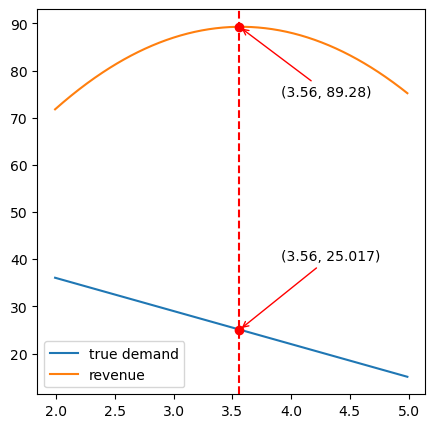

In [7]:
theta_1 = 50
theta_2 = -7

plot_prices = np.linspace(1.99, 4.99, 400)

# Visualize the true demand model 

true_demand = theta_1 + (theta_2 * plot_prices)

plt.figure(figsize = (5,5))
plt.plot(plot_prices, true_demand, label = "true demand")
plt.plot(plot_prices, plot_prices * true_demand, label = "revenue")
plt.axvline(x = 3.56, linestyle='--',color = 'r')

plt.plot(3.56, 25.017, '--bo', color = 'red')
# plt.annotate((3.56, 25.017), [3.56, 25.017])

plt.plot(3.56, 89.28, '--bo', color = 'red')
plt.annotate((3.56, 89.28), xy = [3.56, 89.28],
             xytext=(30, -50),
             textcoords = "offset points", 
             arrowprops=dict(arrowstyle="->", color='red'))
plt.annotate((3.56, 25.017), xy = [3.56, 25.017],
             xytext=(30, 50),
             textcoords = "offset points", 
             arrowprops=dict(arrowstyle="->", color='red'))

plt.legend()

In [8]:
print(true_demand[np.argmax(true_demand * plot_prices)])
print(plot_prices[np.argmax(true_demand * plot_prices)])

np.max(true_demand * plot_prices)

25.017368421052634
3.5689473684210524


89.28567119113573

In [9]:
# define the prices to be tested 

prices_to_test = np.arange(2.49, 5.99, 1)

# define the prior values for the alpha and beta that define a gamma distribution
alpha_0 = 30.00     
beta_0 = 1.00

def sample_true_demand(price: float, product: str='cards') -> float:
    """
    np.poisson.random -> https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html
    """
    demand = theta_1 + theta_2 * price
    return np.random.poisson(demand, 1)[0]


class priceParams(TypedDict):
    price: float
    alpha: float
    beta: float

        
p_lambdas = []
for price in prices_to_test:
    p_lambdas.append(
        priceParams(
            price=price, 
            alpha=alpha_0, 
            beta=beta_0
        )
    )
    
   
class OptimalPriceResult(NamedTuple):
    
    price: float
    price_index: int
        
def get_optimal_price(prices: List[float], demands: List[float]) -> OptimalPriceResult:
    index = np.argmax(prices * demands)
    return OptimalPriceResult(price_index = index, price = prices[index])

def sample_demands_from_model(p_lambdas: List[priceParams]) -> List[float]:
    
    return list(map(lambda v: np.random.gamma(v['alpha'], 1/v['beta']), p_lambdas))

def plot_distributions(gamma_distributions: List[priceParams], iteration: int):
    
    x = np.arange(0, 50, 0.10)
    for dist in p_lambdas:
        y = stats.gamma.pdf(x, a=dist["alpha"], scale= 1/dist["beta"])
        plt.plot(x, y, label = dist["price"])
        plt.xlabel("demand")
        plt.ylabel("pdf")
    plt.title(f"PDFs after Iteration: {iteration}")
    plt.legend(loc="upper right")
    plt.show()

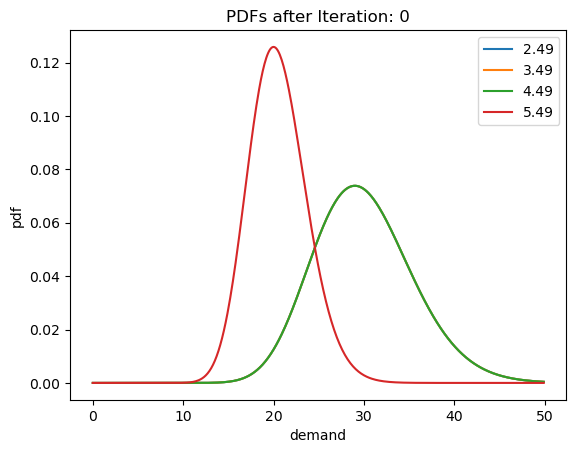

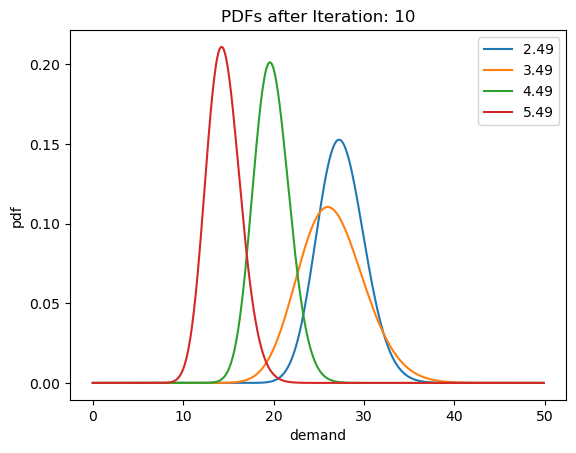

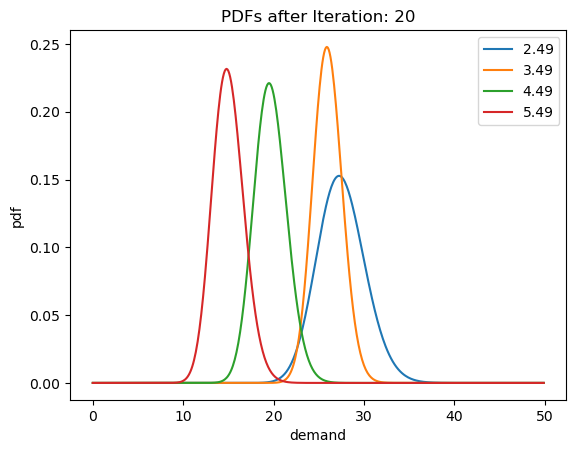

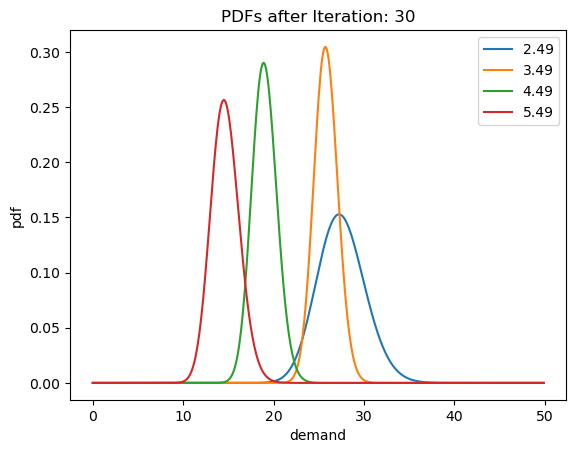

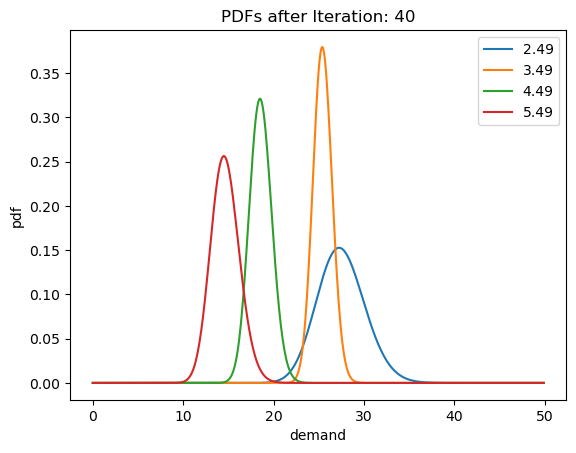

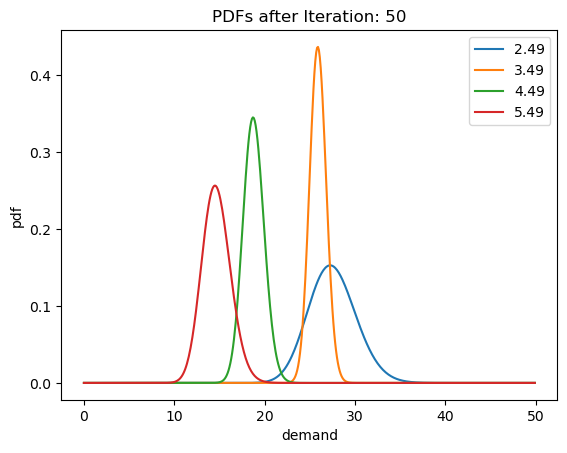

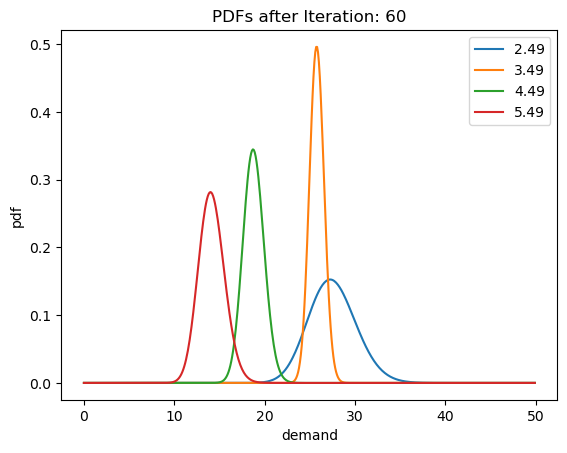

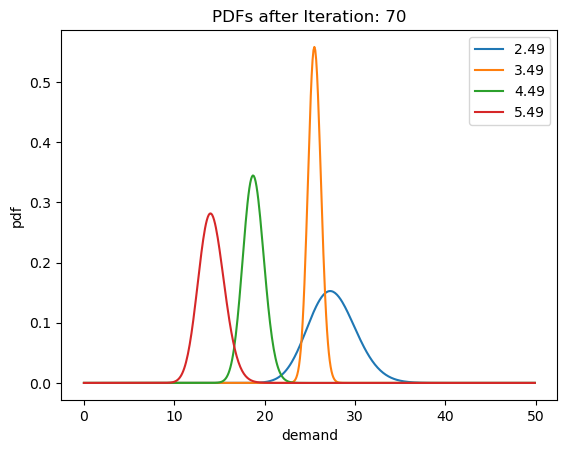

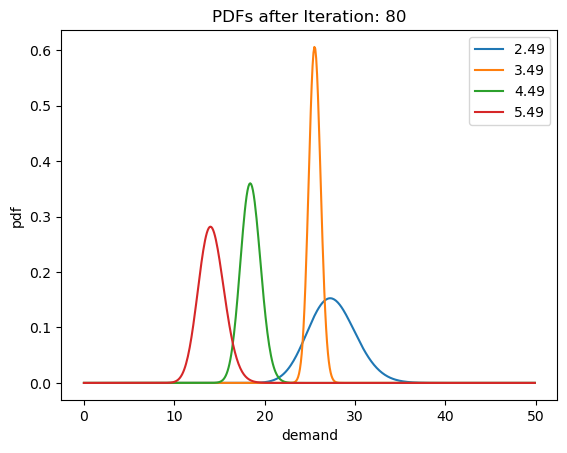

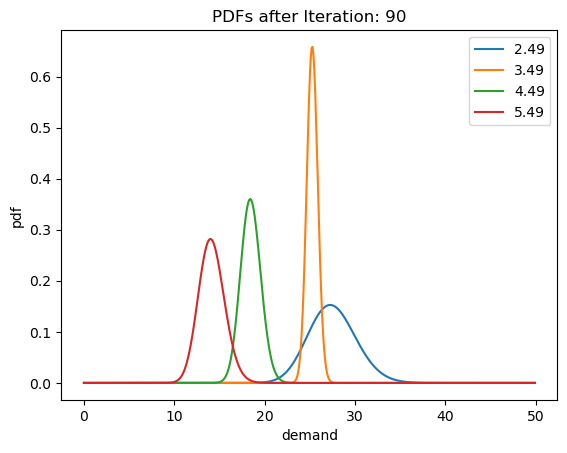

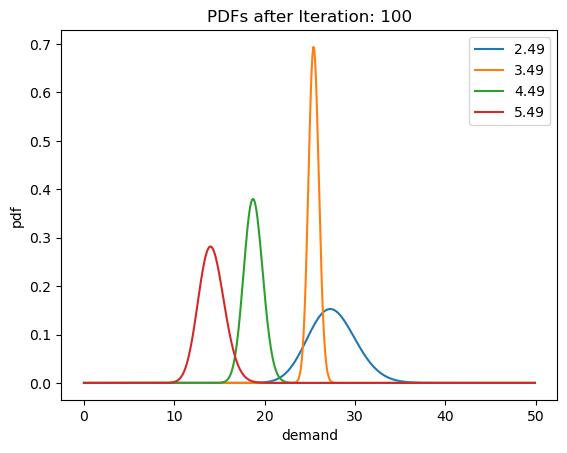

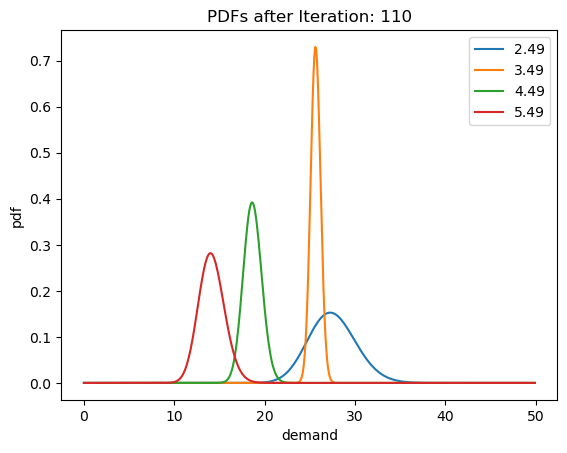

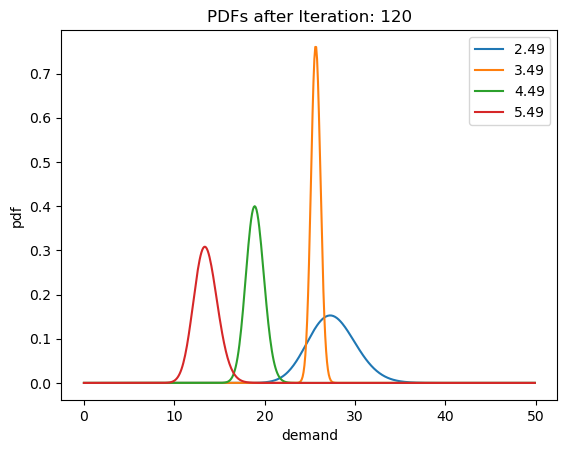

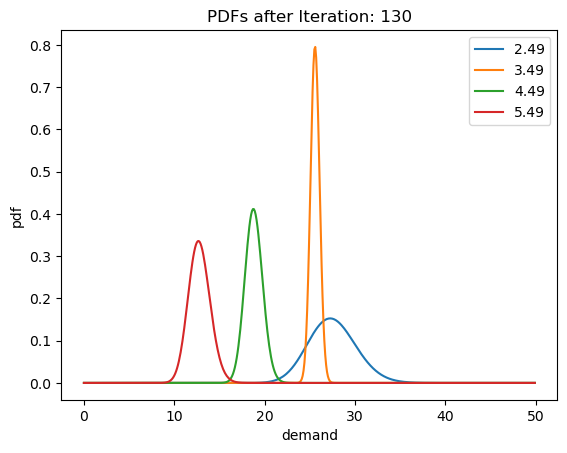

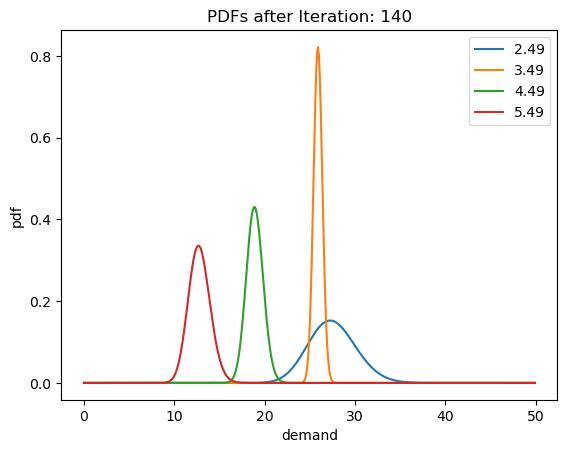

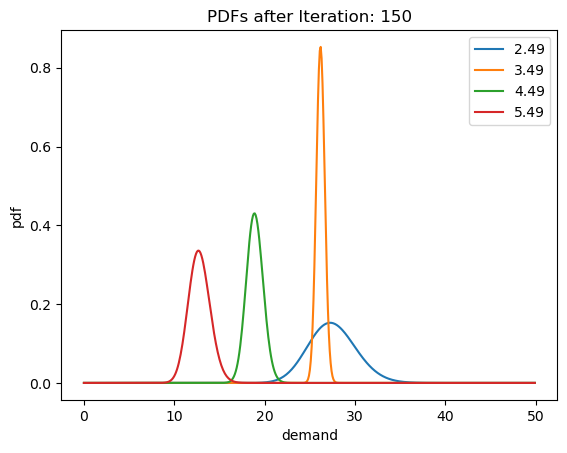

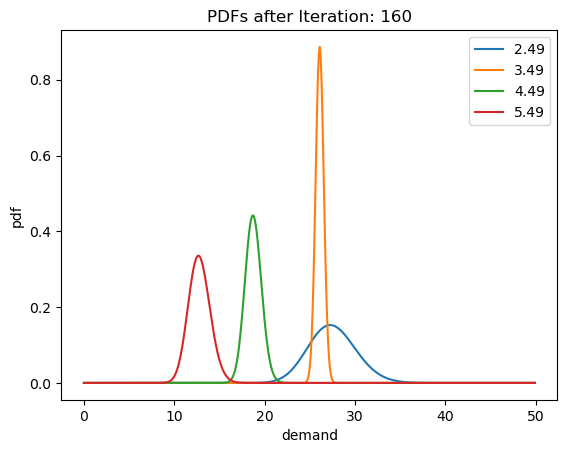

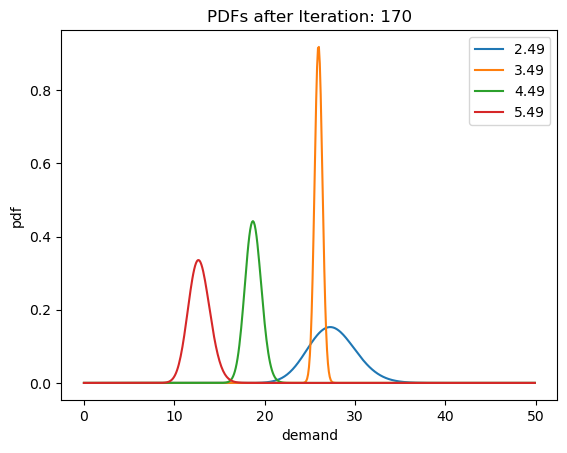

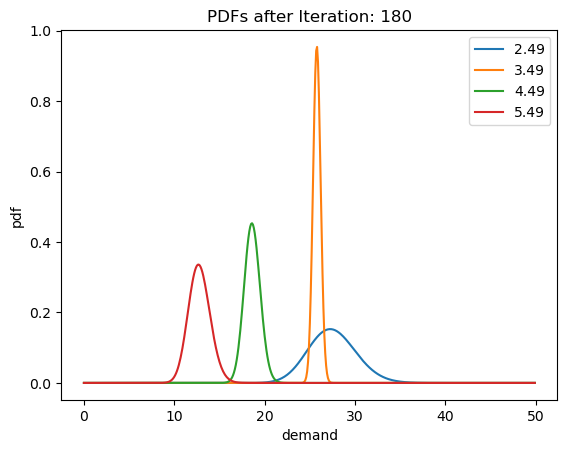

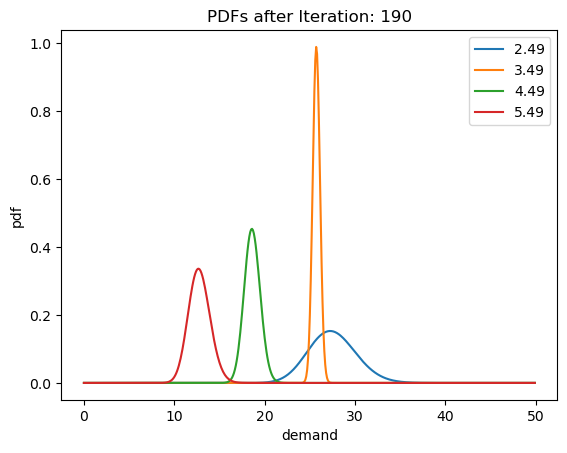

In [10]:
# Thompson sampling for solving the explore-exploit dilema. 


price_counts = defaultdict(lambda: 0)

for t in range(200):
    demands = sample_demands_from_model(p_lambdas)

    optimal_price_res = get_optimal_price(prices_to_test, demands)
    
    # increase the count for the price
    price_counts[optimal_price_res.price] += 1

    # offer the selected price and observe demand
    demand_t = sample_true_demand(optimal_price_res.price)

    # update model parameters
    v = p_lambdas[optimal_price_res.price_index]
    v['alpha'] += demand_t
    v['beta'] += 1
    
    if t%10 == 0:
        plot_distributions(p_lambdas, t)

https://jadhav-pritish.medium.com/dynamic-product-pricing-for-multiple-products-5e726fe6cb1

In [11]:
from dataclasses import dataclass
import pulp   


# Define constants 

# [1.99, 2.99, 3.99, 4.99]
prices_to_test = np.linspace(1.99, 4.99, 4)

# Prior Alpha and Beta params for Gamma Distribution. 
default_alpha = 30
default_beta = 1

# Slope and intercept for defining the linear model on true demand. 
# Note that the true demand is unobserved and we are defining these
# params in advance for simulating the real world responses. 
default_slope = -7
default_intercept = 50

# Define the number of products in a category
number_of_products = 5

# Define average category price
cp = 4

# Tolerance on average category price - 5%
tol = 0.05


class GammaParams(TypedDict):

    # params for modelling demand
    alpha: float
    beta: float


class ProductPriceMeta(TypedDict):
    price: float

    model_params: GammaParams


@dataclass
class Product:
    
    name: str
    price_meta: List[ProductPriceMeta]

    # params defining the true demand. 
    # Note that these params are unobserved and are used here for simulations purposes only.
    slope: float
    intercept: float
        

products = [
    Product(
        name=f"product_number_{index}",
        price_meta=[
            ProductPriceMeta(
                price=price,
                model_params=GammaParams(
                    alpha=default_alpha,
                    beta=default_beta,
                ),
            )
            for price in prices_to_test
        ],
        slope=default_slope,
        intercept=default_intercept,
    )
    for index in range(number_of_products)
]


In [12]:
products

[Product(name='product_number_0', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 3.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 4.99, 'model_params': {'alpha': 30, 'beta': 1}}], slope=-7, intercept=50),
 Product(name='product_number_1', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 3.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 4.99, 'model_params': {'alpha': 30, 'beta': 1}}], slope=-7, intercept=50),
 Product(name='product_number_2', price_meta=[{'price': 1.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 2.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 3.99, 'model_params': {'alpha': 30, 'beta': 1}}, {'price': 4.99, 'model_params': {'alpha': 30, 'beta': 1}}], slope=-7, intercept=50),
 Product(name='product_number_3', price_meta=[{'price': 1.99, 'model_params'

In [13]:
def sample_demands_from_model(p_lambdas: List[priceParams]) -> List[float]:
    
    return list(map(lambda v: np.random.gamma(v['model_params']['alpha'], 1/v['model_params']['beta']), p_lambdas))

In [14]:

for i in range(500):

    # define decision variables for solving lin prog
    decision_variables = []

    # track estimated demands for products at all price points
    # Note that we are using a flat data structure for tracking demands but for later calculations,
    # the list is reshaped into a matrix of size K x P.
    estimated_demands = []

    for product_index, product in enumerate(products):
        estimated_demands.extend(sample_demands_from_model(product.price_meta))
        for price_index, price_meta in enumerate(product.price_meta):
            decision_variables.append(
                pulp.LpVariable(
                    f"x_{product_index}_{price_index}",
                    lowBound=0,
                    upBound=1,
                    cat="Integer",
                )
            )

    # Reshape decision variables and sampled demands into matrix of shape K x P
    decision_variables_mat = np.array(decision_variables).reshape(
        number_of_products, -1
    )
    estimated_demands_mat = np.array(estimated_demands).reshape(number_of_products, -1)

    # Define an Integer Linear Programming Problem
    dynamic_pricing_prob = pulp.LpProblem("MultiProductDynamicPricing", pulp.LpMaximize)

    # define a objective function
    # maximizing revenue = product_price * sampled_demand
    total_revenue = ""
    for value in (
        prices_to_test * estimated_demands_mat * decision_variables_mat
    ).flatten():
        total_revenue += value
    dynamic_pricing_prob += total_revenue

    # add constraints

    # constraint 1 - ensure that we select only one price
    for product_decision_variables in decision_variables_mat:
        price_selection_constraint = pulp.lpSum(product_decision_variables)
        dynamic_pricing_prob += price_selection_constraint == 1

    # constraint 2 - ensure that the average catalog price does not increase
    catalog_price_constraint = pulp.lpSum(
        (prices_to_test * decision_variables_mat).flatten()
    )
    dynamic_pricing_prob += (
        catalog_price_constraint <= cp * (1 + tol) * number_of_products
    )
    dynamic_pricing_prob += (
        catalog_price_constraint >= cp * (1 - tol) * number_of_products
    )

    display(dynamic_pricing_prob)

    optimization_result = dynamic_pricing_prob.solve()

    variable_name = []
    variable_value = []

    for decision_variable in dynamic_pricing_prob.variables():
        variable_name.append(decision_variable.name)
        variable_value.append(decision_variable.varValue)

    solution_df = pd.DataFrame({"index": variable_name, "value": variable_value})
    display(solution_df)

    # update beliefs

    decision_mat = solution_df.value.values.reshape(number_of_products, -1)

    selected_prices = (prices_to_test * decision_mat).sum(axis=1)

    display(selected_prices)

    for product_index, product in enumerate(products):

        selected_price = selected_prices[product_index]

        actual_demand = sample_true_demand(selected_price, product)
        
        # update beliefs
        model_params = list(
            filter(lambda d: d["price"] == selected_price, product.price_meta)
        )[0]["model_params"]

        model_params["alpha"] += actual_demand
        model_params["beta"] += 1


MultiProductDynamicPricing:
MAXIMIZE
42.26332921685477*x_0_0 + 80.9629855066501*x_0_1 + 81.05623525366276*x_0_2 + 138.70997068343047*x_0_3 + 70.82666687137684*x_1_0 + 89.25484560634972*x_1_1 + 110.781756646893*x_1_2 + 142.70966834424732*x_1_3 + 53.85039635067161*x_2_0 + 58.71003053632226*x_2_1 + 87.76101156083118*x_2_2 + 164.77726632999747*x_2_3 + 84.35874987225667*x_3_0 + 108.69675260092112*x_3_1 + 174.909464188011*x_3_2 + 120.25039073439089*x_3_3 + 69.12562843399951*x_4_0 + 76.11431503530754*x_4_1 + 143.33813838379692*x_4_2 + 216.91668469099966*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a94f41d125954b519f1a0058b72513db-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a94f41d125954b519f1a0058b72513db-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 767.338 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.0333333
Cbc0038I Solution found of -766.14
Cbc0038I Before mini branch and bound, 

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    1.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([4.99, 1.99, 4.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
48.943821687596184*x_0_0 + 83.65929952413079*x_0_1 + 102.93292527225667*x_0_2 + 116.19120637509394*x_0_3 + 55.90948654362498*x_1_0 + 81.48764616577526*x_1_1 + 97.90628923040501*x_1_2 + 162.72925061962167*x_1_3 + 80.40100727911799*x_2_0 + 82.91866893089892*x_2_1 + 96.19645255279679*x_2_2 + 113.87764709993623*x_2_3 + 49.48333095531238*x_3_0 + 82.18801494104633*x_3_1 + 141.12269842131906*x_3_2 + 152.7366833305002*x_3_3 + 66.59418709170343*x_4_0 + 101.90235444975923*x_4_1 + 103.47015430099569*x_4_2 + 113.27557732227999*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b9cd44fdecd4368935eceb015cedd86-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b9cd44fdecd4368935eceb015cedd86-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 625.677 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.7
Cbc0038I Solution found of -613.961
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
62.53682674757677*x_0_0 + 65.27890109336153*x_0_1 + 106.91755325182861*x_0_2 + 124.09084980288748*x_0_3 + 60.376768338096426*x_1_0 + 68.12073291390072*x_1_1 + 111.33721320342548*x_1_2 + 88.48774544474408*x_1_3 + 46.68855419268231*x_2_0 + 103.98021183786797*x_2_1 + 100.95463488634329*x_2_2 + 93.87817667391245*x_2_3 + 55.755098885103855*x_3_0 + 88.11440324137251*x_3_1 + 124.74449307815748*x_3_2 + 155.16291576228636*x_3_3 + 63.02308237056025*x_4_0 + 74.76344440625127*x_4_1 + 93.73618647603567*x_4_2 + 94.29217056170992*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/355c1304fb5e4da2bb2384db4ac14751-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/355c1304fb5e4da2bb2384db4ac14751-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 588.335 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Solution found of -588.307
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.35416438360208*x_0_0 + 117.41584304903176*x_0_1 + 154.3640727121177*x_0_2 + 102.91755913325318*x_0_3 + 61.95462035189363*x_1_0 + 110.67075176893326*x_1_1 + 89.46092999913785*x_1_2 + 116.90365573473896*x_1_3 + 61.30611354800804*x_2_0 + 79.62229239849151*x_2_1 + 114.87951862675936*x_2_2 + 88.18249950889471*x_2_3 + 73.45006650598147*x_3_0 + 91.25136000265006*x_3_1 + 96.5403287076325*x_3_2 + 122.61185888835702*x_3_3 + 55.09176653170278*x_4_0 + 92.56851211611125*x_4_1 + 128.49874160876158*x_4_2 + 116.611388420019*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/318a7e3c63164625980a4c10ffa12953-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/318a7e3c63164625980a4c10ffa12953-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 634.297 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -621.69 iterations 4
Cbc0038I Pa

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.3701632652586*x_0_0 + 74.28839788174868*x_0_1 + 105.56950299133878*x_0_2 + 121.7009415422583*x_0_3 + 64.54753643834353*x_1_0 + 82.57192600062672*x_1_1 + 106.84664643168433*x_1_2 + 111.59572593186876*x_1_3 + 67.22243507569593*x_2_0 + 106.67006606380326*x_2_1 + 90.73219976129752*x_2_2 + 88.92937629426112*x_2_3 + 52.733891721370696*x_3_0 + 86.77803541742564*x_3_1 + 106.872894153646*x_3_2 + 92.49700509581983*x_3_3 + 46.481056176547824*x_4_0 + 72.21029473740212*x_4_1 + 111.59710482724091*x_4_2 + 111.4923127477584*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9ab08377c8114f8b9059ca77bec4878b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9ab08377c8114f8b9059ca77bec4878b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 558.437 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -558.437
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.28840341152549*x_0_0 + 86.54451462762943*x_0_1 + 95.19233114801784*x_0_2 + 97.56718091224857*x_0_3 + 62.942449563466724*x_1_0 + 84.01626995883504*x_1_1 + 87.18571722125039*x_1_2 + 100.75663940132785*x_1_3 + 56.76602180008482*x_2_0 + 100.45505421014221*x_2_1 + 79.70494015355881*x_2_2 + 95.69858785796387*x_2_3 + 54.13765423243918*x_3_0 + 81.52763430659371*x_3_1 + 115.25637165329385*x_3_2 + 88.3769164097491*x_3_3 + 80.48462503303264*x_4_0 + 94.8120625594948*x_4_1 + 118.51782512922419*x_4_2 + 113.29007660956304*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/42775325397b42a3a38307bcc3d6029a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/42775325397b42a3a38307bcc3d6029a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 532.553 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -532.553
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.457748682152236*x_0_0 + 63.01098316978503*x_0_1 + 107.66513738007292*x_0_2 + 87.17348056232437*x_0_3 + 45.736356170846044*x_1_0 + 77.01454104323749*x_1_1 + 105.77424467382266*x_1_2 + 110.04901019045826*x_1_3 + 43.63779571553261*x_2_0 + 95.22170450159963*x_2_1 + 77.18212478480851*x_2_2 + 90.4864984263293*x_2_3 + 58.13029366711307*x_3_0 + 88.07266468510944*x_3_1 + 85.96627724972011*x_3_2 + 118.80017237583627*x_3_3 + 58.158929122937714*x_4_0 + 103.78270797473206*x_4_1 + 126.61175141655686*x_4_2 + 110.83149928321163*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a0c48a400db647aab02417f3d280654a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a0c48a400db647aab02417f3d280654a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 558.348 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -558.348
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.51552030686277*x_0_0 + 103.64920396136424*x_0_1 + 96.43033953442104*x_0_2 + 88.55713550315191*x_0_3 + 71.34132555668295*x_1_0 + 106.34573626230672*x_1_1 + 84.90580341236608*x_1_2 + 83.89568370851616*x_1_3 + 43.82864976448113*x_2_0 + 82.78350149751228*x_2_1 + 81.05106197703967*x_2_2 + 109.28897408262507*x_2_3 + 55.919047032656245*x_3_0 + 96.78012150657761*x_3_1 + 99.02336743477693*x_3_2 + 91.27166698151149*x_3_3 + 46.310137500280646*x_4_0 + 90.9549729852407*x_4_1 + 102.82726488077502*x_4_2 + 126.72974071638261*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a56a05a164f9440b823192fda9d46cd4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a56a05a164f9440b823192fda9d46cd4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 545.037 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -545.037
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 2.99, 4.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
78.22377792647606*x_0_0 + 84.20083838322192*x_0_1 + 102.6509346971164*x_0_2 + 110.3777621794098*x_0_3 + 65.7218190305366*x_1_0 + 112.32958238900227*x_1_1 + 105.40138984313847*x_1_2 + 102.26682505853127*x_1_3 + 63.40776674054481*x_2_0 + 87.01161471639965*x_2_1 + 80.4283731782119*x_2_2 + 84.61844483158855*x_2_3 + 60.17658339006315*x_3_0 + 103.81270050303962*x_3_1 + 102.26397027588655*x_3_2 + 98.42468872872126*x_3_3 + 47.87625372739554*x_4_0 + 84.72930576593205*x_4_1 + 111.55632999385824*x_4_2 + 89.64855305232182*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f67fc34fde534f8692bc04d90f3b6ed2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f67fc34fde534f8692bc04d90f3b6ed2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 523.832 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -522.695
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 2.99, 4.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.68991033110443*x_0_0 + 95.46622587788733*x_0_1 + 103.46762766457219*x_0_2 + 81.79250436741992*x_0_3 + 62.88725389775167*x_1_0 + 89.90850646247415*x_1_1 + 94.23589104474348*x_1_2 + 102.33479890868101*x_1_3 + 46.33171945239336*x_2_0 + 95.18691515085663*x_2_1 + 86.44226507425842*x_2_2 + 79.21917839917026*x_2_3 + 56.6078384801774*x_3_0 + 82.99403437220593*x_3_1 + 89.75477643884726*x_3_2 + 114.38409620789473*x_3_3 + 48.21084726909102*x_4_0 + 81.02877078167654*x_4_1 + 103.33270946157391*x_4_2 + 98.14134980860702*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2bb5ce5ec41246228d4a8099633f3bbd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2bb5ce5ec41246228d4a8099633f3bbd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 518.706 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -518.706
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.107717705608515*x_0_0 + 89.76736968512178*x_0_1 + 101.48137194375684*x_0_2 + 109.77847276613983*x_0_3 + 62.21193899920875*x_1_0 + 88.21842816220284*x_1_1 + 92.83258082104807*x_1_2 + 77.43080477513854*x_1_3 + 63.04677769994971*x_2_0 + 86.68326350380924*x_2_1 + 100.57878452279172*x_2_2 + 82.81635190971821*x_2_3 + 48.37837226009959*x_3_0 + 80.47306579214715*x_3_1 + 91.68947439839272*x_3_2 + 92.20116478495876*x_3_3 + 47.73281683007759*x_4_0 + 58.63448463124793*x_4_1 + 91.94027862069586*x_4_2 + 80.60948585265294*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a3e08c3d82474e58af19bc5666ecab9c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a3e08c3d82474e58af19bc5666ecab9c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 486.845 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Solution found of -486.82
Cbc0038I Before mini branch and bound, 18 int

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
39.412453265962284*x_0_0 + 78.09482933565923*x_0_1 + 107.65854008989548*x_0_2 + 101.07636893728444*x_0_3 + 70.62607091090852*x_1_0 + 83.59638740504164*x_1_1 + 83.92686506713417*x_1_2 + 86.58722867294833*x_1_3 + 72.34955033735608*x_2_0 + 74.69514428909211*x_2_1 + 90.96558004730416*x_2_2 + 81.8652885548268*x_2_3 + 65.17301958250471*x_3_0 + 98.99935145431935*x_3_1 + 95.886620016771*x_3_2 + 85.48377537789698*x_3_3 + 48.72242386662976*x_4_0 + 76.0432312158566*x_4_1 + 91.10178304360386*x_4_2 + 105.87669025382593*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c83e4e92ed4e470bb8475b721ab3cd07-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c83e4e92ed4e470bb8475b721ab3cd07-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 490.087 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -490.087
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 4.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
64.80068416794818*x_0_0 + 91.94997813836108*x_0_1 + 99.92622334573288*x_0_2 + 114.6505738894228*x_0_3 + 54.98694784600863*x_1_0 + 78.9526743793067*x_1_1 + 91.42045643827248*x_1_2 + 81.22152202213186*x_1_3 + 49.456020457073514*x_2_0 + 80.06791926799862*x_2_1 + 78.32412938042562*x_2_2 + 61.83009416759807*x_2_3 + 65.53143930716043*x_3_0 + 81.96945547887077*x_3_1 + 93.7325404336643*x_3_2 + 83.35801941070521*x_3_3 + 66.60795058549502*x_4_0 + 68.72307215331512*x_4_1 + 103.87048830717181*x_4_2 + 80.12154647491013*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0c6474739cf46389f94f21a893eb8a0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d0c6474739cf46389f94f21a893eb8a0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 483.742 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -483.742
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.93825320172628*x_0_0 + 93.38077466371266*x_0_1 + 109.83383094723118*x_0_2 + 94.90382904068314*x_0_3 + 67.99168789431124*x_1_0 + 100.88403091117269*x_1_1 + 91.03586175943855*x_1_2 + 101.60129355180209*x_1_3 + 54.5309268422447*x_2_0 + 86.03903035383891*x_2_1 + 105.3881932390921*x_2_2 + 73.97328761613575*x_2_3 + 72.06465931452918*x_3_0 + 96.58532982353343*x_3_1 + 84.89897853004918*x_3_2 + 99.22974626784784*x_3_3 + 68.95820816405805*x_4_0 + 72.41325428776281*x_4_1 + 98.85653509703839*x_4_2 + 96.15884673704358*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d34e371bb9624dd4904a6ec31160d18a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d34e371bb9624dd4904a6ec31160d18a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 514.569 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -506.307 iterations 4
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.39181654092266*x_0_0 + 84.12318124926264*x_0_1 + 87.15758684105445*x_0_2 + 102.88876879445407*x_0_3 + 59.75865861494903*x_1_0 + 82.73247836980981*x_1_1 + 91.1392069326177*x_1_2 + 91.58927932069169*x_1_3 + 67.85838505646976*x_2_0 + 75.38931165414854*x_2_1 + 82.4407848096982*x_2_2 + 74.71750464768496*x_2_3 + 69.72306858381504*x_3_0 + 98.5090032122364*x_3_1 + 93.80849368604464*x_3_2 + 82.61906866455507*x_3_3 + 70.85014841255577*x_4_0 + 84.94571914426346*x_4_1 + 86.98442256884321*x_4_2 + 81.2875748903289*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bea36ac0bed342f68925c66e9d735b51-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bea36ac0bed342f68925c66e9d735b51-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 462.412 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -462.412
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 4.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.61630187578822*x_0_0 + 89.43106913390358*x_0_1 + 100.06400229989642*x_0_2 + 99.19104897608572*x_0_3 + 58.68245050375312*x_1_0 + 93.049327880101*x_1_1 + 93.93870877356325*x_1_2 + 75.78798410765611*x_1_3 + 64.19912370903614*x_2_0 + 90.39578962636618*x_2_1 + 85.25488676185566*x_2_2 + 81.48420549057275*x_2_3 + 72.85710316403008*x_3_0 + 85.52624223558168*x_3_1 + 86.53293245433849*x_3_2 + 101.91999028643433*x_3_3 + 65.55205741711741*x_4_0 + 66.74381818318855*x_4_1 + 93.44932787738396*x_4_2 + 68.6984648337108*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/baf310f392894820b30c6f232b4ce2cb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/baf310f392894820b30c6f232b4ce2cb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 479.768 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -479.768
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.14161683020411*x_0_0 + 104.12166538727627*x_0_1 + 99.30798764207816*x_0_2 + 99.2841584788919*x_0_3 + 56.6309529073596*x_1_0 + 70.18410745470726*x_1_1 + 85.67387962876742*x_1_2 + 88.7038931786186*x_1_3 + 51.681418146276755*x_2_0 + 76.406282536733*x_2_1 + 89.31116600449766*x_2_2 + 85.84031518542484*x_2_3 + 42.94022531386599*x_3_0 + 78.50951987538178*x_3_1 + 91.19032280187994*x_3_2 + 81.97945952399432*x_3_3 + 72.88848182743743*x_4_0 + 88.24751290911982*x_4_1 + 96.64784225756682*x_4_2 + 74.36466924071132*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96658e1b306242fe8de734b33c018884-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96658e1b306242fe8de734b33c018884-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 469.975 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -469.975
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.76218615501173*x_0_0 + 90.57152333413974*x_0_1 + 94.59576122782627*x_0_2 + 107.37603489137024*x_0_3 + 53.04884207194969*x_1_0 + 87.19227959731711*x_1_1 + 98.3466842726183*x_1_2 + 86.20793201555831*x_1_3 + 63.580058353683995*x_2_0 + 72.94928368765859*x_2_1 + 89.62634351356498*x_2_2 + 86.98395779717107*x_2_3 + 68.07178829995064*x_3_0 + 87.19079550653593*x_3_1 + 92.82314704288515*x_3_2 + 100.47417635822066*x_3_3 + 51.753694801650944*x_4_0 + 70.46719949889568*x_4_1 + 96.3753441346848*x_4_2 + 64.78001264143066*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4a40f1211284c9dbd9c4d8de59f178c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4a40f1211284c9dbd9c4d8de59f178c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 485.889 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -478.071 iterations 3
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.80925351815608*x_0_0 + 72.91663995891022*x_0_1 + 89.17035312135036*x_0_2 + 87.81683487993074*x_0_3 + 70.05742742182933*x_1_0 + 84.74737828582717*x_1_1 + 104.13538395542864*x_1_2 + 92.16245724007057*x_1_3 + 50.32849981174882*x_2_0 + 78.62846089802102*x_2_1 + 88.43304271893103*x_2_2 + 91.22632401853323*x_2_3 + 66.07329792592623*x_3_0 + 79.52675173450159*x_3_1 + 90.96349919857975*x_3_2 + 96.28778098096616*x_3_3 + 53.11693858064163*x_4_0 + 76.31470815185433*x_4_1 + 94.56282291092461*x_4_2 + 96.90204854672811*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d947c2337c6408d89751c733fd711b2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d947c2337c6408d89751c733fd711b2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 472.729 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Solution found of -472.589
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.54475765827478*x_0_0 + 93.56526148462225*x_0_1 + 106.36653117778984*x_0_2 + 103.32709473210355*x_0_3 + 72.93952154262388*x_1_0 + 96.642262572196*x_1_1 + 87.15657140296912*x_1_2 + 75.9749407484342*x_1_3 + 59.80353887497489*x_2_0 + 76.01589027524213*x_2_1 + 81.26955083030835*x_2_2 + 82.51246376741247*x_2_3 + 64.72041515751816*x_3_0 + 92.83817118090533*x_3_1 + 91.73050413433158*x_3_2 + 86.97325927065371*x_3_3 + 57.38770421715347*x_4_0 + 67.7763393547664*x_4_1 + 85.15095801881554*x_4_2 + 75.7159461906701*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a6876db8c3644b71978556343ee9107c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a6876db8c3644b71978556343ee9107c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 463.455 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -463.364 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.74371073998708*x_0_0 + 88.28401507905703*x_0_1 + 89.75975248413526*x_0_2 + 94.53382394747977*x_0_3 + 56.8687361138042*x_1_0 + 70.2706794314862*x_1_1 + 88.61811582480902*x_1_2 + 100.65869652567103*x_1_3 + 40.94381610143194*x_2_0 + 77.6982157963133*x_2_1 + 102.15936313964566*x_2_2 + 86.22338213797892*x_2_3 + 61.014065246897815*x_3_0 + 74.6646057045774*x_3_1 + 83.65450437670309*x_3_2 + 98.91949069671638*x_3_3 + 39.18240518677842*x_4_0 + 66.34531187272762*x_4_1 + 93.33294033499247*x_4_2 + 78.0908638797764*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5c4f0265ad648b3aabee5874856864e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5c4f0265ad648b3aabee5874856864e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 483.511 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Solution found of -483.355
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.48918865958308*x_0_0 + 66.31573457361044*x_0_1 + 88.73456733710053*x_0_2 + 94.67370178136053*x_0_3 + 57.59018892088112*x_1_0 + 87.81857497391226*x_1_1 + 93.25604628558627*x_1_2 + 81.42323914722606*x_1_3 + 47.74525191136273*x_2_0 + 85.74491821678406*x_2_1 + 84.66632794768019*x_2_2 + 72.98779306907925*x_2_3 + 58.059698789566404*x_3_0 + 79.73841267662024*x_3_1 + 83.52892629509152*x_3_2 + 77.28669547960206*x_3_3 + 70.30359119833666*x_4_0 + 73.5583712484456*x_4_1 + 91.17418323570114*x_4_2 + 107.73242408104012*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/962869a80b5443d4af538355e68d455b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/962869a80b5443d4af538355e68d455b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 464.936 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -464.936
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([4.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
56.61558045959766*x_0_0 + 71.07104641572717*x_0_1 + 93.86142694662439*x_0_2 + 92.54393272436852*x_0_3 + 89.91338844949439*x_1_0 + 82.8808841559723*x_1_1 + 94.86061656714915*x_1_2 + 75.39763044808386*x_1_3 + 83.34850761082974*x_2_0 + 77.80826489089799*x_2_1 + 82.8274923059699*x_2_2 + 77.65797678387598*x_2_3 + 60.09649109174018*x_3_0 + 82.66362904335894*x_3_1 + 91.23326753681579*x_3_2 + 76.69250772023818*x_3_3 + 43.24184997217714*x_4_0 + 72.69931353807111*x_4_1 + 88.23410115508818*x_4_2 + 87.02438219808762*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d59fa8bea4a443519b07f2ce898fb96f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d59fa8bea4a443519b07f2ce898fb96f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.264 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -451.017
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
42.12781608298*x_0_0 + 90.35305475337455*x_0_1 + 92.13197879085052*x_0_2 + 96.20658822492895*x_0_3 + 63.20808783099136*x_1_0 + 78.0306361126803*x_1_1 + 103.26585599568872*x_1_2 + 93.95323759831041*x_1_3 + 53.686534189162536*x_2_0 + 70.63537071385772*x_2_1 + 82.64989906797922*x_2_2 + 85.70112826401332*x_2_3 + 67.00475314941043*x_3_0 + 74.86627079597679*x_3_1 + 94.0236685266612*x_3_2 + 80.49209697490491*x_3_3 + 73.12825385444096*x_4_0 + 80.68764040430425*x_4_1 + 89.11560788184221*x_4_2 + 91.54243038500013*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/620d6ce49f3a419a89a2e9d534e43c9e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/620d6ce49f3a419a89a2e9d534e43c9e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 465.532 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -451.188 iterations 2
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
81.47682302944574*x_0_0 + 82.68504488851326*x_0_1 + 105.4533401001089*x_0_2 + 92.40204802078352*x_0_3 + 60.69134955165321*x_1_0 + 78.51923162278877*x_1_1 + 76.57826369938473*x_1_2 + 82.43709464604653*x_1_3 + 52.61344008277572*x_2_0 + 73.3137957557125*x_2_1 + 81.8176081211496*x_2_2 + 83.19572516522896*x_2_3 + 52.73122431904208*x_3_0 + 88.66226224047858*x_3_1 + 80.90578562746971*x_3_2 + 79.386661825943*x_3_3 + 73.60088847253047*x_4_0 + 59.16149280723785*x_4_1 + 91.41023468114359*x_4_2 + 76.37939485139346*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de658d89acde4f60ae3fcf84bd32638a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de658d89acde4f60ae3fcf84bd32638a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.159 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -451.159
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 4.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.33176780822805*x_0_0 + 83.0120094136419*x_0_1 + 101.05615560539724*x_0_2 + 97.91408432175999*x_0_3 + 63.47002622204189*x_1_0 + 94.08515214522821*x_1_1 + 93.39791385953384*x_1_2 + 80.94134178660366*x_1_3 + 53.98046632676805*x_2_0 + 88.83642312754327*x_2_1 + 84.39693182339649*x_2_2 + 65.73971458865742*x_2_3 + 65.57895111112299*x_3_0 + 87.61798278335388*x_3_1 + 100.70818348955939*x_3_2 + 68.73527118354278*x_3_3 + 52.46272617678228*x_4_0 + 81.32402755369804*x_4_1 + 91.73561437049393*x_4_2 + 64.11746771184234*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/43f05ca29b664d7491a9a2788776fda6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/43f05ca29b664d7491a9a2788776fda6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 475.577 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -475.157 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.80741840354835*x_0_0 + 70.45350087810402*x_0_1 + 88.44606862298468*x_0_2 + 97.01726054508906*x_0_3 + 64.2901194396956*x_1_0 + 80.58664781138951*x_1_1 + 81.4589979857*x_1_2 + 59.01885842129569*x_1_3 + 51.408583400811416*x_2_0 + 78.70547422428707*x_2_1 + 87.73748114477755*x_2_2 + 75.79532178376424*x_2_3 + 38.89271222948825*x_3_0 + 98.04773692135451*x_3_1 + 92.67087856405303*x_3_2 + 78.62652826892355*x_3_3 + 65.88514555433588*x_4_0 + 79.17640269808139*x_4_1 + 88.94669721299296*x_4_2 + 76.96621396145586*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00a50aec560144019660ba46b0093c03-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00a50aec560144019660ba46b0093c03-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 453.208 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -453.208
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
88.39506302904734*x_0_0 + 75.10653143846686*x_0_1 + 88.63738088688177*x_0_2 + 92.2285096937423*x_0_3 + 69.30752353217606*x_1_0 + 91.64678199558344*x_1_1 + 90.71839463118657*x_1_2 + 78.21868254539324*x_1_3 + 72.57113811985084*x_2_0 + 88.93521723555246*x_2_1 + 87.54575190354666*x_2_2 + 79.6746154240068*x_2_3 + 55.65534972444938*x_3_0 + 87.06277795951394*x_3_1 + 93.37735635874289*x_3_2 + 94.48561512141875*x_3_3 + 65.56757045902536*x_4_0 + 66.05610920550282*x_4_1 + 84.56755903402954*x_4_2 + 64.35026743478186*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/95584d032cb64891a4d407b9965262d5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/95584d032cb64891a4d407b9965262d5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.864 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -451.864
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 2.99, 2.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.55464630606879*x_0_0 + 79.10753238090666*x_0_1 + 95.5798041140603*x_0_2 + 93.0334722630461*x_0_3 + 51.1045003118304*x_1_0 + 85.34481817568012*x_1_1 + 93.28508279634543*x_1_2 + 90.45550024527846*x_1_3 + 42.208284172061276*x_2_0 + 80.9053128036886*x_2_1 + 86.92380537205925*x_2_2 + 78.90188182689181*x_2_3 + 54.256257314944854*x_3_0 + 87.95931000853065*x_3_1 + 92.81194247951412*x_3_2 + 80.3950071271218*x_3_3 + 70.91223894416348*x_4_0 + 72.07168917558118*x_4_1 + 96.99942440096544*x_4_2 + 85.64933750849751*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ef36fa657d9e4c1285c5512510c36e29-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ef36fa657d9e4c1285c5512510c36e29-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 465.6 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -465.6
Cbc0038I Before mini branch and bound, 20 integers

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.16963321966898*x_0_0 + 81.49067793025773*x_0_1 + 93.48319692041376*x_0_2 + 82.73924585293317*x_0_3 + 77.24114808821936*x_1_0 + 83.23347513158555*x_1_1 + 92.44618006800664*x_1_2 + 85.53503959584428*x_1_3 + 57.04300327859643*x_2_0 + 79.79084295348343*x_2_1 + 79.16103242289839*x_2_2 + 62.202117333856904*x_2_3 + 63.14585670660385*x_3_0 + 93.21164043707688*x_3_1 + 91.2973726284289*x_3_2 + 82.78715172442163*x_3_3 + 55.95118559656014*x_4_0 + 97.06399904968153*x_4_1 + 88.55781521968763*x_4_2 + 100.62582335632462*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96ba0c495cd94d018b9216c070cc38b9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/96ba0c495cd94d018b9216c070cc38b9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 459.526 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -459.297 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
53.0416712114292*x_0_0 + 91.17820898406396*x_0_1 + 94.73582106057003*x_0_2 + 83.76838427275362*x_0_3 + 81.36220696845264*x_1_0 + 85.56072304200758*x_1_1 + 88.44185140825171*x_1_2 + 64.6172610066951*x_1_3 + 62.87193454322543*x_2_0 + 79.5208111558505*x_2_1 + 84.16506348957176*x_2_2 + 74.51761917600943*x_2_3 + 74.39373872145902*x_3_0 + 80.35559600854775*x_3_1 + 93.86641813575002*x_3_2 + 85.87787004984858*x_3_3 + 63.41182468061887*x_4_0 + 83.25403329706016*x_4_1 + 87.81651360612973*x_4_2 + 76.34674845902023*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2cd81ad7b91243659862a497632579ad-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2cd81ad7b91243659862a497632579ad-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.026 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -449.026
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.40659561670913*x_0_0 + 72.90090132577026*x_0_1 + 98.66368715575625*x_0_2 + 99.59634450498281*x_0_3 + 68.206026002384*x_1_0 + 73.16479585138485*x_1_1 + 88.45827122581389*x_1_2 + 76.67087816794402*x_1_3 + 70.23622541231394*x_2_0 + 75.68315844153676*x_2_1 + 86.62160470360928*x_2_2 + 80.94740962748604*x_2_3 + 58.44711239801102*x_3_0 + 85.81320393038858*x_3_1 + 96.06462618378379*x_3_2 + 91.48520626946176*x_3_3 + 67.11301200476704*x_4_0 + 71.01171516669476*x_4_1 + 90.96012634657473*x_4_2 + 69.01675470826878*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a3652fcfba8f4a6b9c4e0311f2a1b1f6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a3652fcfba8f4a6b9c4e0311f2a1b1f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 461.701 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -461.701
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.28106009837272*x_0_0 + 77.10989475066984*x_0_1 + 89.15606005142435*x_0_2 + 88.64806885121598*x_0_3 + 64.00016233706097*x_1_0 + 77.49896652942158*x_1_1 + 97.36608039813211*x_1_2 + 87.98356250941518*x_1_3 + 63.26828054463344*x_2_0 + 80.0800218237215*x_2_1 + 84.20567396311195*x_2_2 + 60.99331662728055*x_2_3 + 77.0123230779702*x_3_0 + 82.60634073083598*x_3_1 + 91.80200989091371*x_3_2 + 102.21463155541679*x_3_3 + 64.64099618519046*x_4_0 + 76.40826844315472*x_4_1 + 88.47931810853267*x_4_2 + 81.8053941244623*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1f7cb408160742628626b40fdb7ccf7a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1f7cb408160742628626b40fdb7ccf7a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 461.422 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -461.422
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.45672757793759*x_0_0 + 84.59170631530549*x_0_1 + 95.98615504482913*x_0_2 + 92.95859645086925*x_0_3 + 51.13144826829024*x_1_0 + 84.86878396696382*x_1_1 + 87.92711775439648*x_1_2 + 85.91034765113929*x_1_3 + 64.22185579475176*x_2_0 + 85.59015496132979*x_2_1 + 83.35253815685503*x_2_2 + 66.29789992572952*x_2_3 + 53.62921480811611*x_3_0 + 80.13753768053596*x_3_1 + 95.9026484008309*x_3_2 + 88.01100764010368*x_3_3 + 71.8424338771127*x_4_0 + 84.80209183234088*x_4_1 + 85.22400970734178*x_4_2 + 75.9702864535693*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6a736b8278a84a679eb4a901339a61ab-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6a736b8278a84a679eb4a901339a61ab-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.529 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.148 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.87023476026547*x_0_0 + 68.31858097522401*x_0_1 + 95.73574964032544*x_0_2 + 86.22750560971139*x_0_3 + 64.0457000142831*x_1_0 + 88.28732742548064*x_1_1 + 78.24329529943878*x_1_2 + 77.88593383867487*x_1_3 + 80.1654333068746*x_2_0 + 89.61366536983996*x_2_1 + 81.46004874474697*x_2_2 + 78.65497915555929*x_2_3 + 46.327689666305155*x_3_0 + 88.2189436291186*x_3_1 + 83.66897238848478*x_3_2 + 95.19021548545014*x_3_3 + 62.846678692234825*x_4_0 + 81.2647891930345*x_4_1 + 88.59982430421266*x_4_2 + 61.67474949991803*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3cca25057f34f1aa6a913f861e8c10b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3cca25057f34f1aa6a913f861e8c10b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 457.167 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -457.167 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.27829396913187*x_0_0 + 89.96916827273104*x_0_1 + 91.1933548324*x_0_2 + 83.03026314198742*x_0_3 + 67.84347134259718*x_1_0 + 71.50120700782504*x_1_1 + 86.12107049089344*x_1_2 + 73.89625186244433*x_1_3 + 61.075221907573535*x_2_0 + 89.83533442878704*x_2_1 + 81.8115544907917*x_2_2 + 67.62197774356942*x_2_3 + 63.08656233475433*x_3_0 + 81.84811143079168*x_3_1 + 103.46120597792897*x_3_2 + 90.47744931038744*x_3_3 + 67.81180770378437*x_4_0 + 83.41752085226935*x_4_1 + 92.22595141338883*x_4_2 + 69.04386470858311*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ea69531a662d432aae3dd9195bf2701d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ea69531a662d432aae3dd9195bf2701d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 462.436 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -462.282 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.875887062577924*x_0_0 + 81.39252160009322*x_0_1 + 100.46262981833651*x_0_2 + 91.87045807765101*x_0_3 + 67.11880850707479*x_1_0 + 71.77242181928253*x_1_1 + 89.07376665936339*x_1_2 + 86.26975534226797*x_1_3 + 62.855221245421376*x_2_0 + 81.35855136255464*x_2_1 + 89.59780097825181*x_2_2 + 66.57865755082358*x_2_3 + 58.31045174951262*x_3_0 + 82.77428403595957*x_3_1 + 104.00984910599416*x_3_2 + 85.22582503277137*x_3_3 + 66.89754112760207*x_4_0 + 99.29742515030998*x_4_1 + 79.285532385097*x_4_2 + 89.21781849150011*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/df6379ec6e3441f38c12a7c583ff7bdf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/df6379ec6e3441f38c12a7c583ff7bdf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 482.301 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -482.189 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
49.24889761784179*x_0_0 + 100.30710596681793*x_0_1 + 91.31645694509031*x_0_2 + 88.70352999430186*x_0_3 + 66.49521846023144*x_1_0 + 71.53967184270475*x_1_1 + 90.75893739798072*x_1_2 + 69.01905907122165*x_1_3 + 61.51678602103293*x_2_0 + 84.8497434633084*x_2_1 + 89.36284208632134*x_2_2 + 58.42645329916434*x_2_3 + 64.96555295451887*x_3_0 + 79.40133719182737*x_3_1 + 90.38136205979515*x_3_2 + 85.39071255484609*x_3_3 + 62.28449440649489*x_4_0 + 87.79726658619212*x_4_1 + 82.28993039821708*x_4_2 + 73.41009367949349*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4c1d54cba13e4edc87fc4f9d2ff6ff77-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4c1d54cba13e4edc87fc4f9d2ff6ff77-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 453.341 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -453.327 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.9920851417929*x_0_0 + 81.74386836670637*x_0_1 + 89.60526178786743*x_0_2 + 84.37905745696716*x_0_3 + 76.16640361293564*x_1_0 + 71.99843207830462*x_1_1 + 87.81755916421297*x_1_2 + 83.98517621931191*x_1_3 + 78.39611198370311*x_2_0 + 77.6582435632856*x_2_1 + 87.51538764994189*x_2_2 + 71.72949648695673*x_2_3 + 65.20540966579047*x_3_0 + 77.31870556391537*x_3_1 + 95.26607088187863*x_3_2 + 80.73041684885875*x_3_3 + 62.0679651106173*x_4_0 + 92.12876276818552*x_4_1 + 88.44010678580322*x_4_2 + 70.37356620977684*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f6a561ea8944ea19de706192b47d5bf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f6a561ea8944ea19de706192b47d5bf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.149 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -451.789 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
42.259510442641684*x_0_0 + 78.14962281175261*x_0_1 + 102.82907093385569*x_0_2 + 95.40608940417178*x_0_3 + 70.67751690569057*x_1_0 + 85.63660558976326*x_1_1 + 96.06952889183076*x_1_2 + 73.53211592690825*x_1_3 + 68.26371338320762*x_2_0 + 79.86888340024355*x_2_1 + 91.31682171902239*x_2_2 + 71.94085016723132*x_2_3 + 61.10605846260743*x_3_0 + 86.24663367953973*x_3_1 + 93.01917124979121*x_3_2 + 82.98978804746409*x_3_3 + 53.08393399339553*x_4_0 + 85.60168025398018*x_4_1 + 91.8561107822521*x_4_2 + 68.90377467661173*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5c9aac0132041229773f234a10acb11-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f5c9aac0132041229773f234a10acb11-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 475.091 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -475.091
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
36.79509190550736*x_0_0 + 75.10974437700982*x_0_1 + 90.86655903810404*x_0_2 + 92.12852315843001*x_0_3 + 70.22752909610799*x_1_0 + 79.57608571007857*x_1_1 + 87.05590556873877*x_1_2 + 68.07170733264716*x_1_3 + 80.94964644585568*x_2_0 + 74.33516723587373*x_2_1 + 84.31626351437045*x_2_2 + 75.98444812659686*x_2_3 + 63.91532161100342*x_3_0 + 83.00997370023549*x_3_1 + 97.48497163616113*x_3_2 + 91.86351458794402*x_3_3 + 63.12998913733506*x_4_0 + 104.11850976904122*x_4_1 + 88.02617544933621*x_4_2 + 71.19782700440192*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/067d02d55c97465c939a98499149fa9c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/067d02d55c97465c939a98499149fa9c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 465.104 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -465.104
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
49.173201102679556*x_0_0 + 71.39148411707036*x_0_1 + 90.01787993916317*x_0_2 + 91.86025680164838*x_0_3 + 64.49762533405747*x_1_0 + 82.5577723270397*x_1_1 + 83.74665266510301*x_1_2 + 86.34722244260996*x_1_3 + 79.97635910136894*x_2_0 + 77.34300918505691*x_2_1 + 81.91548024352875*x_2_2 + 73.22071089570619*x_2_3 + 63.97755434681236*x_3_0 + 93.32323950357734*x_3_1 + 98.22472115457452*x_3_2 + 84.46660783546653*x_3_3 + 57.986000385008154*x_4_0 + 76.73967510226824*x_4_1 + 85.5979552970286*x_4_2 + 81.49787146233413*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/207f4226ca824fde9ba78afa2cb15feb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/207f4226ca824fde9ba78afa2cb15feb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.025 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Pass   1: suminf.    0.63333 (2) obj. -430.428 iterations 3
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.57786779640186*x_0_0 + 77.99913391154294*x_0_1 + 90.06424921275867*x_0_2 + 90.24026207823664*x_0_3 + 62.241204493015715*x_1_0 + 84.1169133059986*x_1_1 + 80.92788740752525*x_1_2 + 69.52423096504089*x_1_3 + 62.59089206091261*x_2_0 + 90.42074308426457*x_2_1 + 85.49978367025767*x_2_2 + 73.93311581831573*x_2_3 + 75.17867876667194*x_3_0 + 77.20007307928816*x_3_1 + 91.96887460897884*x_3_2 + 71.53888087472652*x_3_3 + 60.053135626546286*x_4_0 + 77.84403652672202*x_4_1 + 83.17179785997551*x_4_2 + 72.76305166005847*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b4d55ee0fd614f75b7df1ecddd999815-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b4d55ee0fd614f75b7df1ecddd999815-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.759 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.554 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.82663650456961*x_0_0 + 77.24036404178473*x_0_1 + 92.25131113417191*x_0_2 + 93.70941655854728*x_0_3 + 72.54952727271453*x_1_0 + 80.58291674937614*x_1_1 + 89.99851914620457*x_1_2 + 76.18110496990171*x_1_3 + 57.427076107739175*x_2_0 + 86.4935641838979*x_2_1 + 85.96176152865273*x_2_2 + 69.5118390567236*x_2_3 + 55.29900046395561*x_3_0 + 81.84478813364532*x_3_1 + 89.32791527027764*x_3_2 + 74.52410062006138*x_3_3 + 56.006610091035604*x_4_0 + 98.00314360767612*x_4_1 + 90.0927190363604*x_4_2 + 92.6488116496709*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f849831cd9204942bd4ef5951fbd54f3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f849831cd9204942bd4ef5951fbd54f3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 457.506 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -457.108 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
71.26537179936052*x_0_0 + 89.3018977226949*x_0_1 + 91.92938019465338*x_0_2 + 85.20805101074853*x_0_3 + 77.71716928632166*x_1_0 + 74.56296950083951*x_1_1 + 82.95358934747462*x_1_2 + 74.17344186996425*x_1_3 + 60.41340483288658*x_2_0 + 84.3715135430656*x_2_1 + 83.77298784583537*x_2_2 + 81.20655209530545*x_2_3 + 74.11263549917163*x_3_0 + 89.0423443565372*x_3_1 + 93.57224456124035*x_3_2 + 73.77573961392937*x_3_3 + 69.0689648881053*x_4_0 + 81.34055455223768*x_4_1 + 86.13824697422987*x_4_2 + 65.02848282578245*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e0e869a91ba2407781a396ff1598d89a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e0e869a91ba2407781a396ff1598d89a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.935 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.886 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.02924935476224*x_0_0 + 64.81922843877882*x_0_1 + 92.20374378580016*x_0_2 + 83.06697730018972*x_0_3 + 74.58680532210549*x_1_0 + 86.16806469307923*x_1_1 + 84.96931789964952*x_1_2 + 74.2233597018571*x_1_3 + 62.47133654335477*x_2_0 + 77.22450786103991*x_2_1 + 82.40478652259529*x_2_2 + 69.16985775375174*x_2_3 + 77.19034668042667*x_3_0 + 86.26080326044939*x_3_1 + 88.75966924798801*x_3_2 + 80.80948521050998*x_3_3 + 72.73573984081135*x_4_0 + 90.8143132285513*x_4_1 + 88.32867376899856*x_4_2 + 76.43701494042134*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/88f973abf12d4f17a94a3c70b3517555-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/88f973abf12d4f17a94a3c70b3517555-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.028 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.792 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.271830538428745*x_0_0 + 85.24087294464151*x_0_1 + 85.6793405506739*x_0_2 + 82.9060656167527*x_0_3 + 71.74962186055579*x_1_0 + 73.95656368566132*x_1_1 + 91.47652094494144*x_1_2 + 64.06073140305342*x_1_3 + 65.1917290363909*x_2_0 + 77.61922928927669*x_2_1 + 88.17052178466143*x_2_2 + 88.16947962557286*x_2_3 + 70.1597396004912*x_3_0 + 76.9175341625024*x_3_1 + 92.47026894543276*x_3_2 + 74.20935657759533*x_3_3 + 64.15359452436748*x_4_0 + 81.77542223671904*x_4_1 + 86.3675470897742*x_4_2 + 73.86991375107769*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7984aad890e54aabbf38bea93d1598b3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7984aad890e54aabbf38bea93d1598b3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.164 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.164
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.00489083006583*x_0_0 + 81.44597848543629*x_0_1 + 92.14833812686271*x_0_2 + 86.52615512470005*x_0_3 + 67.73663465393173*x_1_0 + 74.86512090616804*x_1_1 + 86.08671981765697*x_1_2 + 76.30663201031348*x_1_3 + 64.1515332313408*x_2_0 + 81.49594863864411*x_2_1 + 88.59104664035978*x_2_2 + 78.26391016706972*x_2_3 + 56.7551229708534*x_3_0 + 78.61781596573371*x_3_1 + 95.57200768089098*x_3_2 + 82.58664796699891*x_3_3 + 49.554829301341094*x_4_0 + 79.89307217153231*x_4_1 + 84.8439524866759*x_4_2 + 69.71013437949401*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9849f335fec24c49858002124ab06033-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9849f335fec24c49858002124ab06033-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.242 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.242
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.93628464059708*x_0_0 + 76.52002939314447*x_0_1 + 83.89476927073562*x_0_2 + 89.50466841638386*x_0_3 + 56.82358108505277*x_1_0 + 77.37959431366859*x_1_1 + 87.83141471873238*x_1_2 + 75.59639682795995*x_1_3 + 52.709008297470795*x_2_0 + 85.10677238463762*x_2_1 + 85.65219765002207*x_2_2 + 77.35552056660954*x_2_3 + 42.149139750809326*x_3_0 + 80.72754118556891*x_3_1 + 94.99804907875468*x_3_2 + 76.15483559493235*x_3_3 + 70.40396413629853*x_4_0 + 78.63586784993237*x_4_1 + 86.41869502606914*x_4_2 + 83.83913728211279*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/34f5f1f116b947828166296ab57fabd4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/34f5f1f116b947828166296ab57fabd4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.405 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.405
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.941676108504225*x_0_0 + 92.06517702916811*x_0_1 + 87.40312612819015*x_0_2 + 82.35947544377908*x_0_3 + 59.74056961308999*x_1_0 + 83.10138127544906*x_1_1 + 84.08582069337632*x_1_2 + 72.8353564866803*x_1_3 + 44.12761306453412*x_2_0 + 75.73951782303611*x_2_1 + 89.85522904563557*x_2_2 + 78.4247740128542*x_2_3 + 58.564695219544106*x_3_0 + 86.93891193719925*x_3_1 + 91.79474984991235*x_3_2 + 90.20390147980999*x_3_3 + 56.89119543202304*x_4_0 + 68.5567852326442*x_4_1 + 88.15234471230768*x_4_2 + 75.78449569473834*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2aadfdcbce794060826aa7cb7c0cf27a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2aadfdcbce794060826aa7cb7c0cf27a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.874 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.711 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.71403860123375*x_0_0 + 76.3039976889925*x_0_1 + 91.04516596809957*x_0_2 + 82.1854061127581*x_0_3 + 52.72570672411793*x_1_0 + 79.53580403893201*x_1_1 + 84.40641569320833*x_1_2 + 70.74885293308049*x_1_3 + 61.381139940870064*x_2_0 + 76.41060144060097*x_2_1 + 82.65238655658767*x_2_2 + 73.05272322135156*x_2_3 + 65.73725955084545*x_3_0 + 81.37225222755289*x_3_1 + 90.8915794322482*x_3_2 + 86.15668657963477*x_3_3 + 88.06917812759828*x_4_0 + 69.32603128644745*x_4_1 + 85.80265842874084*x_4_2 + 81.71247427198773*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e1d3098fb41f401e978f43bb16999ef8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e1d3098fb41f401e978f43bb16999ef8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.875 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -434.798
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
40.134073119432514*x_0_0 + 78.03221140566471*x_0_1 + 91.2792267989628*x_0_2 + 90.42465116022919*x_0_3 + 64.63780525940966*x_1_0 + 84.5974303509717*x_1_1 + 85.18049175908736*x_1_2 + 77.57724083591388*x_1_3 + 59.619509162584905*x_2_0 + 84.36933968209892*x_2_1 + 79.62578860679055*x_2_2 + 74.57103810391456*x_2_3 + 57.208251122278384*x_3_0 + 83.1497735584572*x_3_1 + 93.16418101866279*x_3_2 + 81.7825362028298*x_3_3 + 51.92164824036189*x_4_0 + 82.76121109111656*x_4_1 + 86.58133359925083*x_4_2 + 78.0417622353265*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/558405e2209941ba94d0640d40bfc967-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/558405e2209941ba94d0640d40bfc967-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.532 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.33 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.746822512528*x_0_0 + 85.59366169979495*x_0_1 + 90.4084453076742*x_0_2 + 86.76345385402745*x_0_3 + 72.30345816603455*x_1_0 + 69.35832472345508*x_1_1 + 83.41105521402258*x_1_2 + 71.37576627423338*x_1_3 + 48.7267478501276*x_2_0 + 83.61746739703347*x_2_1 + 81.28870222150725*x_2_2 + 72.84237376546577*x_2_3 + 60.955774016983824*x_3_0 + 82.55611519355867*x_3_1 + 90.9199402152613*x_3_2 + 76.98153466532158*x_3_3 + 42.48667162623976*x_4_0 + 77.0577745147876*x_4_1 + 89.770723760939*x_4_2 + 76.70472830665408*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d141b99e9384e59894803db27a2686c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d141b99e9384e59894803db27a2686c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.011 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.858 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.8414025951229*x_0_0 + 87.42879490107886*x_0_1 + 93.73278085154514*x_0_2 + 93.95334781935404*x_0_3 + 62.23090158620138*x_1_0 + 81.65330598264786*x_1_1 + 88.8371010884067*x_1_2 + 77.35753770147967*x_1_3 + 76.55100394387141*x_2_0 + 81.53453797133056*x_2_1 + 78.94939752197662*x_2_2 + 88.77630180378934*x_2_3 + 61.34299585563563*x_3_0 + 84.78031622492976*x_3_1 + 90.77994373716282*x_3_2 + 81.59136306495229*x_3_3 + 50.45698511769635*x_4_0 + 83.20805635294202*x_4_1 + 85.32882714956577*x_4_2 + 67.79854243879804*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/50db8bbe09d842aeba9c494b64122370-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/50db8bbe09d842aeba9c494b64122370-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.466 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Solution found of -447.455
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.50284149282694*x_0_0 + 79.39224508450266*x_0_1 + 86.98125285749475*x_0_2 + 91.66666726208975*x_0_3 + 74.53120051570093*x_1_0 + 71.30072605454319*x_1_1 + 80.98424460608226*x_1_2 + 78.59164870858781*x_1_3 + 66.02039754865605*x_2_0 + 77.30199623908489*x_2_1 + 78.59480740527873*x_2_2 + 77.99800648741258*x_2_3 + 46.38189710490483*x_3_0 + 85.6736376849554*x_3_1 + 90.4506970893767*x_3_2 + 77.90764324214096*x_3_3 + 76.55511783802521*x_4_0 + 81.11928433275891*x_4_1 + 89.59397037821964*x_4_2 + 68.91668997375884*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3d8b890e3e7c4f15b55ae9a55d66b817-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3d8b890e3e7c4f15b55ae9a55d66b817-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 431.29 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -431.29
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.51435307053664*x_0_0 + 83.45166432670327*x_0_1 + 84.78241811048063*x_0_2 + 83.12516981433627*x_0_3 + 70.19053974879785*x_1_0 + 76.37721204856047*x_1_1 + 88.75008251488568*x_1_2 + 72.95262330876312*x_1_3 + 54.315523013670834*x_2_0 + 84.92793006697231*x_2_1 + 81.74891029019471*x_2_2 + 81.39428363708414*x_2_3 + 121.15821715462836*x_3_0 + 86.65961585944612*x_3_1 + 94.57525602854709*x_3_2 + 78.99224779589046*x_3_3 + 51.73066714016706*x_4_0 + 75.32365054318208*x_4_1 + 89.54263835434452*x_4_2 + 75.92006544787391*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d822970b357742478c8fc6fe23261c96-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d822970b357742478c8fc6fe23261c96-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 465.649 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -463.97
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    1.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 4.99, 1.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.86620789625924*x_0_0 + 86.222035156364*x_0_1 + 88.00344938768309*x_0_2 + 75.44411339041508*x_0_3 + 69.80339941021481*x_1_0 + 65.85538437826327*x_1_1 + 84.08713439191366*x_1_2 + 87.39434952519468*x_1_3 + 54.80542847227487*x_2_0 + 83.61945065705484*x_2_1 + 87.87111610000923*x_2_2 + 78.19812056509721*x_2_3 + 70.06234591191135*x_3_0 + 82.30417434756248*x_3_1 + 87.24943463352511*x_3_2 + 76.08977129757295*x_3_3 + 61.150494480697496*x_4_0 + 85.47493775563379*x_4_1 + 90.85858453322562*x_4_2 + 76.18884262729306*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c201c53ca0d64841a15e6c838fdac33c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c201c53ca0d64841a15e6c838fdac33c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.377 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.377
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.39001344047005*x_0_0 + 76.52229596992261*x_0_1 + 86.28082749819103*x_0_2 + 86.8500424274017*x_0_3 + 77.8637666816935*x_1_0 + 79.5873538934238*x_1_1 + 86.52550809249907*x_1_2 + 78.67704620743928*x_1_3 + 68.87932807445297*x_2_0 + 76.54139766504666*x_2_1 + 80.67823295661626*x_2_2 + 69.76230903402909*x_2_3 + 65.89244450439371*x_3_0 + 79.33240620234474*x_3_1 + 87.93593097533143*x_3_2 + 71.18841956023873*x_3_3 + 62.27900294774636*x_4_0 + 74.06785911348072*x_4_1 + 89.69941923596879*x_4_2 + 62.56203142034263*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d87c208621f462ea6d91828d7694964-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d87c208621f462ea6d91828d7694964-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 431.689 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -431.689
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
43.604578826350696*x_0_0 + 72.42473733555197*x_0_1 + 86.66540538995118*x_0_2 + 89.25050747304266*x_0_3 + 57.5540174446903*x_1_0 + 83.43822837589491*x_1_1 + 88.49654252512188*x_1_2 + 70.40515866803018*x_1_3 + 48.369190623170745*x_2_0 + 82.12194333050836*x_2_1 + 80.67309184605138*x_2_2 + 82.0147308105905*x_2_3 + 72.1914023915145*x_3_0 + 62.04299648154337*x_3_1 + 87.74936484594208*x_3_2 + 78.91340008490343*x_3_3 + 75.13451657353052*x_4_0 + 79.36250776084532*x_4_1 + 89.39456664301912*x_4_2 + 80.77925184530822*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a881d0e27ac4dee8edd3ebc92747bdd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a881d0e27ac4dee8edd3ebc92747bdd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.013 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.013
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.96636841793837*x_0_0 + 80.97564615317872*x_0_1 + 92.75343165537768*x_0_2 + 79.35878211102111*x_0_3 + 73.11609930328648*x_1_0 + 88.21330770893213*x_1_1 + 87.67155034415444*x_1_2 + 69.72589080004389*x_1_3 + 63.23364156789747*x_2_0 + 84.33858025028385*x_2_1 + 82.19039879740546*x_2_2 + 81.71289805426488*x_2_3 + 65.72216974063477*x_3_0 + 87.65367348896191*x_3_1 + 85.6680001053295*x_3_2 + 80.41712834109103*x_3_3 + 59.85522102609434*x_4_0 + 76.54595673052951*x_4_1 + 90.27529845644*x_4_2 + 76.25424177887298*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8dfc16ac41e4d2baed9e90da8c2effd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8dfc16ac41e4d2baed9e90da8c2effd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.314 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -440.067
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.06544149485023*x_0_0 + 80.10114624934107*x_0_1 + 89.1858626830993*x_0_2 + 86.34549223772856*x_0_3 + 72.33277524527708*x_1_0 + 77.67761799811038*x_1_1 + 82.9428516291878*x_1_2 + 74.66332415750148*x_1_3 + 57.18407294410757*x_2_0 + 81.48043069740051*x_2_1 + 86.18498736915498*x_2_2 + 79.07160535204291*x_2_3 + 78.35854261045218*x_3_0 + 80.01383240059576*x_3_1 + 89.75900583401767*x_3_2 + 75.78571202988877*x_3_3 + 90.02858753473129*x_4_0 + 78.99660513221426*x_4_1 + 86.11051018624822*x_4_2 + 70.52029678557115*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/30face1f58f14ead8fdd5c60b8d66486-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/30face1f58f14ead8fdd5c60b8d66486-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.044 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -434.183
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.68141202653242*x_0_0 + 77.02571633404214*x_0_1 + 90.51984116174869*x_0_2 + 84.08448092904364*x_0_3 + 50.247875072755356*x_1_0 + 82.96675404794455*x_1_1 + 86.04935825617544*x_1_2 + 69.03938041203575*x_1_3 + 56.39556388085127*x_2_0 + 76.85413648038494*x_2_1 + 83.70521325914879*x_2_2 + 73.60747651682605*x_2_3 + 62.37000901378517*x_3_0 + 84.21824071331939*x_3_1 + 90.22007150111651*x_3_2 + 87.92074243345523*x_3_3 + 60.87601924312798*x_4_0 + 76.92002332554205*x_4_1 + 85.76889687056007*x_4_2 + 75.35130060773885*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f0e0f94e9b44cd08ea48ab0ecf5e55b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f0e0f94e9b44cd08ea48ab0ecf5e55b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.263 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.263
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.12134741701561*x_0_0 + 79.24299376776474*x_0_1 + 87.85191972584498*x_0_2 + 82.335127423521*x_0_3 + 54.80177270449921*x_1_0 + 81.58514018096605*x_1_1 + 86.27007807312438*x_1_2 + 69.0272629462166*x_1_3 + 66.75941945153514*x_2_0 + 82.07379252686971*x_2_1 + 87.59137816608434*x_2_2 + 80.12215863734262*x_2_3 + 61.99263390924344*x_3_0 + 73.02729999482338*x_3_1 + 88.22225567444933*x_3_2 + 89.88870111967739*x_3_3 + 63.00985179594476*x_4_0 + 71.49366211906599*x_4_1 + 91.1871453427816*x_4_2 + 86.46217348969789*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ef8b834b0cf64ef080757b813a273547-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ef8b834b0cf64ef080757b813a273547-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.789 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.789
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.985053985059885*x_0_0 + 88.24316067734303*x_0_1 + 89.27420461085276*x_0_2 + 89.40426303261528*x_0_3 + 63.22769517603824*x_1_0 + 82.44669958740647*x_1_1 + 88.21267456222365*x_1_2 + 83.13846521922629*x_1_3 + 56.561811809821926*x_2_0 + 86.93690078003611*x_2_1 + 87.90784466760653*x_2_2 + 80.09014322902553*x_2_3 + 60.621528005535076*x_3_0 + 81.4543791973586*x_3_1 + 88.44216263651364*x_3_2 + 83.31569810666431*x_3_3 + 64.39921288995549*x_4_0 + 70.7442545699342*x_4_1 + 89.5765623570558*x_4_2 + 82.89658384207567*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecd18d048c3744f0b0e9026a67c9aa85-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecd18d048c3744f0b0e9026a67c9aa85-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.544 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.544
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.19311807591832*x_0_0 + 83.07056914405199*x_0_1 + 84.69321640178262*x_0_2 + 85.09619745420993*x_0_3 + 58.19555092314623*x_1_0 + 72.49427978799969*x_1_1 + 85.87018437454758*x_1_2 + 70.45650916282447*x_1_3 + 76.31437829736005*x_2_0 + 84.62137597863395*x_2_1 + 88.78744473711394*x_2_2 + 77.48068098815025*x_2_3 + 71.43210779045596*x_3_0 + 92.0293499004279*x_3_1 + 90.86784920637508*x_3_2 + 84.61227774229431*x_3_3 + 65.84318002863984*x_4_0 + 67.9458078872431*x_4_1 + 84.33724820637737*x_4_2 + 84.29826648904034*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/91f9bf06efca402f8102e4ee05b69bdf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/91f9bf06efca402f8102e4ee05b69bdf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.12 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.12
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.47904282988374*x_0_0 + 79.09021448517322*x_0_1 + 82.94933536812388*x_0_2 + 78.23131219481664*x_0_3 + 81.57361081653768*x_1_0 + 79.40250320062447*x_1_1 + 85.86434587647004*x_1_2 + 81.72448654651292*x_1_3 + 56.10011879058827*x_2_0 + 80.2238086343268*x_2_1 + 81.70657844115595*x_2_2 + 86.39293959645475*x_2_3 + 55.04279573230279*x_3_0 + 84.34067583392131*x_3_1 + 87.53222944940714*x_3_2 + 77.70587713569608*x_3_3 + 78.45913810543665*x_4_0 + 74.50732519498415*x_4_1 + 88.71068619962466*x_4_2 + 69.57414904598538*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c836334ba69d43359cf054ef453f4a44-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c836334ba69d43359cf054ef453f4a44-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 431.45 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -431.45
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.71914132878439*x_0_0 + 85.01461916932075*x_0_1 + 91.46258627307408*x_0_2 + 81.19839011424082*x_0_3 + 71.24457324252771*x_1_0 + 69.7852051993895*x_1_1 + 90.67641370473595*x_1_2 + 76.16997314620333*x_1_3 + 65.5281500881962*x_2_0 + 77.80522730837387*x_2_1 + 86.69262224614594*x_2_2 + 78.28989876291912*x_2_3 + 52.17358968675481*x_3_0 + 81.71797230015667*x_3_1 + 92.36349701491508*x_3_2 + 79.30648752342769*x_3_3 + 47.175267826829334*x_4_0 + 94.31278835186458*x_4_1 + 86.682478287429*x_4_2 + 66.00673108870309*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e3c1d232b84f42d095e70bfd4e0f770d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e3c1d232b84f42d095e70bfd4e0f770d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 455.126 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -454.8 iterations 1
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.832093025634464*x_0_0 + 76.45032667637471*x_0_1 + 88.15944755710248*x_0_2 + 84.79118943968886*x_0_3 + 62.896437187771504*x_1_0 + 74.80591398660334*x_1_1 + 90.62468413599942*x_1_2 + 85.43496721152447*x_1_3 + 77.0325171902895*x_2_0 + 84.06922294149922*x_2_1 + 86.13023173356443*x_2_2 + 82.94356519590848*x_2_3 + 54.08166109392213*x_3_0 + 88.53256448490471*x_3_1 + 89.99903062461297*x_3_2 + 70.57537526224144*x_3_3 + 72.28113883274428*x_4_0 + 80.0863645182405*x_4_1 + 85.46349552786299*x_4_2 + 74.64309712009957*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a39337d67c5480484ce2dd5417207fd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a39337d67c5480484ce2dd5417207fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.377 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.377
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.9943835079313*x_0_0 + 78.2376236349327*x_0_1 + 81.8362818592109*x_0_2 + 84.70447290851347*x_0_3 + 73.74009354410973*x_1_0 + 69.00259880124455*x_1_1 + 90.97200336484694*x_1_2 + 77.34372127327505*x_1_3 + 46.654055776185444*x_2_0 + 81.33935621481533*x_2_1 + 80.70817609011516*x_2_2 + 69.73819372208006*x_2_3 + 34.637255245277785*x_3_0 + 80.27358348639572*x_3_1 + 88.71735750474403*x_3_2 + 79.60386257500211*x_3_3 + 48.23855223437623*x_4_0 + 77.99314478029606*x_4_1 + 87.0111579393745*x_4_2 + 70.9761398106128*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/492f306f3d914954a4a83476d7132976-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/492f306f3d914954a4a83476d7132976-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 432.744 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -432.744
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.070835935784004*x_0_0 + 80.2023365663895*x_0_1 + 87.98241267612137*x_0_2 + 80.26186748921387*x_0_3 + 51.075886004226064*x_1_0 + 79.36716770170567*x_1_1 + 88.45618176622366*x_1_2 + 77.98002725697604*x_1_3 + 57.90684114072072*x_2_0 + 85.46295335852898*x_2_1 + 88.86875325911205*x_2_2 + 68.56396130478521*x_2_3 + 59.728651648187366*x_3_0 + 79.87250535848733*x_3_1 + 83.67611164995664*x_3_2 + 84.23047249587034*x_3_3 + 45.14801768835943*x_4_0 + 83.3798967984117*x_4_1 + 85.92060411428528*x_4_2 + 81.0554740865382*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/471d49b011444b1f8fb4b6779924fec8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/471d49b011444b1f8fb4b6779924fec8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.458 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -435.458
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
43.98344825466995*x_0_0 + 76.06187912093077*x_0_1 + 87.49566296170451*x_0_2 + 78.29501807134119*x_0_3 + 54.462966210971885*x_1_0 + 78.33148289100909*x_1_1 + 87.39775921959331*x_1_2 + 85.04474420801658*x_1_3 + 73.92123111422566*x_2_0 + 82.34282396035532*x_2_1 + 89.2657838304559*x_2_2 + 73.14789077161367*x_2_3 + 62.07190205349718*x_3_0 + 75.6154128151965*x_3_1 + 89.79203501296257*x_3_2 + 79.50168339428224*x_3_3 + 47.09897342065006*x_4_0 + 79.17354836858104*x_4_1 + 88.64771364405638*x_4_2 + 70.90617039892717*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13fc56abd1554c7f96930d03f1aac4bb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13fc56abd1554c7f96930d03f1aac4bb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.599 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.599
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.20934649412963*x_0_0 + 79.12706850358829*x_0_1 + 91.55737570301294*x_0_2 + 79.80068704957905*x_0_3 + 64.44018815566517*x_1_0 + 87.98824037944117*x_1_1 + 90.16069071316905*x_1_2 + 71.31709137501873*x_1_3 + 65.19307603472939*x_2_0 + 85.38761717649321*x_2_1 + 84.41540451535298*x_2_2 + 89.54612625164327*x_2_3 + 56.43523306447226*x_3_0 + 70.64251319797124*x_3_1 + 84.71957456589152*x_3_2 + 77.26376059973654*x_3_3 + 59.20332289643202*x_4_0 + 77.00540254808655*x_4_1 + 87.91463613049378*x_4_2 + 75.34938462875752*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c78cd3f5d8644e6988145d0f867a3b12-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c78cd3f5d8644e6988145d0f867a3b12-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.898 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.898
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.177559731654576*x_0_0 + 81.93070147581317*x_0_1 + 91.47113729622964*x_0_2 + 84.63237393482568*x_0_3 + 67.70091793349827*x_1_0 + 79.51564114795652*x_1_1 + 89.62842508534295*x_1_2 + 79.77128093791163*x_1_3 + 51.28221738756556*x_2_0 + 76.52304012094304*x_2_1 + 81.37630719692412*x_2_2 + 75.86853443386883*x_2_3 + 60.278674834897224*x_3_0 + 77.89782353830222*x_3_1 + 89.42390501315779*x_3_2 + 81.0677172884878*x_3_3 + 49.57791469366895*x_4_0 + 90.21701751498293*x_4_1 + 84.04800558207945*x_4_2 + 68.84159928165641*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e9cb22e6e4c7435ca9ca81b11f4a7799-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e9cb22e6e4c7435ca9ca81b11f4a7799-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.841 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.582 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
50.01180302292509*x_0_0 + 86.31533647016511*x_0_1 + 91.22365292517505*x_0_2 + 79.56790355521802*x_0_3 + 58.73021336305664*x_1_0 + 74.91672039182392*x_1_1 + 87.14183461537188*x_1_2 + 75.90963261716531*x_1_3 + 77.46393865229521*x_2_0 + 89.11621864812415*x_2_1 + 89.04874060478333*x_2_2 + 74.11780178050846*x_2_3 + 57.286814084462925*x_3_0 + 82.93049166219797*x_3_1 + 88.47274777207289*x_3_2 + 79.1967358796846*x_3_3 + 52.693267134510236*x_4_0 + 81.55360698977793*x_4_1 + 83.81495374916588*x_4_2 + 71.84586148211393*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/08c0574cba104622bdeef4c2db16e2aa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/08c0574cba104622bdeef4c2db16e2aa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.766 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.394 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.8197064018928*x_0_0 + 73.75947321825461*x_0_1 + 88.53957513963121*x_0_2 + 77.48921041089051*x_0_3 + 63.27484288271245*x_1_0 + 82.45499561271097*x_1_1 + 86.17781927682228*x_1_2 + 83.45977323279853*x_1_3 + 70.21650377638622*x_2_0 + 79.2581066758597*x_2_1 + 90.99738609374427*x_2_2 + 78.24592557555331*x_2_3 + 53.07164346156171*x_3_0 + 82.62024333374109*x_3_1 + 88.13917181674191*x_3_2 + 74.31696386692043*x_3_3 + 54.25011844137016*x_4_0 + 90.95180195522542*x_4_1 + 91.01663149448571*x_4_2 + 85.12558935428602*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a2956080f94741c6aee8daca0a736b81-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a2956080f94741c6aee8daca0a736b81-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.871 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.871
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.953409163490676*x_0_0 + 80.10513273328459*x_0_1 + 89.7099707280731*x_0_2 + 74.19153166485593*x_0_3 + 62.94209903646778*x_1_0 + 79.86280036369861*x_1_1 + 89.95681981139296*x_1_2 + 72.69603060057757*x_1_3 + 45.25127730229278*x_2_0 + 80.18843745609593*x_2_1 + 82.43531445239996*x_2_2 + 76.85475582314974*x_2_3 + 55.06785125821819*x_3_0 + 86.23541591690652*x_3_1 + 88.17487799087775*x_3_2 + 70.38932722269841*x_3_3 + 56.98736059551691*x_4_0 + 88.86629990784769*x_4_1 + 91.21437467375371*x_4_2 + 74.2178960091306*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e77658833ad947eab5d117ea83b240fc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e77658833ad947eab5d117ea83b240fc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.491 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.491
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.34544173111398*x_0_0 + 85.65269909064621*x_0_1 + 89.2739634882407*x_0_2 + 78.51856104002673*x_0_3 + 63.98691322392527*x_1_0 + 75.94339119757551*x_1_1 + 87.94929762048123*x_1_2 + 80.65937007396874*x_1_3 + 51.30209287280063*x_2_0 + 84.51375109227581*x_2_1 + 89.62971516476776*x_2_2 + 79.09396107860829*x_2_3 + 64.93493558161778*x_3_0 + 81.6524296236093*x_3_1 + 85.42837336775032*x_3_2 + 74.71151960332254*x_3_3 + 81.42685748136671*x_4_0 + 81.51584366671551*x_4_1 + 91.46167156355094*x_4_2 + 77.02122054097114*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2436371752d64c3daae5a8e9375f6be9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2436371752d64c3daae5a8e9375f6be9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.743 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.743
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.66390603490773*x_0_0 + 78.57455922694541*x_0_1 + 91.46674783789159*x_0_2 + 88.73835522992603*x_0_3 + 77.40195375373533*x_1_0 + 86.2816172798527*x_1_1 + 87.11304384426879*x_1_2 + 70.90796779469476*x_1_3 + 55.18442902932758*x_2_0 + 81.0033075466495*x_2_1 + 84.49780350137611*x_2_2 + 82.99672297667578*x_2_3 + 62.00145615200226*x_3_0 + 70.53214499449433*x_3_1 + 89.33641926895422*x_3_2 + 75.77623373948553*x_3_3 + 65.38554463840174*x_4_0 + 78.31774113628836*x_4_1 + 90.65061880426126*x_4_2 + 72.60796492397189*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0ac3a5728ecc4073a58e8a636b5471b1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0ac3a5728ecc4073a58e8a636b5471b1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.065 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.065
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.60857052364324*x_0_0 + 76.54428383118815*x_0_1 + 84.10946001161172*x_0_2 + 83.20293709404037*x_0_3 + 78.83340897514387*x_1_0 + 81.62254106938812*x_1_1 + 91.06520386576724*x_1_2 + 75.34880195663557*x_1_3 + 49.1372373750928*x_2_0 + 82.34217888094106*x_2_1 + 81.54369141752159*x_2_2 + 77.21293727570264*x_2_3 + 65.22514475567786*x_3_0 + 87.7402809871237*x_3_1 + 88.76783770288846*x_3_2 + 65.32251777089837*x_3_3 + 67.7158537537705*x_4_0 + 88.49863762314871*x_4_1 + 87.80593955339485*x_4_2 + 87.15490572380297*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7330f7c901be4d5ba516491d1875c3d5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7330f7c901be4d5ba516491d1875c3d5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.078 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -433.44
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
54.93858244148817*x_0_0 + 83.88156358997671*x_0_1 + 85.09647872040544*x_0_2 + 82.88031881606533*x_0_3 + 55.15499462458214*x_1_0 + 87.6783680624139*x_1_1 + 89.43214765033234*x_1_2 + 83.6269792368152*x_1_3 + 49.19689073334101*x_2_0 + 85.56570396265701*x_2_1 + 88.87987083467027*x_2_2 + 79.09588908857555*x_2_3 + 56.762294610902025*x_3_0 + 83.94477272744231*x_3_1 + 92.86581328817685*x_3_2 + 79.73006837818234*x_3_3 + 59.25497442076388*x_4_0 + 69.7688218665998*x_4_1 + 89.25275139705919*x_4_2 + 72.39169599835013*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0872f0a8b87042a89a9cea1c142b66b0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0872f0a8b87042a89a9cea1c142b66b0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.527 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.527
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.845215526653284*x_0_0 + 92.04391338597812*x_0_1 + 91.77611647343916*x_0_2 + 77.9319635904844*x_0_3 + 55.413357642981964*x_1_0 + 76.62801082978346*x_1_1 + 89.37212864362124*x_1_2 + 95.60645314824028*x_1_3 + 56.54466604233385*x_2_0 + 83.86107405855589*x_2_1 + 90.99579967891677*x_2_2 + 91.0275675800168*x_2_3 + 65.59183245541956*x_3_0 + 78.2648621562706*x_3_1 + 89.01908904890757*x_3_2 + 79.26095958432327*x_3_3 + 62.90834587168754*x_4_0 + 78.8411003393076*x_4_1 + 87.10954514449399*x_4_2 + 73.04387003998731*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9451960d1c9b4d6d96b39c67a9cb9df9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9451960d1c9b4d6d96b39c67a9cb9df9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 454.807 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -454.807
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 4.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.77684947805508*x_0_0 + 89.31661243050621*x_0_1 + 85.08484481653453*x_0_2 + 89.25720839187285*x_0_3 + 57.79525234326627*x_1_0 + 78.04502941744357*x_1_1 + 85.86198718901382*x_1_2 + 72.81487258502239*x_1_3 + 69.6805729270049*x_2_0 + 85.15269889694974*x_2_1 + 86.18510096222361*x_2_2 + 83.19558635984343*x_2_3 + 65.69150734564062*x_3_0 + 77.9415233711653*x_3_1 + 87.9743106375423*x_3_2 + 67.95862622448932*x_3_3 + 69.4914899286755*x_4_0 + 86.51847373576139*x_4_1 + 89.22955919653944*x_4_2 + 75.88818726690883*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9068ee85951b4772b1347e50b6405592-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9068ee85951b4772b1347e50b6405592-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.566 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.566 iterations 3
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.486018200613906*x_0_0 + 78.38725477001297*x_0_1 + 84.47779889385068*x_0_2 + 88.23042330693337*x_0_3 + 57.841504224620145*x_1_0 + 80.73545705305709*x_1_1 + 86.71999311223043*x_1_2 + 81.71383997250595*x_1_3 + 62.24470486413917*x_2_0 + 83.122610216493*x_2_1 + 91.44244324384566*x_2_2 + 80.5425566897714*x_2_3 + 54.00717668834317*x_3_0 + 83.67333458515566*x_3_1 + 87.66029788828139*x_3_2 + 75.56681786006308*x_3_3 + 56.52162365751104*x_4_0 + 77.66178927837903*x_4_1 + 88.0998549974526*x_4_2 + 75.25028522120533*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/756801a9fed84242a69a3081a1e57d9a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/756801a9fed84242a69a3081a1e57d9a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.153 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.153
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.99297670405453*x_0_0 + 70.3259762563676*x_0_1 + 88.89069824632648*x_0_2 + 77.39719139553368*x_0_3 + 44.58757406689003*x_1_0 + 74.07568431345418*x_1_1 + 85.34544558128478*x_1_2 + 86.60888722697716*x_1_3 + 60.81956704673932*x_2_0 + 82.3248246044669*x_2_1 + 92.0582021549244*x_2_2 + 80.42892245085261*x_2_3 + 55.91361909872489*x_3_0 + 75.31874555891989*x_3_1 + 90.19222790169337*x_3_2 + 78.80138679674185*x_3_3 + 57.12989339459578*x_4_0 + 80.24725661404146*x_4_1 + 90.60818323837877*x_4_2 + 80.85983211110393*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/497bae5776f647b7a3c3e2ed6a5fc0a2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/497bae5776f647b7a3c3e2ed6a5fc0a2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.358 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -448.358
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 4.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.06037006262551*x_0_0 + 82.22843520478477*x_0_1 + 92.89694336190152*x_0_2 + 81.54333295175395*x_0_3 + 74.8438989070046*x_1_0 + 70.34552380974304*x_1_1 + 85.00929700116976*x_1_2 + 74.971787500029*x_1_3 + 57.402256892464116*x_2_0 + 83.32862481597002*x_2_1 + 89.73512447181469*x_2_2 + 79.97028530535364*x_2_3 + 65.82221737173853*x_3_0 + 75.88056316814304*x_3_1 + 87.65862658343501*x_3_2 + 71.58308014144818*x_3_3 + 58.53297987211306*x_4_0 + 80.18778267639928*x_4_1 + 92.1901603672074*x_4_2 + 66.05987570819019*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/50b479593ccc481d899689d4612dd707-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/50b479593ccc481d899689d4612dd707-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.49 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.49
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.70399273846689*x_0_0 + 77.87847976816583*x_0_1 + 91.07984941800653*x_0_2 + 81.00338177250069*x_0_3 + 57.71726797615401*x_1_0 + 88.07783520303079*x_1_1 + 86.78132210127048*x_1_2 + 72.04680008319907*x_1_3 + 64.97775786680585*x_2_0 + 86.67489452091186*x_2_1 + 88.17459711442707*x_2_2 + 79.52546553813362*x_2_3 + 59.27840007264557*x_3_0 + 83.65742071491289*x_3_1 + 92.46063206564722*x_3_2 + 80.23825284299514*x_3_3 + 55.18856535447937*x_4_0 + 71.78032469992273*x_4_1 + 85.30276829014402*x_4_2 + 90.00441120108701*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f9004f7878ef48a4809115e59639c10d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f9004f7878ef48a4809115e59639c10d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.797 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -449.797
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 2.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
39.0686496095632*x_0_0 + 77.7341129171963*x_0_1 + 90.5681908293724*x_0_2 + 85.8436661033889*x_0_3 + 65.88225169820649*x_1_0 + 73.24342297541833*x_1_1 + 85.24990245143094*x_1_2 + 75.84110854348594*x_1_3 + 45.29754596128074*x_2_0 + 81.19339506412767*x_2_1 + 87.57185449995517*x_2_2 + 76.33362808669405*x_2_3 + 75.46696558090652*x_3_0 + 77.81202801116227*x_3_1 + 87.33518670156987*x_3_2 + 78.97941836183946*x_3_3 + 61.50019672127882*x_4_0 + 95.41876252533515*x_4_1 + 87.83161541257388*x_4_2 + 78.44445876129235*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d412b8c2f3c84362a41da123a6a34ccb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d412b8c2f3c84362a41da123a6a34ccb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.908 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.72 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
58.16385048258919*x_0_0 + 83.90476251528987*x_0_1 + 89.70580234728925*x_0_2 + 85.50857944064678*x_0_3 + 74.09997797362297*x_1_0 + 80.4911237297567*x_1_1 + 87.77906740943972*x_1_2 + 78.84020442469011*x_1_3 + 63.20492784510329*x_2_0 + 86.0720405213584*x_2_1 + 84.99652755006096*x_2_2 + 83.90796942401919*x_2_3 + 76.4586104135714*x_3_0 + 82.15878393745429*x_3_1 + 92.4011746243438*x_3_2 + 76.06849137740397*x_3_3 + 68.58818369496753*x_4_0 + 85.14138833622704*x_4_1 + 84.93179538955995*x_4_2 + 78.85020303830798*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1c645d4d1f3b4584b481ee9a52e184c4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1c645d4d1f3b4584b481ee9a52e184c4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.836 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.836 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.20298370341538*x_0_0 + 80.935700419521*x_0_1 + 89.8027741620841*x_0_2 + 87.59434838951121*x_0_3 + 63.166957126083545*x_1_0 + 77.17736640106801*x_1_1 + 89.03693284447597*x_1_2 + 82.76353841620423*x_1_3 + 63.48765580087039*x_2_0 + 82.69782504781533*x_2_1 + 88.10002350920477*x_2_2 + 81.38993942625486*x_2_3 + 49.66765774469594*x_3_0 + 83.71315371514669*x_3_1 + 88.76508427918941*x_3_2 + 73.77902388191761*x_3_3 + 66.9017006108789*x_4_0 + 87.27750922092392*x_4_1 + 88.97533639533488*x_4_2 + 65.91410961798448*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/caa967a9f4b84e0bbd04677f1f248f26-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/caa967a9f4b84e0bbd04677f1f248f26-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.68 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.68
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.508008193861336*x_0_0 + 82.55620704795159*x_0_1 + 86.72338470115717*x_0_2 + 81.38868962377859*x_0_3 + 78.26729469851469*x_1_0 + 71.11973687562856*x_1_1 + 84.47505301572247*x_1_2 + 77.71322405523512*x_1_3 + 59.4866019371402*x_2_0 + 78.63047602286714*x_2_1 + 88.45046357334951*x_2_2 + 76.63395479183163*x_2_3 + 62.276094276664296*x_3_0 + 76.45656216809131*x_3_1 + 88.3171007243288*x_3_2 + 81.59814536309759*x_3_3 + 90.41547344990826*x_4_0 + 87.40796163535273*x_4_1 + 88.42310976108544*x_4_2 + 80.89536355414702*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3ee01aac1547426cb4a0b0176cbc5c2a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3ee01aac1547426cb4a0b0176cbc5c2a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.335 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -436.389
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.64945041713786*x_0_0 + 87.27719510450056*x_0_1 + 83.69413633307934*x_0_2 + 88.88716360985067*x_0_3 + 62.031952487251885*x_1_0 + 85.48310634844523*x_1_1 + 84.29889896765506*x_1_2 + 72.72086715636377*x_1_3 + 59.98414377370207*x_2_0 + 74.1158182979051*x_2_1 + 84.65871150416358*x_2_2 + 79.58594232353795*x_2_3 + 49.02708962228279*x_3_0 + 83.08365759765928*x_3_1 + 84.63493949805847*x_3_2 + 82.13393097729586*x_3_3 + 45.016302028469376*x_4_0 + 85.07928732602367*x_4_1 + 88.23700534127175*x_4_2 + 74.62218822001309*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/98371b71a8b941a7a043ff4cd3ea45a6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/98371b71a8b941a7a043ff4cd3ea45a6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 431.901 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -431.901
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 2.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.00458431856949*x_0_0 + 80.31460391336728*x_0_1 + 88.66299820739218*x_0_2 + 79.16540408920487*x_0_3 + 62.93840331824881*x_1_0 + 80.0312186463149*x_1_1 + 83.83379319384477*x_1_2 + 73.47063180363361*x_1_3 + 62.59028871666012*x_2_0 + 86.70947551698322*x_2_1 + 84.65896753196157*x_2_2 + 76.85015056313866*x_2_3 + 62.28384121134573*x_3_0 + 79.81313735192299*x_3_1 + 84.62505417176627*x_3_2 + 79.8242845805906*x_3_3 + 58.5557220577559*x_4_0 + 82.5529198336734*x_4_1 + 89.18962003427254*x_4_2 + 72.65513083390239*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b61b260ee5554810a62b220fb66d0bbb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b61b260ee5554810a62b220fb66d0bbb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 432.918 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -432.774 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.96790353807872*x_0_0 + 79.94286313362846*x_0_1 + 83.49937820081374*x_0_2 + 86.29472711920586*x_0_3 + 62.60590992473663*x_1_0 + 81.45263757566455*x_1_1 + 86.82484526804846*x_1_2 + 87.47317830962734*x_1_3 + 74.04245097571673*x_2_0 + 82.9874289547705*x_2_1 + 92.74666679883666*x_2_2 + 85.03330170230811*x_2_3 + 55.847417009154526*x_3_0 + 85.20511153692561*x_3_1 + 85.71063412326403*x_3_2 + 74.97796708757693*x_3_3 + 56.82504541079016*x_4_0 + 92.89232380965858*x_4_1 + 89.6859377092503*x_4_2 + 76.19644321066674*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/daa5c64009ab4662b7b85f4e39028799-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/daa5c64009ab4662b7b85f4e39028799-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.118 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.118
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    0.0
7   x_1_3    1.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 4.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
61.13769172227818*x_0_0 + 87.75362337955737*x_0_1 + 87.52164053081252*x_0_2 + 88.66437516317298*x_0_3 + 73.51647435992503*x_1_0 + 83.33107872309175*x_1_1 + 87.10807681347667*x_1_2 + 70.44343040993134*x_1_3 + 40.23076738544941*x_2_0 + 82.20175964227359*x_2_1 + 89.00318285315082*x_2_2 + 75.59283713976698*x_2_3 + 65.88342348509504*x_3_0 + 78.5821612894391*x_3_1 + 83.17141497674756*x_3_2 + 74.6490710758435*x_3_3 + 49.49544072910404*x_4_0 + 80.56369532345434*x_4_1 + 83.04761133702411*x_4_2 + 60.22809705088528*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f18b33b2f0e434da6cb8198263703db-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f18b33b2f0e434da6cb8198263703db-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 430.995 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -430.995
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
84.24241842521074*x_0_0 + 83.59036987346718*x_0_1 + 89.45454300034062*x_0_2 + 75.61784830264693*x_0_3 + 51.47775453258986*x_1_0 + 84.0275378519522*x_1_1 + 85.67356033583943*x_1_2 + 81.78895705341723*x_1_3 + 64.3932483564087*x_2_0 + 77.30713735343656*x_2_1 + 90.95093436645172*x_2_2 + 78.04442747677649*x_2_3 + 54.295136077162134*x_3_0 + 81.3090684693124*x_3_1 + 89.9060923448216*x_3_2 + 81.01970868678224*x_3_3 + 61.70160007695141*x_4_0 + 83.57563166734462*x_4_1 + 88.57071333636334*x_4_2 + 72.80305084556167*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e6916e6805524c2994b0c2c6de5f19ff-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e6916e6805524c2994b0c2c6de5f19ff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.556 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.556
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.81290946902092*x_0_0 + 79.92532803855859*x_0_1 + 82.64091697155946*x_0_2 + 79.69687169777168*x_0_3 + 66.97984529022489*x_1_0 + 70.35938137695094*x_1_1 + 84.75938838680167*x_1_2 + 65.10233241866038*x_1_3 + 75.80242188535824*x_2_0 + 84.39300824511338*x_2_1 + 86.96629321121627*x_2_2 + 79.48559731712417*x_2_3 + 82.56298153007582*x_3_0 + 75.64581566842999*x_3_1 + 87.96135693936309*x_3_2 + 86.98616502651036*x_3_3 + 49.132628157894636*x_4_0 + 77.16383657684062*x_4_1 + 89.16932759113254*x_4_2 + 82.72561122908368*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ace3b4243f34d74a130467a9877f749-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ace3b4243f34d74a130467a9877f749-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 431.497 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -431.497
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.26617110724351*x_0_0 + 95.20243593216654*x_0_1 + 87.84293730389177*x_0_2 + 91.57194598460049*x_0_3 + 65.37786201032634*x_1_0 + 76.53785609367777*x_1_1 + 91.93555354068921*x_1_2 + 72.76881696776124*x_1_3 + 59.77041167435693*x_2_0 + 79.64722647856537*x_2_1 + 84.65091537375949*x_2_2 + 81.16815073364961*x_2_3 + 45.47682575577419*x_3_0 + 83.47542368306549*x_3_1 + 86.17738760578113*x_3_2 + 80.6686463285428*x_3_3 + 43.79884801533781*x_4_0 + 84.82840229039024*x_4_1 + 94.3397786691548*x_4_2 + 66.36371248179654*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/202ad92883ed458a8fa47f75d5a0ffe8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/202ad92883ed458a8fa47f75d5a0ffe8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.215 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -452.215 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 4.99, 3.99, 3.99])

que) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 7 (ZeroHalf) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0001I Search completed - best objective -448.82330648144, took 0 iterations and 0 nodes (0.01 seconds)
Cbc0035I Maximum depth 0, 12 variables fixed on reduced cost
Cuts at root node changed objective from -452.215 to -452.215
Probing was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts 

MultiProductDynamicPricing:
MAXIMIZE
63.09246593341519*x_0_0 + 76.25988128966837*x_0_1 + 86.87224183340474*x_0_2 + 80.10618803718489*x_0_3 + 57.29290929929763*x_1_0 + 83.08258171017016*x_1_1 + 89.03583915079169*x_1_2 + 64.82138124585775*x_1_3 + 81.05773727649132*x_2_0 + 79.29403139506142*x_2_1 + 90.13431864074204*x_2_2 + 74.91520877677802*x_2_3 + 63.12217311918492*x_3_0 + 83.17826608734772*x_3_1 + 88.08407152056007*x_3_2 + 77.10629407893525*x_3_3 + 64.2488943682149*x_4_0 + 85.26981334289567*x_4_1 + 91.61736679776583*x_4_2 + 93.14584364764065*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

(0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                448.82330648
Enumerated nodes:               0
Total iterations:               0
Time (CPU seconds):             0.

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
63.906261530965615*x_0_0 + 83.60617290632636*x_0_1 + 88.4192492516168*x_0_2 + 81.290575213092*x_0_3 + 56.183504434881016*x_1_0 + 75.0816532480331*x_1_1 + 88.16743776739165*x_1_2 + 74.56462192932999*x_1_3 + 61.13396405025819*x_2_0 + 78.61777334849758*x_2_1 + 85.48087848752579*x_2_2 + 80.76155743551068*x_2_3 + 50.66803314619742*x_3_0 + 80.89141408919114*x_3_1 + 89.06982436904816*x_3_2 + 68.42675329398503*x_3_3 + 49.77247023689659*x_4_0 + 82.11297093980536*x_4_1 + 91.58935978436904*x_4_2 + 76.75134610849614*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/74bd52ea419a43518985afac87472d20-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/74bd52ea419a43518985afac87472d20-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.727 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.727
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.38252550275575*x_0_0 + 86.50284939298878*x_0_1 + 88.14282244806256*x_0_2 + 88.75460145173983*x_0_3 + 52.98889989421853*x_1_0 + 67.72810441338855*x_1_1 + 90.50168086061414*x_1_2 + 74.88240212529945*x_1_3 + 47.996467786743615*x_2_0 + 75.5685088588857*x_2_1 + 88.69819240228419*x_2_2 + 78.42845671980221*x_2_3 + 66.36515005793837*x_3_0 + 80.28889696479555*x_3_1 + 93.61010667276071*x_3_2 + 72.55905154900103*x_3_3 + 48.59340572453368*x_4_0 + 100.50481133724347*x_4_1 + 89.83983538952161*x_4_2 + 81.81801100472222*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/902a68c59a8d4337beb1f08bc9f47cd1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/902a68c59a8d4337beb1f08bc9f47cd1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 462.069 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -462.069
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
60.96418843931853*x_0_0 + 75.78783936029039*x_0_1 + 90.34209902958736*x_0_2 + 81.9421544081905*x_0_3 + 56.43614521956341*x_1_0 + 65.43204875270274*x_1_1 + 88.85486825090692*x_1_2 + 72.41580255793443*x_1_3 + 41.515728911500034*x_2_0 + 77.52638198549721*x_2_1 + 84.22443160832654*x_2_2 + 86.56163355308834*x_2_3 + 57.40012670202596*x_3_0 + 87.4306461505335*x_3_1 + 88.58936205440858*x_3_2 + 81.07203876650038*x_3_3 + 55.966643519984565*x_4_0 + 76.81453612974424*x_4_1 + 89.95862015003972*x_4_2 + 70.68678305233301*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00ce622e9b7640349a6a91f9ba5d92e4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/00ce622e9b7640349a6a91f9ba5d92e4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.307 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.307
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.295396849857575*x_0_0 + 73.28619397846067*x_0_1 + 87.01295972089*x_0_2 + 78.7468645282284*x_0_3 + 61.69925809998364*x_1_0 + 78.81173523957222*x_1_1 + 86.01191176613688*x_1_2 + 72.50999246678697*x_1_3 + 70.7958803553136*x_2_0 + 77.96428976333034*x_2_1 + 89.14226653350711*x_2_2 + 81.27636739054583*x_2_3 + 52.66816847167319*x_3_0 + 81.96898117795467*x_3_1 + 87.33803301532852*x_3_2 + 74.89657878545708*x_3_3 + 60.258581796488485*x_4_0 + 80.65995613291905*x_4_1 + 86.69173885571286*x_4_2 + 80.07029928378213*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7847872bea004b469c19dfe018c75e05-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7847872bea004b469c19dfe018c75e05-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.197 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.197
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.12685303776713*x_0_0 + 78.59961963456122*x_0_1 + 90.92636992113528*x_0_2 + 80.88140006910082*x_0_3 + 61.02595675420824*x_1_0 + 84.87456830027676*x_1_1 + 85.0008945016727*x_1_2 + 73.56355174840074*x_1_3 + 62.56010166525292*x_2_0 + 86.82999482954393*x_2_1 + 87.82014424560731*x_2_2 + 78.04918923454146*x_2_3 + 63.06740321136566*x_3_0 + 82.08952039468555*x_3_1 + 87.81044969690662*x_3_2 + 69.60651921942484*x_3_3 + 63.23373742507065*x_4_0 + 86.24602245016675*x_4_1 + 87.467858035986*x_4_2 + 87.0856797913737*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/92d880d6aa174c06859ba054d71d6ae1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/92d880d6aa174c06859ba054d71d6ae1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.026 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.026
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.888652059915266*x_0_0 + 73.87972100699943*x_0_1 + 89.42543055985206*x_0_2 + 88.83991315902598*x_0_3 + 67.18807471830475*x_1_0 + 72.40738501788404*x_1_1 + 88.92803515015132*x_1_2 + 78.4730380910013*x_1_3 + 80.62005988648389*x_2_0 + 89.05836371251627*x_2_1 + 89.52578889642105*x_2_2 + 88.75819694898964*x_2_3 + 56.646364374912764*x_3_0 + 78.1730617541562*x_3_1 + 89.27783686219901*x_3_2 + 83.32734765838424*x_3_3 + 56.25501083598029*x_4_0 + 83.84492122980305*x_4_1 + 93.86193157883996*x_4_2 + 65.2477486267162*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e9c168178c7e4b4082c3ae606ed76061-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e9c168178c7e4b4082c3ae606ed76061-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.019 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -451.019
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
41.84176959326414*x_0_0 + 78.45609501725242*x_0_1 + 87.27765023715808*x_0_2 + 82.36404958983498*x_0_3 + 73.74842201386893*x_1_0 + 72.61327604431942*x_1_1 + 88.5415764592789*x_1_2 + 68.30929031120465*x_1_3 + 59.80723714130607*x_2_0 + 79.84046206490214*x_2_1 + 89.71716005311181*x_2_2 + 75.40295245654708*x_2_3 + 57.259542686492956*x_3_0 + 79.56202933793261*x_3_1 + 87.28796427729252*x_3_2 + 76.98872215660779*x_3_3 + 59.892799986274746*x_4_0 + 83.99522279896006*x_4_1 + 87.22629366123344*x_4_2 + 69.47487610967325*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6a5ec10159d947dcbb04b737e38e2a40-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6a5ec10159d947dcbb04b737e38e2a40-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.051 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.051
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.28462724662758*x_0_0 + 82.6283627888411*x_0_1 + 91.75839988657242*x_0_2 + 76.88429067301045*x_0_3 + 64.66240731519092*x_1_0 + 71.72802036223493*x_1_1 + 90.34772540103423*x_1_2 + 71.31600628833043*x_1_3 + 54.49689350882741*x_2_0 + 81.25981024324217*x_2_1 + 87.4111739308992*x_2_2 + 82.08573155917806*x_2_3 + 68.36695312756709*x_3_0 + 83.03057578898313*x_3_1 + 92.55577711288713*x_3_2 + 77.5955189585055*x_3_3 + 66.7292853625357*x_4_0 + 82.23917371298604*x_4_1 + 87.71778543122348*x_4_2 + 83.65611637875962*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ff930aa200434bcca8de733ab0113afa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ff930aa200434bcca8de733ab0113afa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.791 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -449.791
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.81575486068741*x_0_0 + 75.59869283244328*x_0_1 + 83.19238147639817*x_0_2 + 82.43698698673956*x_0_3 + 80.36830127872443*x_1_0 + 70.00424774832067*x_1_1 + 90.5897430056453*x_1_2 + 72.87886108680816*x_1_3 + 76.45464238944238*x_2_0 + 78.55617875618401*x_2_1 + 89.68488759619632*x_2_2 + 76.0007018582691*x_2_3 + 62.185534394689704*x_3_0 + 84.63668672574558*x_3_1 + 88.38279653505336*x_3_2 + 75.25870769776932*x_3_3 + 62.77882806631576*x_4_0 + 75.35026172257732*x_4_1 + 89.03408348695126*x_4_2 + 80.06788808881906*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b9439044bc3b4943b41527b2f2f60d31-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b9439044bc3b4943b41527b2f2f60d31-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.884 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.884
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.91258249024383*x_0_0 + 84.43732965943563*x_0_1 + 84.72542328079032*x_0_2 + 78.52636963933772*x_0_3 + 68.39272399726502*x_1_0 + 75.66258681891426*x_1_1 + 90.52212925186454*x_1_2 + 78.86946112782981*x_1_3 + 64.63150041492185*x_2_0 + 78.29371333896353*x_2_1 + 86.4907807348027*x_2_2 + 80.20198599754423*x_2_3 + 70.85376127923519*x_3_0 + 80.48344439448952*x_3_1 + 87.98143245004066*x_3_2 + 72.64584776700363*x_3_3 + 60.66314776935607*x_4_0 + 83.72846235989175*x_4_1 + 91.14716365052513*x_4_2 + 75.4474254948438*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/23358fa69e45458e8e77023b6b67145f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/23358fa69e45458e8e77023b6b67145f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.867 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.867
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.50498846401877*x_0_0 + 71.09905591081677*x_0_1 + 88.91568104458042*x_0_2 + 80.170457716159*x_0_3 + 53.68912759897582*x_1_0 + 84.79295829506937*x_1_1 + 84.61072365699496*x_1_2 + 71.22558762940099*x_1_3 + 45.25862153442167*x_2_0 + 77.95548144778326*x_2_1 + 86.78887396402283*x_2_2 + 80.98779780850286*x_2_3 + 45.54687887424882*x_3_0 + 70.76373932379884*x_3_1 + 85.3171203848168*x_3_2 + 73.85048635046769*x_3_3 + 48.41699580036395*x_4_0 + 75.43049072543619*x_4_1 + 88.23766353626752*x_4_2 + 85.3485666724655*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ed6d4732f8774485b6715c4167c60c3f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ed6d4732f8774485b6715c4167c60c3f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.043 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -433.713 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.07491573545092*x_0_0 + 75.52314391213096*x_0_1 + 88.06425146686351*x_0_2 + 80.26729257009714*x_0_3 + 79.25438774053744*x_1_0 + 77.19131204447893*x_1_1 + 92.00621641760073*x_1_2 + 72.6204704833826*x_1_3 + 44.468330103209986*x_2_0 + 81.98875169945626*x_2_1 + 85.82441602652924*x_2_2 + 86.74821066200136*x_2_3 + 60.836031385718485*x_3_0 + 87.04199939696399*x_3_1 + 89.43370348386654*x_3_2 + 71.99633269694336*x_3_3 + 56.75282899511036*x_4_0 + 80.13761249370776*x_4_1 + 85.73256323652423*x_4_2 + 71.5692686150652*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/53770624d06746408e3a543d3fa7d5bf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/53770624d06746408e3a543d3fa7d5bf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.985 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.985
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.88913591914023*x_0_0 + 88.85274018748952*x_0_1 + 84.7453263026531*x_0_2 + 81.98643747600882*x_0_3 + 67.04534668247332*x_1_0 + 74.38668832544201*x_1_1 + 88.57357069399846*x_1_2 + 75.80022307459872*x_1_3 + 69.09861071938724*x_2_0 + 88.42310313149817*x_2_1 + 89.3367730972697*x_2_2 + 75.06417007476612*x_2_3 + 67.90361517175354*x_3_0 + 78.77108196387924*x_3_1 + 90.8057884011727*x_3_2 + 66.44332747113062*x_3_3 + 56.57965468934051*x_4_0 + 90.45725201693669*x_4_1 + 89.77386153037544*x_4_2 + 77.35229072760572*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71ede1a1a3a34689b4c7ba2dd0fbb520-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71ede1a1a3a34689b4c7ba2dd0fbb520-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.171 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.171 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.18170375877128*x_0_0 + 89.34883503111269*x_0_1 + 88.33522838252507*x_0_2 + 78.67318806239521*x_0_3 + 67.06908146496086*x_1_0 + 69.35652739786724*x_1_1 + 92.20126459564932*x_1_2 + 70.75825405292628*x_1_3 + 46.71204446841203*x_2_0 + 79.94115033890205*x_2_1 + 84.74790139996557*x_2_2 + 77.7545457712468*x_2_3 + 52.45779472613342*x_3_0 + 82.82057495687403*x_3_1 + 88.21932463901895*x_3_2 + 79.16593649639204*x_3_3 + 61.92635908708719*x_4_0 + 81.66931981693861*x_4_1 + 88.07390697117017*x_4_2 + 82.82511610567062*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/91a16eff363749b7ac4c0d0f1c838533-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/91a16eff363749b7ac4c0d0f1c838533-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.541 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.324 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.661006959503936*x_0_0 + 87.81347664011459*x_0_1 + 87.7178940406937*x_0_2 + 89.74044107405739*x_0_3 + 65.67534625590002*x_1_0 + 75.20702846750537*x_1_1 + 85.46551602665352*x_1_2 + 75.73233548983242*x_1_3 + 73.18586776224741*x_2_0 + 78.44598343168285*x_2_1 + 88.41791695546942*x_2_2 + 75.75953449162365*x_2_3 + 76.95931080861905*x_3_0 + 86.81880244808207*x_3_1 + 86.51550819639012*x_3_2 + 73.0868871895741*x_3_3 + 56.861812799761054*x_4_0 + 81.20988726043335*x_4_1 + 88.47604376303607*x_4_2 + 72.98474009589656*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b0786ed5cf654e738410da70fcde223d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b0786ed5cf654e738410da70fcde223d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.919 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.919
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.54006532477904*x_0_0 + 75.6008427122167*x_0_1 + 91.08421901918568*x_0_2 + 87.95037160689346*x_0_3 + 51.85075222411085*x_1_0 + 77.20493934207893*x_1_1 + 92.79660118713336*x_1_2 + 66.4566024202205*x_1_3 + 44.530045143063695*x_2_0 + 82.63622183343166*x_2_1 + 89.7317925323135*x_2_2 + 76.39699228544276*x_2_3 + 75.88705786657887*x_3_0 + 83.33270610926789*x_3_1 + 89.24485997780164*x_3_2 + 74.53391744723712*x_3_3 + 55.20382954135515*x_4_0 + 85.11877923170313*x_4_1 + 88.45564630217764*x_4_2 + 78.36457844432418*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb533cca3e9c40abab25edc1347d76e5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb533cca3e9c40abab25edc1347d76e5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.313 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -451.313
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
96.3266863192476*x_0_0 + 74.50208761773379*x_0_1 + 85.61102552925045*x_0_2 + 84.65038742001526*x_0_3 + 62.16585033664697*x_1_0 + 73.15375884529512*x_1_1 + 81.63458332259137*x_1_2 + 75.2736507035952*x_1_3 + 57.361520822596034*x_2_0 + 79.5133601740387*x_2_1 + 87.00520186458712*x_2_2 + 73.79472347805597*x_2_3 + 74.21418817949126*x_3_0 + 83.26890267198715*x_3_1 + 89.39999927423507*x_3_2 + 82.02872830278832*x_3_3 + 60.46307605685927*x_4_0 + 88.84654295051054*x_4_1 + 86.77581208725516*x_4_2 + 74.92727953231491*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7dabf0b7b7614b158eb0929fee404581-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7dabf0b7b7614b158eb0929fee404581-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.056 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.7
Cbc0038I Pass   1: suminf.    0.70000 (2) obj. -437.056 iterations 0
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

f which 0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                431.53671483
Enumerated nodes:               0
Total iterations:               3
Time (CPU seconds):             0.01
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01



array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
75.2616786574022*x_0_0 + 77.90175680406031*x_0_1 + 87.11582404378468*x_0_2 + 81.37629004474294*x_0_3 + 72.58236897009944*x_1_0 + 76.28997515031475*x_1_1 + 89.0671749916908*x_1_2 + 69.39262101804172*x_1_3 + 60.84594180188306*x_2_0 + 77.46946732727363*x_2_1 + 89.06207923472279*x_2_2 + 78.9558917770136*x_2_3 + 61.668475143173545*x_3_0 + 85.88636106781465*x_3_1 + 88.50012564024061*x_3_2 + 82.33664125578719*x_3_3 + 62.625042438595955*x_4_0 + 79.68026489780617*x_4_1 + 91.23593638371509*x_4_2 + 83.07533256835796*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c80222ef82104a238acde6a95cdf5188-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c80222ef82104a238acde6a95cdf5188-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.981 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.981
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.30500411519597*x_0_0 + 89.15501339711294*x_0_1 + 94.25790134991837*x_0_2 + 85.81365707974832*x_0_3 + 56.36378112545708*x_1_0 + 69.51725437491929*x_1_1 + 90.02507739863773*x_1_2 + 75.00005090419351*x_1_3 + 60.505397860002745*x_2_0 + 78.13031115941365*x_2_1 + 89.71639709447967*x_2_2 + 72.7849720204315*x_2_3 + 55.56273235652308*x_3_0 + 84.99544921073327*x_3_1 + 88.55028306460989*x_3_2 + 77.84596007572105*x_3_3 + 66.97308483098996*x_4_0 + 81.28034156622327*x_4_1 + 87.38725339184002*x_4_2 + 78.1741535702714*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fefd5b084f3d4dc887a52b6c4399d15a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fefd5b084f3d4dc887a52b6c4399d15a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.937 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -449.937
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.85960668838239*x_0_0 + 90.70999230770106*x_0_1 + 86.6062692674357*x_0_2 + 75.56206451344414*x_0_3 + 68.26762435439605*x_1_0 + 73.46846777985171*x_1_1 + 87.7982884740572*x_1_2 + 83.88304971318976*x_1_3 + 58.476729770533716*x_2_0 + 86.8149999371817*x_2_1 + 83.89959608592964*x_2_2 + 80.96208761819429*x_2_3 + 47.25118347130865*x_3_0 + 84.64779804778536*x_3_1 + 87.75151733426384*x_3_2 + 70.56362480281258*x_3_3 + 58.24301571670324*x_4_0 + 80.29516072239461*x_4_1 + 90.41140644076788*x_4_2 + 73.30721401345669*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/70296d18aada4fa1919c9b8c8488e0ce-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/70296d18aada4fa1919c9b8c8488e0ce-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.424 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.192 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.77838000985351*x_0_0 + 91.41902011237451*x_0_1 + 86.62470140015547*x_0_2 + 81.35639311653918*x_0_3 + 66.37402745218398*x_1_0 + 75.29954940883934*x_1_1 + 89.6148557027692*x_1_2 + 69.22726990913334*x_1_3 + 68.0769380062025*x_2_0 + 83.51910171836577*x_2_1 + 88.69621154220145*x_2_2 + 83.6340429923134*x_2_3 + 69.81038429035135*x_3_0 + 84.14281117007914*x_3_1 + 92.2914487360804*x_3_2 + 78.15133514867256*x_3_3 + 58.78801419177794*x_4_0 + 80.44366619810813*x_4_1 + 87.11855318240501*x_4_2 + 71.56750005121556*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c21d4b731f8246ecae185732b72aab37-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c21d4b731f8246ecae185732b72aab37-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.9 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.889 iterations 1
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.978376456425224*x_0_0 + 78.54889400370452*x_0_1 + 87.67566947538174*x_0_2 + 76.10991196768369*x_0_3 + 57.426994528232456*x_1_0 + 78.44805007046041*x_1_1 + 90.91137262099548*x_1_2 + 70.3285501650198*x_1_3 + 58.525342344941535*x_2_0 + 84.23567389931439*x_2_1 + 88.08420282048485*x_2_2 + 75.99876190465069*x_2_3 + 67.40204196550869*x_3_0 + 80.08308862753209*x_3_1 + 87.64481039864854*x_3_2 + 79.17399728722495*x_3_3 + 66.60875751764799*x_4_0 + 77.83851281128138*x_4_1 + 89.21948108677658*x_4_2 + 80.51374273704239*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a0d941e97a3f4255a036796df37f9776-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a0d941e97a3f4255a036796df37f9776-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.536 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.536
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
40.10402280621881*x_0_0 + 80.45387648686662*x_0_1 + 85.94852692330375*x_0_2 + 83.19291564555617*x_0_3 + 71.18909846600437*x_1_0 + 80.03743687237882*x_1_1 + 87.98472958825313*x_1_2 + 75.04216280740364*x_1_3 + 69.63899641493414*x_2_0 + 84.12187054415304*x_2_1 + 85.61271943043405*x_2_2 + 79.18617246326698*x_2_3 + 66.49820941808943*x_3_0 + 85.98803095017273*x_3_1 + 92.54416437473482*x_3_2 + 74.70425190209298*x_3_3 + 49.59910576570627*x_4_0 + 75.90614632079736*x_4_1 + 87.57830277275582*x_4_2 + 74.49209864309488*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4537832a870546298aa1faf24f7c4f5c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4537832a870546298aa1faf24f7c4f5c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.668 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.668
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.70942274683665*x_0_0 + 79.29165177532107*x_0_1 + 87.5375732627163*x_0_2 + 83.08379881832114*x_0_3 + 57.849736205937575*x_1_0 + 76.17623069272676*x_1_1 + 87.72420806421829*x_1_2 + 71.50609469143511*x_1_3 + 44.56176845470529*x_2_0 + 82.50128834595498*x_2_1 + 86.92851915270018*x_2_2 + 78.35073986284371*x_2_3 + 63.93243699651854*x_3_0 + 84.06597724436367*x_3_1 + 90.32158281101076*x_3_2 + 73.7081044529987*x_3_3 + 49.72758860564135*x_4_0 + 79.09883889768358*x_4_1 + 86.34956967281651*x_4_2 + 78.20403426319837*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dcc6bc906364933814155d219a15658-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dcc6bc906364933814155d219a15658-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.861 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.861
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.78831776694756*x_0_0 + 86.09865846656152*x_0_1 + 91.33581456283571*x_0_2 + 81.96556739881567*x_0_3 + 54.52545685850858*x_1_0 + 75.59536979448121*x_1_1 + 92.19744870475732*x_1_2 + 73.10616529434093*x_1_3 + 67.36694152358741*x_2_0 + 82.34509879339895*x_2_1 + 91.53815231680531*x_2_2 + 76.40508619047701*x_2_3 + 53.188477288751685*x_3_0 + 84.80540333772412*x_3_1 + 90.08885751860963*x_3_2 + 88.81315923459981*x_3_3 + 67.57016155062807*x_4_0 + 77.76335796247953*x_4_1 + 86.12408370526148*x_4_2 + 85.75581798697739*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b1a746b75884e71806c410e88c9c88f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b1a746b75884e71806c410e88c9c88f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.284 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -451.284
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.721221718936775*x_0_0 + 77.15498723996477*x_0_1 + 87.30463892775983*x_0_2 + 80.24881100305491*x_0_3 + 62.215026673273435*x_1_0 + 66.63554391335866*x_1_1 + 88.65033261495468*x_1_2 + 77.07477995936364*x_1_3 + 74.3028085277618*x_2_0 + 81.23746162992279*x_2_1 + 88.09642214433602*x_2_2 + 77.60105652566389*x_2_3 + 61.768494592621785*x_3_0 + 77.73908764696483*x_3_1 + 92.76894730523283*x_3_2 + 76.637666107693*x_3_3 + 69.56829551676525*x_4_0 + 79.2206185393165*x_4_1 + 88.14454277451375*x_4_2 + 84.25173432203994*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/40e19123892b447d8e4a2eb49f1709d7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/40e19123892b447d8e4a2eb49f1709d7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.965 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.965
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
84.06586427268954*x_0_0 + 81.23402995198539*x_0_1 + 88.16430740305306*x_0_2 + 80.93524297625615*x_0_3 + 70.59566027455956*x_1_0 + 77.23782124446815*x_1_1 + 88.9821274784802*x_1_2 + 67.01249733754332*x_1_3 + 85.21186442488768*x_2_0 + 82.4381108107594*x_2_1 + 87.23988560059486*x_2_2 + 80.36675089391682*x_2_3 + 76.87100070392374*x_3_0 + 87.84095271484097*x_3_1 + 87.99974500661658*x_3_2 + 81.66096107668326*x_3_3 + 51.722073882055035*x_4_0 + 79.61293862930803*x_4_1 + 88.10522606710924*x_4_2 + 79.48683133180785*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc83384cc5254a11aa1ac9273b93f861-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc83384cc5254a11aa1ac9273b93f861-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.491 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.491
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.28408337993239*x_0_0 + 86.85570767425857*x_0_1 + 88.57711508624553*x_0_2 + 79.66820924951661*x_0_3 + 62.31856653681372*x_1_0 + 76.45807913571677*x_1_1 + 93.5128993288328*x_1_2 + 64.18055910714068*x_1_3 + 56.40358074735042*x_2_0 + 83.35348613367835*x_2_1 + 88.26676382862668*x_2_2 + 76.24434974263963*x_2_3 + 61.61153990356815*x_3_0 + 82.94894219554635*x_3_1 + 88.08308919566224*x_3_2 + 78.27850532427635*x_3_3 + 96.63084192009157*x_4_0 + 77.05966543103241*x_4_1 + 86.27273338746542*x_4_2 + 90.98300063634223*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cf6101e56fe84d739c060dd77d008db3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cf6101e56fe84d739c060dd77d008db3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 453.094 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.7
Cbc0038I Pass   1: suminf.    0.70000 (2) obj. -453.094 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
66.12604424745989*x_0_0 + 81.99553919418744*x_0_1 + 88.4220098353606*x_0_2 + 76.85918139975445*x_0_3 + 57.770605520844995*x_1_0 + 70.99889137132519*x_1_1 + 90.64216334475375*x_1_2 + 74.64166498366527*x_1_3 + 60.93146682492175*x_2_0 + 74.8429456772366*x_2_1 + 90.75450977746358*x_2_2 + 78.2721355521915*x_2_3 + 53.78400273411889*x_3_0 + 82.04897219905389*x_3_1 + 89.56754046639851*x_3_2 + 76.53627022679024*x_3_3 + 50.92879263827877*x_4_0 + 81.53222937944471*x_4_1 + 86.48922587719896*x_4_2 + 76.48959569742114*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d90f201ff19b4286a1fd9b1ace71c43d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d90f201ff19b4286a1fd9b1ace71c43d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.875 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.875
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
43.0957253348414*x_0_0 + 77.05566999440222*x_0_1 + 91.44413428472795*x_0_2 + 85.97259375410007*x_0_3 + 58.140642937809126*x_1_0 + 69.73849617878442*x_1_1 + 90.20981590605552*x_1_2 + 68.20007781788092*x_1_3 + 49.17898484434306*x_2_0 + 83.93022185929392*x_2_1 + 90.34592454495426*x_2_2 + 80.58642801892726*x_2_3 + 65.01300535827971*x_3_0 + 85.7578657844221*x_3_1 + 87.29262755966107*x_3_2 + 75.58421960309772*x_3_3 + 55.03942527295107*x_4_0 + 76.40947983230106*x_4_1 + 83.9469470807823*x_4_2 + 74.85981427866398*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6bb503c06dbd4453b292fbf0eadcd3a9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6bb503c06dbd4453b292fbf0eadcd3a9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.239 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.239
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.69772471777044*x_0_0 + 85.87552061708581*x_0_1 + 90.69038614603078*x_0_2 + 80.61280077097808*x_0_3 + 73.8089879756399*x_1_0 + 77.36356711329307*x_1_1 + 92.70040051207918*x_1_2 + 71.03344441953683*x_1_3 + 48.953521626550504*x_2_0 + 78.23645138883481*x_2_1 + 87.60061891804033*x_2_2 + 83.98077988160857*x_2_3 + 75.51142378300418*x_3_0 + 83.33156575387346*x_3_1 + 92.44278438479347*x_3_2 + 72.57573329940861*x_3_3 + 70.06203029979258*x_4_0 + 79.95883733429875*x_4_1 + 87.96273209138815*x_4_2 + 77.57412701016726*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/139d76f37d344a439a77e1333af162ec-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/139d76f37d344a439a77e1333af162ec-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 451.397 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -451.397
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.38722556057779*x_0_0 + 85.3464393090136*x_0_1 + 91.93479467568012*x_0_2 + 83.98067124451046*x_0_3 + 62.622521653279705*x_1_0 + 80.47384941968156*x_1_1 + 89.93068792079373*x_1_2 + 71.65335774332449*x_1_3 + 67.63324542142857*x_2_0 + 80.11484623288484*x_2_1 + 88.74494386853198*x_2_2 + 77.31730021557104*x_2_3 + 71.624921125561*x_3_0 + 76.86377351868063*x_3_1 + 89.0707359248924*x_3_2 + 79.25557109589582*x_3_3 + 54.22763582572697*x_4_0 + 81.19474327700398*x_4_1 + 90.50898325388128*x_4_2 + 84.09061385943824*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/67e7359d1681484e9e80e36e3d69dc4d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/67e7359d1681484e9e80e36e3d69dc4d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.19 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -450.19
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.87140946429146*x_0_0 + 78.70279065898686*x_0_1 + 89.09368056850194*x_0_2 + 83.34308192100784*x_0_3 + 69.43585538425455*x_1_0 + 72.12680115157107*x_1_1 + 91.4356228852354*x_1_2 + 75.0809150390287*x_1_3 + 43.40197618394416*x_2_0 + 77.92782132069942*x_2_1 + 86.36673605839967*x_2_2 + 85.89040169351817*x_2_3 + 75.61468951286301*x_3_0 + 76.16355365734111*x_3_1 + 90.49636432444268*x_3_2 + 65.32062775734407*x_3_3 + 63.1400014040498*x_4_0 + 80.34957379179515*x_4_1 + 86.42320768721028*x_4_2 + 90.78657919945624*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/837dae7c6a56448eacb7fc968d7bd2c6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/837dae7c6a56448eacb7fc968d7bd2c6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.179 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -448.179
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
50.05530965206978*x_0_0 + 73.25342394230593*x_0_1 + 86.21931147280121*x_0_2 + 78.32379117413475*x_0_3 + 64.93864055494096*x_1_0 + 75.4537485649568*x_1_1 + 90.60742415397382*x_1_2 + 82.4541932822472*x_1_3 + 68.63635458113377*x_2_0 + 79.30095453534284*x_2_1 + 86.41687573783624*x_2_2 + 74.52925327221683*x_2_3 + 46.884020823941796*x_3_0 + 74.8731084894071*x_3_1 + 90.69577921132363*x_3_2 + 82.15411184104495*x_3_3 + 67.69805792633603*x_4_0 + 88.58968774713773*x_4_1 + 91.98917745286211*x_4_2 + 82.30762554694172*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3554c9fa94004916b92e3abf0d390d99-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3554c9fa94004916b92e3abf0d390d99-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.929 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.929
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.457534124872865*x_0_0 + 82.69520719043494*x_0_1 + 87.20325733024193*x_0_2 + 80.93513221805969*x_0_3 + 69.6587832305584*x_1_0 + 73.21503164846274*x_1_1 + 85.77593984290705*x_1_2 + 76.1150159380874*x_1_3 + 56.92196103891186*x_2_0 + 80.35504568370357*x_2_1 + 89.60158709784996*x_2_2 + 78.89072114775641*x_2_3 + 49.5847153745304*x_3_0 + 86.80376292949036*x_3_1 + 91.64003508050496*x_3_2 + 78.97043359066265*x_3_3 + 62.86433023423783*x_4_0 + 76.63421371076234*x_4_1 + 84.63944504850373*x_4_2 + 84.00130323889773*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b1b18142680a4959b8efd056d8746ca7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b1b18142680a4959b8efd056d8746ca7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.86 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.86
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.08916530139064*x_0_0 + 82.44129711469841*x_0_1 + 88.47616332306247*x_0_2 + 84.37737607257094*x_0_3 + 67.22481113753972*x_1_0 + 71.15746986699332*x_1_1 + 89.5896571469118*x_1_2 + 73.6854568199537*x_1_3 + 60.732043759246906*x_2_0 + 89.69739477936035*x_2_1 + 86.29836791868354*x_2_2 + 78.05387898857819*x_2_3 + 70.74679137069447*x_3_0 + 76.90470145187152*x_3_1 + 89.74111899413566*x_3_2 + 76.03356553375771*x_3_3 + 66.99113041442324*x_4_0 + 79.83927418246307*x_4_1 + 89.23361191517708*x_4_2 + 81.40481191925286*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ff9a3b6a8d024a0b941f783a7f50549f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ff9a3b6a8d024a0b941f783a7f50549f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.568 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.447 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.84919386065959*x_0_0 + 80.65364910942377*x_0_1 + 87.55296828968073*x_0_2 + 82.21550755530649*x_0_3 + 74.44565523799467*x_1_0 + 73.17282171929482*x_1_1 + 89.57765611710971*x_1_2 + 73.54890644398259*x_1_3 + 66.83643342081976*x_2_0 + 77.66541986951079*x_2_1 + 87.93855179173805*x_2_2 + 75.48345132848335*x_2_3 + 71.28773666010639*x_3_0 + 96.7043602667968*x_3_1 + 87.3534226876282*x_3_2 + 80.55696293852797*x_3_3 + 57.662489973750446*x_4_0 + 78.84573722359178*x_4_1 + 91.09423984328538*x_4_2 + 84.0342545368118*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d3f86f1a2c7c470d82cb7aa9279bce4c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d3f86f1a2c7c470d82cb7aa9279bce4c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 452.601 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -452.464 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 2.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.68508613562571*x_0_0 + 75.59078418891632*x_0_1 + 88.53255610199028*x_0_2 + 78.45407203129314*x_0_3 + 59.978158279728156*x_1_0 + 68.08031849795911*x_1_1 + 87.6101689512666*x_1_2 + 70.28445455059848*x_1_3 + 59.49739912966242*x_2_0 + 82.14750658011462*x_2_1 + 87.55602953084407*x_2_2 + 74.94719766540098*x_2_3 + 56.18766990140137*x_3_0 + 79.65178095951417*x_3_1 + 91.36438714913858*x_3_2 + 77.46685208465232*x_3_3 + 60.12672960611444*x_4_0 + 76.69182028479392*x_4_1 + 90.99771363411035*x_4_2 + 84.66331120440333*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a0de3ef60daa4caa8590f0915b240930-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a0de3ef60daa4caa8590f0915b240930-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.061 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -446.061
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.0027407139144*x_0_0 + 77.95668311733793*x_0_1 + 88.41797889992368*x_0_2 + 74.63994289810536*x_0_3 + 61.060583383241564*x_1_0 + 82.15818545043497*x_1_1 + 92.17499440389126*x_1_2 + 70.81163990203417*x_1_3 + 47.75996581022477*x_2_0 + 80.6035525453799*x_2_1 + 83.50599279937967*x_2_2 + 78.33812413522116*x_2_3 + 52.920378548791675*x_3_0 + 80.13016776750028*x_3_1 + 88.32597670071347*x_3_2 + 82.0350094858471*x_3_3 + 47.31226480387325*x_4_0 + 71.23494292237164*x_4_1 + 86.57132331243962*x_4_2 + 65.81101903161921*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/328c885b65c14fcfaa8d0d47b8672944-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/328c885b65c14fcfaa8d0d47b8672944-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.996 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.996
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.65468195993936*x_0_0 + 78.26798787223531*x_0_1 + 89.7349857747258*x_0_2 + 81.58305381098393*x_0_3 + 52.354247240930334*x_1_0 + 70.6901692529559*x_1_1 + 88.7918924836954*x_1_2 + 72.28929472569561*x_1_3 + 53.652910729270204*x_2_0 + 81.97603446380127*x_2_1 + 91.09732176906567*x_2_2 + 79.02504078293258*x_2_3 + 46.57688557930372*x_3_0 + 82.49857647383975*x_3_1 + 90.32796749657514*x_3_2 + 77.60743612471676*x_3_3 + 61.65619494803713*x_4_0 + 87.3228292408087*x_4_1 + 85.71578853025204*x_4_2 + 74.12630643555268*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/474276cf233648b6a7cf863948e95882-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/474276cf233648b6a7cf863948e95882-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.195 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.945 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.87908091866318*x_0_0 + 75.66319070031138*x_0_1 + 87.46708742749554*x_0_2 + 80.7158868369396*x_0_3 + 78.7723748304885*x_1_0 + 77.88230147409136*x_1_1 + 89.74502025442368*x_1_2 + 78.03507856985793*x_1_3 + 58.661033668612546*x_2_0 + 78.9851194454881*x_2_1 + 84.45850375952311*x_2_2 + 84.58738523914022*x_2_3 + 63.97379614396334*x_3_0 + 86.18855480740488*x_3_1 + 88.49520985155735*x_3_2 + 75.38297674902698*x_3_3 + 39.11391528446608*x_4_0 + 85.47711884847779*x_4_1 + 85.57684459061997*x_4_2 + 71.01824194236225*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7576fad359744ebf8cd391faa1744336-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7576fad359744ebf8cd391faa1744336-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.872 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -435.872
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.32673798593634*x_0_0 + 82.76654503424466*x_0_1 + 88.48861167364704*x_0_2 + 88.69656245799581*x_0_3 + 68.18884319575176*x_1_0 + 78.95109683716505*x_1_1 + 86.01085308350989*x_1_2 + 75.26597500423414*x_1_3 + 73.81468859371728*x_2_0 + 84.65089359229486*x_2_1 + 89.06748650616554*x_2_2 + 80.09360187286985*x_2_3 + 65.29228553890123*x_3_0 + 80.94471804174641*x_3_1 + 87.35426629540332*x_3_2 + 87.12470243635534*x_3_3 + 46.631459611292286*x_4_0 + 81.65175117830047*x_4_1 + 87.50187390398378*x_4_2 + 76.17685682498339*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/01dab65cba344df0ad04e657b808212a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/01dab65cba344df0ad04e657b808212a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.631 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.631
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.85241880120864*x_0_0 + 84.67155731797308*x_0_1 + 91.63136487170338*x_0_2 + 81.01286503533069*x_0_3 + 68.5323650911279*x_1_0 + 71.9640939889123*x_1_1 + 88.88820584218104*x_1_2 + 72.44555456866654*x_1_3 + 63.839678390239534*x_2_0 + 83.99685272882795*x_2_1 + 89.864579062693*x_2_2 + 70.6571262238512*x_2_3 + 69.95645430313654*x_3_0 + 90.1683309938843*x_3_1 + 88.06871107159496*x_3_2 + 76.75601709536878*x_3_3 + 58.49870517994344*x_4_0 + 88.2376418563164*x_4_1 + 87.64773615517063*x_4_2 + 83.21047455971615*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/27b53d3740ad4ddeaadbbaf4c3e59be7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/27b53d3740ad4ddeaadbbaf4c3e59be7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.095 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.865 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.90845282129136*x_0_0 + 87.98036675306604*x_0_1 + 87.72283179959867*x_0_2 + 78.33881654533681*x_0_3 + 74.94117599351515*x_1_0 + 77.7209408850862*x_1_1 + 86.5156767889254*x_1_2 + 71.71286930791211*x_1_3 + 58.65530549962372*x_2_0 + 83.19454103309488*x_2_1 + 86.1564611356443*x_2_2 + 80.00679024660705*x_2_3 + 77.92535500641378*x_3_0 + 75.58050993229384*x_3_1 + 88.41387391368647*x_3_2 + 82.22522024707202*x_3_3 + 56.40292120051351*x_4_0 + 72.96052395632742*x_4_1 + 89.16018125126948*x_4_2 + 87.91362065914642*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f9a6833d023b400f98f781b767da18d5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f9a6833d023b400f98f781b767da18d5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.214 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.986 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.61868873570472*x_0_0 + 75.80527856903522*x_0_1 + 88.50615351833596*x_0_2 + 84.43977998421043*x_0_3 + 61.062213770414914*x_1_0 + 70.96517672366882*x_1_1 + 89.7739468183802*x_1_2 + 75.59837808350339*x_1_3 + 57.459674110385116*x_2_0 + 87.12418287350712*x_2_1 + 90.24042944510266*x_2_2 + 76.14284632234036*x_2_3 + 66.18898951378286*x_3_0 + 79.00034878836456*x_3_1 + 87.93340406944705*x_3_2 + 82.04048417966416*x_3_3 + 52.75694033531364*x_4_0 + 79.19295892179387*x_4_1 + 89.01145802655932*x_4_2 + 79.48733254842051*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f0a819e0f424f898e6ede8396f1fa11-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f0a819e0f424f898e6ede8396f1fa11-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.465 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.465
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
44.82797920345327*x_0_0 + 91.07609650363099*x_0_1 + 91.5525611721077*x_0_2 + 80.20777803110471*x_0_3 + 66.620460294944*x_1_0 + 71.72672072216164*x_1_1 + 91.44043389922815*x_1_2 + 72.75406411284352*x_1_3 + 69.2312390711282*x_2_0 + 86.70998068092149*x_2_1 + 86.54317340378194*x_2_2 + 73.68541436635847*x_2_3 + 54.50022469414347*x_3_0 + 78.63119633092082*x_3_1 + 88.17877320792165*x_3_2 + 74.6871594870912*x_3_3 + 64.71710649908668*x_4_0 + 87.17608049802914*x_4_1 + 88.64807357166661*x_4_2 + 74.5692149937502*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71f9e6810a3240869a93e1b275ed748a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/71f9e6810a3240869a93e1b275ed748a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.521 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.204 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.57808511998585*x_0_0 + 76.39133537926024*x_0_1 + 86.30716162120778*x_0_2 + 82.27536430697307*x_0_3 + 77.65781945629162*x_1_0 + 76.26388538158365*x_1_1 + 90.31820054331581*x_1_2 + 77.52102702680199*x_1_3 + 106.04789746557248*x_2_0 + 75.4098528030148*x_2_1 + 87.31894884193099*x_2_2 + 80.94088314369982*x_2_3 + 71.15608896978372*x_3_0 + 77.4985506473959*x_3_1 + 87.59684539973614*x_3_2 + 85.19262241771581*x_3_3 + 51.17534980021943*x_4_0 + 76.08495231748103*x_4_1 + 86.90687987622971*x_4_2 + 78.84598989654701*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/21c4a3650f6d45fdae336e0a198c6bdd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/21c4a3650f6d45fdae336e0a198c6bdd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 454.571 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.03333 (2) obj. -454.354 iterations 2
Cbc0038I Pa

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    1.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 1.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.69797707816325*x_0_0 + 77.57094965752462*x_0_1 + 90.95705102156707*x_0_2 + 74.12357242088889*x_0_3 + 66.55391173228682*x_1_0 + 73.029089976864*x_1_1 + 92.02697285862415*x_1_2 + 78.47623069636361*x_1_3 + 64.59129595102765*x_2_0 + 78.02168946108463*x_2_1 + 87.74204232308603*x_2_2 + 81.54044711356535*x_2_3 + 56.97116176352285*x_3_0 + 86.60729343357848*x_3_1 + 89.38287670476576*x_3_2 + 72.1129553426841*x_3_3 + 56.47749134917829*x_4_0 + 84.16272055760452*x_4_1 + 88.60422347517962*x_4_2 + 79.41429606520911*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/196093e49d3d47d49901178c339111fd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/196093e49d3d47d49901178c339111fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.713 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -448.713
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.21732388834554*x_0_0 + 90.10258315996661*x_0_1 + 86.17154426816641*x_0_2 + 85.24514445498684*x_0_3 + 69.48904969663877*x_1_0 + 76.5941895862407*x_1_1 + 89.33697162818018*x_1_2 + 71.48155473361345*x_1_3 + 69.64904502716429*x_2_0 + 78.17077699950924*x_2_1 + 89.49016331796417*x_2_2 + 71.30418815772576*x_2_3 + 56.261597234869676*x_3_0 + 75.03165905245807*x_3_1 + 86.8274130270961*x_3_2 + 75.95090789325263*x_3_3 + 61.752257696805266*x_4_0 + 74.26275156312101*x_4_1 + 89.63156425560922*x_4_2 + 89.34209535027678*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4a75798a82b8470392c4687a03e613ee-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4a75798a82b8470392c4687a03e613ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.374 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.267 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
47.6004706812165*x_0_0 + 78.57747539837318*x_0_1 + 89.0617336173057*x_0_2 + 83.69000274609984*x_0_3 + 62.96337717856755*x_1_0 + 78.26656371254084*x_1_1 + 91.49547258947032*x_1_2 + 70.19005227127597*x_1_3 + 58.208693691165486*x_2_0 + 75.57597918953705*x_2_1 + 90.07877273864177*x_2_2 + 73.60564371261424*x_2_3 + 77.3599396879692*x_3_0 + 86.56756392814967*x_3_1 + 87.80474058791786*x_3_2 + 69.08439728887078*x_3_3 + 48.40098076647622*x_4_0 + 85.20039883155438*x_4_1 + 86.82216448409038*x_4_2 + 90.10316181893494*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d213630232544d78ee49d18e1c7c208-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d213630232544d78ee49d18e1c7c208-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.544 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -448.544
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
83.44725027559082*x_0_0 + 85.12171845238849*x_0_1 + 87.77975649620915*x_0_2 + 79.24952451167995*x_0_3 + 58.73653324299354*x_1_0 + 79.30259195564541*x_1_1 + 90.01015403013498*x_1_2 + 77.14845035395355*x_1_3 + 69.06303196986586*x_2_0 + 85.89782207418922*x_2_1 + 90.36684798478296*x_2_2 + 80.6520743961695*x_2_3 + 57.28947960876119*x_3_0 + 73.17968292911269*x_3_1 + 87.31587199915528*x_3_2 + 72.66725322781886*x_3_3 + 54.43168220352458*x_4_0 + 70.0980341548441*x_4_1 + 87.11064914877015*x_4_2 + 75.66690214756501*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1db064da91fe4fc6a3f6a922a799c5f8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1db064da91fe4fc6a3f6a922a799c5f8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.583 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.583
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.88412153724501*x_0_0 + 86.40580004703841*x_0_1 + 88.71732017678237*x_0_2 + 79.2459540930215*x_0_3 + 87.1716941020726*x_1_0 + 73.04587911824233*x_1_1 + 90.10732388543988*x_1_2 + 65.84386241732425*x_1_3 + 76.97042047508059*x_2_0 + 81.07720241625168*x_2_1 + 86.50518531115685*x_2_2 + 83.2131499964068*x_2_3 + 51.20943765339982*x_3_0 + 79.61362916123487*x_3_1 + 90.39794611848059*x_3_2 + 80.7597336791281*x_3_3 + 52.38281270421843*x_4_0 + 70.28885929100142*x_4_1 + 88.73952030086238*x_4_2 + 81.44581424470279*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9d1dd02ffeaa445d95ca7d337e10e2d8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9d1dd02ffeaa445d95ca7d337e10e2d8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.467 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.467
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.1247239941747*x_0_0 + 80.58557629183801*x_0_1 + 87.31906983941468*x_0_2 + 78.92985373101632*x_0_3 + 63.8797484586843*x_1_0 + 65.94397838534695*x_1_1 + 91.00559956498388*x_1_2 + 71.52231733654553*x_1_3 + 54.63120943425798*x_2_0 + 78.77602139309508*x_2_1 + 90.41692543010655*x_2_2 + 72.43195682800734*x_2_3 + 52.75913168317993*x_3_0 + 82.17799815815297*x_3_1 + 84.49139672112968*x_3_2 + 70.20181281735151*x_3_3 + 50.03123801782529*x_4_0 + 83.65272997445072*x_4_1 + 90.83888878226759*x_4_2 + 86.77699251960964*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/33d4ac7b38944ddbab2f470108a57018-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/33d4ac7b38944ddbab2f470108a57018-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.072 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.072
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.81775888582899*x_0_0 + 77.54712739619147*x_0_1 + 87.80044303228064*x_0_2 + 85.8181579578365*x_0_3 + 67.98837811796008*x_1_0 + 73.66942511759711*x_1_1 + 90.27324017897801*x_1_2 + 81.16704626602088*x_1_3 + 62.25344947414423*x_2_0 + 84.43135288114813*x_2_1 + 86.8981855618397*x_2_2 + 78.94705047999743*x_2_3 + 68.66918409996606*x_3_0 + 86.99219383512042*x_3_1 + 87.95323898942823*x_3_2 + 78.96498804031648*x_3_3 + 63.80238871097431*x_4_0 + 83.39606301354767*x_4_1 + 88.71581012157083*x_4_2 + 86.2539153424722*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7c845c06caf44e5f931299d1440b56b8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7c845c06caf44e5f931299d1440b56b8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.641 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.641
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.4495582076477*x_0_0 + 78.33880460512333*x_0_1 + 88.45419507666895*x_0_2 + 79.28917323763527*x_0_3 + 65.03922534894836*x_1_0 + 71.21439947972085*x_1_1 + 90.26388309888954*x_1_2 + 73.10419784241263*x_1_3 + 77.73131523862538*x_2_0 + 76.61173511669013*x_2_1 + 86.76082747969484*x_2_2 + 76.37508577117818*x_2_3 + 55.85699894828732*x_3_0 + 84.95503495915433*x_3_1 + 86.73884069089685*x_3_2 + 78.54825072118331*x_3_3 + 49.30803895417904*x_4_0 + 73.62797896047498*x_4_1 + 86.0944245423178*x_4_2 + 81.16621117466951*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/24028cb73f314fcfb5dd0db59267eee3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/24028cb73f314fcfb5dd0db59267eee3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.312 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.312
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.083825943816194*x_0_0 + 81.67209484763845*x_0_1 + 90.63711794530825*x_0_2 + 78.69261433274318*x_0_3 + 65.35649456217863*x_1_0 + 66.60954602220905*x_1_1 + 90.29070620537401*x_1_2 + 71.64125385976176*x_1_3 + 70.39797667720342*x_2_0 + 78.06751333966376*x_2_1 + 84.89523562697421*x_2_2 + 81.40271781241587*x_2_3 + 57.30148853203577*x_3_0 + 79.21175644760031*x_3_1 + 87.88884074044601*x_3_2 + 82.0628636720672*x_3_3 + 57.017217638153454*x_4_0 + 79.2234388100785*x_4_1 + 87.32619215602092*x_4_2 + 79.47195588174556*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/53dbc37f1be44f84b7fb2c99aa7554ff-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/53dbc37f1be44f84b7fb2c99aa7554ff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.038 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.038
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.99995251921167*x_0_0 + 72.70308642231288*x_0_1 + 91.08475417654853*x_0_2 + 76.99283603311989*x_0_3 + 65.65623208657246*x_1_0 + 80.88122995817018*x_1_1 + 90.7166613767996*x_1_2 + 71.62495177453599*x_1_3 + 66.73701782895567*x_2_0 + 84.06116938036527*x_2_1 + 87.8205809835581*x_2_2 + 84.17732535981139*x_2_3 + 55.976058078540675*x_3_0 + 84.84708570534232*x_3_1 + 87.25540552006586*x_3_2 + 73.92812851238348*x_3_3 + 42.397334288268354*x_4_0 + 82.06671115165626*x_4_1 + 86.53299867738909*x_4_2 + 67.15961593473908*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/39de7915893944dd9b36b5c0b1c6f862-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/39de7915893944dd9b36b5c0b1c6f862-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.41 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.41
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.11339263046624*x_0_0 + 90.08289433267835*x_0_1 + 91.23196627376886*x_0_2 + 83.03102505431359*x_0_3 + 65.7529445275188*x_1_0 + 75.50824125057721*x_1_1 + 89.02993134418146*x_1_2 + 80.43974961831881*x_1_3 + 70.1769256935661*x_2_0 + 84.90034431923374*x_2_1 + 84.99034741594888*x_2_2 + 78.27053479748496*x_2_3 + 64.42973996066517*x_3_0 + 74.99588174608486*x_3_1 + 89.23762224257516*x_3_2 + 70.89520415828427*x_3_3 + 58.10798907512237*x_4_0 + 88.33406732433012*x_4_1 + 88.27468985389827*x_4_2 + 76.46075511265394*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5842b136d594469fbd6d5f7f53e5df9a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5842b136d594469fbd6d5f7f53e5df9a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.821 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.527 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.81500589224737*x_0_0 + 88.9104571827997*x_0_1 + 91.0961443058551*x_0_2 + 82.5070240248112*x_0_3 + 71.08027304597657*x_1_0 + 76.6650117121426*x_1_1 + 90.4131444204031*x_1_2 + 75.38085659175654*x_1_3 + 73.50148994889425*x_2_0 + 78.65508142905816*x_2_1 + 88.39237127796365*x_2_2 + 79.79496209579669*x_2_3 + 72.51144358410674*x_3_0 + 75.235229409541*x_3_1 + 89.11404686859635*x_3_2 + 71.87726783978641*x_3_3 + 58.879810980099066*x_4_0 + 78.29803934697858*x_4_1 + 88.2532379256536*x_4_2 + 75.99848105664859*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/69de60b38d8d4be4a615896a4e10aa3e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/69de60b38d8d4be4a615896a4e10aa3e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.269 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.269
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.95445205980194*x_0_0 + 81.60286900894349*x_0_1 + 90.28913815374135*x_0_2 + 81.89671655292733*x_0_3 + 51.69448051569638*x_1_0 + 74.25708818114946*x_1_1 + 87.02356950320468*x_1_2 + 64.40459978191654*x_1_3 + 54.804877027735735*x_2_0 + 83.20985124506296*x_2_1 + 88.87199684960532*x_2_2 + 74.09843396782158*x_2_3 + 68.84433251850713*x_3_0 + 85.9755121917118*x_3_1 + 86.89433729874948*x_3_2 + 76.87813473732652*x_3_3 + 60.98199016263318*x_4_0 + 74.80240779467064*x_4_1 + 87.91064839251237*x_4_2 + 74.41951503313676*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1cb46a6c67054bfe8dbc3cce38687a7a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1cb46a6c67054bfe8dbc3cce38687a7a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.99 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.99
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.92898325488512*x_0_0 + 93.49114442251671*x_0_1 + 88.35337103870064*x_0_2 + 89.2358750660719*x_0_3 + 66.72128234727386*x_1_0 + 75.27626090911673*x_1_1 + 87.19127416895304*x_1_2 + 73.58652831255846*x_1_3 + 66.08800870119703*x_2_0 + 84.79751330324342*x_2_1 + 87.67492978198295*x_2_2 + 80.28678586501916*x_2_3 + 58.72207129272192*x_3_0 + 82.7549904076005*x_3_1 + 92.81376604835478*x_3_2 + 71.99715456827491*x_3_3 + 61.38157165256369*x_4_0 + 81.76692747647333*x_4_1 + 89.15070546490223*x_4_2 + 79.08165599681519*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8659b89d49643eba17fd8c262142032-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8659b89d49643eba17fd8c262142032-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.215 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -450.215 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
45.02320634926762*x_0_0 + 76.83263183738303*x_0_1 + 86.28274894601277*x_0_2 + 82.90991210330037*x_0_3 + 63.74975628370494*x_1_0 + 77.94063720200533*x_1_1 + 88.51194508600997*x_1_2 + 73.85700859418793*x_1_3 + 65.61673269075986*x_2_0 + 79.42551080615188*x_2_1 + 87.70836520058677*x_2_2 + 77.21698713256265*x_2_3 + 54.31542730664671*x_3_0 + 85.38257568397945*x_3_1 + 89.95272023821263*x_3_2 + 66.5772788767391*x_3_3 + 45.640719127419835*x_4_0 + 83.90611688692248*x_4_1 + 86.01927864729241*x_4_2 + 82.03080345099121*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b0bdef2c12848daab8a60475fd5d1ad-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b0bdef2c12848daab8a60475fd5d1ad-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.475 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.475
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.13789834063857*x_0_0 + 83.03718871003004*x_0_1 + 88.64710975054477*x_0_2 + 81.78251507608502*x_0_3 + 70.85417960154726*x_1_0 + 74.46889686110015*x_1_1 + 86.6450898745134*x_1_2 + 74.3233992915024*x_1_3 + 72.27284560382661*x_2_0 + 81.3555115546714*x_2_1 + 89.28552587617219*x_2_2 + 80.50616753560291*x_2_3 + 76.04997016342327*x_3_0 + 83.48535372769278*x_3_1 + 88.0662286271526*x_3_2 + 78.42007336594547*x_3_3 + 57.05493842084291*x_4_0 + 81.35903742219777*x_4_1 + 89.47132651331405*x_4_2 + 76.49046053420567*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/27903de8167d4e0fb4516184f1bd5b70-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/27903de8167d4e0fb4516184f1bd5b70-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.115 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.115
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.868245388140195*x_0_0 + 83.12022796608692*x_0_1 + 89.579730449379*x_0_2 + 82.03753010622958*x_0_3 + 70.7279713265408*x_1_0 + 72.95081697374552*x_1_1 + 86.02528355280256*x_1_2 + 79.85233866868644*x_1_3 + 80.8160667739547*x_2_0 + 76.221999173476*x_2_1 + 86.3364691182855*x_2_2 + 82.72095417616121*x_2_3 + 61.80521785376554*x_3_0 + 86.32526725292531*x_3_1 + 91.95102400786313*x_3_2 + 75.70440650996773*x_3_3 + 44.66391421618155*x_4_0 + 81.018948539327*x_4_1 + 89.05919151004187*x_4_2 + 75.3896088518576*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x_4

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/103e6dd0f8cf45aba2bc6ba729ff9309-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/103e6dd0f8cf45aba2bc6ba729ff9309-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.952 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.952
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.73578577728936*x_0_0 + 90.67163669293778*x_0_1 + 90.28078007185027*x_0_2 + 79.98316472027453*x_0_3 + 58.532682341930595*x_1_0 + 79.18036804097267*x_1_1 + 89.3906227640746*x_1_2 + 72.65145826520163*x_1_3 + 60.42733768111059*x_2_0 + 82.11041414203868*x_2_1 + 87.37139437990427*x_2_2 + 80.89570455461404*x_2_3 + 50.46071644261046*x_3_0 + 79.83928675291509*x_3_1 + 87.07621697455225*x_3_2 + 73.94606476188869*x_3_3 + 45.49663363022695*x_4_0 + 86.01275872953914*x_4_1 + 87.67129280154217*x_4_2 + 63.87631436707924*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7c2b95f1f75b4d189d8317d07a14b174-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7c2b95f1f75b4d189d8317d07a14b174-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.162 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.914 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.53135163546762*x_0_0 + 81.13248955433886*x_0_1 + 89.08614311500256*x_0_2 + 80.53636795329614*x_0_3 + 52.37314873351625*x_1_0 + 75.41575504162549*x_1_1 + 89.99403362255148*x_1_2 + 68.37311821403497*x_1_3 + 67.71370988625277*x_2_0 + 84.05517424591866*x_2_1 + 86.7693162848941*x_2_2 + 74.01935178558074*x_2_3 + 74.96343794370488*x_3_0 + 85.90670065029337*x_3_1 + 89.67320220162695*x_3_2 + 81.14982358852227*x_3_3 + 51.90325594644477*x_4_0 + 81.09469008499383*x_4_1 + 90.29337834101601*x_4_2 + 77.61143055756173*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b70f0460e2324f1c959275ac23cdd38d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b70f0460e2324f1c959275ac23cdd38d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.816 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.816
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.12379017131999*x_0_0 + 79.22543177489644*x_0_1 + 90.48219842577329*x_0_2 + 82.22939532364916*x_0_3 + 62.51706908555126*x_1_0 + 73.86158372235592*x_1_1 + 89.03548066180188*x_1_2 + 67.43981146333148*x_1_3 + 54.32291950995645*x_2_0 + 87.08128025035076*x_2_1 + 86.01167373580626*x_2_2 + 72.35753998551431*x_2_3 + 61.61060361624494*x_3_0 + 77.17005942700999*x_3_1 + 86.31550499489659*x_3_2 + 78.07359012098122*x_3_3 + 56.711570847125664*x_4_0 + 77.60284316996604*x_4_1 + 87.29917954921441*x_4_2 + 71.41099654910818*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7705842aa927470daa51a5280b62b4ed-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7705842aa927470daa51a5280b62b4ed-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.16 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.846 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.16284580439836*x_0_0 + 81.37432395415081*x_0_1 + 88.4725153630207*x_0_2 + 80.86915203544255*x_0_3 + 70.7612119303116*x_1_0 + 70.59265009103233*x_1_1 + 87.63019032554037*x_1_2 + 68.27547789812053*x_1_3 + 56.561250191649286*x_2_0 + 74.05552993806765*x_2_1 + 85.86264082405778*x_2_2 + 78.94562388121692*x_2_3 + 56.127389467311126*x_3_0 + 70.7080172086588*x_3_1 + 85.7845073382914*x_3_2 + 73.48519348662327*x_3_3 + 65.46498639905454*x_4_0 + 80.512467584311*x_4_1 + 87.77606844127446*x_4_2 + 67.14524432276075*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecf2da93314b46acac62bfbb0dfebb2e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecf2da93314b46acac62bfbb0dfebb2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.526 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -435.526
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.402222068933064*x_0_0 + 84.92755891338552*x_0_1 + 91.31174238816412*x_0_2 + 80.98492496618613*x_0_3 + 66.0644720944155*x_1_0 + 82.4808989011934*x_1_1 + 87.41858620958259*x_1_2 + 77.13837174221251*x_1_3 + 67.73323383115064*x_2_0 + 77.93549784580345*x_2_1 + 87.80635372709469*x_2_2 + 67.4036909140113*x_2_3 + 71.07608708784836*x_3_0 + 83.02857266972046*x_3_1 + 88.02372970376311*x_3_2 + 76.5267145607592*x_3_3 + 55.67632354058691*x_4_0 + 74.1233676099757*x_4_1 + 89.79735415150154*x_4_2 + 72.25790060357684*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/69cc72e5bf2749eea3ed524cef9ffce5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/69cc72e5bf2749eea3ed524cef9ffce5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.358 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.358
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.38635377330834*x_0_0 + 73.40402605732059*x_0_1 + 89.90908250247126*x_0_2 + 81.28353510352999*x_0_3 + 52.625398209155385*x_1_0 + 74.28141384518266*x_1_1 + 87.91184499123624*x_1_2 + 75.73235355016871*x_1_3 + 78.2867922261653*x_2_0 + 83.82450614400557*x_2_1 + 85.36929947685773*x_2_2 + 81.61465421603062*x_2_3 + 59.86628740238771*x_3_0 + 76.47299162299053*x_3_1 + 87.21762146526227*x_3_2 + 85.8769562301488*x_3_3 + 58.07216223006317*x_4_0 + 85.78477543807655*x_4_1 + 88.34174003693741*x_4_2 + 81.05796369107281*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ed477e6b446499d80dcf0e904bf6e50-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ed477e6b446499d80dcf0e904bf6e50-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.75 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.75
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.48557788225135*x_0_0 + 78.58740538071214*x_0_1 + 90.17446880579465*x_0_2 + 81.13926306697779*x_0_3 + 72.53947416613559*x_1_0 + 73.34845030103618*x_1_1 + 86.05070173604373*x_1_2 + 75.76876212114597*x_1_3 + 63.067493185789026*x_2_0 + 81.29417406080624*x_2_1 + 88.70822903031659*x_2_2 + 80.73156953356505*x_2_3 + 74.70111832456328*x_3_0 + 79.68481174393786*x_3_1 + 89.66853344331717*x_3_2 + 76.41715385501992*x_3_3 + 75.9226667628641*x_4_0 + 65.82129553308538*x_4_1 + 85.61850750432782*x_4_2 + 83.22388214611222*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c50cdb1a632548fbb0f0ed2217d7dacd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c50cdb1a632548fbb0f0ed2217d7dacd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.22 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.22
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.565925247008806*x_0_0 + 83.15933563363653*x_0_1 + 89.0675175936679*x_0_2 + 84.2381390485294*x_0_3 + 64.88141052119488*x_1_0 + 79.98373075864059*x_1_1 + 89.61896104086924*x_1_2 + 74.56609463280665*x_1_3 + 56.14128174856408*x_2_0 + 69.62989293038976*x_2_1 + 87.92660046224708*x_2_2 + 76.7758909538852*x_2_3 + 51.03202065923739*x_3_0 + 79.76490717118794*x_3_1 + 88.44299850036313*x_3_2 + 67.35523034595793*x_3_3 + 48.62403605529841*x_4_0 + 89.9867105621912*x_4_1 + 84.51854716530684*x_4_2 + 79.71850382075853*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/daa94807c430405b998c5fc625abfc73-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/daa94807c430405b998c5fc625abfc73-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.801 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.786 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
63.12663785062382*x_0_0 + 79.35152431799871*x_0_1 + 90.66827588244634*x_0_2 + 87.24773032133683*x_0_3 + 49.267725296998314*x_1_0 + 77.33308722533538*x_1_1 + 88.87983914503415*x_1_2 + 71.01731457378658*x_1_3 + 70.08574390466393*x_2_0 + 81.18187234330576*x_2_1 + 86.63784334547425*x_2_2 + 81.16932694824918*x_2_3 + 66.5815227324145*x_3_0 + 80.98769323608502*x_3_1 + 88.04945023952008*x_3_2 + 71.70804209395003*x_3_3 + 56.55196613409311*x_4_0 + 84.98380630451355*x_4_1 + 88.93058687800297*x_4_2 + 80.17865041421064*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/beca0f104f394ed799eb5d0ea4bf46f1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/beca0f104f394ed799eb5d0ea4bf46f1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.166 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.166
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.29811373777016*x_0_0 + 79.66692785195612*x_0_1 + 89.51601773905264*x_0_2 + 76.53380129354117*x_0_3 + 72.00288359107063*x_1_0 + 68.09293957643537*x_1_1 + 92.37655758740495*x_1_2 + 76.07323063043543*x_1_3 + 59.090357266736234*x_2_0 + 83.36276933040338*x_2_1 + 89.99459852194038*x_2_2 + 69.18709178081933*x_2_3 + 67.22425144579495*x_3_0 + 89.86429828929987*x_3_1 + 88.42113922648673*x_3_2 + 69.57402101031225*x_3_3 + 64.03994872813536*x_4_0 + 86.07866872865355*x_4_1 + 88.66840323028387*x_4_2 + 79.312470860873*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f5ced29337040048c7b50d52ea9651e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7f5ced29337040048c7b50d52ea9651e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 450.348 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -449.913 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.51662051338604*x_0_0 + 77.60248977393825*x_0_1 + 87.19044263560517*x_0_2 + 74.79039091936234*x_0_3 + 54.45280360802145*x_1_0 + 75.06216470398218*x_1_1 + 89.56282322530875*x_1_2 + 71.6187798987964*x_1_3 + 72.98892920104583*x_2_0 + 76.93827605196488*x_2_1 + 87.47826710558257*x_2_2 + 75.45223299623201*x_2_3 + 86.34353038553738*x_3_0 + 79.32969521049922*x_3_1 + 90.37101462827052*x_3_2 + 72.3105762177609*x_3_3 + 55.345640207645744*x_4_0 + 82.66493704819368*x_4_1 + 91.22130648357266*x_4_2 + 78.69811022593613*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/277eed02f7bf4153a53c8f7ac7e000e4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/277eed02f7bf4153a53c8f7ac7e000e4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.824 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.824
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.422631997112404*x_0_0 + 81.8539334052169*x_0_1 + 86.33464179502442*x_0_2 + 81.67880369962617*x_0_3 + 62.08954668164051*x_1_0 + 68.56296451333854*x_1_1 + 90.50781576591717*x_1_2 + 74.14833708320825*x_1_3 + 68.84238705139506*x_2_0 + 78.90988245038508*x_2_1 + 86.66773310052183*x_2_2 + 78.12155078630373*x_2_3 + 65.51793568750729*x_3_0 + 77.3750463952462*x_3_1 + 88.0168397524845*x_3_2 + 80.9480555217213*x_3_3 + 55.58044249770316*x_4_0 + 77.44253613711646*x_4_1 + 83.8587808832789*x_4_2 + 73.83834288434846*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36e46f75f756490bb4e20b81bde255a8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36e46f75f756490bb4e20b81bde255a8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.386 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -435.386
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.723177271347666*x_0_0 + 77.25518010490967*x_0_1 + 87.83523617268601*x_0_2 + 78.47028721810894*x_0_3 + 63.665182848888385*x_1_0 + 79.20148393608336*x_1_1 + 90.60196955782207*x_1_2 + 75.1112206175602*x_1_3 + 64.29531881948749*x_2_0 + 82.96354760331589*x_2_1 + 86.81359806495676*x_2_2 + 84.1124386084982*x_2_3 + 75.31860327767701*x_3_0 + 81.1214924082484*x_3_1 + 86.50662990403035*x_3_2 + 74.45369402468259*x_3_3 + 62.83464770162269*x_4_0 + 72.74469405185717*x_4_1 + 89.82641184195741*x_4_2 + 66.20105592697614*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/58f922a136ce4dfc8d2c2491ff93f580-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/58f922a136ce4dfc8d2c2491ff93f580-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.584 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.584
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
33.99291497526697*x_0_0 + 80.80558222399024*x_0_1 + 88.69242343811386*x_0_2 + 87.95303555005663*x_0_3 + 69.15943055229357*x_1_0 + 67.81857645854404*x_1_1 + 88.36219423748402*x_1_2 + 70.2510346254662*x_1_3 + 68.7220859057267*x_2_0 + 79.89385355331405*x_2_1 + 87.61857767444697*x_2_2 + 71.62822654806162*x_2_3 + 52.6629295098036*x_3_0 + 86.67517340638284*x_3_1 + 87.41128307721371*x_3_2 + 76.4382289677751*x_3_3 + 44.48449448598346*x_4_0 + 72.39242284401489*x_4_1 + 87.70818283781952*x_4_2 + 68.33815048687298*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a8753365bcbe4738b8fa0f5ceb98d9b7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a8753365bcbe4738b8fa0f5ceb98d9b7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.793 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.793
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.37892565302773*x_0_0 + 78.21098305520238*x_0_1 + 86.83010568314067*x_0_2 + 77.04148672924829*x_0_3 + 46.9407387126387*x_1_0 + 75.34053589169854*x_1_1 + 91.94078439037308*x_1_2 + 66.05130419909811*x_1_3 + 64.2933594298373*x_2_0 + 75.71983336262478*x_2_1 + 88.19020079920193*x_2_2 + 74.31978662659532*x_2_3 + 47.90596662658396*x_3_0 + 75.01047267345886*x_3_1 + 89.37126822427112*x_3_2 + 70.09687770629685*x_3_3 + 76.00598772859513*x_4_0 + 86.05306246461464*x_4_1 + 90.92032204457598*x_4_2 + 76.22102318459547*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8218e0a2ab58461f8e0e859656ebe169-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8218e0a2ab58461f8e0e859656ebe169-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.253 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.253
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.06777979152648*x_0_0 + 82.47109963913194*x_0_1 + 86.64401069853841*x_0_2 + 84.84808919983382*x_0_3 + 63.975958407407*x_1_0 + 74.85925527339688*x_1_1 + 89.22647992663298*x_1_2 + 73.55278777188468*x_1_3 + 57.404195896004204*x_2_0 + 80.75521293691695*x_2_1 + 85.9767104810629*x_2_2 + 84.38030684673313*x_2_3 + 60.40975226775085*x_3_0 + 81.96772177065998*x_3_1 + 88.20614053504744*x_3_2 + 75.73291878391238*x_3_3 + 48.732980795304*x_4_0 + 83.71897660916025*x_4_1 + 90.37243649277016*x_4_2 + 71.25642339667016*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7fe356f856ef4f678ab51f91b1c44553-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7fe356f856ef4f678ab51f91b1c44553-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.426 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.426
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.64740735177404*x_0_0 + 79.78196041585652*x_0_1 + 89.48102636724441*x_0_2 + 83.99351596238495*x_0_3 + 61.543951929604845*x_1_0 + 77.30001147035276*x_1_1 + 92.235498713676*x_1_2 + 82.83862773607727*x_1_3 + 66.95134447911919*x_2_0 + 90.84329627822346*x_2_1 + 86.91610177621682*x_2_2 + 79.6859286904466*x_2_3 + 74.05181811913128*x_3_0 + 85.68910910047977*x_3_1 + 88.9545321292064*x_3_2 + 75.24499301387993*x_3_3 + 76.416716874632*x_4_0 + 73.71046739792699*x_4_1 + 87.13381195531886*x_4_2 + 79.68094642775361*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/752bd09013e14ea69749057fb2be9206-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/752bd09013e14ea69749057fb2be9206-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.452 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.369 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.58972566479485*x_0_0 + 78.26457087810435*x_0_1 + 91.53850708781964*x_0_2 + 84.38225732919844*x_0_3 + 65.04150703682237*x_1_0 + 70.48038694347356*x_1_1 + 87.56584602663331*x_1_2 + 70.61174734023365*x_1_3 + 66.73713023508755*x_2_0 + 80.90283654178958*x_2_1 + 85.57230955387809*x_2_2 + 70.720041548356*x_2_3 + 64.65909559689685*x_3_0 + 88.57938536949862*x_3_1 + 88.01396151360514*x_3_2 + 77.60165904515478*x_3_3 + 67.89770290963114*x_4_0 + 87.22089337161768*x_4_1 + 88.74371811403655*x_4_2 + 73.14777959861294*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9f7d02fa0aab42dbabb2c87c2bead25d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9f7d02fa0aab42dbabb2c87c2bead25d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.971 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.725 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
43.87683308777623*x_0_0 + 73.98874825357859*x_0_1 + 86.29055729178118*x_0_2 + 81.60504235332355*x_0_3 + 67.41814979955835*x_1_0 + 74.32981514079454*x_1_1 + 91.1922705623311*x_1_2 + 75.32633912380645*x_1_3 + 59.38707418367346*x_2_0 + 78.8390094031803*x_2_1 + 91.09759931308338*x_2_2 + 76.76542234839566*x_2_3 + 64.90988589364052*x_3_0 + 91.31547171853543*x_3_1 + 89.97278463625932*x_3_2 + 74.23346283116446*x_3_3 + 48.95878228734797*x_4_0 + 86.0007343330137*x_4_1 + 87.79219371758329*x_4_2 + 80.51919906101858*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b013db23f9904d2abd248727c5e3bcd0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b013db23f9904d2abd248727c5e3bcd0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.621 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.261 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.28789874620102*x_0_0 + 75.90806896682051*x_0_1 + 88.6430242055211*x_0_2 + 79.16315139423065*x_0_3 + 52.33276773395106*x_1_0 + 77.18407102190454*x_1_1 + 90.98274836380114*x_1_2 + 70.1841777953729*x_1_3 + 74.60523151238772*x_2_0 + 77.50384053513851*x_2_1 + 85.49765995561259*x_2_2 + 73.87432541242966*x_2_3 + 52.058840945599655*x_3_0 + 83.06360171742692*x_3_1 + 88.67347809183958*x_3_2 + 79.70430789410972*x_3_3 + 55.76412406754688*x_4_0 + 93.04608414795591*x_4_1 + 90.24389954715681*x_4_2 + 89.55769159218886*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2074920b97fe45fc9142799744275139-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2074920b97fe45fc9142799744275139-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.756 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.756 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.93671213678481*x_0_0 + 82.72596194624411*x_0_1 + 87.17082760216724*x_0_2 + 75.83069462629369*x_0_3 + 61.43487691429*x_1_0 + 70.19578056583347*x_1_1 + 87.83667168782571*x_1_2 + 75.72793408304707*x_1_3 + 63.9740637391105*x_2_0 + 83.00086592460028*x_2_1 + 86.61126007076483*x_2_2 + 78.94962902828306*x_2_3 + 57.77764518754128*x_3_0 + 92.95416207476165*x_3_1 + 88.74940857606269*x_3_2 + 87.32160718336249*x_3_3 + 56.954389952160014*x_4_0 + 76.61760491039792*x_4_1 + 88.5112934821463*x_4_2 + 74.58872649932485*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54aaae18d9d8438da83d1f0882ea281a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54aaae18d9d8438da83d1f0882ea281a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.943 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.943 iterations 0
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.120046602272396*x_0_0 + 82.98869996162114*x_0_1 + 92.30133265230886*x_0_2 + 81.82621200267526*x_0_3 + 65.28232687996604*x_1_0 + 78.99215021135095*x_1_1 + 89.4959135419638*x_1_2 + 68.6762887438416*x_1_3 + 62.37638550755739*x_2_0 + 86.22026351538464*x_2_1 + 87.61844204408307*x_2_2 + 82.02961882939026*x_2_3 + 69.6185008145442*x_3_0 + 84.47659307046368*x_3_1 + 89.67537264971322*x_3_2 + 84.2287594379562*x_3_3 + 52.79739019043143*x_4_0 + 76.25328893880197*x_4_1 + 88.82365132553083*x_4_2 + 81.13490156814576*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/32db9a1b72594c099f3d30a0134640d1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/32db9a1b72594c099f3d30a0134640d1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.915 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.915
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.65304246820453*x_0_0 + 80.36733765634209*x_0_1 + 89.03217165435771*x_0_2 + 81.51161129997024*x_0_3 + 63.491124474421234*x_1_0 + 76.5563731429437*x_1_1 + 91.9316041648316*x_1_2 + 84.73792606568618*x_1_3 + 70.70203341035433*x_2_0 + 75.48939143038496*x_2_1 + 87.26670622269351*x_2_2 + 80.12413697122615*x_2_3 + 64.31264324665581*x_3_0 + 75.12998620120678*x_3_1 + 87.90008154658199*x_3_2 + 86.71240922118099*x_3_3 + 73.83716654062194*x_4_0 + 71.0646955068806*x_4_1 + 85.33659586623389*x_4_2 + 79.48119678281363*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e7fa3c1bcc8d418ca8ccd375901f8dc3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e7fa3c1bcc8d418ca8ccd375901f8dc3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.467 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.467
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.208197409997304*x_0_0 + 88.66527875470467*x_0_1 + 88.38366527343683*x_0_2 + 80.33626385011179*x_0_3 + 62.58743254962607*x_1_0 + 70.46411198620287*x_1_1 + 87.51246570962296*x_1_2 + 80.64251219716192*x_1_3 + 65.60638079169185*x_2_0 + 77.32671353826282*x_2_1 + 86.6361271205793*x_2_2 + 85.59773053350396*x_2_3 + 64.61670578025453*x_3_0 + 82.6500933611122*x_3_1 + 85.0712319440027*x_3_2 + 71.72257761947867*x_3_3 + 66.24090200507415*x_4_0 + 79.32227212453658*x_4_1 + 89.02771285464509*x_4_2 + 83.32660290194622*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c61ebd6f9ba64565879f4b803ab51bbb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c61ebd6f9ba64565879f4b803ab51bbb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.899 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -436.705 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.10718202837947*x_0_0 + 87.59553760301067*x_0_1 + 88.38127253661209*x_0_2 + 83.96424257874486*x_0_3 + 61.61456715005852*x_1_0 + 83.98761794190372*x_1_1 + 89.2860665978507*x_1_2 + 71.7283619994006*x_1_3 + 59.8858604147435*x_2_0 + 85.36395644907424*x_2_1 + 86.1389896912391*x_2_2 + 74.23422328427075*x_2_3 + 80.2382200045753*x_3_0 + 84.07542126731236*x_3_1 + 88.2348317707007*x_3_2 + 76.10478847435688*x_3_3 + 64.75144885988335*x_4_0 + 78.01853108095686*x_4_1 + 90.0962140958407*x_4_2 + 81.71368106609596*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/04b85c100c3c41f9a7c24c77602ca872-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/04b85c100c3c41f9a7c24c77602ca872-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.137 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.137
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.95097097364278*x_0_0 + 89.458547383936*x_0_1 + 86.9468549731048*x_0_2 + 83.74293516650133*x_0_3 + 55.85975670059291*x_1_0 + 79.13542546507935*x_1_1 + 89.69152878620629*x_1_2 + 66.10404820940798*x_1_3 + 51.49713110880933*x_2_0 + 82.01514366593646*x_2_1 + 84.80040674664103*x_2_2 + 78.06208254902904*x_2_3 + 55.887600242063755*x_3_0 + 81.58338326328982*x_3_1 + 87.1617835888155*x_3_2 + 70.39850256448118*x_3_3 + 53.367967767497476*x_4_0 + 83.9347543354371*x_4_1 + 88.85700184972096*x_4_2 + 82.57026343394354*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/68ca736fdb9a4f7bb25512189b1c2c53-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/68ca736fdb9a4f7bb25512189b1c2c53-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.844 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.826 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.27436933098603*x_0_0 + 79.6564551252372*x_0_1 + 88.00049426208118*x_0_2 + 84.35018696734629*x_0_3 + 73.06914456932294*x_1_0 + 70.77233697420739*x_1_1 + 88.85139761010419*x_1_2 + 66.73543719001556*x_1_3 + 79.95916867544571*x_2_0 + 80.93940725044456*x_2_1 + 88.31791513423106*x_2_2 + 75.41417988927556*x_2_3 + 50.206273726391146*x_3_0 + 78.84589557560749*x_3_1 + 87.69328777286567*x_3_2 + 73.0336491606554*x_3_3 + 54.97326785102715*x_4_0 + 81.95996027246552*x_4_1 + 86.13669480814468*x_4_2 + 76.15361885085076*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/65bf90c964ba4bcca53b7f1b93026fe5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/65bf90c964ba4bcca53b7f1b93026fe5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439
Cbc0038I Before mini branch and bound, 20 integers at 

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.033511584209606*x_0_0 + 75.2168256660269*x_0_1 + 87.71472760635804*x_0_2 + 86.9015296334775*x_0_3 + 58.28653462062803*x_1_0 + 75.5186280001883*x_1_1 + 89.3850631416875*x_1_2 + 74.8086545142836*x_1_3 + 60.90279052048485*x_2_0 + 81.8284910388951*x_2_1 + 87.26440953882219*x_2_2 + 67.34602688758976*x_2_3 + 72.60791093822645*x_3_0 + 77.33834781879037*x_3_1 + 89.03634447460578*x_3_2 + 76.87792053364826*x_3_3 + 60.76011576463408*x_4_0 + 87.20278790990267*x_4_1 + 87.91043002935707*x_4_2 + 79.08665040395407*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49b41421aa3146b08c30550dcdf4631c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49b41421aa3146b08c30550dcdf4631c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.311 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.311
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.78825322846679*x_0_0 + 82.76052831640574*x_0_1 + 87.80490621610876*x_0_2 + 84.04500656518044*x_0_3 + 57.16083201091414*x_1_0 + 76.87512266186593*x_1_1 + 90.28448074942426*x_1_2 + 76.68394250038173*x_1_3 + 47.90634681010342*x_2_0 + 84.2786072401733*x_2_1 + 88.26178778311044*x_2_2 + 75.9730629982437*x_2_3 + 68.88470046005024*x_3_0 + 83.41948785440007*x_3_1 + 87.49354845625243*x_3_2 + 71.10965190726967*x_3_3 + 55.37520521337691*x_4_0 + 76.34815826179*x_4_1 + 86.86874873539433*x_4_2 + 76.55931310748518*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/163b9a2a0f414cc29fccf9cc6dae192f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/163b9a2a0f414cc29fccf9cc6dae192f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.713 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.713
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.32654327536395*x_0_0 + 90.69812925090014*x_0_1 + 86.32850334667077*x_0_2 + 86.48107931246277*x_0_3 + 65.3145645074178*x_1_0 + 71.73513880541489*x_1_1 + 90.58659687843785*x_1_2 + 73.3140076072603*x_1_3 + 89.05650095456157*x_2_0 + 82.13436316959942*x_2_1 + 83.62830930712285*x_2_2 + 72.94918890272845*x_2_3 + 70.18156750104207*x_3_0 + 76.17453186982954*x_3_1 + 89.92266888075089*x_3_2 + 79.01115887498204*x_3_3 + 65.14386429621052*x_4_0 + 76.54295835798771*x_4_1 + 85.55423125348389*x_4_2 + 70.42833052406887*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3d0575f316d442438916c9f9cc7bd546-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3d0575f316d442438916c9f9cc7bd546-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.465 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.03333 (2) obj. -441.333 iterations 1
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.42303529413971*x_0_0 + 81.15731901524025*x_0_1 + 86.97907521928234*x_0_2 + 83.89137351864561*x_0_3 + 69.32694363148104*x_1_0 + 73.6356561033014*x_1_1 + 91.92217406671439*x_1_2 + 68.40182191260126*x_1_3 + 69.73761204130321*x_2_0 + 80.72749968602925*x_2_1 + 88.99652884763064*x_2_2 + 80.83331881211208*x_2_3 + 58.27470228533793*x_3_0 + 76.2100542019487*x_3_1 + 87.99701868777629*x_3_2 + 77.2467199571152*x_3_3 + 54.876224952705705*x_4_0 + 78.24148208912423*x_4_1 + 87.2783058610527*x_4_2 + 75.5775122336927*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4447d33c29b4be08be519c152b9387d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4447d33c29b4be08be519c152b9387d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.173 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.173
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.713263260007096*x_0_0 + 84.86143931952024*x_0_1 + 89.8498383234881*x_0_2 + 79.54901692527281*x_0_3 + 73.43701157314374*x_1_0 + 69.09154468302835*x_1_1 + 92.12393511647568*x_1_2 + 75.09556398649039*x_1_3 + 66.18428697315143*x_2_0 + 79.1937157330787*x_2_1 + 87.42270178623029*x_2_2 + 84.21548091680371*x_2_3 + 64.39925173209095*x_3_0 + 84.56988928757987*x_3_1 + 88.56392149103644*x_3_2 + 78.59863127732022*x_3_3 + 69.64475273283621*x_4_0 + 82.30965675121942*x_4_1 + 86.66933413039456*x_4_2 + 72.33711816037281*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09c7934f68ac4204bb3d92b3d13c7482-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/09c7934f68ac4204bb3d92b3d13c7482-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.63 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.63
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
90.6107384325316*x_0_0 + 86.15610796453116*x_0_1 + 88.15434129228886*x_0_2 + 88.99325627403891*x_0_3 + 75.21890389855483*x_1_0 + 70.90045678403335*x_1_1 + 91.97449252348243*x_1_2 + 70.60773275868928*x_1_3 + 59.868489849015546*x_2_0 + 82.77692785603868*x_2_1 + 86.98870707783907*x_2_2 + 81.08780516561492*x_2_3 + 57.29078507388233*x_3_0 + 73.70325015143116*x_3_1 + 88.59489603864296*x_3_2 + 69.54319421265025*x_3_3 + 82.82627427766292*x_4_0 + 80.04529390155288*x_4_1 + 88.3584637991101*x_4_2 + 77.29503450833603*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f8fac3795600421ebacd1e1524a97d1c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f8fac3795600421ebacd1e1524a97d1c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.961 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.7
Cbc0038I Pass   1: suminf.    0.70000 (2) obj. -445.961 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
44.37456337629518*x_0_0 + 89.23695282146008*x_0_1 + 88.3781305228032*x_0_2 + 77.3733721867844*x_0_3 + 64.35588557738402*x_1_0 + 74.17878670292014*x_1_1 + 90.1472485482736*x_1_2 + 80.35005604788157*x_1_3 + 55.40247042162526*x_2_0 + 83.49475527876136*x_2_1 + 87.09768902771299*x_2_2 + 79.19968271976825*x_2_3 + 58.811780231052126*x_3_0 + 78.92567445880094*x_3_1 + 89.86716354497402*x_3_2 + 72.35140746151542*x_3_3 + 56.47256884212886*x_4_0 + 78.14017003875253*x_4_1 + 90.46610293475447*x_4_2 + 81.08732077451118*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbdc4a142c3843b88968611f9f044475-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dbdc4a142c3843b88968611f9f044475-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.772 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.519 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.12194083243155*x_0_0 + 80.36490803941714*x_0_1 + 87.58556788676741*x_0_2 + 85.31868014042088*x_0_3 + 75.37412748317182*x_1_0 + 80.55565554888054*x_1_1 + 89.16968319901973*x_1_2 + 79.49900383901934*x_1_3 + 66.51369997951944*x_2_0 + 84.96407332069836*x_2_1 + 87.50556338239556*x_2_2 + 76.37878353417571*x_2_3 + 64.62213574969459*x_3_0 + 76.47848250957854*x_3_1 + 88.07663227233296*x_3_2 + 75.52062017241656*x_3_3 + 72.2356768538814*x_4_0 + 81.25485078747525*x_4_1 + 89.71341575338114*x_4_2 + 86.2830248904873*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e128199ced3645f49f0abec8e1237f25-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e128199ced3645f49f0abec8e1237f25-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.051 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.051
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.083454000432745*x_0_0 + 76.35675744184495*x_0_1 + 86.8404006169843*x_0_2 + 78.08087722132122*x_0_3 + 80.61900028448578*x_1_0 + 75.50358505107158*x_1_1 + 88.31554201044612*x_1_2 + 70.96920450191571*x_1_3 + 66.40989113969947*x_2_0 + 83.1087221595884*x_2_1 + 86.07163983055555*x_2_2 + 87.40379845960423*x_2_3 + 77.35742945280832*x_3_0 + 76.43940396063984*x_3_1 + 90.14341810254427*x_3_2 + 81.1795158199101*x_3_3 + 57.017015374656125*x_4_0 + 75.28825247349*x_4_1 + 90.07682359456452*x_4_2 + 74.51414513286652*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0d4e0c722a3b47c2b2d6e74fb9ad9ea3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0d4e0c722a3b47c2b2d6e74fb9ad9ea3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.78 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.78
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.97368951394515*x_0_0 + 76.39739069839607*x_0_1 + 89.49514014771502*x_0_2 + 81.650418105943*x_0_3 + 59.22536162582064*x_1_0 + 76.36235866867035*x_1_1 + 90.48211702845535*x_1_2 + 77.65166768981591*x_1_3 + 77.2665053116456*x_2_0 + 76.00615897554859*x_2_1 + 90.21241649930425*x_2_2 + 74.14989708884809*x_2_3 + 55.43947479408319*x_3_0 + 84.50700042250249*x_3_1 + 89.91021198746968*x_3_2 + 73.68146825062112*x_3_3 + 72.04922830273668*x_4_0 + 85.87104846552442*x_4_1 + 88.5096781640591*x_4_2 + 79.70468459012687*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2e915ae121f644f383e0ad599b9ee0f1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2e915ae121f644f383e0ad599b9ee0f1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.61 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -448.61
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.6185953506505*x_0_0 + 82.3455909060577*x_0_1 + 88.88325252178564*x_0_2 + 81.4870002825019*x_0_3 + 63.712654290174854*x_1_0 + 72.67818379762522*x_1_1 + 88.35035982593891*x_1_2 + 78.5166720487592*x_1_3 + 68.6528851018106*x_2_0 + 83.68706981060552*x_2_1 + 86.38566428149079*x_2_2 + 76.79423510011159*x_2_3 + 49.67766494010471*x_3_0 + 78.78926332039883*x_3_1 + 89.11142973633565*x_3_2 + 83.68364580295852*x_3_3 + 42.97262103799191*x_4_0 + 75.07572867246039*x_4_1 + 88.59245798325365*x_4_2 + 82.00263952359438*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9f62e4c489d049538ddd9ad67ac9b6eb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9f62e4c489d049538ddd9ad67ac9b6eb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.323 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.323
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.55252222311784*x_0_0 + 80.7119741490958*x_0_1 + 90.03900753768845*x_0_2 + 75.24318727329158*x_0_3 + 72.58604519291636*x_1_0 + 74.8781670512548*x_1_1 + 87.63175728830453*x_1_2 + 69.28183604655437*x_1_3 + 70.45106717869517*x_2_0 + 80.76076712981352*x_2_1 + 87.15787483297889*x_2_2 + 82.162428185306*x_2_3 + 58.973141839486885*x_3_0 + 80.82311821839687*x_3_1 + 86.71339178826459*x_3_2 + 73.88903981779626*x_3_3 + 70.88193517266572*x_4_0 + 77.05857548695134*x_4_1 + 85.42657587928473*x_4_2 + 79.99496636199953*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b264157456041528958e58c95cfa973-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b264157456041528958e58c95cfa973-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.969 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.969
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.66543006612152*x_0_0 + 96.75898094445493*x_0_1 + 88.89422060713538*x_0_2 + 79.01097967826502*x_0_3 + 64.26955487886143*x_1_0 + 77.41626487254958*x_1_1 + 86.91192892636977*x_1_2 + 75.49923405129456*x_1_3 + 67.71297383893622*x_2_0 + 80.65911340217278*x_2_1 + 87.41293403282339*x_2_2 + 74.96675564768657*x_2_3 + 59.218784340336704*x_3_0 + 85.00361561359365*x_3_1 + 88.635049296159*x_3_2 + 72.85347479470653*x_3_3 + 50.25766922692263*x_4_0 + 85.0309435834845*x_4_1 + 89.34739577555264*x_4_2 + 78.40156447629495*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f155d32672ba4e43be0a549feb9964a0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f155d32672ba4e43be0a549feb9964a0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.673 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.623 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.121151647377005*x_0_0 + 82.4121266718067*x_0_1 + 87.66286695601228*x_0_2 + 84.1229160894151*x_0_3 + 67.42669922604222*x_1_0 + 72.67941904193863*x_1_1 + 88.13382413915974*x_1_2 + 71.72382009007167*x_1_3 + 96.99950897527816*x_2_0 + 78.75644087630705*x_2_1 + 85.53395005798916*x_2_2 + 79.20661957838753*x_2_3 + 62.53846469732055*x_3_0 + 78.70329482225613*x_3_1 + 90.10884403501912*x_3_2 + 78.69386951266686*x_3_3 + 64.71402677681893*x_4_0 + 79.56016167719157*x_4_1 + 87.24046225197075*x_4_2 + 74.76074194583052*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0131d51c1e904a81904f28a682e8358d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0131d51c1e904a81904f28a682e8358d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.319 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.03333 (2) obj. -446.309 iterations 1
Cbc0038I P

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
TwoMirCuts was tried 1 times and created 1 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
ZeroHalf was tried 1 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)

Result - Optimal solution found

Objective value:                438.67994744
Enumerated nodes:               0
Total iterations:               1
Time (CPU seconds):             0.00
Time (Wallclock seconds):       0.01

Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01



array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
87.82986786060876*x_0_0 + 85.94787325621645*x_0_1 + 91.09204017252594*x_0_2 + 77.78353297483427*x_0_3 + 59.455644554401744*x_1_0 + 74.80414460253604*x_1_1 + 89.82545778895091*x_1_2 + 76.0835041170089*x_1_3 + 63.943004658166544*x_2_0 + 80.45563789759618*x_2_1 + 86.86578566859406*x_2_2 + 79.44137864773775*x_2_3 + 66.25518548083164*x_3_0 + 77.25376917503576*x_3_1 + 92.15857631381029*x_3_2 + 74.00764510724312*x_3_3 + 58.63906005194487*x_4_0 + 77.50468662280677*x_4_1 + 89.08128856630749*x_4_2 + 69.94439749848895*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a82c4b1b88c441f88f7026f74c29df3a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a82c4b1b88c441f88f7026f74c29df3a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 449.023 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -449.023
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.19252956306611*x_0_0 + 74.06039328964255*x_0_1 + 90.06242553062506*x_0_2 + 78.8907167376074*x_0_3 + 57.91334070890876*x_1_0 + 78.13896332524352*x_1_1 + 90.39270256340825*x_1_2 + 64.09317153755472*x_1_3 + 73.06584151225212*x_2_0 + 86.08369926226632*x_2_1 + 86.67303477156497*x_2_2 + 82.75088619574193*x_2_3 + 72.15700935044477*x_3_0 + 85.57321532551482*x_3_1 + 89.66394008499985*x_3_2 + 84.82445608928923*x_3_3 + 48.56178730063204*x_4_0 + 80.07084741570944*x_4_1 + 89.14495792375016*x_4_2 + 69.11829033968343*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/edf5f5a0ecc348ac8d859fefcd04996f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/edf5f5a0ecc348ac8d859fefcd04996f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.937 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.937
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.18703497939209*x_0_0 + 79.39702596077686*x_0_1 + 89.75461270082367*x_0_2 + 81.92422914195524*x_0_3 + 60.956835331734304*x_1_0 + 71.59125389652506*x_1_1 + 88.12374099927291*x_1_2 + 82.44439165631098*x_1_3 + 62.349753391407845*x_2_0 + 78.02358897193375*x_2_1 + 87.75700709770877*x_2_2 + 80.67662404919596*x_2_3 + 74.01558328645288*x_3_0 + 82.36255148307858*x_3_1 + 90.17073330036084*x_3_2 + 81.77437972726953*x_3_3 + 52.30203846533354*x_4_0 + 75.83474684561928*x_4_1 + 86.0008006902392*x_4_2 + 72.64306357090885*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3f9cb58ae4ea4fe9b3b4349de6341614-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3f9cb58ae4ea4fe9b3b4349de6341614-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.807 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.807
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.03745720584406*x_0_0 + 76.56823958376992*x_0_1 + 88.60602300597921*x_0_2 + 86.43981681330932*x_0_3 + 67.37869262318424*x_1_0 + 87.11260114160086*x_1_1 + 88.21126101947836*x_1_2 + 72.25292180655717*x_1_3 + 79.20418773833293*x_2_0 + 76.79111575507837*x_2_1 + 85.8240358514088*x_2_2 + 74.50732430345823*x_2_3 + 69.79610388835525*x_3_0 + 80.36597859826801*x_3_1 + 90.1033099848417*x_3_2 + 81.96246853197827*x_3_3 + 72.30423041420141*x_4_0 + 80.61581605922653*x_4_1 + 86.99107834413584*x_4_2 + 71.66355650878572*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6570d444fddc4431a6980985cba79d97-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6570d444fddc4431a6980985cba79d97-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.736 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.736
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.209752753254854*x_0_0 + 75.35121544848305*x_0_1 + 88.7168409611687*x_0_2 + 81.07409697114079*x_0_3 + 72.56374406039774*x_1_0 + 71.92292889687884*x_1_1 + 91.71864484085752*x_1_2 + 72.97163587832243*x_1_3 + 68.19908793542814*x_2_0 + 87.21078318317133*x_2_1 + 88.85360124922819*x_2_2 + 77.80652686577575*x_2_3 + 63.19915407231072*x_3_0 + 81.10506388906182*x_3_1 + 88.31612857296744*x_3_2 + 78.37666860411784*x_3_3 + 61.63182929144672*x_4_0 + 74.46026889375158*x_4_1 + 87.06890975580458*x_4_2 + 76.03265863583098*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/da67c6b4e7c548d5af6b178eb9ad0107-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/da67c6b4e7c548d5af6b178eb9ad0107-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.674 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.674
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.223967086435465*x_0_0 + 87.91891592268031*x_0_1 + 87.39198984872897*x_0_2 + 83.72890173527067*x_0_3 + 67.1801001285274*x_1_0 + 71.64390579432548*x_1_1 + 91.53573328843389*x_1_2 + 66.78322368528326*x_1_3 + 60.80542939309673*x_2_0 + 83.56830573550288*x_2_1 + 86.59673033587376*x_2_2 + 79.79026436915474*x_2_3 + 44.757835151047914*x_3_0 + 78.9413914594092*x_3_1 + 87.98855770454466*x_3_2 + 82.31705589254636*x_3_3 + 52.94864176639269*x_4_0 + 81.86140720588779*x_4_1 + 87.31677039627711*x_4_2 + 81.26532801834247*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cf7334192c96419a9542cd0447d42c1d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cf7334192c96419a9542cd0447d42c1d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.33 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.252 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
37.383108742934816*x_0_0 + 74.69129612576276*x_0_1 + 87.12711950416734*x_0_2 + 85.89451493419588*x_0_3 + 52.601416867781765*x_1_0 + 75.53181633777521*x_1_1 + 87.77553951114177*x_1_2 + 68.9507834247219*x_1_3 + 75.36233994739004*x_2_0 + 79.89270027286155*x_2_1 + 85.70951502162832*x_2_2 + 81.30870692997075*x_2_3 + 69.48865214592644*x_3_0 + 83.18610986634457*x_3_1 + 90.46766343404785*x_3_2 + 79.4678472771004*x_3_3 + 52.15073508919766*x_4_0 + 93.96988155971543*x_4_1 + 86.9807418518168*x_4_2 + 74.95514714560937*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b417a86ded3c4aab81bb081c6e7ed5b4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b417a86ded3c4aab81bb081c6e7ed5b4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.988 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.574 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
51.07753665121362*x_0_0 + 85.47329074767704*x_0_1 + 88.64406953912643*x_0_2 + 82.68143267518187*x_0_3 + 60.12530181331847*x_1_0 + 72.46865651874013*x_1_1 + 90.39960633274893*x_1_2 + 75.28713381065545*x_1_3 + 62.467110241200096*x_2_0 + 75.1083933222987*x_2_1 + 89.60041282151077*x_2_2 + 83.27093624414206*x_2_3 + 73.93507328253138*x_3_0 + 81.88787326742721*x_3_1 + 89.48460436178888*x_3_2 + 73.25646554379509*x_3_3 + 46.08729082172058*x_4_0 + 76.61117483235479*x_4_1 + 87.37563971857817*x_4_2 + 81.28262713466408*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e3d6f34c85d84011ac2d1e721f8a00e8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e3d6f34c85d84011ac2d1e721f8a00e8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.504 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.504
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.30134599790219*x_0_0 + 83.66508538589912*x_0_1 + 90.95979000742513*x_0_2 + 75.36680400396197*x_0_3 + 65.46242800263606*x_1_0 + 74.96388043073657*x_1_1 + 87.7581214922006*x_1_2 + 70.3989740425195*x_1_3 + 54.39032492428191*x_2_0 + 81.03965693052336*x_2_1 + 87.22185503076658*x_2_2 + 77.44995273786516*x_2_3 + 65.88757066925805*x_3_0 + 81.11575838132406*x_3_1 + 87.95523128621477*x_3_2 + 75.2397554484613*x_3_3 + 52.60772544925588*x_4_0 + 78.48611666547053*x_4_1 + 90.77159345215408*x_4_2 + 79.16575140065217*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b5e428a555c949d0932dd85f7d665f80-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b5e428a555c949d0932dd85f7d665f80-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.667 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.667
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.15000565964152*x_0_0 + 81.66163456980765*x_0_1 + 89.29819507010359*x_0_2 + 85.54043998661275*x_0_3 + 61.072759267630765*x_1_0 + 73.77616108419609*x_1_1 + 89.71283294246189*x_1_2 + 72.31473209145963*x_1_3 + 52.121736077838946*x_2_0 + 87.29848468118915*x_2_1 + 85.84826576461148*x_2_2 + 80.20792992373616*x_2_3 + 44.16789425843782*x_3_0 + 83.65101918912318*x_3_1 + 92.0545578539064*x_3_2 + 75.4996565132998*x_3_3 + 37.94704717070193*x_4_0 + 81.44917410067423*x_4_1 + 84.6145804010776*x_4_2 + 78.36560004778205*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d1a832bc96445c5931f6b272ea2f60e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d1a832bc96445c5931f6b272ea2f60e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.906 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.801 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
81.42595716335701*x_0_0 + 77.90682554705357*x_0_1 + 90.49151288500398*x_0_2 + 77.49647343578198*x_0_3 + 65.49258303457701*x_1_0 + 68.45141563902332*x_1_1 + 88.18977708066588*x_1_2 + 70.51242953343537*x_1_3 + 65.62913231505696*x_2_0 + 80.37997108729415*x_2_1 + 88.13630777013742*x_2_2 + 83.35958194502976*x_2_3 + 74.7059697513087*x_3_0 + 78.10535022729222*x_3_1 + 90.80727868380941*x_3_2 + 71.68263953263022*x_3_3 + 78.48819294468244*x_4_0 + 78.09609746714445*x_4_1 + 86.21059176267144*x_4_2 + 82.12661828281895*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2426c9eb7ed44a7db054805d39e115ab-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2426c9eb7ed44a7db054805d39e115ab-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.835 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.835
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.04128187749864*x_0_0 + 69.89820990024678*x_0_1 + 90.4268846267479*x_0_2 + 82.24299171892571*x_0_3 + 65.66683408449737*x_1_0 + 69.26114167870006*x_1_1 + 88.04595435603841*x_1_2 + 67.00566614333454*x_1_3 + 50.0094561137424*x_2_0 + 81.48822166209278*x_2_1 + 86.13928589205452*x_2_2 + 80.12192150365937*x_2_3 + 60.70705385009255*x_3_0 + 79.5112247688716*x_3_1 + 91.23965886365315*x_3_2 + 70.53662915555245*x_3_3 + 60.861244327630885*x_4_0 + 77.50760381944687*x_4_1 + 86.98482924689071*x_4_2 + 85.03152722417768*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/18b1e58a3dbb4a9cb71c69a5d4c1c8a9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/18b1e58a3dbb4a9cb71c69a5d4c1c8a9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.837 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.837
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.1404624098772*x_0_0 + 88.48557178850858*x_0_1 + 91.0837498869674*x_0_2 + 87.03169736450788*x_0_3 + 60.72347920906004*x_1_0 + 70.63370482870612*x_1_1 + 89.14647490987628*x_1_2 + 71.65303147126647*x_1_3 + 57.6998498796415*x_2_0 + 79.65944835592367*x_2_1 + 89.82588593099999*x_2_2 + 80.92502784875002*x_2_3 + 62.35736478364861*x_3_0 + 79.19876447924437*x_3_1 + 87.48895327510739*x_3_2 + 79.2702099456947*x_3_3 + 50.4809020182098*x_4_0 + 75.91956155160564*x_4_1 + 88.09771473579647*x_4_2 + 70.47668377100469*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/289e53828137459d92c84743514d79bb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/289e53828137459d92c84743514d79bb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.643 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.643
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.3034258027629*x_0_0 + 78.97819332180013*x_0_1 + 89.55586847023562*x_0_2 + 80.953136352102*x_0_3 + 60.61991737999356*x_1_0 + 75.78753780170314*x_1_1 + 90.46518719950014*x_1_2 + 74.20469517695967*x_1_3 + 59.83093954549604*x_2_0 + 83.18583780595523*x_2_1 + 87.99951519300052*x_2_2 + 75.55418222693189*x_2_3 + 55.4418516233543*x_3_0 + 81.61059974421386*x_3_1 + 89.62044816995224*x_3_2 + 71.60211036673371*x_3_3 + 66.22572948395043*x_4_0 + 75.84204109117542*x_4_1 + 89.19597100426078*x_4_2 + 79.41964304328941*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b226e04088c845ada328a93895c20d9b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b226e04088c845ada328a93895c20d9b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.837 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -446.837
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.710158047804505*x_0_0 + 90.60761392990862*x_0_1 + 88.85222886898313*x_0_2 + 83.86689169041253*x_0_3 + 81.55341025785323*x_1_0 + 71.77328487500522*x_1_1 + 88.75926406412779*x_1_2 + 80.29542855482362*x_1_3 + 62.869366963061914*x_2_0 + 83.31626955323067*x_2_1 + 86.68685906160314*x_2_2 + 78.2432801754743*x_2_3 + 61.59419814254011*x_3_0 + 79.0119212915278*x_3_1 + 90.01902585935956*x_3_2 + 80.09634061408137*x_3_3 + 51.95203929157529*x_4_0 + 76.91805921707018*x_4_1 + 85.79629687587769*x_4_2 + 76.45355447944517*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/87cd6c163ecf46c09b08048d3e6d89ae-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/87cd6c163ecf46c09b08048d3e6d89ae-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.781 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.701 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.27878899374783*x_0_0 + 90.08840835787255*x_0_1 + 87.44263052013525*x_0_2 + 86.20725966302412*x_0_3 + 70.03525376619552*x_1_0 + 75.61914129482656*x_1_1 + 89.58978193006111*x_1_2 + 77.24627671125745*x_1_3 + 63.729333779444026*x_2_0 + 81.7199336482818*x_2_1 + 87.48905991297458*x_2_2 + 75.98055999927062*x_2_3 + 62.340640942399865*x_3_0 + 77.91483875341923*x_3_1 + 90.03367300001348*x_3_2 + 74.90217774282345*x_3_3 + 68.95798357963987*x_4_0 + 82.62393800419682*x_4_1 + 85.93489389583766*x_4_2 + 75.54602917205645*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c8acaecf79142fc83ff21ac073f8a86-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c8acaecf79142fc83ff21ac073f8a86-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.039 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.039 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.3129510158849*x_0_0 + 84.80233826106122*x_0_1 + 88.28578297519078*x_0_2 + 82.1625894149622*x_0_3 + 70.81765529457415*x_1_0 + 75.82410648281422*x_1_1 + 89.45177786998036*x_1_2 + 62.220893380395985*x_1_3 + 74.78130722829093*x_2_0 + 83.63420415862089*x_2_1 + 87.64232125086924*x_2_2 + 81.83457113305396*x_2_3 + 58.07427505271136*x_3_0 + 74.23978816048944*x_3_1 + 89.02554922262752*x_3_2 + 71.79069735476169*x_3_3 + 63.5547824215118*x_4_0 + 78.9092342766484*x_4_1 + 87.89418500287286*x_4_2 + 85.36178912477583*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8da33b82a13479684e792050fc651c7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d8da33b82a13479684e792050fc651c7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.3 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.3
Cbc0038I Before mini branch and bound, 20 integers

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.44263676913096*x_0_0 + 77.39889510956658*x_0_1 + 88.4002901905578*x_0_2 + 82.85280223229856*x_0_3 + 67.5103591394292*x_1_0 + 76.14450578708633*x_1_1 + 87.58892532885486*x_1_2 + 70.86932680926483*x_1_3 + 61.20728497263668*x_2_0 + 84.57503837836708*x_2_1 + 87.79467268904428*x_2_2 + 80.2961963431268*x_2_3 + 66.9683437877304*x_3_0 + 83.04617567035888*x_3_1 + 90.1527419950391*x_3_2 + 79.11675993972601*x_3_3 + 50.34117816516057*x_4_0 + 80.96531891549691*x_4_1 + 88.37111431392148*x_4_2 + 84.72570945843958*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/858c43c523584bfd839df2e95636f4f4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/858c43c523584bfd839df2e95636f4f4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.308 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.308
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.63824987322688*x_0_0 + 87.90193896410554*x_0_1 + 85.96826889307432*x_0_2 + 79.09646475805765*x_0_3 + 84.61292416050802*x_1_0 + 77.82209242421388*x_1_1 + 88.88212577786253*x_1_2 + 72.61219276746725*x_1_3 + 72.21574529914814*x_2_0 + 77.476499980838*x_2_1 + 88.52869922498316*x_2_2 + 78.52312488348855*x_2_3 + 57.58876350166902*x_3_0 + 84.12409704674515*x_3_1 + 87.81516047544297*x_3_2 + 84.22946824223463*x_3_3 + 59.468609411895315*x_4_0 + 91.87991943358718*x_4_1 + 85.64238145155576*x_4_2 + 74.30125432691425*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8839bedcd0e48eaa0928d20f9ffa9ec-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8839bedcd0e48eaa0928d20f9ffa9ec-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.895 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.635 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
77.52559962537748*x_0_0 + 88.13944595769865*x_0_1 + 86.79684247018798*x_0_2 + 81.05338641026628*x_0_3 + 47.39665983071747*x_1_0 + 66.9592582408877*x_1_1 + 90.07438170636578*x_1_2 + 78.85025481433047*x_1_3 + 58.77842857823941*x_2_0 + 84.4131888631692*x_2_1 + 85.65862537274849*x_2_2 + 85.19064488749258*x_2_3 + 55.71293612494813*x_3_0 + 79.16574767761682*x_3_1 + 91.07600849298429*x_3_2 + 78.0505249142649*x_3_3 + 66.0740287257089*x_4_0 + 80.56666702172308*x_4_1 + 84.05438316195938*x_4_2 + 72.24729291025051*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3aa23fd7b40245d08295d71f4891afe7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3aa23fd7b40245d08295d71f4891afe7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.979 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.826 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([2.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.478541087967656*x_0_0 + 76.54161676756208*x_0_1 + 86.4724191924374*x_0_2 + 86.88808634672621*x_0_3 + 63.21499522370835*x_1_0 + 70.55056472938733*x_1_1 + 85.49229304858854*x_1_2 + 72.33189022225214*x_1_3 + 69.19648299601936*x_2_0 + 74.00996209554265*x_2_1 + 85.44888568434035*x_2_2 + 71.88216321126258*x_2_3 + 63.60830701917493*x_3_0 + 84.82211778635987*x_3_1 + 91.37404952970378*x_3_2 + 75.70032553827916*x_3_3 + 55.522220588137436*x_4_0 + 82.45589840314929*x_4_1 + 88.36120198726117*x_4_2 + 76.2341770530554*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9af8be3be1404045b8f345986186a208-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9af8be3be1404045b8f345986186a208-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.565 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.565
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.63524697873548*x_0_0 + 87.48910850822686*x_0_1 + 88.7929973117789*x_0_2 + 79.98759223998267*x_0_3 + 66.18538618463339*x_1_0 + 73.68938387176814*x_1_1 + 89.12273141415842*x_1_2 + 78.92718132251716*x_1_3 + 63.271917529315154*x_2_0 + 78.05452709067235*x_2_1 + 87.02162960625667*x_2_2 + 72.06731101159035*x_2_3 + 63.795572099563685*x_3_0 + 81.90234733291851*x_3_1 + 87.60649894935734*x_3_2 + 79.43230324090246*x_3_3 + 55.74360128126099*x_4_0 + 84.45996486287501*x_4_1 + 84.971188395989*x_4_2 + 80.46093884463835*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/da17d2da79a8463b8ce2c0142d09be20-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/da17d2da79a8463b8ce2c0142d09be20-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.515 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.515
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.80704247181415*x_0_0 + 76.82631306414987*x_0_1 + 88.80032030626454*x_0_2 + 78.51622164222856*x_0_3 + 77.48312522780624*x_1_0 + 76.13481316376337*x_1_1 + 90.08416128116994*x_1_2 + 76.22645570139595*x_1_3 + 67.88184633405027*x_2_0 + 79.03483218782885*x_2_1 + 87.13405265071034*x_2_2 + 74.221469651342*x_2_3 + 44.93839466834486*x_3_0 + 81.19797452497683*x_3_1 + 89.69551577125183*x_3_2 + 76.2277246793736*x_3_3 + 47.67175034024341*x_4_0 + 86.71821808966504*x_4_1 + 87.37180532714275*x_4_2 + 78.32066574931298*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/faaac5caea104ac0af24f98a6617689f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/faaac5caea104ac0af24f98a6617689f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.086 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.086
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.69858990484768*x_0_0 + 78.06826769861847*x_0_1 + 88.85032470182756*x_0_2 + 81.27791754729466*x_0_3 + 67.95729475360464*x_1_0 + 72.66964430114108*x_1_1 + 87.69152595950841*x_1_2 + 77.59776982344883*x_1_3 + 66.1936076918202*x_2_0 + 87.29926056420834*x_2_1 + 87.79298536143533*x_2_2 + 68.77403878530427*x_2_3 + 55.081265961354305*x_3_0 + 88.42861080710341*x_3_1 + 88.62579205534819*x_3_2 + 71.71347597071745*x_3_3 + 53.53340827483058*x_4_0 + 73.95873798481931*x_4_1 + 86.84807892948434*x_4_2 + 72.57401455024335*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b20d30844862427988150c3f68568b2c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b20d30844862427988150c3f68568b2c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.809 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.809
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.29614528723501*x_0_0 + 84.30294360671337*x_0_1 + 88.10531187666554*x_0_2 + 84.90542062289381*x_0_3 + 60.79797998747786*x_1_0 + 75.33059414128088*x_1_1 + 86.53361312920852*x_1_2 + 65.89801767509438*x_1_3 + 62.1389595464249*x_2_0 + 79.9693784722042*x_2_1 + 86.53738667207604*x_2_2 + 83.32435867371923*x_2_3 + 61.989364957274*x_3_0 + 79.78553171883239*x_3_1 + 88.5055657960779*x_3_2 + 84.83248158754478*x_3_3 + 54.09322804663572*x_4_0 + 87.60692729598293*x_4_1 + 86.45223145257816*x_4_2 + 77.1840846439055*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7a78308240194f02933e2da6ce8fbc66-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7a78308240194f02933e2da6ce8fbc66-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.231 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.028 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.8807453310776*x_0_0 + 85.95166101440371*x_0_1 + 90.75334089957731*x_0_2 + 80.21559733988857*x_0_3 + 71.34907666861146*x_1_0 + 69.32412248980143*x_1_1 + 88.58080185621394*x_1_2 + 70.04451562827819*x_1_3 + 62.08793836234631*x_2_0 + 74.88745475009475*x_2_1 + 88.54622500531264*x_2_2 + 75.01171793441011*x_2_3 + 56.96363604159487*x_3_0 + 82.25463979704526*x_3_1 + 88.6291875157555*x_3_2 + 68.99155036336306*x_3_3 + 70.4000976083948*x_4_0 + 79.96924930083308*x_4_1 + 88.29317549865219*x_4_2 + 73.65294529759932*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc39f32a6b124ae1a01656ea1d124580-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc39f32a6b124ae1a01656ea1d124580-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.803 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.803
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.94622969184618*x_0_0 + 74.46230119734054*x_0_1 + 90.04069411978918*x_0_2 + 76.57028745628755*x_0_3 + 69.59804434264272*x_1_0 + 78.1472871673597*x_1_1 + 89.60512880916679*x_1_2 + 73.11485465434598*x_1_3 + 63.49597189621278*x_2_0 + 83.35231820514244*x_2_1 + 87.27177007388416*x_2_2 + 77.4791779370654*x_2_3 + 54.53208701702718*x_3_0 + 78.94403309040156*x_3_1 + 90.408618282309*x_3_2 + 80.69649045958532*x_3_3 + 62.78151666569629*x_4_0 + 79.88955077335423*x_4_1 + 86.8903163854502*x_4_2 + 77.04517228230536*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/99f6f494d6c84a4882ea2189cdcd7b4a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/99f6f494d6c84a4882ea2189cdcd7b4a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.217 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.217
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
44.36289368966872*x_0_0 + 74.77218980186971*x_0_1 + 87.63663286924226*x_0_2 + 83.02381069399425*x_0_3 + 66.00673454051443*x_1_0 + 64.55602747700742*x_1_1 + 86.71990705909685*x_1_2 + 73.90406644888284*x_1_3 + 72.16386667644298*x_2_0 + 78.71030853833037*x_2_1 + 87.48539186370621*x_2_2 + 78.03427462001659*x_2_3 + 54.40377818819537*x_3_0 + 81.48582551806372*x_3_1 + 89.55567993453316*x_3_2 + 71.488704379638*x_3_3 + 74.95449123444254*x_4_0 + 79.73898284756908*x_4_1 + 89.05167484804278*x_4_2 + 69.10452193927172*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bfbebe4cd6934f5c953b9aec43eae8b8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bfbebe4cd6934f5c953b9aec43eae8b8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.449 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.449
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.39257108447764*x_0_0 + 75.17677761314022*x_0_1 + 89.60167753556343*x_0_2 + 84.3427789102745*x_0_3 + 67.73397555775671*x_1_0 + 76.39556734625288*x_1_1 + 90.11265026653145*x_1_2 + 69.11998244281088*x_1_3 + 61.129775426524255*x_2_0 + 74.6796875677692*x_2_1 + 87.89375070703308*x_2_2 + 74.27904528303792*x_2_3 + 64.9795647131345*x_3_0 + 82.99355477474533*x_3_1 + 88.74813134410329*x_3_2 + 75.64270059600972*x_3_3 + 56.101834941453205*x_4_0 + 86.5378301707116*x_4_1 + 88.09668602195204*x_4_2 + 75.33933372943238*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/16f4d35ace2f440fa044fdf1638511bc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/16f4d35ace2f440fa044fdf1638511bc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.453 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.453
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.82376710342479*x_0_0 + 72.59779326618022*x_0_1 + 89.82104880143166*x_0_2 + 83.18207403319387*x_0_3 + 68.40051290555947*x_1_0 + 69.55421257076107*x_1_1 + 86.49030595335705*x_1_2 + 70.17764437607802*x_1_3 + 62.3971045657359*x_2_0 + 82.12497404447758*x_2_1 + 87.48485253750202*x_2_2 + 75.55259562960059*x_2_3 + 69.05726616858789*x_3_0 + 81.59585496452848*x_3_1 + 87.7788139140885*x_3_2 + 77.07324082398651*x_3_3 + 38.42087819123553*x_4_0 + 73.90622836855725*x_4_1 + 88.45024680557633*x_4_2 + 89.00290168497115*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a2efbe5f27064d8481fd3711d6fb4ce5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a2efbe5f27064d8481fd3711d6fb4ce5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.578 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.578
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
43.78941904530893*x_0_0 + 92.37494348832182*x_0_1 + 87.50061685268143*x_0_2 + 85.17681516068315*x_0_3 + 61.95790655181295*x_1_0 + 68.68826772188301*x_1_1 + 88.65426584720558*x_1_2 + 77.79199330560219*x_1_3 + 77.37100621126571*x_2_0 + 80.81293427641914*x_2_1 + 85.30363088206119*x_2_2 + 72.74449146857692*x_2_3 + 72.43520344283822*x_3_0 + 81.78061314773102*x_3_1 + 86.3172128656582*x_3_2 + 80.53161223368224*x_3_3 + 49.976995928891775*x_4_0 + 82.45319014650974*x_4_1 + 85.70673366629987*x_4_2 + 74.30114570474463*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/105eece037624d7ab837f9a0432af7ff-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/105eece037624d7ab837f9a0432af7ff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.177 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.177 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.2958734739799*x_0_0 + 80.73004244507831*x_0_1 + 88.99549655804198*x_0_2 + 81.54850112536577*x_0_3 + 67.9263170486419*x_1_0 + 68.99459771399971*x_1_1 + 87.56865018995133*x_1_2 + 72.62082065586091*x_1_3 + 58.65276831620734*x_2_0 + 77.22453170111994*x_2_1 + 85.06389097516454*x_2_2 + 77.2024524548278*x_2_3 + 53.655894988751676*x_3_0 + 83.15758639467836*x_3_1 + 91.0534643302024*x_3_2 + 77.75688961168807*x_3_3 + 40.22771611948*x_4_0 + 79.1911144173847*x_4_1 + 86.99346552967332*x_4_2 + 72.79767053826012*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5ffce8be5a464686a9cf753944ae960f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5ffce8be5a464686a9cf753944ae960f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.675 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.675
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.95834754141445*x_0_0 + 88.03754349339864*x_0_1 + 89.23797856325464*x_0_2 + 79.84259686896169*x_0_3 + 78.61350959041958*x_1_0 + 69.64751217560703*x_1_1 + 89.60477060492953*x_1_2 + 78.78228362651843*x_1_3 + 59.733973375962826*x_2_0 + 77.70781392409354*x_2_1 + 86.24250438277572*x_2_2 + 73.08788161487753*x_2_3 + 49.96243798902692*x_3_0 + 86.08313290186689*x_3_1 + 86.024812166836*x_3_2 + 74.53002326332727*x_3_3 + 53.329110372271565*x_4_0 + 81.08226126811141*x_4_1 + 86.63431543146311*x_4_2 + 78.79131807354413*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b24f2e7fc4db488a81ef399101dced0f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b24f2e7fc4db488a81ef399101dced0f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.8 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.514 iterations 4
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.803289567397194*x_0_0 + 80.5669958244085*x_0_1 + 89.84081661615076*x_0_2 + 80.89471722419016*x_0_3 + 67.40942136973815*x_1_0 + 71.4740789005297*x_1_1 + 89.02746444365005*x_1_2 + 71.99573014941382*x_1_3 + 71.36010444065181*x_2_0 + 81.21930259246648*x_2_1 + 87.41090298436164*x_2_2 + 76.18017434518848*x_2_3 + 63.4194429063536*x_3_0 + 85.11089009264468*x_3_1 + 90.450281591939*x_3_2 + 74.76708019115762*x_3_3 + 62.98766164972039*x_4_0 + 74.963725952055*x_4_1 + 87.76957383721361*x_4_2 + 76.048153324376*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d309450860f14ea6a0856d2a59d9fbc5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d309450860f14ea6a0856d2a59d9fbc5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.499 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.499
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.043935003815086*x_0_0 + 74.86174823379679*x_0_1 + 87.09234024378587*x_0_2 + 83.32926654406016*x_0_3 + 65.81150812403457*x_1_0 + 72.80338360277071*x_1_1 + 88.87528285891074*x_1_2 + 76.93354503308639*x_1_3 + 79.040210185236*x_2_0 + 81.008057611129*x_2_1 + 84.60120336381983*x_2_2 + 73.15409651320651*x_2_3 + 59.1941646281248*x_3_0 + 85.68306253715767*x_3_1 + 88.74306803671604*x_3_2 + 77.67175017062695*x_3_3 + 59.16896230484578*x_4_0 + 85.0693346466837*x_4_1 + 86.90402851085057*x_4_2 + 79.4783054319903*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bcbcfac1e9694cbc96886b1ea7d3450e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bcbcfac1e9694cbc96886b1ea7d3450e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.216 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.216
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.914659598363436*x_0_0 + 77.0816998336996*x_0_1 + 87.65157585464897*x_0_2 + 75.64045360799227*x_0_3 + 61.858660536015556*x_1_0 + 76.35082167405496*x_1_1 + 85.75207141674967*x_1_2 + 69.16689980222046*x_1_3 + 60.84897854381201*x_2_0 + 75.36537940209334*x_2_1 + 89.09341742664817*x_2_2 + 76.44128169479342*x_2_3 + 69.74383575541394*x_3_0 + 88.0152234489592*x_3_1 + 88.74047158499317*x_3_2 + 86.78403854177971*x_3_3 + 49.950112720555055*x_4_0 + 80.33130484196376*x_4_1 + 89.16385652796288*x_4_2 + 73.7361823301413*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/48333cd2869c4d50a6bc09d8eca4d74c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/48333cd2869c4d50a6bc09d8eca4d74c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.401 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.401
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.52596409473925*x_0_0 + 71.38553559165464*x_0_1 + 86.57872564399202*x_0_2 + 88.4441021996643*x_0_3 + 55.84631042418753*x_1_0 + 76.33831407354494*x_1_1 + 90.07861278324378*x_1_2 + 69.6812135253076*x_1_3 + 64.24558930692703*x_2_0 + 86.61742202217677*x_2_1 + 87.25210844982688*x_2_2 + 72.13752234360832*x_2_3 + 66.3787130812632*x_3_0 + 81.94948127335314*x_3_1 + 87.81379932092392*x_3_2 + 79.66937365696448*x_3_3 + 55.576780386717196*x_4_0 + 80.284861800122*x_4_1 + 87.63414519105366*x_4_2 + 73.04071612117704*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/32c85202d22446d68edba109a4f41557-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/32c85202d22446d68edba109a4f41557-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.223 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.223
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.76726280575441*x_0_0 + 89.32304249753537*x_0_1 + 85.80622399355163*x_0_2 + 83.79341952023687*x_0_3 + 58.34854745459672*x_1_0 + 83.8124984814199*x_1_1 + 87.81751082176639*x_1_2 + 71.0205804841485*x_1_3 + 68.56509465434482*x_2_0 + 83.89942854899763*x_2_1 + 88.13468186898926*x_2_2 + 78.46289919270922*x_2_3 + 63.10832039984493*x_3_0 + 84.47876458571216*x_3_1 + 89.99838398330147*x_3_2 + 77.88845441424392*x_3_3 + 48.890337996530356*x_4_0 + 77.20630323108475*x_4_1 + 88.5028652047225*x_4_2 + 80.22646531073453*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bf190235b76f4ad6a2483b3a2c94ab6f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bf190235b76f4ad6a2483b3a2c94ab6f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.638 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.638 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.74533590354912*x_0_0 + 75.80274044437567*x_0_1 + 88.03230972323391*x_0_2 + 82.68154136908575*x_0_3 + 72.81883534192919*x_1_0 + 74.47238175000139*x_1_1 + 86.46906947155418*x_1_2 + 82.27181823938955*x_1_3 + 67.44910997054357*x_2_0 + 83.21616971207513*x_2_1 + 85.81919794078202*x_2_2 + 74.45329660234947*x_2_3 + 51.16476623765838*x_3_0 + 89.0503753808738*x_3_1 + 90.85618880078424*x_3_2 + 75.89401490367405*x_3_3 + 52.74555496221614*x_4_0 + 87.6737949107121*x_4_1 + 87.40965424019726*x_4_2 + 75.82887885451382*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/90e261326c9a4a68a985eb80c483f6ce-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/90e261326c9a4a68a985eb80c483f6ce-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.837 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.554 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
44.99107461510221*x_0_0 + 82.36176378027183*x_0_1 + 87.9946510171257*x_0_2 + 88.93232351959135*x_0_3 + 53.13185291574428*x_1_0 + 71.88896138098971*x_1_1 + 90.52108182178996*x_1_2 + 66.351949121619*x_1_3 + 75.63061761555036*x_2_0 + 77.50058354467318*x_2_1 + 89.57245747186438*x_2_2 + 78.30376798766564*x_2_3 + 60.09490907790633*x_3_0 + 86.44823026794883*x_3_1 + 87.83395455181717*x_3_2 + 75.62254770097952*x_3_3 + 46.53999364415032*x_4_0 + 86.26882802548462*x_4_1 + 87.09122556428144*x_4_2 + 70.6993643491382*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d550f5d7260445f7855a1911a4a5e7a5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d550f5d7260445f7855a1911a4a5e7a5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.951 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.951
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.58537716179784*x_0_0 + 78.6724605908332*x_0_1 + 87.90336167726696*x_0_2 + 85.42269912726208*x_0_3 + 68.66068309713489*x_1_0 + 71.75636601366449*x_1_1 + 88.29515549143095*x_1_2 + 75.8131002979294*x_1_3 + 67.45567359932696*x_2_0 + 80.29054548677473*x_2_1 + 87.96371972439319*x_2_2 + 79.49864188998255*x_2_3 + 63.343497825686256*x_3_0 + 79.03738208937644*x_3_1 + 88.54884838712108*x_3_2 + 84.12647212341042*x_3_3 + 54.190751211768976*x_4_0 + 86.00463294427905*x_4_1 + 87.16463000422132*x_4_2 + 77.42925095969417*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/35a498c73e8f46bab0b52bf443dfebc2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/35a498c73e8f46bab0b52bf443dfebc2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.876 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.876
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
88.30564287865236*x_0_0 + 79.28797427880103*x_0_1 + 90.02092482848592*x_0_2 + 78.79180202751857*x_0_3 + 66.50986756826745*x_1_0 + 79.34736425007166*x_1_1 + 89.47048781805469*x_1_2 + 80.37851266133778*x_1_3 + 73.10278528988516*x_2_0 + 82.13941061982493*x_2_1 + 85.54625204719792*x_2_2 + 77.57278098863839*x_2_3 + 53.000535416855705*x_3_0 + 76.73188175005687*x_3_1 + 86.95252294034242*x_3_2 + 77.41444362712254*x_3_3 + 83.85592643063377*x_4_0 + 85.11342370727333*x_4_1 + 86.88986759791527*x_4_2 + 79.87069563340835*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/725c78e8d66f4a548b2bd623f71ace59-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/725c78e8d66f4a548b2bd623f71ace59-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.88 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.88
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.52675455605318*x_0_0 + 83.9560217750377*x_0_1 + 87.98333494292447*x_0_2 + 74.66223267984088*x_0_3 + 69.33195543948032*x_1_0 + 71.49738011988144*x_1_1 + 90.00195625260693*x_1_2 + 70.95708844397204*x_1_3 + 72.36968932380124*x_2_0 + 74.69803388009724*x_2_1 + 87.05251707648273*x_2_2 + 69.78956029971208*x_2_3 + 62.02364906220229*x_3_0 + 82.74317771527032*x_3_1 + 87.88214317673507*x_3_2 + 78.51108155818845*x_3_3 + 60.17570726733795*x_4_0 + 87.23001485478532*x_4_1 + 85.85720116450766*x_4_2 + 75.87289487920957*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4be8cf7fd8b47f0884b0910e90cca2e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4be8cf7fd8b47f0884b0910e90cca2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.081 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.866 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.30964308621628*x_0_0 + 80.3593616667319*x_0_1 + 90.81949425992917*x_0_2 + 84.76782288678932*x_0_3 + 73.60766177186059*x_1_0 + 77.18238006944543*x_1_1 + 89.14312492568988*x_1_2 + 84.5824607574162*x_1_3 + 53.73421832105367*x_2_0 + 87.04846900652211*x_2_1 + 88.76598964093232*x_2_2 + 79.19739236638414*x_2_3 + 58.351424720396146*x_3_0 + 88.34060319560567*x_3_1 + 89.42410822568651*x_3_2 + 78.135538661108*x_3_3 + 66.11985937123815*x_4_0 + 85.76667810911223*x_4_1 + 86.18830838272237*x_4_2 + 86.51912035233768*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a1b1ce380eb44e65ad4c8783824ebe07-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a1b1ce380eb44e65ad4c8783824ebe07-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.672 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.672
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
51.77619928303204*x_0_0 + 77.1364323935551*x_0_1 + 89.09277189245084*x_0_2 + 80.86925939078151*x_0_3 + 56.84462958079905*x_1_0 + 73.23871851407159*x_1_1 + 88.44560200336787*x_1_2 + 68.07493414175674*x_1_3 + 71.86846604542147*x_2_0 + 81.34687220530914*x_2_1 + 85.24095618256604*x_2_2 + 77.24705636770845*x_2_3 + 56.936149922421855*x_3_0 + 80.6727128546865*x_3_1 + 88.68916312400377*x_3_2 + 69.0945650797483*x_3_3 + 71.11275032229202*x_4_0 + 85.19691874813296*x_4_1 + 87.12647365549698*x_4_2 + 80.41057078776754*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d174c7f6da69432e8c335a4ebcbaed80-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d174c7f6da69432e8c335a4ebcbaed80-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.595 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.595
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.58666062066638*x_0_0 + 74.12131600396226*x_0_1 + 91.16955710313066*x_0_2 + 80.60428390070817*x_0_3 + 65.46069518565717*x_1_0 + 74.61732210073278*x_1_1 + 89.88159011806577*x_1_2 + 75.42279052365961*x_1_3 + 70.86457710633573*x_2_0 + 85.39631351467519*x_2_1 + 87.47878977183775*x_2_2 + 81.5192770734924*x_2_3 + 63.94389233619549*x_3_0 + 78.76571223338468*x_3_1 + 90.17111416610662*x_3_2 + 76.91566187072546*x_3_3 + 52.87837148072746*x_4_0 + 79.69161511167277*x_4_1 + 89.55436635650197*x_4_2 + 76.30690648187874*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/847045a28328446dabdb5ae288b1f1cc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/847045a28328446dabdb5ae288b1f1cc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.255 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -448.255
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.891577689762656*x_0_0 + 79.41694848738277*x_0_1 + 86.1695176247689*x_0_2 + 85.81183857575782*x_0_3 + 63.74425371459808*x_1_0 + 74.83436573300474*x_1_1 + 86.8316779061048*x_1_2 + 68.29000520293685*x_1_3 + 66.4481445623999*x_2_0 + 83.82044896252448*x_2_1 + 86.75287292725322*x_2_2 + 78.77449409277871*x_2_3 + 57.82189092933212*x_3_0 + 74.75163680538397*x_3_1 + 87.81942897432923*x_3_2 + 74.94885122182842*x_3_3 + 48.82201851641907*x_4_0 + 74.713282300176*x_4_1 + 86.19161647969158*x_4_2 + 76.05112622401096*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6dce4f7e832446f5affb58bd83ac4ea3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6dce4f7e832446f5affb58bd83ac4ea3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 433.765 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -433.765
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.74597357150456*x_0_0 + 78.21947030535227*x_0_1 + 88.61041616791081*x_0_2 + 80.3888680623795*x_0_3 + 72.10721512040926*x_1_0 + 70.50179582663532*x_1_1 + 88.51089134179863*x_1_2 + 72.64664527267728*x_1_3 + 75.4197988604373*x_2_0 + 79.5615642192233*x_2_1 + 86.79168021678674*x_2_2 + 77.65933013170363*x_2_3 + 76.07095173656782*x_3_0 + 79.15669286225688*x_3_1 + 90.08361148909275*x_3_2 + 79.36236152161473*x_3_3 + 50.05329820185972*x_4_0 + 82.1906581691673*x_4_1 + 88.75510483526998*x_4_2 + 79.23385767029225*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c2555c44f18a4de8bfff3ff4becce527-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c2555c44f18a4de8bfff3ff4becce527-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.752 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.752
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.72798886658748*x_0_0 + 81.4855851872605*x_0_1 + 89.8884434469505*x_0_2 + 86.27821994214408*x_0_3 + 70.96307141840472*x_1_0 + 71.51428415220222*x_1_1 + 88.63704138706369*x_1_2 + 75.52206850132788*x_1_3 + 60.393643904689704*x_2_0 + 83.46911312899074*x_2_1 + 87.45073764900908*x_2_2 + 80.11794104645844*x_2_3 + 73.9435132797815*x_3_0 + 91.35383704110127*x_3_1 + 89.6245112406648*x_3_2 + 85.13593780912859*x_3_3 + 61.866519901104986*x_4_0 + 81.0038875311445*x_4_1 + 90.39757981421961*x_4_2 + 79.68261218024567*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/acd307017fbf4933bb0bfd929761613c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/acd307017fbf4933bb0bfd929761613c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.641 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -447.572 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.51751863864684*x_0_0 + 75.26665842457348*x_0_1 + 87.94981359977152*x_0_2 + 79.4882702168292*x_0_3 + 48.436517233790546*x_1_0 + 76.91363564769911*x_1_1 + 87.25039096439238*x_1_2 + 72.50217602992525*x_1_3 + 73.54885260534724*x_2_0 + 87.91547294940392*x_2_1 + 90.91147459587354*x_2_2 + 80.77691561319996*x_2_3 + 65.89276787829233*x_3_0 + 71.75217469614168*x_3_1 + 90.8424514618643*x_3_2 + 86.71131870219799*x_3_3 + 67.41515206965364*x_4_0 + 77.44816944436022*x_4_1 + 84.78747173546641*x_4_2 + 71.00205105500379*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/97421ec9c9634ad98fe86489ee44b656-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/97421ec9c9634ad98fe86489ee44b656-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.742 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.742
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.26320015694611*x_0_0 + 84.75937343815613*x_0_1 + 88.6865421226867*x_0_2 + 81.2885078954065*x_0_3 + 50.91741905482661*x_1_0 + 80.7363997324932*x_1_1 + 87.9947354012612*x_1_2 + 74.2485136558699*x_1_3 + 55.38263449788875*x_2_0 + 88.804644858918*x_2_1 + 87.94166552387122*x_2_2 + 72.00793225121772*x_2_3 + 55.48696981315918*x_3_0 + 80.77965823648489*x_3_1 + 90.84756003146161*x_3_2 + 79.14404206081753*x_3_3 + 64.94246958315922*x_4_0 + 78.27709231946676*x_4_1 + 87.9084446921124*x_4_2 + 76.32223138638915*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x_

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1840ae970d2342e0a63ccc5ad04bdb1a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1840ae970d2342e0a63ccc5ad04bdb1a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.199 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.822 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.985888106486016*x_0_0 + 87.02789675628053*x_0_1 + 88.79602555122489*x_0_2 + 83.76486035938726*x_0_3 + 57.95920401408449*x_1_0 + 80.63425017744515*x_1_1 + 88.57735326106965*x_1_2 + 72.11230963188257*x_1_3 + 52.92580502067928*x_2_0 + 89.99171945617346*x_2_1 + 88.76671387043503*x_2_2 + 77.51896071234958*x_2_3 + 64.0957470476405*x_3_0 + 87.82485066918721*x_3_1 + 88.85502406975455*x_3_2 + 78.05867586882943*x_3_3 + 64.92787217607913*x_4_0 + 79.20525603479174*x_4_1 + 85.56285785902787*x_4_2 + 74.82533100259126*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a8c9379480c84a428c62395b2f8973ca-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a8c9379480c84a428c62395b2f8973ca-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.722 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.471 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.36257829949227*x_0_0 + 74.01022416002318*x_0_1 + 89.0330925578954*x_0_2 + 82.30463432734032*x_0_3 + 72.53359928066625*x_1_0 + 68.8402162769548*x_1_1 + 87.15508200882432*x_1_2 + 72.7856639791591*x_1_3 + 63.59829401542272*x_2_0 + 80.04996538577285*x_2_1 + 86.53776607221727*x_2_2 + 76.25614899688625*x_2_3 + 64.22868297777296*x_3_0 + 85.21955287890546*x_3_1 + 89.61649663619295*x_3_2 + 76.71675764960668*x_3_3 + 78.32937812770692*x_4_0 + 75.03752681935177*x_4_1 + 87.40488247437277*x_4_2 + 76.80254276086865*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4b0470e259f40398c0c909afc7e1b9b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f4b0470e259f40398c0c909afc7e1b9b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.747 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.747
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.02115194151703*x_0_0 + 87.41782980782818*x_0_1 + 86.92726755882188*x_0_2 + 80.67311072619852*x_0_3 + 60.560812559097116*x_1_0 + 67.91914817152518*x_1_1 + 88.31931548078185*x_1_2 + 81.6928120642088*x_1_3 + 64.46625478721474*x_2_0 + 91.07916059631515*x_2_1 + 87.16248412247167*x_2_2 + 81.92172635351898*x_2_3 + 69.16336971601856*x_3_0 + 76.4465648174556*x_3_1 + 90.37564307820037*x_3_2 + 78.88166476028591*x_3_3 + 53.26565430550397*x_4_0 + 85.39310592054512*x_4_1 + 86.000230476125*x_4_2 + 80.63267173711678*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d71e452b594b48e9acbccac0825141b5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d71e452b594b48e9acbccac0825141b5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.506 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.473 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.02950915524434*x_0_0 + 74.05218274902523*x_0_1 + 88.75402726903043*x_0_2 + 79.53643037364198*x_0_3 + 73.17097281947152*x_1_0 + 79.68900084599764*x_1_1 + 88.65811411406641*x_1_2 + 73.2794778554303*x_1_3 + 76.34823962796457*x_2_0 + 85.13271098861237*x_2_1 + 87.76192352321192*x_2_2 + 82.40586339534717*x_2_3 + 62.984368370027696*x_3_0 + 80.02504720783634*x_3_1 + 90.33447602742885*x_3_2 + 89.14299169638477*x_3_3 + 61.33879586040623*x_4_0 + 79.89358697167017*x_4_1 + 89.2595182876772*x_4_2 + 77.1830275418997*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f79ecc08b26c448aa32c8f06741fa941-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f79ecc08b26c448aa32c8f06741fa941-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.768 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.768
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.47053972592971*x_0_0 + 79.28545708169742*x_0_1 + 89.28700141304469*x_0_2 + 86.91802070784527*x_0_3 + 58.256181942159195*x_1_0 + 75.72506943746552*x_1_1 + 88.8131039282797*x_1_2 + 70.25573099862602*x_1_3 + 67.62235171425486*x_2_0 + 83.4781431135407*x_2_1 + 86.58250793563468*x_2_2 + 80.2329143599191*x_2_3 + 75.97218364465056*x_3_0 + 79.63857276590574*x_3_1 + 88.56406137047509*x_3_2 + 79.8147781608085*x_3_3 + 65.45474128039234*x_4_0 + 79.41397330932689*x_4_1 + 89.94850021182398*x_4_2 + 74.69985983195149*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54d9dc6639a1473884cf3e2a7bfc9f99-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54d9dc6639a1473884cf3e2a7bfc9f99-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.195 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.195
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.89793008996599*x_0_0 + 79.20672824781944*x_0_1 + 91.01440331045816*x_0_2 + 86.14527881776692*x_0_3 + 61.269862312496635*x_1_0 + 72.91086995370699*x_1_1 + 89.71122003855224*x_1_2 + 66.23593974965024*x_1_3 + 57.61178636372004*x_2_0 + 75.65834123283918*x_2_1 + 88.46331782154681*x_2_2 + 74.2454877986974*x_2_3 + 48.57898858101292*x_3_0 + 88.36379052445058*x_3_1 + 87.65924458098233*x_3_2 + 80.48961309010893*x_3_3 + 66.93271918534118*x_4_0 + 79.40735868481623*x_4_1 + 87.76046424837969*x_4_2 + 71.77558145748205*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4c6c494e27874acfaaa640ab54c893ee-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4c6c494e27874acfaaa640ab54c893ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.278 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.116 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.49774654472208*x_0_0 + 79.21166053059548*x_0_1 + 86.95361607591967*x_0_2 + 79.83723155319913*x_0_3 + 62.289114532641655*x_1_0 + 75.86790596445466*x_1_1 + 88.70873873303258*x_1_2 + 77.48777819673514*x_1_3 + 74.83438967698396*x_2_0 + 83.67013166848035*x_2_1 + 86.68586416192635*x_2_2 + 86.81428453846561*x_2_3 + 64.7792774701309*x_3_0 + 85.38050185934173*x_3_1 + 89.97376834068824*x_3_2 + 75.3484779599255*x_3_3 + 63.80541239809446*x_4_0 + 80.95801716926341*x_4_1 + 85.9404580376032*x_4_2 + 68.0326736441017*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3179bf1032164d6295371e3b17d115f9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3179bf1032164d6295371e3b17d115f9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.391 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.391
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
41.43300125836923*x_0_0 + 81.98381633692539*x_0_1 + 87.60639930109389*x_0_2 + 78.55023132230097*x_0_3 + 65.42505873714995*x_1_0 + 77.51103586935398*x_1_1 + 89.65441538998732*x_1_2 + 69.72585929622302*x_1_3 + 67.50308034709501*x_2_0 + 79.84811964989791*x_2_1 + 87.8993457651629*x_2_2 + 75.90399622130069*x_2_3 + 64.66659805545316*x_3_0 + 86.62752945694383*x_3_1 + 90.58923921763078*x_3_2 + 80.18579835743145*x_3_3 + 49.166796929940105*x_4_0 + 84.35564824521461*x_4_1 + 86.95908626339319*x_4_2 + 72.71873145642137*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/712cc97059bd43f29097901d4d604148-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/712cc97059bd43f29097901d4d604148-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.708 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.708
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.960657109513754*x_0_0 + 69.11493841378547*x_0_1 + 89.91618149172533*x_0_2 + 82.48063140566536*x_0_3 + 60.69712590030696*x_1_0 + 74.64995470353605*x_1_1 + 89.02216886296185*x_1_2 + 74.01570000067152*x_1_3 + 52.091700462365296*x_2_0 + 78.18520141151248*x_2_1 + 91.34417690145862*x_2_2 + 76.48093558049632*x_2_3 + 57.95546998088705*x_3_0 + 81.92745497121392*x_3_1 + 88.6821348193768*x_3_2 + 86.8898408892682*x_3_3 + 56.041426482190126*x_4_0 + 76.58961487367216*x_4_1 + 89.18383058938343*x_4_2 + 79.24025090067455*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/21b00378102d4225834573badd53daf6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/21b00378102d4225834573badd53daf6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.148 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -448.148
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
45.16708401342669*x_0_0 + 86.39321189627853*x_0_1 + 88.91221660442045*x_0_2 + 84.33817092037611*x_0_3 + 59.555347744666676*x_1_0 + 78.31705845989848*x_1_1 + 87.67241568675495*x_1_2 + 66.70477931388207*x_1_3 + 78.09860844870695*x_2_0 + 80.8569528872083*x_2_1 + 85.93921696856329*x_2_2 + 76.65070036142369*x_2_3 + 51.74881999206595*x_3_0 + 72.20413774659586*x_3_1 + 90.36277818100866*x_3_2 + 81.25074605502311*x_3_3 + 60.072488530639305*x_4_0 + 80.78624405199255*x_4_1 + 86.5390554344374*x_4_2 + 85.44612302866014*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d03822df61f4ca6a1b2f5c9bfe10805-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d03822df61f4ca6a1b2f5c9bfe10805-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.426 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.426
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.98821379914588*x_0_0 + 80.28740327303835*x_0_1 + 90.14327038657476*x_0_2 + 84.57311245183419*x_0_3 + 74.02369254472157*x_1_0 + 71.8318612108671*x_1_1 + 88.44163429136715*x_1_2 + 71.14106530757137*x_1_3 + 75.5351127236943*x_2_0 + 79.80158052461104*x_2_1 + 85.22278537614956*x_2_2 + 71.9822702414584*x_2_3 + 57.91106360197986*x_3_0 + 82.14060691431843*x_3_1 + 89.95318121458332*x_3_2 + 72.0124014019231*x_3_3 + 65.8097195154456*x_4_0 + 82.19204893368541*x_4_1 + 87.08863760851754*x_4_2 + 78.83787750554023*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d8974eb1b0e476aa108e9c99cb7e66a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8d8974eb1b0e476aa108e9c99cb7e66a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.85 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.85
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.40087786678481*x_0_0 + 74.40177050714374*x_0_1 + 90.08811963965452*x_0_2 + 77.43235766342067*x_0_3 + 58.61461615766838*x_1_0 + 72.74159417929461*x_1_1 + 88.93921550189077*x_1_2 + 68.15400236596054*x_1_3 + 64.49377265731974*x_2_0 + 91.2799403372176*x_2_1 + 88.64736071236736*x_2_2 + 83.35006968508786*x_2_3 + 62.72952374801447*x_3_0 + 83.48349321124618*x_3_1 + 90.99470053650629*x_3_2 + 76.99456296446458*x_3_3 + 67.92068072890021*x_4_0 + 78.65476878649618*x_4_1 + 85.14648391278939*x_4_2 + 71.37861225340573*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c2f672a7755479cb44f9b90c11df158-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c2f672a7755479cb44f9b90c11df158-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.317 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.25 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.29575087751026*x_0_0 + 73.78997944823277*x_0_1 + 87.22064647583518*x_0_2 + 80.03320368474225*x_0_3 + 56.593650082292704*x_1_0 + 70.56087017084151*x_1_1 + 88.16953286116166*x_1_2 + 66.67530897539089*x_1_3 + 67.90725117553679*x_2_0 + 75.7438248435367*x_2_1 + 86.83406001628114*x_2_2 + 81.0910958515483*x_2_3 + 68.01424439809554*x_3_0 + 86.7295080120888*x_3_1 + 88.88862449261461*x_3_2 + 83.30261686226748*x_3_3 + 74.98484961572707*x_4_0 + 85.09212350976547*x_4_1 + 87.22192691129374*x_4_2 + 77.87510177974218*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de9a264492ae48e09dfacf25b46b5955-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/de9a264492ae48e09dfacf25b46b5955-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.335 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.335
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.368601872372516*x_0_0 + 84.03073187285533*x_0_1 + 87.86421091542834*x_0_2 + 81.59545771735787*x_0_3 + 51.754724082804906*x_1_0 + 78.4433346767919*x_1_1 + 88.27668099002535*x_1_2 + 70.62792276092594*x_1_3 + 67.9458260531855*x_2_0 + 83.55548318351256*x_2_1 + 87.74641710622016*x_2_2 + 78.43211571429065*x_2_3 + 59.87341459245944*x_3_0 + 81.9299809060434*x_3_1 + 89.95006739376402*x_3_2 + 73.5130975688274*x_3_3 + 63.88572442180289*x_4_0 + 86.17223022140824*x_4_1 + 88.67216341720774*x_4_2 + 75.71687472565955*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cfa6d6ff084b4d11ac75993935ff5e72-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cfa6d6ff084b4d11ac75993935ff5e72-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.51 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.51
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.93986854876651*x_0_0 + 87.31844967689217*x_0_1 + 89.37352609291638*x_0_2 + 81.85988190881653*x_0_3 + 71.78534974559251*x_1_0 + 67.77081731936735*x_1_1 + 89.27924507250289*x_1_2 + 79.37124645083887*x_1_3 + 65.53244037865929*x_2_0 + 83.61926385173324*x_2_1 + 88.94439501183908*x_2_2 + 74.423592211834*x_2_3 + 68.62191303358152*x_3_0 + 86.54446706444989*x_3_1 + 89.83997691288452*x_3_2 + 83.42719487863785*x_3_3 + 52.509750054314736*x_4_0 + 79.24100415922327*x_4_1 + 86.56368333338513*x_4_2 + 69.3927983814919*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36db2c1ea26640a6bf664c1866942fbe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36db2c1ea26640a6bf664c1866942fbe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.001 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.001
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.46581348246725*x_0_0 + 70.92574706506151*x_0_1 + 87.24541444669454*x_0_2 + 83.42966896658642*x_0_3 + 71.6209687088454*x_1_0 + 74.12305155406594*x_1_1 + 88.30139132145948*x_1_2 + 80.54974969827252*x_1_3 + 73.88520997569641*x_2_0 + 81.40026224465558*x_2_1 + 88.12162664875616*x_2_2 + 75.23476606666863*x_2_3 + 69.52523302280471*x_3_0 + 86.58010397374059*x_3_1 + 90.37602095576105*x_3_2 + 73.98526385746572*x_3_3 + 74.93324212222791*x_4_0 + 79.75825098695718*x_4_1 + 84.72088520241256*x_4_2 + 74.30244767966985*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/66ce4df979d94d80a5717d8c71c90e63-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/66ce4df979d94d80a5717d8c71c90e63-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.765 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.765
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.22339586485133*x_0_0 + 83.57341871558222*x_0_1 + 88.13089657306968*x_0_2 + 86.60044908743279*x_0_3 + 66.00127429271879*x_1_0 + 75.0996768875872*x_1_1 + 87.91311567652276*x_1_2 + 73.68594847383086*x_1_3 + 76.69164075672668*x_2_0 + 80.00308144591759*x_2_1 + 84.53221227656714*x_2_2 + 79.198934890323*x_2_3 + 54.95343673769742*x_3_0 + 81.20469383095241*x_3_1 + 89.07398675166854*x_3_2 + 76.4602392621204*x_3_3 + 68.57243708149588*x_4_0 + 78.7681953792873*x_4_1 + 86.76319461511305*x_4_2 + 71.06334410542875*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/722bdd1546504ae5a494be30098d29d3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/722bdd1546504ae5a494be30098d29d3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.413 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.413
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.13706432775067*x_0_0 + 80.1594658809115*x_0_1 + 88.88462281023254*x_0_2 + 81.73001577981671*x_0_3 + 50.044103024563434*x_1_0 + 73.78158210330945*x_1_1 + 88.00662359471823*x_1_2 + 72.70519210161646*x_1_3 + 71.94934081008026*x_2_0 + 76.77538703032471*x_2_1 + 88.1423320563612*x_2_2 + 75.508598231746*x_2_3 + 71.71819879564258*x_3_0 + 89.58038715964742*x_3_1 + 88.87520199096251*x_3_2 + 76.23823837550302*x_3_3 + 51.02733926461864*x_4_0 + 86.49760779189825*x_4_1 + 88.57737150537763*x_4_2 + 76.09296045158526*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b936691785d24a868851cda014a1e252-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b936691785d24a868851cda014a1e252-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.156 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.858 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.94350504565597*x_0_0 + 79.40109496205159*x_0_1 + 89.14453575404714*x_0_2 + 77.87438864653703*x_0_3 + 69.41890458866855*x_1_0 + 75.25464905734948*x_1_1 + 87.82082106083493*x_1_2 + 74.14752602574254*x_1_3 + 67.1474203742832*x_2_0 + 81.88631963874124*x_2_1 + 86.37629706631733*x_2_2 + 79.58852488464026*x_2_3 + 68.67116907998623*x_3_0 + 87.88706614558325*x_3_1 + 90.12345452020746*x_3_2 + 83.65706892123107*x_3_3 + 54.503063098417705*x_4_0 + 79.19018121439699*x_4_1 + 86.37209611495798*x_4_2 + 86.35501568228086*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/41ef45f2cafd4701ae79748a6f1bae1e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/41ef45f2cafd4701ae79748a6f1bae1e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.837 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.837
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.83606521539684*x_0_0 + 77.77777782948544*x_0_1 + 88.25547074156422*x_0_2 + 83.41589262109459*x_0_3 + 61.557114795853515*x_1_0 + 75.22207739845675*x_1_1 + 87.65390614687628*x_1_2 + 72.67678272518323*x_1_3 + 68.01634097665585*x_2_0 + 80.62654941091725*x_2_1 + 85.94216877310606*x_2_2 + 77.81331860676416*x_2_3 + 63.58364641184895*x_3_0 + 80.33926937376782*x_3_1 + 91.30844098601567*x_3_2 + 75.94276030345745*x_3_3 + 57.622953883513546*x_4_0 + 82.58755564202222*x_4_1 + 87.41377319504933*x_4_2 + 86.42213905988179*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3acbaa06b91a4e49a0cbdec7d57c593d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3acbaa06b91a4e49a0cbdec7d57c593d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.574 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.574
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.26433170128207*x_0_0 + 77.69948932976783*x_0_1 + 88.62538856246809*x_0_2 + 82.01803472085552*x_0_3 + 58.26798234395481*x_1_0 + 68.63763637196078*x_1_1 + 87.22939730865548*x_1_2 + 75.1825658710256*x_1_3 + 81.40714404181443*x_2_0 + 81.86542446087248*x_2_1 + 89.64611296303669*x_2_2 + 78.23679095187879*x_2_3 + 73.38698845125904*x_3_0 + 86.82626629714784*x_3_1 + 91.05660377946187*x_3_2 + 86.10444620145965*x_3_3 + 56.485241996652775*x_4_0 + 78.7262557530368*x_4_1 + 88.54172491901977*x_4_2 + 71.65696900606575*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36fe286691e847e6a44917add865556c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/36fe286691e847e6a44917add865556c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.099 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.099
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.08639563507235*x_0_0 + 69.79978084198298*x_0_1 + 88.00128113515652*x_0_2 + 76.68490245924384*x_0_3 + 75.94486111217466*x_1_0 + 71.85308721184639*x_1_1 + 88.17498128224504*x_1_2 + 80.42402413621645*x_1_3 + 61.277957318400134*x_2_0 + 87.11352879937016*x_2_1 + 83.70788782548547*x_2_2 + 79.40924891614489*x_2_3 + 61.874961587402595*x_3_0 + 84.69194301364944*x_3_1 + 88.86647968094502*x_3_2 + 73.58924968462881*x_3_3 + 51.41313025948542*x_4_0 + 82.24888489192595*x_4_1 + 87.64166337507439*x_4_2 + 73.8532666109278*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0b22cd74158e427b881581333ef50efc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0b22cd74158e427b881581333ef50efc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.628 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.605 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.4293660465084*x_0_0 + 78.04036937339832*x_0_1 + 88.97428934772188*x_0_2 + 83.53246674307346*x_0_3 + 58.82932350679309*x_1_0 + 76.80438266535793*x_1_1 + 88.88099304752902*x_1_2 + 74.94854000611433*x_1_3 + 72.31272075681488*x_2_0 + 75.59060386264653*x_2_1 + 88.94496821803335*x_2_2 + 73.20073191280572*x_2_3 + 74.76482822351987*x_3_0 + 80.84541000613274*x_3_1 + 88.0464958072815*x_3_2 + 73.82104557996553*x_3_3 + 55.761076482727816*x_4_0 + 77.94941843539063*x_4_1 + 88.57710372096436*x_4_2 + 82.29374343415016*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1790ce23162248ad8f8eb9bcc5355e7a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1790ce23162248ad8f8eb9bcc5355e7a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.424 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.424
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.51578214255282*x_0_0 + 93.57250238548824*x_0_1 + 88.2649468264066*x_0_2 + 79.25921268679373*x_0_3 + 65.06770471406644*x_1_0 + 75.40041090911525*x_1_1 + 88.58497328115463*x_1_2 + 74.99616456999213*x_1_3 + 64.5074182562805*x_2_0 + 73.68977405658931*x_2_1 + 88.44705676846206*x_2_2 + 80.17631868244061*x_2_3 + 60.67844481887648*x_3_0 + 86.57227725384406*x_3_1 + 89.27907198657843*x_3_2 + 80.29682011729881*x_3_3 + 60.31426765611842*x_4_0 + 84.26273346661014*x_4_1 + 86.7206482872456*x_4_2 + 73.20902317480318*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac77d6ef15aa47588852d00e70a5dd0c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ac77d6ef15aa47588852d00e70a5dd0c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.339 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.246 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
40.100714023346846*x_0_0 + 85.22408159050997*x_0_1 + 89.64109658795705*x_0_2 + 77.9880569263569*x_0_3 + 68.13331023737312*x_1_0 + 73.09064829588075*x_1_1 + 88.56789446643056*x_1_2 + 66.41437352838321*x_1_3 + 62.63856671498748*x_2_0 + 85.34051072796504*x_2_1 + 85.93356771514125*x_2_2 + 78.01811586524283*x_2_3 + 51.27072425387533*x_3_0 + 79.93118289354167*x_3_1 + 89.71069190358348*x_3_2 + 74.54826773621491*x_3_3 + 64.47476532014547*x_4_0 + 80.4529199741857*x_4_1 + 88.26297467544231*x_4_2 + 80.65832935103681*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f42a11093a7b4f938947dd96e7db0a82-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f42a11093a7b4f938947dd96e7db0a82-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.116 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.116
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.28239687304728*x_0_0 + 87.95483492715009*x_0_1 + 86.7640847679352*x_0_2 + 83.63840855445241*x_0_3 + 60.15871806138971*x_1_0 + 76.81196855841029*x_1_1 + 87.15850055287083*x_1_2 + 71.63563950965768*x_1_3 + 59.34125889433463*x_2_0 + 84.45542761350103*x_2_1 + 85.02942208696497*x_2_2 + 70.89062197853795*x_2_3 + 61.56138929199059*x_3_0 + 84.03940223624762*x_3_1 + 89.3382583921388*x_3_2 + 74.18490318899354*x_3_3 + 53.17329687718804*x_4_0 + 76.96695316619693*x_4_1 + 86.11888589833343*x_4_2 + 87.75613204699718*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4920c60268df415cb159c78000099152-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4920c60268df415cb159c78000099152-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.237 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.237
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
50.964001780513016*x_0_0 + 79.78267687626136*x_0_1 + 87.46205954156184*x_0_2 + 77.28124218664414*x_0_3 + 62.722837785550574*x_1_0 + 76.09835009799843*x_1_1 + 86.51878220403512*x_1_2 + 67.37215803589709*x_1_3 + 76.72294757387833*x_2_0 + 80.99693639702797*x_2_1 + 85.25303495153663*x_2_2 + 73.96386753881788*x_2_3 + 72.9675322674411*x_3_0 + 85.82258006886121*x_3_1 + 89.09033340075952*x_3_2 + 72.50874216581454*x_3_3 + 59.26215961939708*x_4_0 + 82.8961064497946*x_4_1 + 86.39337388920539*x_4_2 + 81.42813669455992*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46788226501745b9ad1fd3343da8a975-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46788226501745b9ad1fd3343da8a975-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.718 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -434.718
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.79350320058756*x_0_0 + 75.57060845521026*x_0_1 + 88.64700487934267*x_0_2 + 80.70781808207711*x_0_3 + 73.88608542766231*x_1_0 + 79.31940158547684*x_1_1 + 90.15592156909585*x_1_2 + 72.7325901296386*x_1_3 + 47.24051421856256*x_2_0 + 86.25339604284554*x_2_1 + 86.84278660759269*x_2_2 + 74.0505015308148*x_2_3 + 62.51537267696057*x_3_0 + 87.33576090274889*x_3_1 + 89.66319862840784*x_3_2 + 69.4951605370534*x_3_3 + 73.88511528810896*x_4_0 + 81.75396960733273*x_4_1 + 87.33484577205613*x_4_2 + 71.8697867908246*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5526f14c8b9242529f1c25cab861e921-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5526f14c8b9242529f1c25cab861e921-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.644 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.644
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.86650279308855*x_0_0 + 85.38031322458879*x_0_1 + 89.80941375736668*x_0_2 + 82.21009781494902*x_0_3 + 53.2853265651237*x_1_0 + 77.33935884357568*x_1_1 + 88.49257321063061*x_1_2 + 72.52623550744663*x_1_3 + 66.11737715128851*x_2_0 + 82.41014962654528*x_2_1 + 86.73945748500877*x_2_2 + 80.04829534288538*x_2_3 + 63.01006968540394*x_3_0 + 78.85184548724496*x_3_1 + 89.14623807816336*x_3_2 + 75.03991542440791*x_3_3 + 82.5446453333453*x_4_0 + 76.91674245544306*x_4_1 + 86.61532849766061*x_4_2 + 77.90452833526399*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/56ff2f24db904d09964043b5971a9c98-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/56ff2f24db904d09964043b5971a9c98-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.803 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.803
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.76080725118024*x_0_0 + 80.66904110443669*x_0_1 + 86.93890644556696*x_0_2 + 80.14804875572847*x_0_3 + 56.85915894851364*x_1_0 + 72.04819804942635*x_1_1 + 88.19671789520858*x_1_2 + 77.96774395257727*x_1_3 + 82.09805324000827*x_2_0 + 83.35452525867666*x_2_1 + 88.04629691610926*x_2_2 + 74.67243693085108*x_2_3 + 61.21769542756096*x_3_0 + 84.86080642846565*x_3_1 + 88.08790438428726*x_3_2 + 69.42986089601108*x_3_3 + 47.633551796398066*x_4_0 + 74.35496453545383*x_4_1 + 87.60969674462434*x_4_2 + 72.75300570678314*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ffdd903c0a045f38f08c39c3bfa764e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ffdd903c0a045f38f08c39c3bfa764e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.88 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.88
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
45.31815844787921*x_0_0 + 90.4930505279419*x_0_1 + 89.60964177595957*x_0_2 + 83.83193211975922*x_0_3 + 65.78789594199426*x_1_0 + 81.61043662181451*x_1_1 + 87.92078704634345*x_1_2 + 76.45837127171558*x_1_3 + 69.21404691141373*x_2_0 + 77.60738733107118*x_2_1 + 86.90736720065651*x_2_2 + 68.17207871010577*x_2_3 + 51.908797382384364*x_3_0 + 76.44097146262017*x_3_1 + 90.87723053416644*x_3_2 + 71.27064211107579*x_3_3 + 63.37226061553284*x_4_0 + 80.78985009163121*x_4_1 + 87.09588041119362*x_4_2 + 84.12183905863628*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5a73894d4b0943e0867845ba295e7300-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5a73894d4b0943e0867845ba295e7300-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.25 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.128 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.20806951825324*x_0_0 + 85.14943138092457*x_0_1 + 88.89650344010555*x_0_2 + 86.06017492538972*x_0_3 + 74.93837305428382*x_1_0 + 75.97265969902735*x_1_1 + 86.82879541576828*x_1_2 + 81.24371806220145*x_1_3 + 66.0851906475518*x_2_0 + 82.86065765561992*x_2_1 + 88.005548703904*x_2_2 + 69.92087060288334*x_2_3 + 57.88898362035012*x_3_0 + 76.76028518488114*x_3_1 + 88.06102909897818*x_3_2 + 77.40487161363883*x_3_3 + 54.02726662504605*x_4_0 + 76.91802657862834*x_4_1 + 84.11422399971052*x_4_2 + 76.40396230018618*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e55d10b75b424e7d9563191d5aba2339-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e55d10b75b424e7d9563191d5aba2339-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.906 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -435.906
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.98456432188004*x_0_0 + 81.93191242335395*x_0_1 + 87.38235638201863*x_0_2 + 78.20762645873687*x_0_3 + 65.63486004061964*x_1_0 + 80.31456408791361*x_1_1 + 89.14204485102016*x_1_2 + 76.59625128879921*x_1_3 + 55.618586403056874*x_2_0 + 83.75393279264095*x_2_1 + 87.78994653176947*x_2_2 + 77.46073978929824*x_2_3 + 72.15136146602175*x_3_0 + 75.59766673011272*x_3_1 + 89.69115657444696*x_3_2 + 67.73951237006833*x_3_3 + 54.836741671559935*x_4_0 + 85.7885780543372*x_4_1 + 86.6750703654932*x_4_2 + 84.01918115832626*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c28db4717b16491683d5d3edc6a0a008-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c28db4717b16491683d5d3edc6a0a008-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.681 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.681
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.10233301958639*x_0_0 + 74.40949077936766*x_0_1 + 89.9555320033886*x_0_2 + 78.22360166682088*x_0_3 + 56.17267868547838*x_1_0 + 76.92349301359393*x_1_1 + 90.07840077866261*x_1_2 + 68.50440715487362*x_1_3 + 57.18624480423613*x_2_0 + 81.69248997327988*x_2_1 + 88.63649677440526*x_2_2 + 81.30616856301178*x_2_3 + 60.9065663896554*x_3_0 + 77.50424592203682*x_3_1 + 89.8405401427026*x_3_2 + 80.08286566984174*x_3_3 + 58.86230829105482*x_4_0 + 77.1909345032341*x_4_1 + 88.8879039220102*x_4_2 + 66.02776617758808*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54962605a4c14bc8b3abbc8471afb5ff-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54962605a4c14bc8b3abbc8471afb5ff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.399 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.399
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.222658493174734*x_0_0 + 79.55193675427688*x_0_1 + 89.38666346781943*x_0_2 + 78.91685835114116*x_0_3 + 61.33836348944472*x_1_0 + 69.96360506418019*x_1_1 + 87.47155533060048*x_1_2 + 68.24829413879702*x_1_3 + 58.03952644096286*x_2_0 + 81.90035230809163*x_2_1 + 87.47819137766079*x_2_2 + 83.77321040182032*x_2_3 + 55.95718350560002*x_3_0 + 76.32445497761474*x_3_1 + 88.01798531212664*x_3_2 + 80.37386689187701*x_3_3 + 51.25760319697373*x_4_0 + 85.8184398249458*x_4_1 + 87.13778562699531*x_4_2 + 74.92007847647342*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fbdb9b4d5a05469484c24f316469df8b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fbdb9b4d5a05469484c24f316469df8b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.492 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.492
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.95253693283275*x_0_0 + 75.58127634764317*x_0_1 + 87.16874097351476*x_0_2 + 83.83355957925843*x_0_3 + 55.96890300832518*x_1_0 + 74.9996822685447*x_1_1 + 87.15263676547865*x_1_2 + 77.58066588565018*x_1_3 + 69.66022577499427*x_2_0 + 78.51708977356812*x_2_1 + 89.49756021567043*x_2_2 + 74.94298394536075*x_2_3 + 57.2073671159706*x_3_0 + 83.84099706231491*x_3_1 + 89.46346661910496*x_3_2 + 81.61127404921646*x_3_3 + 58.238602390308486*x_4_0 + 79.69610843890278*x_4_1 + 87.24588088092854*x_4_2 + 76.25673098926893*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1f7a32bb609c4cfdb737e5767b8f2869-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1f7a32bb609c4cfdb737e5767b8f2869-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.528 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.528
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.2539740263385*x_0_0 + 82.07795293073897*x_0_1 + 89.67024626585446*x_0_2 + 82.83047707185652*x_0_3 + 81.12129208255476*x_1_0 + 70.18071563213739*x_1_1 + 87.59249104194896*x_1_2 + 77.00375345017409*x_1_3 + 64.41939555559199*x_2_0 + 81.49788257523703*x_2_1 + 86.14173963820784*x_2_2 + 86.57711862531198*x_2_3 + 57.38120667513208*x_3_0 + 80.20919507367759*x_3_1 + 91.13352749497466*x_3_2 + 77.83824483422752*x_3_3 + 66.95526430844495*x_4_0 + 78.05521637642482*x_4_1 + 87.70643739971979*x_4_2 + 78.84047154695271*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/01d45914553f43f6bed807c60f6a761e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/01d45914553f43f6bed807c60f6a761e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.68 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.68
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.3128439926335*x_0_0 + 84.29895296174827*x_0_1 + 89.27361209380517*x_0_2 + 79.46285276023026*x_0_3 + 70.56701789581848*x_1_0 + 79.25513804408521*x_1_1 + 88.70215939182576*x_1_2 + 76.52185663381123*x_1_3 + 66.78773570072462*x_2_0 + 88.4359944968908*x_2_1 + 87.11675894553625*x_2_2 + 75.88537833369725*x_2_3 + 64.5771020015376*x_3_0 + 84.93014936594098*x_3_1 + 89.37665006076747*x_3_2 + 73.69465271402332*x_3_3 + 33.62129857955638*x_4_0 + 80.47198110174878*x_4_1 + 85.6667395908585*x_4_2 + 85.11186589341501*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9fcd2f36130f416e860b4722133baa2a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9fcd2f36130f416e860b4722133baa2a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.427 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.141 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
67.29677804061788*x_0_0 + 85.67346026591741*x_0_1 + 88.44068934339938*x_0_2 + 85.46497761539948*x_0_3 + 47.0523637129261*x_1_0 + 67.97550186080008*x_1_1 + 87.65865096003458*x_1_2 + 70.829896078809*x_1_3 + 69.5815254146786*x_2_0 + 79.69365205832237*x_2_1 + 88.34688739770046*x_2_2 + 81.62044897405437*x_2_3 + 62.968876851002996*x_3_0 + 83.50649428037994*x_3_1 + 89.64266379011417*x_3_2 + 75.4805748901908*x_3_3 + 89.11126761715491*x_4_0 + 79.14315463234476*x_4_1 + 86.81483968988405*x_4_2 + 77.93134830823676*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/390eeaa92997435294652ee99b11e8e3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/390eeaa92997435294652ee99b11e8e3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.995 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -440.904
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.691938724803045*x_0_0 + 77.94101990392909*x_0_1 + 89.30764652451252*x_0_2 + 76.94963830717192*x_0_3 + 63.35324479450116*x_1_0 + 71.11647191734119*x_1_1 + 87.33444623066924*x_1_2 + 71.22440503917376*x_1_3 + 67.16835516816424*x_2_0 + 77.59602860062509*x_2_1 + 88.31314319886029*x_2_2 + 78.5564944282089*x_2_3 + 69.63616806057306*x_3_0 + 85.34682309662179*x_3_1 + 89.28673196214933*x_3_2 + 75.5454497447892*x_3_3 + 52.943954885562775*x_4_0 + 84.91311639861333*x_4_1 + 88.48778317929694*x_4_2 + 80.19206187618984*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/940ce8505bba4899a8b5142990f15a4e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/940ce8505bba4899a8b5142990f15a4e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.73 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.73
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.5744275073702*x_0_0 + 81.9343340880082*x_0_1 + 89.30359204259307*x_0_2 + 81.9028724717521*x_0_3 + 70.8943641739284*x_1_0 + 71.7013398537543*x_1_1 + 87.60784110010242*x_1_2 + 69.09152461361374*x_1_3 + 64.66859798813789*x_2_0 + 83.61912344367968*x_2_1 + 86.67237104369013*x_2_2 + 82.63629485456158*x_2_3 + 71.09595923531924*x_3_0 + 81.75228066299962*x_3_1 + 92.5895838362969*x_3_2 + 81.66152088768378*x_3_3 + 51.25795390176036*x_4_0 + 83.43380203355119*x_4_1 + 85.61501247346459*x_4_2 + 83.82609115614031*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8f9a3711da04390a3209c5dc206fc0f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8f9a3711da04390a3209c5dc206fc0f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.788 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.788
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.33004411226057*x_0_0 + 79.45508766633141*x_0_1 + 88.37331586392621*x_0_2 + 78.53177723455867*x_0_3 + 57.5444733472291*x_1_0 + 79.91999321060317*x_1_1 + 88.77874606337586*x_1_2 + 75.77083843947895*x_1_3 + 63.45389669802038*x_2_0 + 83.74192232904274*x_2_1 + 88.41127624973798*x_2_2 + 78.97153760288509*x_2_3 + 69.66930652506464*x_3_0 + 94.23218012807423*x_3_1 + 88.79420540477842*x_3_2 + 80.15747127991065*x_3_3 + 73.94425209407791*x_4_0 + 83.5405621924759*x_4_1 + 86.64719880152191*x_4_2 + 87.32753105482473*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/56b0a221f24445a79a73d49d3379bbbb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/56b0a221f24445a79a73d49d3379bbbb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.123 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.123
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
37.18956376875135*x_0_0 + 75.54464392741168*x_0_1 + 88.56424238599845*x_0_2 + 82.63358110736438*x_0_3 + 83.95526127447957*x_1_0 + 80.80232691907389*x_1_1 + 89.78452692993754*x_1_2 + 72.26024613113363*x_1_3 + 71.51368483233776*x_2_0 + 79.94006660140782*x_2_1 + 88.86659757017786*x_2_2 + 75.0123722848694*x_2_3 + 65.64382388133865*x_3_0 + 74.25097515457333*x_3_1 + 90.24534065452087*x_3_2 + 79.14638686262421*x_3_3 + 68.66748399988911*x_4_0 + 79.96209022175788*x_4_1 + 89.02027906224082*x_4_2 + 79.80529665103805*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c72ddbad0d4e47dfa2edd6680b4b9a1d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c72ddbad0d4e47dfa2edd6680b4b9a1d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.481 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -446.481
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.4485678796943*x_0_0 + 87.17130595302997*x_0_1 + 86.19311320698962*x_0_2 + 80.04772924028251*x_0_3 + 71.19014404697072*x_1_0 + 79.3948582726605*x_1_1 + 87.48426361617081*x_1_2 + 75.10816857533771*x_1_3 + 52.88589898033529*x_2_0 + 85.80351026822643*x_2_1 + 85.76504780711448*x_2_2 + 76.00094504349934*x_2_3 + 50.67414222683308*x_3_0 + 84.69573933986993*x_3_1 + 89.54260520935733*x_3_2 + 77.01877612453944*x_3_3 + 40.62070051322305*x_4_0 + 86.21617571985372*x_4_1 + 87.33143591124393*x_4_2 + 75.01081390017012*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3f1d04f0f1c14d629f8a1855ce86a5f1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3f1d04f0f1c14d629f8a1855ce86a5f1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.246 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.117 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.625584450577726*x_0_0 + 85.78051514067451*x_0_1 + 87.6424550869453*x_0_2 + 81.9078478553512*x_0_3 + 61.05596872015279*x_1_0 + 72.44278559783464*x_1_1 + 87.6473880888872*x_1_2 + 72.45647955451018*x_1_3 + 75.65844390383437*x_2_0 + 80.02547797872766*x_2_1 + 87.75336302493498*x_2_2 + 71.84767374279436*x_2_3 + 53.608556823936716*x_3_0 + 76.97383790478737*x_3_1 + 89.22718221001328*x_3_2 + 74.99983855498859*x_3_3 + 63.036017004199955*x_4_0 + 83.72719576168686*x_4_1 + 87.15895042588001*x_4_2 + 72.82751366852385*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb12a34b98d34eb1a1c6f9efc8248797-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb12a34b98d34eb1a1c6f9efc8248797-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.429 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.429
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.53627616549421*x_0_0 + 83.06096705972308*x_0_1 + 89.84543827952835*x_0_2 + 81.31607507132344*x_0_3 + 59.51180425101315*x_1_0 + 74.45714301801544*x_1_1 + 90.06906495609485*x_1_2 + 73.14250905132957*x_1_3 + 72.08190355678742*x_2_0 + 83.32537214339196*x_2_1 + 88.44021165878142*x_2_2 + 67.53084847853214*x_2_3 + 56.783993304806366*x_3_0 + 82.44713987455687*x_3_1 + 90.50549130307462*x_3_2 + 78.08052896224149*x_3_3 + 47.30619684882733*x_4_0 + 81.5063326284579*x_4_1 + 88.28463159770621*x_4_2 + 69.04198855088983*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/29c2ebb23caf4f1281e4e0b757b7fed7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/29c2ebb23caf4f1281e4e0b757b7fed7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.145 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -447.145
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
46.92685861518783*x_0_0 + 87.73339845786283*x_0_1 + 90.43587146636217*x_0_2 + 82.06622073010179*x_0_3 + 73.976254416516*x_1_0 + 89.67549413223722*x_1_1 + 86.74211331750534*x_1_2 + 77.28684314450327*x_1_3 + 66.62320500674775*x_2_0 + 82.81489196319548*x_2_1 + 87.57350350423069*x_2_2 + 84.84740994340858*x_2_3 + 74.33871101535213*x_3_0 + 79.1216472173232*x_3_1 + 90.31509175072279*x_3_2 + 76.50681208532731*x_3_3 + 37.60885783781809*x_4_0 + 83.83549659934637*x_4_1 + 87.14671445795645*x_4_2 + 75.97563439514032*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d188f7c1943c468ea3e26ee356fef0de-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d188f7c1943c468ea3e26ee356fef0de-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.01 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -444.837 iterations 1
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
75.62270400209431*x_0_0 + 80.40732110118175*x_0_1 + 86.10096159777774*x_0_2 + 77.23685570597327*x_0_3 + 69.12637782044172*x_1_0 + 88.28787778911628*x_1_1 + 87.1101786076426*x_1_2 + 65.4320841547305*x_1_3 + 80.78922846397435*x_2_0 + 78.24610820480767*x_2_1 + 86.15034647392909*x_2_2 + 71.89533608771072*x_2_3 + 69.23867650652667*x_3_0 + 75.84333274732212*x_3_1 + 89.48720202410264*x_3_2 + 73.42766039032385*x_3_3 + 53.950987133451335*x_4_0 + 77.30625196526844*x_4_1 + 86.61091471406395*x_4_2 + 69.9282013863785*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/79889af6d9fd461891238f41ba76899e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/79889af6d9fd461891238f41ba76899e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.578 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -436.066 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
43.935097067622316*x_0_0 + 90.64373212943771*x_0_1 + 89.27646013431982*x_0_2 + 81.38843814675842*x_0_3 + 63.08403458941994*x_1_0 + 80.27488256928588*x_1_1 + 87.63816509207622*x_1_2 + 74.5456748702814*x_1_3 + 64.86763810761326*x_2_0 + 78.32845213093776*x_2_1 + 86.09380486767877*x_2_2 + 76.06428876065044*x_2_3 + 54.62811594609969*x_3_0 + 83.0397493535136*x_3_1 + 90.65064345925994*x_3_2 + 66.1398147244652*x_3_3 + 44.86480435928459*x_4_0 + 76.52887775193796*x_4_1 + 87.35410724534019*x_4_2 + 77.29717438609892*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2e1cb3fc35d64db8a362bd386afdecf5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2e1cb3fc35d64db8a362bd386afdecf5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.312 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.149 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.570114828048375*x_0_0 + 69.934333190448*x_0_1 + 89.8560873240859*x_0_2 + 76.54933714586531*x_0_3 + 58.42010121354619*x_1_0 + 82.15831471128405*x_1_1 + 88.69865170538648*x_1_2 + 75.36153462603777*x_1_3 + 65.16644582744789*x_2_0 + 84.69836012026043*x_2_1 + 87.60970365290197*x_2_2 + 82.51062818026917*x_2_3 + 63.56230386540318*x_3_0 + 81.69388410495912*x_3_1 + 88.22863418290883*x_3_2 + 78.68159271351381*x_3_3 + 42.905581834046046*x_4_0 + 77.84474023528807*x_4_1 + 87.7259614212486*x_4_2 + 81.26394167122714*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a877a438d9e472f9fd556b757d463c4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1a877a438d9e472f9fd556b757d463c4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.119 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.119
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.93389881327771*x_0_0 + 85.22490025522394*x_0_1 + 89.14900735458073*x_0_2 + 81.14718787536135*x_0_3 + 53.39879126701153*x_1_0 + 75.2145006489556*x_1_1 + 87.63412674801633*x_1_2 + 67.81572790395224*x_1_3 + 74.46243889333515*x_2_0 + 84.67291143325167*x_2_1 + 86.59795293990034*x_2_2 + 75.38523931912165*x_2_3 + 58.57372827175885*x_3_0 + 80.33919235140932*x_3_1 + 90.77452968310648*x_3_2 + 69.72595228447953*x_3_3 + 64.24960893866883*x_4_0 + 88.26648853538288*x_4_1 + 87.63818827293244*x_4_2 + 76.70227474314856*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c71d50ebc4dc4389b4be8214049d3999-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c71d50ebc4dc4389b4be8214049d3999-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.391 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.133 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.94667948895789*x_0_0 + 82.6274072727246*x_0_1 + 89.84511925455242*x_0_2 + 82.47847835813549*x_0_3 + 76.98354872189705*x_1_0 + 75.6358615000541*x_1_1 + 86.97497045069774*x_1_2 + 77.76468705888809*x_1_3 + 82.83415716707115*x_2_0 + 84.69040647087833*x_2_1 + 87.16744168940234*x_2_2 + 71.4822996888184*x_2_3 + 60.69351958135151*x_3_0 + 84.37406526443795*x_3_1 + 90.5831956277418*x_3_2 + 73.24024861470005*x_3_3 + 49.88891040827693*x_4_0 + 84.06552775784593*x_4_1 + 85.56212651315268*x_4_2 + 77.36270698106651*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b69655f733c495a9f3ef2506956dee5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8b69655f733c495a9f3ef2506956dee5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.133 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.133
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.72443817367106*x_0_0 + 76.84971068312426*x_0_1 + 88.69004561663905*x_0_2 + 85.66123107105565*x_0_3 + 47.5520356759509*x_1_0 + 76.00062703869781*x_1_1 + 90.15530732435023*x_1_2 + 75.3023027213083*x_1_3 + 59.65632011276562*x_2_0 + 76.42704596696761*x_2_1 + 88.7020572184079*x_2_2 + 77.54312899046111*x_2_3 + 61.29678981817376*x_3_0 + 79.63386613881147*x_3_1 + 88.24433009233408*x_3_2 + 77.43127811544535*x_3_3 + 61.90740903058835*x_4_0 + 83.91041250086414*x_4_1 + 86.98500970549424*x_4_2 + 73.36591838863623*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7384c38b77564a46bd5a65c744f531bf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7384c38b77564a46bd5a65c744f531bf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.777 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.777
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.245413454796484*x_0_0 + 85.41806956366622*x_0_1 + 88.89412451726935*x_0_2 + 75.16574265816435*x_0_3 + 65.00779181042547*x_1_0 + 84.87841464290912*x_1_1 + 89.40767038437514*x_1_2 + 73.89360288855822*x_1_3 + 76.19571965545133*x_2_0 + 83.3235140532091*x_2_1 + 87.40159638140251*x_2_2 + 82.18366661932976*x_2_3 + 74.04692546166449*x_3_0 + 82.74896921993178*x_3_1 + 88.33552980619068*x_3_2 + 81.30128686738101*x_3_3 + 78.00974989829335*x_4_0 + 84.19605465350486*x_4_1 + 88.26905813514534*x_4_2 + 78.44933220104036*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/744209dd93bf4f29984ff0f8480c5156-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/744209dd93bf4f29984ff0f8480c5156-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.308 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.308
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.556319234238906*x_0_0 + 82.97395404967612*x_0_1 + 89.6608856059148*x_0_2 + 83.3671442900407*x_0_3 + 78.30741980649273*x_1_0 + 80.85907152338677*x_1_1 + 87.74666593685166*x_1_2 + 73.23780922944438*x_1_3 + 67.91281453243963*x_2_0 + 83.23950583128713*x_2_1 + 86.86063530321785*x_2_2 + 79.07154317335764*x_2_3 + 73.9562742138684*x_3_0 + 79.15831493814117*x_3_1 + 89.79429410389943*x_3_2 + 71.55645868712521*x_3_3 + 90.37381588401603*x_4_0 + 83.40532164071661*x_4_1 + 86.91443193149131*x_4_2 + 68.1859375106261*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/016be4838e1349efb8217e852652ace2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/016be4838e1349efb8217e852652ace2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.62 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -440.977
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.13213809422404*x_0_0 + 84.76156884244982*x_0_1 + 88.52511416891728*x_0_2 + 83.93801658961894*x_0_3 + 54.29726177981931*x_1_0 + 71.20304878607253*x_1_1 + 87.44037554777687*x_1_2 + 77.99009038696353*x_1_3 + 55.37592734039093*x_2_0 + 83.6880170108494*x_2_1 + 86.98642050804153*x_2_2 + 74.58422346033372*x_2_3 + 68.33684411602907*x_3_0 + 84.27806599868995*x_3_1 + 90.0678479880166*x_3_2 + 70.50414933538453*x_3_3 + 53.33090520671183*x_4_0 + 72.09197915889976*x_4_1 + 87.88498168277476*x_4_2 + 77.31665326918085*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7123c1caea20463d9c72df7839a1dd52-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7123c1caea20463d9c72df7839a1dd52-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.905 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.905
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.66915229211804*x_0_0 + 85.11369817723799*x_0_1 + 87.89190949244555*x_0_2 + 81.27197168670067*x_0_3 + 60.65146696140382*x_1_0 + 78.47581141820696*x_1_1 + 86.80234325133637*x_1_2 + 79.03635222332531*x_1_3 + 73.74443239210927*x_2_0 + 82.8184585482065*x_2_1 + 89.66390956589345*x_2_2 + 79.49970950579575*x_2_3 + 53.43198176361131*x_3_0 + 79.48326694592043*x_3_1 + 90.37678376407914*x_3_2 + 84.35442297121016*x_3_3 + 59.72848310052561*x_4_0 + 81.37211050072835*x_4_1 + 86.27333525074349*x_4_2 + 85.1470826932371*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e59c14ee56543fd95c519f9e39a8049-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e59c14ee56543fd95c519f9e39a8049-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.008 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.008
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.42202348013129*x_0_0 + 76.75377445974856*x_0_1 + 90.59790254675568*x_0_2 + 84.53160083861495*x_0_3 + 59.21352109333971*x_1_0 + 69.42870191896192*x_1_1 + 87.53045010381061*x_1_2 + 68.33178595597111*x_1_3 + 68.62018760798043*x_2_0 + 87.90019161279545*x_2_1 + 87.15593517469253*x_2_2 + 80.14180590833205*x_2_3 + 67.66808855123342*x_3_0 + 74.23195148599392*x_3_1 + 90.27007997029318*x_3_2 + 76.7004837859506*x_3_3 + 69.1119803615085*x_4_0 + 77.12092763304246*x_4_1 + 85.84929431054478*x_4_2 + 73.85223475288096*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49fc507721044a74993178a361b24cd4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49fc507721044a74993178a361b24cd4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.111 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.954 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.11526888073614*x_0_0 + 80.51248602533516*x_0_1 + 86.22050800541041*x_0_2 + 82.64199163568385*x_0_3 + 73.89827566292767*x_1_0 + 77.46138067288383*x_1_1 + 85.51735114554685*x_1_2 + 72.08657804230754*x_1_3 + 86.85108885689718*x_2_0 + 87.39389725373248*x_2_1 + 85.47991787046243*x_2_2 + 75.45439694996192*x_2_3 + 68.29700063581474*x_3_0 + 77.6941348570141*x_3_1 + 89.0043013887225*x_3_2 + 80.44998716570964*x_3_3 + 57.93296518728586*x_4_0 + 71.40425659350629*x_4_1 + 86.36865782766634*x_4_2 + 73.93247709806063*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5a363b68844a466683c02dc472a2dd7c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5a363b68844a466683c02dc472a2dd7c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.409 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -434.206 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.18347316793167*x_0_0 + 79.78137535324547*x_0_1 + 89.17532849050387*x_0_2 + 83.46712953524876*x_0_3 + 72.64294681810027*x_1_0 + 84.93278953900351*x_1_1 + 86.58445104900926*x_1_2 + 73.34238166337643*x_1_3 + 68.99882667387224*x_2_0 + 89.59479051752224*x_2_1 + 87.11630440876291*x_2_2 + 74.62567098651976*x_2_3 + 66.99851097674217*x_3_0 + 77.28917689146729*x_3_1 + 90.43799311559498*x_3_2 + 77.89014009472912*x_3_3 + 62.859054769497206*x_4_0 + 88.5682604592703*x_4_1 + 86.74609109608882*x_4_2 + 78.21854187693023*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb36dc6f9c094f8187d1546956c43dc6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cb36dc6f9c094f8187d1546956c43dc6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.415 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.164 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.44324083518977*x_0_0 + 90.01490876683079*x_0_1 + 90.51521100124218*x_0_2 + 82.66763536505154*x_0_3 + 67.90140376339708*x_1_0 + 79.37107933767344*x_1_1 + 87.19299718984425*x_1_2 + 78.28563124863257*x_1_3 + 72.54581232538904*x_2_0 + 83.97080071829346*x_2_1 + 88.48789812243729*x_2_2 + 78.27690569693073*x_2_3 + 69.23256153928986*x_3_0 + 81.45231837163125*x_3_1 + 89.68885838168748*x_3_2 + 75.11791602367582*x_3_3 + 66.73225576460088*x_4_0 + 81.32146520335687*x_4_1 + 85.94948539353841*x_4_2 + 84.86841777185444*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/122e3baebdd0439b806869677d14b583-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/122e3baebdd0439b806869677d14b583-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.834 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.834
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
81.17708716993234*x_0_0 + 80.54347089634467*x_0_1 + 88.44951615594474*x_0_2 + 86.3248472033866*x_0_3 + 48.26075279818039*x_1_0 + 78.40516356196585*x_1_1 + 86.70026437899583*x_1_2 + 74.38570394733895*x_1_3 + 76.50802229671284*x_2_0 + 85.97549535736023*x_2_1 + 87.44325946528704*x_2_2 + 76.40926422915621*x_2_3 + 47.22202318596065*x_3_0 + 86.42569055118483*x_3_1 + 88.52543814853954*x_3_2 + 73.36734765687777*x_3_3 + 61.54085124805129*x_4_0 + 78.66037127814742*x_4_1 + 87.34824313741186*x_4_2 + 79.48677627398584*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4420e34f96394a5a85c18a5c59147bcf-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4420e34f96394a5a85c18a5c59147bcf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.467 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.467
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.842431137590495*x_0_0 + 85.70752024886393*x_0_1 + 91.2142539382198*x_0_2 + 83.6776747923443*x_0_3 + 51.17183949436277*x_1_0 + 77.27895480360567*x_1_1 + 86.76920050330175*x_1_2 + 73.78013367263266*x_1_3 + 85.17077992527129*x_2_0 + 80.43237452714905*x_2_1 + 88.01693758859082*x_2_2 + 77.96894594011451*x_2_3 + 56.838583746969114*x_3_0 + 82.14240428803475*x_3_1 + 90.34160406910661*x_3_2 + 77.94985156677204*x_3_3 + 95.88896707792404*x_4_0 + 84.62981889694092*x_4_1 + 87.51418841804092*x_4_2 + 82.75214857532985*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dd9c7547b524e53afbbd2f9ca98e5f9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4dd9c7547b524e53afbbd2f9ca98e5f9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.834 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -443.856
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.3890723474397*x_0_0 + 81.85139316936787*x_0_1 + 90.43486506064353*x_0_2 + 81.50969552870968*x_0_3 + 60.398448051332785*x_1_0 + 78.64163932434946*x_1_1 + 88.1586683049328*x_1_2 + 69.78084249146147*x_1_3 + 73.4592022561626*x_2_0 + 87.20314115129311*x_2_1 + 89.27242731139262*x_2_2 + 69.52952297954788*x_2_3 + 67.92262460359639*x_3_0 + 81.996266503297*x_3_1 + 88.08137903605441*x_3_2 + 75.14279111009652*x_3_3 + 59.16361510190454*x_4_0 + 87.6631906831461*x_4_1 + 86.61473233131068*x_4_2 + 73.49090466937274*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/19cb07a04f14421db3fc0aee01af9226-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/19cb07a04f14421db3fc0aee01af9226-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.558 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.256 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.70977813782951*x_0_0 + 80.62047941861582*x_0_1 + 87.18530116447748*x_0_2 + 83.19490106714595*x_0_3 + 59.97223239849592*x_1_0 + 78.18167763394811*x_1_1 + 88.16441692340092*x_1_2 + 68.32229001009499*x_1_3 + 73.00138057928352*x_2_0 + 83.99156351175597*x_2_1 + 87.49381004290473*x_2_2 + 76.15467129166949*x_2_3 + 64.97840760145382*x_3_0 + 84.58923445331186*x_3_1 + 89.21699668614238*x_3_2 + 78.72240307286302*x_3_3 + 59.623768722496145*x_4_0 + 82.26459085531802*x_4_1 + 87.31170569388777*x_4_2 + 72.46523549845193*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ed1dfcd543bb4dd6a8b6d76d8991109d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ed1dfcd543bb4dd6a8b6d76d8991109d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.372 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.372
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.16240862699455*x_0_0 + 72.08267010965473*x_0_1 + 87.332194452313*x_0_2 + 81.47592881464388*x_0_3 + 63.602880401811454*x_1_0 + 64.13739106604716*x_1_1 + 88.10369085960377*x_1_2 + 82.34171545926594*x_1_3 + 62.0913231410844*x_2_0 + 81.22437401289496*x_2_1 + 88.37414226195096*x_2_2 + 79.38614453321107*x_2_3 + 63.28905173272916*x_3_0 + 88.38677157374461*x_3_1 + 90.83976886487042*x_3_2 + 80.95358464463723*x_3_3 + 61.610646138089194*x_4_0 + 76.20993281392403*x_4_1 + 87.68028851618509*x_4_2 + 79.87961418828374*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d42f52e914ab48c894013dec5923462a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d42f52e914ab48c894013dec5923462a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.33 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.33
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.19002233825667*x_0_0 + 88.04635406990661*x_0_1 + 89.12218501713872*x_0_2 + 74.51757108984053*x_0_3 + 71.46926212009339*x_1_0 + 74.0471180800264*x_1_1 + 88.32378078051424*x_1_2 + 81.35703641959547*x_1_3 + 78.67161362723526*x_2_0 + 78.47560081319232*x_2_1 + 89.06113880049956*x_2_2 + 88.69088870313607*x_2_3 + 59.89354012208709*x_3_0 + 81.66851512961127*x_3_1 + 90.4004344571555*x_3_2 + 77.76023504175963*x_3_3 + 59.987705373327486*x_4_0 + 73.43011331864413*x_4_1 + 85.61993389115545*x_4_2 + 79.22150020387718*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0dcafe777bac4d16af5c46d8bec0f1f2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0dcafe777bac4d16af5c46d8bec0f1f2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.527 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.527
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.693956286471355*x_0_0 + 79.54751853557315*x_0_1 + 89.6843713849754*x_0_2 + 84.49800295198567*x_0_3 + 56.009062994061104*x_1_0 + 77.36173917092694*x_1_1 + 88.8797402339634*x_1_2 + 78.49853138270701*x_1_3 + 75.41805461255949*x_2_0 + 86.99697064403338*x_2_1 + 87.54970067897865*x_2_2 + 81.82477653666574*x_2_3 + 54.827482661383826*x_3_0 + 81.49576322630385*x_3_1 + 90.81871473280974*x_3_2 + 78.94498478395174*x_3_3 + 69.74798479176695*x_4_0 + 80.009318317599*x_4_1 + 86.52396040901712*x_4_2 + 69.69469826711531*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ffdcdc9fb1514f85b5dcc2fc04cdcfd4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ffdcdc9fb1514f85b5dcc2fc04cdcfd4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.456 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.456
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.76689154516062*x_0_0 + 85.56963831514351*x_0_1 + 90.84101548103592*x_0_2 + 82.84687817724608*x_0_3 + 76.61032537970196*x_1_0 + 78.59589335465265*x_1_1 + 89.05502736870685*x_1_2 + 72.07034921785016*x_1_3 + 67.8682068746333*x_2_0 + 83.89869914925094*x_2_1 + 87.07671914022052*x_2_2 + 71.6282208756136*x_2_3 + 57.642794733438905*x_3_0 + 78.73129861170813*x_3_1 + 89.0960486911416*x_3_2 + 76.62453108914973*x_3_3 + 69.32702812769197*x_4_0 + 78.76285771430399*x_4_1 + 86.22388671182095*x_4_2 + 76.29295849039222*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6142dcbd385d4a71a3cf969287f35017-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6142dcbd385d4a71a3cf969287f35017-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.293 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.293
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.668187221983814*x_0_0 + 76.1320814894635*x_0_1 + 88.09227346564522*x_0_2 + 80.63717589663085*x_0_3 + 85.64153837362241*x_1_0 + 80.72791838424638*x_1_1 + 87.52271588722644*x_1_2 + 73.27105579494636*x_1_3 + 63.70937649551234*x_2_0 + 83.82138837697717*x_2_1 + 86.26958720951897*x_2_2 + 82.15301951546829*x_2_3 + 52.96912497546105*x_3_0 + 82.70257683837738*x_3_1 + 88.49854910760199*x_3_2 + 76.42889938090036*x_3_3 + 60.018536830212504*x_4_0 + 82.15841005895668*x_4_1 + 87.41499753993578*x_4_2 + 73.97863892441553*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e43bdce0cfa54c5584b2f37e739742aa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e43bdce0cfa54c5584b2f37e739742aa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.798 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.798
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
44.821610247472314*x_0_0 + 76.1405785508444*x_0_1 + 88.35960972851989*x_0_2 + 80.82535581336501*x_0_3 + 63.58480572370239*x_1_0 + 88.80171896577615*x_1_1 + 88.3954949545833*x_1_2 + 70.6109933704041*x_1_3 + 64.45439327011614*x_2_0 + 83.64513150407052*x_2_1 + 88.02680842747561*x_2_2 + 81.39491725124772*x_2_3 + 58.71754687539906*x_3_0 + 85.09359833537589*x_3_1 + 86.5060058794507*x_3_2 + 76.1454537065359*x_3_3 + 39.57471974390277*x_4_0 + 81.71527143692161*x_4_1 + 87.21136416796813*x_4_2 + 79.8363291605173*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aaadfa47bef846deb0600665c0c73f57-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/aaadfa47bef846deb0600665c0c73f57-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.885 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.451 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.36878301081913*x_0_0 + 80.14010897445345*x_0_1 + 90.40597851967262*x_0_2 + 81.2857045090106*x_0_3 + 70.6131679834422*x_1_0 + 73.41132801546372*x_1_1 + 86.03375368610071*x_1_2 + 77.60938305141666*x_1_3 + 67.60569993363157*x_2_0 + 83.83137137748639*x_2_1 + 87.99435327837662*x_2_2 + 72.12429075035664*x_2_3 + 75.13956273127722*x_3_0 + 87.48957109258102*x_3_1 + 90.42742424865106*x_3_2 + 80.92517206302436*x_3_3 + 75.7411106232866*x_4_0 + 83.23599703121913*x_4_1 + 88.17488714817041*x_4_2 + 70.13415145311448*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5443d7acc0464b04a80c08fbd417ceff-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5443d7acc0464b04a80c08fbd417ceff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.036 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.036
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
89.00579111288991*x_0_0 + 79.54760725660094*x_0_1 + 87.97783761727939*x_0_2 + 82.08605529995296*x_0_3 + 59.55853815418994*x_1_0 + 74.93886023820963*x_1_1 + 88.46270666845304*x_1_2 + 72.66887824442769*x_1_3 + 57.657879148718884*x_2_0 + 86.77061032812253*x_2_1 + 86.89845655321291*x_2_2 + 75.58514877299933*x_2_3 + 52.47217864007837*x_3_0 + 75.6002384084573*x_3_1 + 89.03702194018244*x_3_2 + 71.28634145526094*x_3_3 + 62.40400321396001*x_4_0 + 83.43737855835882*x_4_1 + 85.2638193852735*x_4_2 + 84.3609195258109*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ab987e655b84260bb143a1e457de281-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7ab987e655b84260bb143a1e457de281-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.128 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -437.64
Cbc0038I Before mini branch and bound, 18 in

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.992189121599914*x_0_0 + 76.85506628619096*x_0_1 + 89.47138140071817*x_0_2 + 80.52510687997244*x_0_3 + 72.69468334556107*x_1_0 + 82.14768218173238*x_1_1 + 86.53911996498948*x_1_2 + 76.85848299852925*x_1_3 + 76.39983319526715*x_2_0 + 87.20500484651383*x_2_1 + 88.3372567064621*x_2_2 + 77.59836804378234*x_2_3 + 70.79708473964457*x_3_0 + 81.87234289779695*x_3_1 + 88.70824591930572*x_3_2 + 77.9083072672702*x_3_3 + 47.340502298742344*x_4_0 + 85.54217425002324*x_4_1 + 86.3938067417928*x_4_2 + 77.90574785423526*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f93d86b4c004cc6ac3355b241787b20-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f93d86b4c004cc6ac3355b241787b20-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.45 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.45
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.12632486562438*x_0_0 + 79.54441537154192*x_0_1 + 87.71882249770368*x_0_2 + 82.09800334823574*x_0_3 + 58.77264452875166*x_1_0 + 71.0642853392414*x_1_1 + 86.91704500658481*x_1_2 + 73.17118825457601*x_1_3 + 61.852619977383824*x_2_0 + 82.82430110526882*x_2_1 + 86.82665936454757*x_2_2 + 68.7884037611527*x_2_3 + 54.40370640334774*x_3_0 + 84.77636455692343*x_3_1 + 88.2951763679803*x_3_2 + 68.60478937696587*x_3_3 + 63.927476566663714*x_4_0 + 85.52784089113742*x_4_1 + 87.51327391229471*x_4_2 + 75.2546889601772*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/84c7241cfcd44496b94b81b30996a47d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/84c7241cfcd44496b94b81b30996a47d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.271 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.271
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.12460293109994*x_0_0 + 77.6025758933535*x_0_1 + 88.5262278166165*x_0_2 + 82.77250189568998*x_0_3 + 73.904960044872*x_1_0 + 82.55489504861099*x_1_1 + 89.21950172130728*x_1_2 + 78.28292803719312*x_1_3 + 57.66339564139416*x_2_0 + 89.21186304493807*x_2_1 + 85.3048529604451*x_2_2 + 70.50236675764539*x_2_3 + 51.56302526472207*x_3_0 + 64.14086455035205*x_3_1 + 88.99993642471377*x_3_2 + 73.56396882517012*x_3_3 + 53.457546457276074*x_4_0 + 77.74542745967054*x_4_1 + 88.10199421941549*x_4_2 + 86.9963558497553*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdb7ee9fd19048a5a5535aa0f0229c86-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdb7ee9fd19048a5a5535aa0f0229c86-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.004 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.592 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 2.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
50.357675294879286*x_0_0 + 86.18516657704342*x_0_1 + 88.78428083586483*x_0_2 + 82.67892221765679*x_0_3 + 61.983697558949906*x_1_0 + 77.72920218350092*x_1_1 + 87.30430834061578*x_1_2 + 69.59614128811008*x_1_3 + 68.8365326256029*x_2_0 + 76.7382689453873*x_2_1 + 86.02192852120425*x_2_2 + 80.34926869145026*x_2_3 + 58.75826752921869*x_3_0 + 84.88770220289825*x_3_1 + 89.06052472007457*x_3_2 + 81.92786596084372*x_3_3 + 60.49078139471183*x_4_0 + 76.25782810302314*x_4_1 + 88.04863011996346*x_4_2 + 74.91769133304089*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a316a8717c2545c5a7a553d0a3282890-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a316a8717c2545c5a7a553d0a3282890-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.22 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.22
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.93887073826596*x_0_0 + 78.19826602590636*x_0_1 + 90.08337622749215*x_0_2 + 76.1026488286654*x_0_3 + 66.2288822058717*x_1_0 + 73.05372380533727*x_1_1 + 88.53060622041382*x_1_2 + 75.3023448600027*x_1_3 + 55.86727431312725*x_2_0 + 76.35565732837033*x_2_1 + 87.25878200403415*x_2_2 + 81.06786838855359*x_2_3 + 63.06769807320938*x_3_0 + 82.77072002983539*x_3_1 + 90.549324856404*x_3_2 + 75.92078776636254*x_3_3 + 50.54325265288466*x_4_0 + 78.90675253185094*x_4_1 + 87.89410046261486*x_4_2 + 80.73628670845936*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fdb2140bc37b447984bb53c80325f627-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fdb2140bc37b447984bb53c80325f627-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.316 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.316
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.50536330804222*x_0_0 + 82.38861265523057*x_0_1 + 87.85920768075086*x_0_2 + 79.00562273309738*x_0_3 + 74.50827044668605*x_1_0 + 81.28296878762218*x_1_1 + 87.28962951228927*x_1_2 + 75.69187616311093*x_1_3 + 51.199898511685795*x_2_0 + 80.13625310513379*x_2_1 + 86.98399660363013*x_2_2 + 81.23331101537484*x_2_3 + 64.5766665245694*x_3_0 + 85.32935025399136*x_3_1 + 88.35112197100787*x_3_2 + 83.71602391011271*x_3_3 + 54.8712645809745*x_4_0 + 74.42407326505052*x_4_1 + 87.6066832310055*x_4_2 + 77.03839688141035*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2dc69d89f9924e53804f811bc167bcf5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2dc69d89f9924e53804f811bc167bcf5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.091 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.091
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
44.191657818468904*x_0_0 + 82.7050948143565*x_0_1 + 90.01107128242089*x_0_2 + 88.81085918848979*x_0_3 + 56.66085034478445*x_1_0 + 71.30428145393704*x_1_1 + 89.11503788202602*x_1_2 + 76.8135887809007*x_1_3 + 65.22770569324214*x_2_0 + 76.20322457252595*x_2_1 + 86.95753664840176*x_2_2 + 76.66227513490682*x_2_3 + 65.90472953768104*x_3_0 + 86.1285809024595*x_3_1 + 90.1102479422555*x_3_2 + 78.54340010027174*x_3_3 + 67.51664571505438*x_4_0 + 80.93270137605946*x_4_1 + 87.83819195036894*x_4_2 + 79.1775367338305*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f68fda17f2a44836858fe4831e3c062f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f68fda17f2a44836858fe4831e3c062f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.032 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.032
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.056593281811956*x_0_0 + 76.0474533603682*x_0_1 + 87.1228490500074*x_0_2 + 81.02740717284067*x_0_3 + 65.76289468710652*x_1_0 + 76.79479868257191*x_1_1 + 87.09413242632291*x_1_2 + 66.06409927448094*x_1_3 + 67.37045379646966*x_2_0 + 79.4661027770194*x_2_1 + 85.62434445682678*x_2_2 + 69.46943404689246*x_2_3 + 63.051389742599575*x_3_0 + 76.59294253085103*x_3_1 + 91.95581452830915*x_3_2 + 76.52303588763498*x_3_3 + 54.911449514520235*x_4_0 + 86.99661689215566*x_4_1 + 86.19118822851415*x_4_2 + 79.50329293511801*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25ff8cadffdf4bcabb34d9c0f7b8af27-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25ff8cadffdf4bcabb34d9c0f7b8af27-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.753 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.606 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.67779090184741*x_0_0 + 83.99658133338194*x_0_1 + 90.98257380615964*x_0_2 + 74.12192918647592*x_0_3 + 66.32093345819223*x_1_0 + 79.21701216876582*x_1_1 + 88.06057977901533*x_1_2 + 63.94520314774974*x_1_3 + 61.65748928787381*x_2_0 + 83.73460264688886*x_2_1 + 87.26240886506169*x_2_2 + 71.01049992810003*x_2_3 + 54.460802043306956*x_3_0 + 81.00792992559141*x_3_1 + 88.87074101187885*x_3_2 + 88.15115146704329*x_3_3 + 57.1697228483342*x_4_0 + 86.30008883680185*x_4_1 + 85.94405266889913*x_4_2 + 74.217558206375*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/190f375f71434b89b20c35ec29cd42bd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/190f375f71434b89b20c35ec29cd42bd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.459 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.174 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.50829639959287*x_0_0 + 76.74971447664159*x_0_1 + 88.27755227379402*x_0_2 + 79.75226043467374*x_0_3 + 74.28079081374469*x_1_0 + 81.49839077287317*x_1_1 + 87.77353628278038*x_1_2 + 72.73886029925575*x_1_3 + 60.97638362030136*x_2_0 + 83.23664588810391*x_2_1 + 86.64495510516058*x_2_2 + 75.83095063711522*x_2_3 + 55.91316425856222*x_3_0 + 84.36495582284367*x_3_1 + 89.31814848763388*x_3_2 + 79.47894024731222*x_3_3 + 53.709415803867934*x_4_0 + 76.10396462370723*x_4_1 + 86.2118629777866*x_4_2 + 81.06471241766289*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ba2ae347dcb844e48beaae1fb0c7850a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ba2ae347dcb844e48beaae1fb0c7850a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.226 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.226
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.66828087801471*x_0_0 + 85.37083285432885*x_0_1 + 87.54726793003896*x_0_2 + 81.09156545782979*x_0_3 + 63.733482176457905*x_1_0 + 85.99486644141871*x_1_1 + 87.96052200393953*x_1_2 + 74.27483922069297*x_1_3 + 78.53924179996383*x_2_0 + 76.9572069804441*x_2_1 + 85.07401187821759*x_2_2 + 78.71399870140392*x_2_3 + 62.3908708802649*x_3_0 + 85.71907098766096*x_3_1 + 91.25269694302429*x_3_2 + 79.47308156897927*x_3_3 + 77.05668961980975*x_4_0 + 78.73716231853598*x_4_1 + 85.61596333567348*x_4_2 + 80.228536589487*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4cb7a8b6b2474a3ba2f56821e95ab5e2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4cb7a8b6b2474a3ba2f56821e95ab5e2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.45 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.45
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
50.88387731963639*x_0_0 + 88.09373515801614*x_0_1 + 88.84180641840366*x_0_2 + 80.56699091434906*x_0_3 + 72.86444367748126*x_1_0 + 81.55402541283522*x_1_1 + 87.30244812287283*x_1_2 + 76.36262949479479*x_1_3 + 60.50579855050218*x_2_0 + 80.91540990940652*x_2_1 + 88.28439781496625*x_2_2 + 75.26035895023345*x_2_3 + 60.1933681900418*x_3_0 + 78.3902629487844*x_3_1 + 88.39610657292646*x_3_2 + 77.64103605243112*x_3_3 + 53.73932143184393*x_4_0 + 78.51263860090027*x_4_1 + 86.5683760022274*x_4_2 + 75.5381289505805*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6019738f3d3d4ed4bf0ee820e03245c1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6019738f3d3d4ed4bf0ee820e03245c1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.393 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.393
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.072796516647365*x_0_0 + 80.00606398194749*x_0_1 + 88.52509485135394*x_0_2 + 84.09071690690699*x_0_3 + 56.33663340520485*x_1_0 + 76.46457302585299*x_1_1 + 86.87323746383342*x_1_2 + 75.29784334345428*x_1_3 + 69.59057802121174*x_2_0 + 77.53353278644802*x_2_1 + 88.30616888115864*x_2_2 + 81.25535066981494*x_2_3 + 46.48420717312215*x_3_0 + 86.21122401394672*x_3_1 + 89.43338999990569*x_3_2 + 79.04565816250249*x_3_3 + 48.48184155851606*x_4_0 + 79.41822563302203*x_4_1 + 86.69472154428003*x_4_2 + 76.49006137696502*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/871b27ad53c742ae9188cad313264a45-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/871b27ad53c742ae9188cad313264a45-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.833 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.833
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.08566990974197*x_0_0 + 86.81502446578394*x_0_1 + 88.07444103807333*x_0_2 + 80.30234249619211*x_0_3 + 58.01649076690788*x_1_0 + 70.19383311440049*x_1_1 + 88.67882053795935*x_1_2 + 79.6039627851698*x_1_3 + 43.96824334902467*x_2_0 + 81.94428908013384*x_2_1 + 87.24458376974461*x_2_2 + 74.17118432856282*x_2_3 + 64.88336101009284*x_3_0 + 82.45555256631891*x_3_1 + 88.6204542761682*x_3_2 + 77.96797216770236*x_3_3 + 59.60148879785987*x_4_0 + 84.64135508793751*x_4_1 + 87.56670366326418*x_4_2 + 76.97803493199666*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/101e6e3d2b8749f1ba4559dd2dd6f54b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/101e6e3d2b8749f1ba4559dd2dd6f54b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.185 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.185
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.75225049405592*x_0_0 + 88.55066133762924*x_0_1 + 87.29661627801221*x_0_2 + 81.09960961739505*x_0_3 + 61.96750520976128*x_1_0 + 77.90423688035575*x_1_1 + 86.98615709128639*x_1_2 + 75.82646634780802*x_1_3 + 70.13064123537536*x_2_0 + 77.93991724129275*x_2_1 + 87.84088319771209*x_2_2 + 79.65906853304035*x_2_3 + 49.41303527947308*x_3_0 + 84.63650392881726*x_3_1 + 88.8114672951637*x_3_2 + 79.66672299633001*x_3_3 + 68.02014529539996*x_4_0 + 86.60302591209765*x_4_1 + 88.49296287384479*x_4_2 + 75.97646119825947*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0ee3ec35b3ab49eb984e0baaccdf302f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0ee3ec35b3ab49eb984e0baaccdf302f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.619 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.496 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.94360899793538*x_0_0 + 81.14811192783962*x_0_1 + 89.73740100591787*x_0_2 + 79.49268277839246*x_0_3 + 60.993484573188944*x_1_0 + 71.39804535437506*x_1_1 + 87.24037944411909*x_1_2 + 75.67555111531738*x_1_3 + 76.47821597231349*x_2_0 + 81.10401199688464*x_2_1 + 87.06040813289796*x_2_2 + 77.59435021482608*x_2_3 + 63.20167962483388*x_3_0 + 84.43572321536226*x_3_1 + 88.31073371405871*x_3_2 + 75.31294661893875*x_3_3 + 65.91275994299913*x_4_0 + 83.830993391193*x_4_1 + 86.93499017033331*x_4_2 + 72.22649289709791*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f277d2d14a694cd98f9f886a0855aa86-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f277d2d14a694cd98f9f886a0855aa86-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.284 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.284
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
47.160197114463394*x_0_0 + 75.9032704962596*x_0_1 + 88.53242009415418*x_0_2 + 79.96982735468306*x_0_3 + 62.64457525343687*x_1_0 + 79.41199083206361*x_1_1 + 89.33599498341124*x_1_2 + 64.76042175234616*x_1_3 + 73.6381145318871*x_2_0 + 82.24350007745028*x_2_1 + 87.83983552987618*x_2_2 + 81.17627897841473*x_2_3 + 52.65995352583147*x_3_0 + 83.6697456989118*x_3_1 + 90.2752583589809*x_3_2 + 69.15000262652471*x_3_3 + 62.620556615557696*x_4_0 + 75.95825959995038*x_4_1 + 86.4469939444849*x_4_2 + 76.29547036876498*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c5b19cca77643f8972954155b9d808d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c5b19cca77643f8972954155b9d808d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.431 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.431
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.3871930846051*x_0_0 + 77.10265886876846*x_0_1 + 88.31072101588401*x_0_2 + 82.03295785254994*x_0_3 + 75.45394304042907*x_1_0 + 89.49962857822139*x_1_1 + 88.59154993469433*x_1_2 + 73.20405475649444*x_1_3 + 70.16613616614706*x_2_0 + 83.69821967163695*x_2_1 + 87.27274980161096*x_2_2 + 74.03639083086297*x_2_3 + 56.58794974542118*x_3_0 + 86.76576413102389*x_3_1 + 88.60392965133786*x_3_2 + 82.20865513888455*x_3_3 + 75.04147090075304*x_4_0 + 90.98426397234127*x_4_1 + 89.05268563274367*x_4_2 + 76.51863458300662*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c4efef79816442f9b8ca587425640ea-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9c4efef79816442f9b8ca587425640ea-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.667 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.402 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
48.25279548412821*x_0_0 + 76.0953161666632*x_0_1 + 86.89525404667678*x_0_2 + 91.91267124320014*x_0_3 + 62.82372674804492*x_1_0 + 76.97872938625517*x_1_1 + 88.845070388784*x_1_2 + 66.36982583064389*x_1_3 + 60.05898940370289*x_2_0 + 77.61409318027289*x_2_1 + 87.5334622198733*x_2_2 + 76.59478069398051*x_2_3 + 55.729101696625975*x_3_0 + 83.3099761478513*x_3_1 + 89.33468636485793*x_3_2 + 76.15429720274555*x_3_3 + 65.22279883600658*x_4_0 + 77.53516515241633*x_4_1 + 87.11591415274356*x_4_2 + 77.04062000609798*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cee2c79ef41c4fa7bf352b2ee12484e3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cee2c79ef41c4fa7bf352b2ee12484e3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.742 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.742
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
39.21419285159442*x_0_0 + 89.27242554464245*x_0_1 + 86.25572662632761*x_0_2 + 79.81270037645587*x_0_3 + 83.94350564918932*x_1_0 + 75.161022091778*x_1_1 + 87.52289161644973*x_1_2 + 64.14340288973358*x_1_3 + 57.984339597746775*x_2_0 + 88.59477375078943*x_2_1 + 87.15837118904517*x_2_2 + 77.34925062150782*x_2_3 + 62.72082924412477*x_3_0 + 86.85369758037227*x_3_1 + 87.40113634017351*x_3_2 + 78.17868684760647*x_3_3 + 61.1592526254319*x_4_0 + 79.12072530624005*x_4_1 + 90.60095565690109*x_4_2 + 80.03194153339034*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae8a4ca9455c465a81db3c033cb4835d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ae8a4ca9455c465a81db3c033cb4835d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.805 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.719 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.26077991872127*x_0_0 + 90.48752969560006*x_0_1 + 89.14242243941034*x_0_2 + 78.67185050562573*x_0_3 + 79.3581427458978*x_1_0 + 82.3531908042816*x_1_1 + 87.46057562833093*x_1_2 + 73.80504899958048*x_1_3 + 63.22127997992429*x_2_0 + 80.7088746076146*x_2_1 + 88.46230684544938*x_2_2 + 75.98999818009426*x_2_3 + 68.19314193100287*x_3_0 + 75.4254277443291*x_3_1 + 90.28417428062913*x_3_2 + 80.77329084373248*x_3_3 + 61.20721415449128*x_4_0 + 71.99166193419988*x_4_1 + 86.0330168775636*x_4_2 + 82.31554866360875*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d372e9c2896b45d6b4b6f21892dfcfe9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d372e9c2896b45d6b4b6f21892dfcfe9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.66 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.432 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.71712813457113*x_0_0 + 83.74329997482748*x_0_1 + 87.69252989701128*x_0_2 + 80.14357888560058*x_0_3 + 59.5248907498672*x_1_0 + 79.63147235247784*x_1_1 + 88.10394881687614*x_1_2 + 73.96092204439566*x_1_3 + 63.20833887640639*x_2_0 + 86.42303906904645*x_2_1 + 87.43425825941522*x_2_2 + 72.65101051817072*x_2_3 + 48.06152401752784*x_3_0 + 84.02532927866176*x_3_1 + 90.10750298221924*x_3_2 + 86.17060430044033*x_3_3 + 67.6900063483988*x_4_0 + 82.59318811339072*x_4_1 + 89.23357181612914*x_4_2 + 83.7060141228121*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6401d603388d44588d683d2894391fcb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6401d603388d44588d683d2894391fcb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.572 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.572
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.59773712159186*x_0_0 + 83.40054284442881*x_0_1 + 89.04719728226482*x_0_2 + 80.85588345971114*x_0_3 + 65.93898463969977*x_1_0 + 73.22865332629561*x_1_1 + 88.92208651627416*x_1_2 + 76.35252979112992*x_1_3 + 61.11368114289436*x_2_0 + 85.31255679262867*x_2_1 + 86.08100461487187*x_2_2 + 81.42967884272227*x_2_3 + 68.36688796848621*x_3_0 + 85.6603039373209*x_3_1 + 89.40091740946887*x_3_2 + 73.30905327023531*x_3_3 + 74.29933521310745*x_4_0 + 78.56212086002753*x_4_1 + 88.40296876691113*x_4_2 + 71.95672894894004*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8746ea4a77b04d1db6c1dd9906cf4526-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8746ea4a77b04d1db6c1dd9906cf4526-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.854 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.854
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
56.84241499306548*x_0_0 + 72.7985879941402*x_0_1 + 89.03213697830007*x_0_2 + 86.53807798143269*x_0_3 + 49.23911776730299*x_1_0 + 74.4837754744158*x_1_1 + 88.92241952257591*x_1_2 + 67.87985415978308*x_1_3 + 69.93653614047284*x_2_0 + 82.57047056014879*x_2_1 + 89.0947327410979*x_2_2 + 85.10484306118991*x_2_3 + 65.20025271115212*x_3_0 + 78.077475362018*x_3_1 + 89.81014111631838*x_3_2 + 85.45783915866895*x_3_3 + 73.5047894834772*x_4_0 + 80.89543561250488*x_4_1 + 88.31662360436616*x_4_2 + 87.44839509772632*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b5fa271fd1a4151825ad264d7f23e0d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b5fa271fd1a4151825ad264d7f23e0d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.176 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.176
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.99666971538879*x_0_0 + 85.31075622800513*x_0_1 + 88.23203962235112*x_0_2 + 80.67422129710071*x_0_3 + 50.00094998871638*x_1_0 + 81.65148298431113*x_1_1 + 85.99594957723411*x_1_2 + 74.61680780521583*x_1_3 + 66.64300641971046*x_2_0 + 87.2065382642359*x_2_1 + 89.73856875119668*x_2_2 + 71.33181388117346*x_2_3 + 69.03960181451407*x_3_0 + 79.84861104145601*x_3_1 + 90.73587294161236*x_3_2 + 73.10116640188457*x_3_3 + 39.829138692480164*x_4_0 + 87.57734223994368*x_4_1 + 86.41434840182912*x_4_2 + 69.29702725811389*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6292ba94c3454520b2467b7ccb1d4c18-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6292ba94c3454520b2467b7ccb1d4c18-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.222 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.823 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
29.823940985578346*x_0_0 + 82.60649389992571*x_0_1 + 88.22752514855257*x_0_2 + 81.49471097952652*x_0_3 + 58.57555209847576*x_1_0 + 84.4437783354032*x_1_1 + 89.53120956542601*x_1_2 + 67.91034009348499*x_1_3 + 76.06835028980241*x_2_0 + 84.55782453700205*x_2_1 + 87.65501968991857*x_2_2 + 77.8922079635675*x_2_3 + 60.18500694749105*x_3_0 + 89.14650406326895*x_3_1 + 89.07001739313218*x_3_2 + 77.62788225896878*x_3_3 + 62.044592344112154*x_4_0 + 84.34423159060985*x_4_1 + 88.49168440019285*x_4_2 + 77.59414770710598*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6ef4588e60674465ae9345c6fa12db80-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6ef4588e60674465ae9345c6fa12db80-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.048 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.764 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.114339544152195*x_0_0 + 75.73468129929512*x_0_1 + 87.8737251969229*x_0_2 + 90.64215136315214*x_0_3 + 58.60530458292765*x_1_0 + 84.48742590379942*x_1_1 + 86.66552603181077*x_1_2 + 69.97992876585451*x_1_3 + 55.44075394442492*x_2_0 + 87.36810882900886*x_2_1 + 87.37519838341632*x_2_2 + 77.79912579394139*x_2_3 + 45.99215956083513*x_3_0 + 80.63310692180791*x_3_1 + 87.71000578152194*x_3_2 + 82.13944061105448*x_3_3 + 60.462011119281414*x_4_0 + 81.90522656180319*x_4_1 + 88.71020183606248*x_4_2 + 73.44317817850849*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/77fba88e5bdc409fbdba5cb87cfdc328-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/77fba88e5bdc409fbdba5cb87cfdc328-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.103 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.103
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.32023141962983*x_0_0 + 84.8115233264656*x_0_1 + 87.21092874703797*x_0_2 + 85.52889886490253*x_0_3 + 58.06831311762588*x_1_0 + 79.65164869462907*x_1_1 + 89.91118451910934*x_1_2 + 69.48968567455664*x_1_3 + 58.84287827482432*x_2_0 + 84.00639557807384*x_2_1 + 88.23966932781552*x_2_2 + 77.02917736445814*x_2_3 + 52.1541740655086*x_3_0 + 83.39263337961155*x_3_1 + 90.203421718181*x_3_2 + 79.85572458312689*x_3_3 + 65.41205789363926*x_4_0 + 82.65067363533863*x_4_1 + 86.0480202788349*x_4_2 + 68.45159044758833*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d722b2d0cac4e30bcb246cf5d5075cb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d722b2d0cac4e30bcb246cf5d5075cb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.613 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.613
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.20470902226924*x_0_0 + 90.31535723926959*x_0_1 + 88.75612335400312*x_0_2 + 82.04507844250135*x_0_3 + 59.106089235216835*x_1_0 + 79.23460870800494*x_1_1 + 86.79804690649425*x_1_2 + 68.82031533315386*x_1_3 + 72.94495533688684*x_2_0 + 82.71736251205401*x_2_1 + 86.31582874431983*x_2_2 + 77.87672473442639*x_2_3 + 58.76540380073845*x_3_0 + 82.09126621992307*x_3_1 + 87.3538331458501*x_3_2 + 79.55595923700281*x_3_3 + 77.5217510477286*x_4_0 + 86.33780726974116*x_4_1 + 88.03821092049355*x_4_2 + 78.40767695313122*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9e0dd10efdf94d13ab81f17d031d7c82-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9e0dd10efdf94d13ab81f17d031d7c82-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.743 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.615 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.3957591722058*x_0_0 + 87.95815775978397*x_0_1 + 89.89226098228598*x_0_2 + 85.85699145570857*x_0_3 + 63.375817814534656*x_1_0 + 80.68693374194626*x_1_1 + 87.00284529408478*x_1_2 + 73.80758504326343*x_1_3 + 50.55379988540015*x_2_0 + 88.94124278153637*x_2_1 + 87.61849759981054*x_2_2 + 78.32554111524286*x_2_3 + 48.83150255165285*x_3_0 + 74.59748376191772*x_3_1 + 91.12953554451924*x_3_2 + 80.34286507744464*x_3_3 + 48.3688529301238*x_4_0 + 83.88800581607238*x_4_1 + 87.1190399007494*x_4_2 + 78.60394260206739*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c13e7905d2742649e2a3c9a043336a0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c13e7905d2742649e2a3c9a043336a0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.019 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.82 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.699519812642414*x_0_0 + 83.54577339279328*x_0_1 + 88.4930165481074*x_0_2 + 80.47573614915883*x_0_3 + 61.808674248535276*x_1_0 + 82.99273658119077*x_1_1 + 88.05241902032607*x_1_2 + 67.09292764290564*x_1_3 + 59.78181156800944*x_2_0 + 75.22845198403292*x_2_1 + 88.63421395791111*x_2_2 + 76.8892106624387*x_2_3 + 75.40732162663745*x_3_0 + 75.72833375771707*x_3_1 + 89.10909078157911*x_3_2 + 73.92889682763916*x_3_3 + 51.96712426939292*x_4_0 + 77.57832534901083*x_4_1 + 87.70112839484912*x_4_2 + 74.9894239635106*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ce9f27bb8eaf4806880a768883fa4fb4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ce9f27bb8eaf4806880a768883fa4fb4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.99 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.99
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.61779389937222*x_0_0 + 85.78691075813744*x_0_1 + 88.1675586771163*x_0_2 + 81.09001737776245*x_0_3 + 60.079964944091984*x_1_0 + 86.2295831521115*x_1_1 + 89.16489775443509*x_1_2 + 70.58893790235821*x_1_3 + 67.38360110294795*x_2_0 + 74.95003519775017*x_2_1 + 86.58277462714118*x_2_2 + 78.69021184549553*x_2_3 + 52.64646363070118*x_3_0 + 84.25902878220029*x_3_1 + 88.10545126450953*x_3_2 + 75.2781271227754*x_3_3 + 59.54618403936046*x_4_0 + 88.80584092168914*x_4_1 + 88.02625852550686*x_4_2 + 75.10161812857861*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a66bbbd6dfde41fc8af81028b72a763d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a66bbbd6dfde41fc8af81028b72a763d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.788 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.484 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.01220753095463*x_0_0 + 85.2228955587776*x_0_1 + 87.79263810885593*x_0_2 + 81.42704916536536*x_0_3 + 72.43088471473041*x_1_0 + 75.13972749409159*x_1_1 + 87.25874336843002*x_1_2 + 83.61108193519748*x_1_3 + 60.13572574002691*x_2_0 + 85.21316736652719*x_2_1 + 87.22348789917099*x_2_2 + 71.9135017515918*x_2_3 + 64.09782433466209*x_3_0 + 78.48553923879082*x_3_1 + 90.47363310883114*x_3_2 + 77.15308244072455*x_3_3 + 69.2196432372996*x_4_0 + 73.72128388813978*x_4_1 + 86.42860958225212*x_4_2 + 77.5988718166205*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b9b948c4134449b80679e4d6e7dece7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b9b948c4134449b80679e4d6e7dece7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.177 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.177
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.18970713175162*x_0_0 + 76.7466246581901*x_0_1 + 89.59317806949822*x_0_2 + 83.42630245956065*x_0_3 + 69.01626118038634*x_1_0 + 78.28481733018958*x_1_1 + 89.35203650132301*x_1_2 + 71.2315905416346*x_1_3 + 56.66913651124864*x_2_0 + 81.96009915380691*x_2_1 + 87.29149220049797*x_2_2 + 76.18193423407895*x_2_3 + 66.47877231392623*x_3_0 + 85.02304486244557*x_3_1 + 86.42731384048956*x_3_2 + 78.66657780237978*x_3_3 + 79.07315527043735*x_4_0 + 80.02380750580116*x_4_1 + 86.79333101608981*x_4_2 + 78.55287993265415*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/93cb0adb7bde4e2e978e90a8e65c47fe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/93cb0adb7bde4e2e978e90a8e65c47fe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.457 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.457
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.83859746395007*x_0_0 + 87.64818316639635*x_0_1 + 88.43022715794174*x_0_2 + 83.37755201571454*x_0_3 + 65.65259803029718*x_1_0 + 88.80493886612042*x_1_1 + 86.38419580775535*x_1_2 + 79.42055897716996*x_1_3 + 65.5625871812717*x_2_0 + 81.64197200093825*x_2_1 + 85.3071597809567*x_2_2 + 83.62716632270396*x_2_3 + 66.7704550655197*x_3_0 + 84.63037218468216*x_3_1 + 87.47545154305976*x_3_2 + 80.61772131076634*x_3_3 + 49.511113779343766*x_4_0 + 83.29883024876263*x_4_1 + 87.43044226178401*x_4_2 + 74.73586190914514*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c1a818cca2c4a9f87b44d6c4a798eff-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c1a818cca2c4a9f87b44d6c4a798eff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.364 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.214 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.75488188757334*x_0_0 + 78.87508481602988*x_0_1 + 87.70830265018535*x_0_2 + 76.26234213143813*x_0_3 + 65.87352309692598*x_1_0 + 81.92388950109407*x_1_1 + 88.1029372432486*x_1_2 + 66.5692393130386*x_1_3 + 62.16669479094328*x_2_0 + 75.68906990492633*x_2_1 + 87.93172928865515*x_2_2 + 80.59839531456802*x_2_3 + 64.67262975402589*x_3_0 + 80.10699568739136*x_3_1 + 87.91960838759225*x_3_2 + 73.9002952097985*x_3_3 + 60.215643404096475*x_4_0 + 76.24797822260852*x_4_1 + 86.52392970266145*x_4_2 + 83.96040003634381*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d6aac7efbb864aacb6918f2710c3d907-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d6aac7efbb864aacb6918f2710c3d907-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.187 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.187
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
53.140335469861135*x_0_0 + 76.66708713197043*x_0_1 + 87.3720321162249*x_0_2 + 80.88823631856084*x_0_3 + 69.1969065634287*x_1_0 + 82.40956895275535*x_1_1 + 87.05414712118817*x_1_2 + 74.4277317624271*x_1_3 + 72.08730803938916*x_2_0 + 78.48944502213352*x_2_1 + 87.50685744742773*x_2_2 + 68.96140791418507*x_2_3 + 72.11030225596213*x_3_0 + 83.89051094625917*x_3_1 + 89.85281987456393*x_3_2 + 83.9834316534998*x_3_3 + 49.186634793244686*x_4_0 + 76.66234355488486*x_4_1 + 88.41471598191089*x_4_2 + 67.39901750965763*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/377e3b36141b4d6e8ed84d93ba34206e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/377e3b36141b4d6e8ed84d93ba34206e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.201 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.201
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.35524069146078*x_0_0 + 88.06787388216404*x_0_1 + 88.56994939365794*x_0_2 + 81.55783176277525*x_0_3 + 57.240055750453045*x_1_0 + 82.2730206979003*x_1_1 + 85.67490673365101*x_1_2 + 71.70173838317359*x_1_3 + 58.67744411794732*x_2_0 + 78.98945800941279*x_2_1 + 86.28287410145677*x_2_2 + 73.22306677640427*x_2_3 + 60.79131848123394*x_3_0 + 86.80118992901842*x_3_1 + 89.73288821862053*x_3_2 + 73.95030607415339*x_3_3 + 44.50662285468943*x_4_0 + 70.78646464453404*x_4_1 + 86.41244931886472*x_4_2 + 89.96803427250596*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49f4b5efdbc9491b9292c7b4c13447de-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/49f4b5efdbc9491b9292c7b4c13447de-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.229 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.229
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
61.897655728389054*x_0_0 + 80.87256760932519*x_0_1 + 90.16932161173513*x_0_2 + 82.17845381362774*x_0_3 + 61.53683509351998*x_1_0 + 77.23204072643347*x_1_1 + 86.97211379657766*x_1_2 + 74.4516664368316*x_1_3 + 57.12718250974949*x_2_0 + 80.8805002418284*x_2_1 + 86.25637637751458*x_2_2 + 70.24799855003052*x_2_3 + 72.12085236434024*x_3_0 + 88.60757602653294*x_3_1 + 89.19577478008061*x_3_2 + 77.75690682194497*x_3_3 + 49.5377663197633*x_4_0 + 70.93412476917064*x_4_1 + 85.76905423279047*x_4_2 + 74.53301825934723*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8a0cc5ed08dc4e32bc1741d813392378-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8a0cc5ed08dc4e32bc1741d813392378-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.363 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.363
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.075448349144175*x_0_0 + 81.10602799184358*x_0_1 + 88.55446353707961*x_0_2 + 82.90683060362083*x_0_3 + 70.4065977381107*x_1_0 + 86.76682670209458*x_1_1 + 88.73323424606082*x_1_2 + 76.39235530576316*x_1_3 + 53.760193705411545*x_2_0 + 75.55039054994005*x_2_1 + 86.25259309255833*x_2_2 + 80.98410394711838*x_2_3 + 64.04057553341144*x_3_0 + 80.73243163598681*x_3_1 + 90.08401815116297*x_3_2 + 71.58227012373825*x_3_3 + 64.43735993013495*x_4_0 + 79.27196592529991*x_4_1 + 87.80782018778739*x_4_2 + 89.40118721541562*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d387b516fd04ff28e9dabd3d9e8121d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7d387b516fd04ff28e9dabd3d9e8121d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.025 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.025
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
48.43948642868623*x_0_0 + 83.09493689784048*x_0_1 + 87.0042434284669*x_0_2 + 80.33020138562101*x_0_3 + 70.5488119483209*x_1_0 + 83.59801731191176*x_1_1 + 86.2958900926275*x_1_2 + 66.30631662831259*x_1_3 + 64.13340896935769*x_2_0 + 79.11639574647624*x_2_1 + 87.7620320544336*x_2_2 + 72.84263672543257*x_2_3 + 66.89175474027674*x_3_0 + 85.66859218936122*x_3_1 + 89.4807615754666*x_3_2 + 80.65271343273666*x_3_3 + 57.22035189232668*x_4_0 + 77.63843414173056*x_4_1 + 87.46255848103924*x_4_2 + 76.20912816125893*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c5b5310b4974e49b79bd1c46e2ab9ca-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3c5b5310b4974e49b79bd1c46e2ab9ca-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.005 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.005
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
44.558608198396996*x_0_0 + 79.9248902867113*x_0_1 + 88.34243174849706*x_0_2 + 83.61557618329788*x_0_3 + 49.99651436512972*x_1_0 + 83.87068054380504*x_1_1 + 87.35787831839822*x_1_2 + 74.00983486282965*x_1_3 + 81.25041484565503*x_2_0 + 85.39032659349581*x_2_1 + 86.91264573731053*x_2_2 + 78.86365394639186*x_2_3 + 71.0530942859013*x_3_0 + 75.07343269244862*x_3_1 + 89.1742182359923*x_3_2 + 75.82527566832019*x_3_3 + 58.6550060846478*x_4_0 + 80.56654100387426*x_4_1 + 89.3648951179627*x_4_2 + 73.34685713172486*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38d27cf478c44b4ca399f79b9d926ae3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38d27cf478c44b4ca399f79b9d926ae3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.152 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.152
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
49.71488298070872*x_0_0 + 78.02826937147319*x_0_1 + 88.42346784188844*x_0_2 + 80.16224677807313*x_0_3 + 67.10732416382625*x_1_0 + 78.9280844392279*x_1_1 + 87.77015351200278*x_1_2 + 77.73622278160948*x_1_3 + 64.88011135226432*x_2_0 + 82.41293329440137*x_2_1 + 86.76863161339733*x_2_2 + 75.45751006340372*x_2_3 + 71.83169815874163*x_3_0 + 80.58021721613895*x_3_1 + 89.95915176455114*x_3_2 + 78.20508661173118*x_3_3 + 52.494928408449994*x_4_0 + 76.95389376580667*x_4_1 + 87.76674501480102*x_4_2 + 72.90287785084597*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dfcfbfaf3d5643998c5ff494c0fdc62b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dfcfbfaf3d5643998c5ff494c0fdc62b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.688 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.688
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
52.22601135263477*x_0_0 + 81.08805973382454*x_0_1 + 90.54834686007148*x_0_2 + 83.10028642360469*x_0_3 + 67.91058204343112*x_1_0 + 83.45306552604455*x_1_1 + 86.7045168815197*x_1_2 + 72.70458481329341*x_1_3 + 75.17018935934784*x_2_0 + 75.9350433162413*x_2_1 + 86.9726180026525*x_2_2 + 72.71425985448003*x_2_3 + 62.24118466053032*x_3_0 + 89.8369990439787*x_3_1 + 87.04912346903293*x_3_2 + 66.13107327143987*x_3_3 + 89.35346102141717*x_4_0 + 83.14626745652915*x_4_1 + 87.63434864072704*x_4_2 + 72.16875482231019*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/740b538dfafc4291b86932640db30871-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/740b538dfafc4291b86932640db30871-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.557 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.104 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.88035322924742*x_0_0 + 85.62409432575957*x_0_1 + 87.12380195415274*x_0_2 + 80.75674716698445*x_0_3 + 69.59125354348754*x_1_0 + 81.93561530670327*x_1_1 + 87.0422428699253*x_1_2 + 67.00329481811586*x_1_3 + 74.48584463008832*x_2_0 + 79.33517793137781*x_2_1 + 86.66550405085432*x_2_2 + 77.04005365432916*x_2_3 + 59.86175545726855*x_3_0 + 86.4472585982688*x_3_1 + 88.18141571957237*x_3_2 + 77.1617547574629*x_3_3 + 56.11548842605802*x_4_0 + 80.85472363417254*x_4_1 + 85.59794994852176*x_4_2 + 71.37569723731501*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cf1ecc1b15a34579aaa0740817459a89-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cf1ecc1b15a34579aaa0740817459a89-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.611 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -434.611
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.761662914630186*x_0_0 + 82.11568761564432*x_0_1 + 88.12460386910877*x_0_2 + 80.03306801321408*x_0_3 + 45.17257644661239*x_1_0 + 86.11827290043433*x_1_1 + 87.23497591574483*x_1_2 + 74.20457069008144*x_1_3 + 61.88204265648438*x_2_0 + 74.12950319268867*x_2_1 + 87.03416891087659*x_2_2 + 81.36863213020176*x_2_3 + 59.41291133583022*x_3_0 + 80.43791954912697*x_3_1 + 87.47604507031102*x_3_2 + 71.16480570285881*x_3_3 + 58.43543088530427*x_4_0 + 77.40771258279754*x_4_1 + 87.51225003510953*x_4_2 + 73.8856944543441*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/51cd03fc033848c2b79254688d5cc0e6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/51cd03fc033848c2b79254688d5cc0e6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.382 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.382
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.92183087590331*x_0_0 + 85.82255908402021*x_0_1 + 87.61611303250402*x_0_2 + 83.48228479289436*x_0_3 + 65.34041134906002*x_1_0 + 91.78253923454733*x_1_1 + 85.89299825122868*x_1_2 + 65.88391322337921*x_1_3 + 71.60550782087738*x_2_0 + 83.80199878130487*x_2_1 + 87.37312940432747*x_2_2 + 76.1944574172731*x_2_3 + 69.29359301717058*x_3_0 + 84.8935796977472*x_3_1 + 88.77426943875734*x_3_2 + 78.8564542638811*x_3_3 + 76.05636766587645*x_4_0 + 84.53070743701785*x_4_1 + 87.46582508018615*x_4_2 + 86.47981803287995*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc2176186c1644779783ba6b9bfe1e32-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cc2176186c1644779783ba6b9bfe1e32-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.963 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.364 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 2.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
59.12952116485779*x_0_0 + 79.27781247566217*x_0_1 + 88.03221774073148*x_0_2 + 80.2707583897456*x_0_3 + 72.91926114054591*x_1_0 + 78.4411203850815*x_1_1 + 87.47617141573613*x_1_2 + 73.9781348016749*x_1_3 + 64.76640839515277*x_2_0 + 82.23530969341196*x_2_1 + 87.07930583337857*x_2_2 + 78.74616240054573*x_2_3 + 53.79569888299228*x_3_0 + 79.29522907550275*x_3_1 + 89.0802740718778*x_3_2 + 81.77369596244336*x_3_3 + 72.26768665843136*x_4_0 + 78.39817437951439*x_4_1 + 87.68799100620124*x_4_2 + 78.95051494987256*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/827b89b473184eb5a31b710f3033c96c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/827b89b473184eb5a31b710f3033c96c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.356 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.356
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
99.64525943282341*x_0_0 + 80.94935339476122*x_0_1 + 86.94428779129792*x_0_2 + 82.95083392103207*x_0_3 + 80.36165624959298*x_1_0 + 75.2461635908134*x_1_1 + 86.38398316101659*x_1_2 + 76.02438182841772*x_1_3 + 71.94059232265172*x_2_0 + 76.47886323492416*x_2_1 + 87.43089746907954*x_2_2 + 76.53563584689569*x_2_3 + 54.0916893769434*x_3_0 + 83.25138090518945*x_3_1 + 87.47948880990401*x_3_2 + 88.26330520491464*x_3_3 + 83.44681339929177*x_4_0 + 75.17223496349554*x_4_1 + 85.80153975237448*x_4_2 + 80.10165014650812*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8c2bc466d1ed451a8840758d3e1e7e0a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8c2bc466d1ed451a8840758d3e1e7e0a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 447.247 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.0333333
Cbc0038I Pass   1: suminf.    0.03333 (2) obj. -447.247 iterations 0
Cbc00

index  value
0   x_0_0    1.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([1.99, 3.99, 3.99, 4.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
61.87543236386541*x_0_0 + 83.21209668437798*x_0_1 + 89.72230358843834*x_0_2 + 87.9759732766672*x_0_3 + 87.60919859373969*x_1_0 + 83.47999072399544*x_1_1 + 86.48881383707875*x_1_2 + 75.9447588660476*x_1_3 + 55.64769432444688*x_2_0 + 86.7318168968151*x_2_1 + 88.56419671948107*x_2_2 + 83.03040537689725*x_2_3 + 65.86848080378957*x_3_0 + 81.66801465483394*x_3_1 + 86.81233418329666*x_3_2 + 88.41971637145198*x_3_3 + 63.00328119977903*x_4_0 + 84.74876088387904*x_4_1 + 88.94245394804888*x_4_2 + 79.92778438277642*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38d111f8b1e14e628f1978aeeb5511c2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38d111f8b1e14e628f1978aeeb5511c2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.23 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.03333 (2) obj. -443.063 iterations 2
Cbc0038I Pa

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    0.0
15  x_3_3    1.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 4.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.61561463800676*x_0_0 + 76.29313786775505*x_0_1 + 87.246537445913*x_0_2 + 78.99823799310047*x_0_3 + 62.01979878079111*x_1_0 + 91.28470678427347*x_1_1 + 86.97299222791335*x_1_2 + 83.04625249144648*x_1_3 + 62.18787424895392*x_2_0 + 87.22780737612752*x_2_1 + 87.22313501434066*x_2_2 + 71.5839644791844*x_2_3 + 67.32277643875089*x_3_0 + 75.630336572813*x_3_1 + 87.21377693199089*x_3_2 + 72.62679205788605*x_3_3 + 65.43567974384321*x_4_0 + 80.55786476243341*x_4_1 + 89.57873911557814*x_4_2 + 76.82275362422062*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f99ff22f5a1d4554869499883f997bc6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f99ff22f5a1d4554869499883f997bc6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.341 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.341 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.43433470867792*x_0_0 + 81.72149333249527*x_0_1 + 88.06713469033906*x_0_2 + 83.60138553559153*x_0_3 + 65.08564079181127*x_1_0 + 81.08699670013912*x_1_1 + 86.81649720108958*x_1_2 + 72.11708647115213*x_1_3 + 67.06447977567846*x_2_0 + 77.13771162579292*x_2_1 + 86.74394856219705*x_2_2 + 80.3602611016763*x_2_3 + 62.75822202800458*x_3_0 + 89.33786233354633*x_3_1 + 88.19898967359184*x_3_2 + 72.71831395322174*x_3_3 + 58.25184856100422*x_4_0 + 78.66374959820192*x_4_1 + 87.32742302040526*x_4_2 + 75.9599661102904*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/41348d325243484e90ecf2e1d648af42-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/41348d325243484e90ecf2e1d648af42-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.236 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.877 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.77708386907277*x_0_0 + 90.71216687591125*x_0_1 + 88.3745542064435*x_0_2 + 79.76089046260046*x_0_3 + 73.87954753132354*x_1_0 + 82.39121211408875*x_1_1 + 85.7894642662759*x_1_2 + 72.42635290829371*x_1_3 + 72.19449777381236*x_2_0 + 88.36147858910229*x_2_1 + 86.72359196329131*x_2_2 + 76.4246045855674*x_2_3 + 64.12198832655996*x_3_0 + 83.71176295124201*x_3_1 + 88.20749080760959*x_3_2 + 70.32778227371784*x_3_3 + 54.37175771799497*x_4_0 + 77.28375768441981*x_4_1 + 86.43750915393828*x_4_2 + 81.05795328877751*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b1fd688060794366a91c868135d0ed93-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b1fd688060794366a91c868135d0ed93-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.753 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -437.596 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.12744646173134*x_0_0 + 81.32026174972037*x_0_1 + 86.79883729542168*x_0_2 + 81.33281032047863*x_0_3 + 65.66225189453986*x_1_0 + 71.48292545693555*x_1_1 + 87.74226628937745*x_1_2 + 77.86460616708369*x_1_3 + 73.20260891628315*x_2_0 + 81.34232584106617*x_2_1 + 87.95827003416925*x_2_2 + 75.25703965989264*x_2_3 + 60.102107893786055*x_3_0 + 82.49102648727688*x_3_1 + 89.01090291635902*x_3_2 + 81.3126821348295*x_3_3 + 52.55047908801271*x_4_0 + 85.12748333138035*x_4_1 + 87.45110375696606*x_4_2 + 80.65038069905548*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c9a82d3a51445c69ec334477e64100f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2c9a82d3a51445c69ec334477e64100f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.961 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.961
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.20108438913169*x_0_0 + 83.57664209288252*x_0_1 + 86.74141738414295*x_0_2 + 78.45465609322383*x_0_3 + 61.50907883670339*x_1_0 + 84.17920139048306*x_1_1 + 87.96064165223139*x_1_2 + 72.82999433658233*x_1_3 + 56.357750049066006*x_2_0 + 80.55969353540398*x_2_1 + 86.07584330246354*x_2_2 + 78.31291294720089*x_2_3 + 59.079791715520244*x_3_0 + 79.83215382311874*x_3_1 + 88.76127418545745*x_3_2 + 78.79608980520729*x_3_3 + 60.38341198372102*x_4_0 + 83.09794589700773*x_4_1 + 89.28799438488144*x_4_2 + 76.51583105048834*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/39f61a75807340ee84bd898d603e18ce-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/39f61a75807340ee84bd898d603e18ce-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.827 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.827
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.09620442948071*x_0_0 + 84.20080782152492*x_0_1 + 89.26665621201431*x_0_2 + 79.75455031145451*x_0_3 + 61.281928744802386*x_1_0 + 77.59097107582768*x_1_1 + 88.8306280234905*x_1_2 + 68.69979479662602*x_1_3 + 67.76763899700632*x_2_0 + 82.4633600792025*x_2_1 + 87.46398403347928*x_2_2 + 75.03979496014503*x_2_3 + 70.0618831562327*x_3_0 + 77.08661269803174*x_3_1 + 87.93494955832894*x_3_2 + 68.99600583435647*x_3_3 + 53.40711498880521*x_4_0 + 85.70067737768977*x_4_1 + 88.5758645769881*x_4_2 + 80.77777498242519*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fdc9f864801444b08f4e86d4c9c4aa1a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fdc9f864801444b08f4e86d4c9c4aa1a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.072 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.072
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.90972432037277*x_0_0 + 84.89491228993874*x_0_1 + 88.78703333740515*x_0_2 + 77.66334171039243*x_0_3 + 76.55473105361283*x_1_0 + 91.69733197766145*x_1_1 + 86.74827513829221*x_1_2 + 66.17922569758204*x_1_3 + 62.08504417546523*x_2_0 + 76.010672414717*x_2_1 + 88.79064305583547*x_2_2 + 82.8718896970543*x_2_3 + 59.563875143716665*x_3_0 + 81.03005417011636*x_3_1 + 89.60385947214927*x_3_2 + 74.59053194340454*x_3_3 + 83.2294037324119*x_4_0 + 82.15993711121753*x_4_1 + 89.81439663358748*x_4_2 + 75.92002212146016*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1795e5e71e4646c1a7feab2d83c6c720-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1795e5e71e4646c1a7feab2d83c6c720-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 448.446 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -448.055 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.99911487541311*x_0_0 + 78.52504203600468*x_0_1 + 88.99243875986616*x_0_2 + 83.69490733532051*x_0_3 + 59.94784191275163*x_1_0 + 83.36245149428701*x_1_1 + 86.18650415173154*x_1_2 + 68.06380624666666*x_1_3 + 55.807929886520874*x_2_0 + 84.6380579037449*x_2_1 + 87.66979670956907*x_2_2 + 71.301534517248*x_2_3 + 58.82302461247293*x_3_0 + 89.12356584984002*x_3_1 + 87.7668528947089*x_3_2 + 76.85697168501268*x_3_3 + 52.07619917775007*x_4_0 + 79.99568882988444*x_4_1 + 88.24962859168025*x_4_2 + 71.68268959497094*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2b66d28f41b4428085ac147c796a245c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2b66d28f41b4428085ac147c796a245c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.154 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.915 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.394267254237484*x_0_0 + 80.68417758968602*x_0_1 + 88.92805626628216*x_0_2 + 84.89536819406332*x_0_3 + 76.06694818319379*x_1_0 + 85.92237427111718*x_1_1 + 86.8240165885245*x_1_2 + 82.76267585539608*x_1_3 + 69.73983192834676*x_2_0 + 80.89386230256217*x_2_1 + 86.85129747378413*x_2_2 + 81.11733202854835*x_2_3 + 83.73907836497817*x_3_0 + 81.8217342764204*x_3_1 + 88.55804395834818*x_3_2 + 70.45716176751166*x_3_3 + 43.448695556095764*x_4_0 + 84.00596697894211*x_4_1 + 87.95925480955283*x_4_2 + 70.40315480155209*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bbce9b4498bf423195fffdbfb9fe3d51-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bbce9b4498bf423195fffdbfb9fe3d51-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.121 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.121
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.27651893822177*x_0_0 + 87.42585051459257*x_0_1 + 88.8709291295282*x_0_2 + 79.89669367294593*x_0_3 + 71.96872677998482*x_1_0 + 78.91340845420805*x_1_1 + 87.02753355719241*x_1_2 + 70.47139095901335*x_1_3 + 68.72365874623463*x_2_0 + 83.71858472043877*x_2_1 + 89.49151342581064*x_2_2 + 77.60030320377426*x_2_3 + 60.86250294788572*x_3_0 + 86.74585572492616*x_3_1 + 88.58976316555247*x_3_2 + 70.55968560369367*x_3_3 + 60.20489778068653*x_4_0 + 78.89424832554943*x_4_1 + 88.10809591061282*x_4_2 + 77.21027450775307*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b6e3ef39c6484f259703f0d923180e84-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b6e3ef39c6484f259703f0d923180e84-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.088 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.088
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.5866343877719*x_0_0 + 85.81270927320085*x_0_1 + 88.38354910511124*x_0_2 + 84.53589735944396*x_0_3 + 61.6274896699832*x_1_0 + 88.19525747804009*x_1_1 + 87.25365928297231*x_1_2 + 78.9098321417289*x_1_3 + 71.76759256005396*x_2_0 + 78.44380432906385*x_2_1 + 89.88168494128053*x_2_2 + 76.20509495539955*x_2_3 + 56.585249289961006*x_3_0 + 79.88950420084291*x_3_1 + 87.89523072340023*x_3_2 + 73.14454802695815*x_3_3 + 58.69861480474786*x_4_0 + 78.68531675210966*x_4_1 + 86.92756064883369*x_4_2 + 82.6754581072586*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5dbd7652fb3e44fdb810ada07179c0a5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5dbd7652fb3e44fdb810ada07179c0a5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.236 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.051 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.5783661809932*x_0_0 + 81.54822173378768*x_0_1 + 87.8875849365536*x_0_2 + 83.78021938659586*x_0_3 + 59.124435464950174*x_1_0 + 81.31800966849916*x_1_1 + 87.02895507780228*x_1_2 + 71.7955220735737*x_1_3 + 55.670560488233825*x_2_0 + 83.5000852903233*x_2_1 + 88.77542691749507*x_2_2 + 79.49469069286097*x_2_3 + 65.15985821631472*x_3_0 + 79.13638402848474*x_3_1 + 90.0465341053205*x_3_2 + 75.70826367346012*x_3_3 + 55.647458902473666*x_4_0 + 80.81665877964048*x_4_1 + 87.35851453588077*x_4_2 + 79.0065356544039*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ae9b2973202404190e24a20ec4c8add-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8ae9b2973202404190e24a20ec4c8add-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.097 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.097
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.5900353692032*x_0_0 + 83.479223049949*x_0_1 + 89.59541099285943*x_0_2 + 76.95281433828171*x_0_3 + 68.2978594227073*x_1_0 + 73.13882322100079*x_1_1 + 89.81192614768737*x_1_2 + 69.52422685957434*x_1_3 + 76.56082440472683*x_2_0 + 78.9450997546533*x_2_1 + 87.89457709497339*x_2_2 + 76.36889943971272*x_2_3 + 63.0203914065263*x_3_0 + 82.9819343570929*x_3_1 + 88.63046138601806*x_3_2 + 81.84480678090198*x_3_3 + 53.59037948882036*x_4_0 + 77.36368614309674*x_4_1 + 89.53180811782212*x_4_2 + 81.77068703470056*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3f83212b48bb46bb8eaff1191198f37f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3f83212b48bb46bb8eaff1191198f37f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.464 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.464
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.90065132285385*x_0_0 + 80.0325166169964*x_0_1 + 87.72679161423817*x_0_2 + 84.85441991501911*x_0_3 + 53.86320140067954*x_1_0 + 81.48253363270975*x_1_1 + 88.33543896949308*x_1_2 + 71.94236665361124*x_1_3 + 54.635560366818865*x_2_0 + 85.28199800812585*x_2_1 + 86.56905629426159*x_2_2 + 79.03580277630421*x_2_3 + 61.07546673205358*x_3_0 + 81.52373852092708*x_3_1 + 90.66885547841981*x_3_2 + 76.77766660691456*x_3_3 + 64.66053626167079*x_4_0 + 82.78717399204085*x_4_1 + 89.30144504763545*x_4_2 + 79.28546001347213*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e6b0c5bfd25b40f78f5c9dd9e150a75c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e6b0c5bfd25b40f78f5c9dd9e150a75c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.602 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.602
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.60504632537215*x_0_0 + 74.05002462541849*x_0_1 + 87.69588900030685*x_0_2 + 80.85488528854279*x_0_3 + 66.871530990995*x_1_0 + 82.78304765874434*x_1_1 + 87.35728596481732*x_1_2 + 79.2562668753716*x_1_3 + 82.80781919453884*x_2_0 + 76.54550472631396*x_2_1 + 87.90195189016698*x_2_2 + 76.2292059445122*x_2_3 + 66.5874169627226*x_3_0 + 82.07253622142252*x_3_1 + 91.21355354491239*x_3_2 + 77.48437132186938*x_3_3 + 42.03203072953374*x_4_0 + 77.62279844701774*x_4_1 + 87.45707984324717*x_4_2 + 77.37033444803924*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/03cd74fcc9814a33a4ea0240cf88742c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/03cd74fcc9814a33a4ea0240cf88742c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.626 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.626
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.68017614781795*x_0_0 + 84.74222024857777*x_0_1 + 87.88769050518331*x_0_2 + 81.22873355725973*x_0_3 + 66.81609653648833*x_1_0 + 74.90570023520948*x_1_1 + 87.57557823790626*x_1_2 + 77.7665454050253*x_1_3 + 57.525464640466716*x_2_0 + 81.74009342911012*x_2_1 + 87.45262184136162*x_2_2 + 79.42931280682366*x_2_3 + 63.3086427563625*x_3_0 + 80.58098642481701*x_3_1 + 88.04726769733529*x_3_2 + 79.87778645666242*x_3_3 + 70.52961703169626*x_4_0 + 77.72534886468304*x_4_1 + 85.90133060541307*x_4_2 + 74.89920194990702*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4501db5a7ed0411ba785f18da60332a9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4501db5a7ed0411ba785f18da60332a9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.864 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.864
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.83596833237738*x_0_0 + 84.26561615390752*x_0_1 + 86.39351139998772*x_0_2 + 77.98888763532037*x_0_3 + 68.47482876313374*x_1_0 + 82.21587806683179*x_1_1 + 85.68265047536433*x_1_2 + 80.10304935009061*x_1_3 + 62.58189905977409*x_2_0 + 78.97067283488687*x_2_1 + 86.90237590632208*x_2_2 + 74.13098671936474*x_2_3 + 66.8526274778168*x_3_0 + 84.11328694765916*x_3_1 + 89.29615497666832*x_3_2 + 74.404587763872*x_3_3 + 56.576746916478086*x_4_0 + 80.72692366498704*x_4_1 + 86.55380517363841*x_4_2 + 84.74745438794005*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f630473da41453caec521555fcae932-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0f630473da41453caec521555fcae932-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.828 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -434.828
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
78.45244339988763*x_0_0 + 86.89075523116396*x_0_1 + 86.79881001314162*x_0_2 + 84.49418827843559*x_0_3 + 58.23220106731271*x_1_0 + 79.45355490780362*x_1_1 + 90.21701914884606*x_1_2 + 69.82484854565897*x_1_3 + 66.26736150015034*x_2_0 + 80.34725646889504*x_2_1 + 87.93987811223889*x_2_2 + 77.91443086757204*x_2_3 + 65.77100628500055*x_3_0 + 78.14829807002019*x_3_1 + 91.56817247844572*x_3_2 + 77.53402058594881*x_3_3 + 71.65910900455725*x_4_0 + 85.90557730475427*x_4_1 + 86.26574752205696*x_4_2 + 71.16605503183347*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4a6cfaceee445af8b81ed8252685e92-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d4a6cfaceee445af8b81ed8252685e92-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.877 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.822 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.01535560634615*x_0_0 + 79.50450487209625*x_0_1 + 87.98054280305409*x_0_2 + 79.93052921521432*x_0_3 + 76.58733048276675*x_1_0 + 85.02746415941293*x_1_1 + 88.37114993298226*x_1_2 + 70.05060170388678*x_1_3 + 64.998336972008*x_2_0 + 82.2649727230136*x_2_1 + 86.02529039600677*x_2_2 + 71.0431371884812*x_2_3 + 82.44810205784496*x_3_0 + 92.26103105299255*x_3_1 + 88.24407567816885*x_3_2 + 77.66010459344882*x_3_3 + 57.5167615161462*x_4_0 + 79.57962142179522*x_4_1 + 87.34140196777187*x_4_2 + 75.36546557930363*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/19e634423a8043c4b7077ff052dbfd98-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/19e634423a8043c4b7077ff052dbfd98-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.779 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.614 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.83429905100117*x_0_0 + 86.71396554838442*x_0_1 + 89.48343516204643*x_0_2 + 78.71685106590819*x_0_3 + 56.341990595275256*x_1_0 + 85.97989129291184*x_1_1 + 85.3631418829134*x_1_2 + 76.68463892585582*x_1_3 + 75.02713906061166*x_2_0 + 76.25575731016758*x_2_1 + 87.42243492242991*x_2_2 + 72.47814023502906*x_2_3 + 50.10423967622265*x_3_0 + 78.76503616619253*x_3_1 + 88.91792198061981*x_3_2 + 72.11420818050424*x_3_3 + 63.422158659524655*x_4_0 + 77.43469071962414*x_4_1 + 86.54365289989461*x_4_2 + 71.49040687847123*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f161a455210045a0843dd98c0b6a1b3d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f161a455210045a0843dd98c0b6a1b3d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.316 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.115 iterations 5
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.94954249074928*x_0_0 + 80.27095501459604*x_0_1 + 88.44573646642417*x_0_2 + 76.29503181174277*x_0_3 + 61.88781303463534*x_1_0 + 89.91380683752472*x_1_1 + 85.7512294596728*x_1_2 + 69.79626598328375*x_1_3 + 66.78566190454231*x_2_0 + 86.68139357894442*x_2_1 + 85.87855323173049*x_2_2 + 74.14609223029616*x_2_3 + 52.106224572952904*x_3_0 + 77.08625541858697*x_3_1 + 88.84759852957433*x_3_2 + 73.25810844876078*x_3_3 + 70.75745449602215*x_4_0 + 90.41181683161639*x_4_1 + 87.52268109846514*x_4_2 + 78.28890105561464*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/226937d45d784796b26459e845b1255c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/226937d45d784796b26459e845b1255c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.4 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.105 iterations 2
Cbc0038I Solu

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.95491102247158*x_0_0 + 81.60655867596425*x_0_1 + 87.11045855170114*x_0_2 + 87.39205672004604*x_0_3 + 71.48680320280553*x_1_0 + 84.9209007132166*x_1_1 + 88.01857510389965*x_1_2 + 72.67294895892026*x_1_3 + 72.3219623364016*x_2_0 + 87.45981378089945*x_2_1 + 87.02753211344759*x_2_2 + 66.50388086702934*x_2_3 + 65.81302249274687*x_3_0 + 73.74981947009657*x_3_1 + 86.65306906866*x_3_2 + 78.92946602149037*x_3_3 + 51.02497832499474*x_4_0 + 84.78906101937955*x_4_1 + 85.01035544699408*x_4_2 + 77.55396262413633*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e13adbc0d4304b4299d7458aa8fcc7a0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e13adbc0d4304b4299d7458aa8fcc7a0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.534 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -434.534
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    1.0
10  x_2_2    0.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 2.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.5312827270105*x_0_0 + 89.9589241703187*x_0_1 + 86.824483590518*x_0_2 + 77.16527833798948*x_0_3 + 61.48941890080687*x_1_0 + 75.49210229221872*x_1_1 + 87.38663604064652*x_1_2 + 75.01255004526813*x_1_3 + 56.13473148929091*x_2_0 + 76.49327196706017*x_2_1 + 87.87378181749207*x_2_2 + 75.8355964548886*x_2_3 + 64.72228787778033*x_3_0 + 89.80180440163622*x_3_1 + 88.72108017824686*x_3_2 + 71.67863190650122*x_3_3 + 57.236715233492696*x_4_0 + 85.73582865856933*x_4_1 + 88.93757955365626*x_4_2 + 76.38528678084327*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38024531e3c047cf9a946b5d97045cc8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/38024531e3c047cf9a946b5d97045cc8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.721 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.558 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.02984583560877*x_0_0 + 87.6807090464061*x_0_1 + 86.49481954793998*x_0_2 + 83.66943978099508*x_0_3 + 57.42205474324904*x_1_0 + 79.33664197649884*x_1_1 + 88.40508532475249*x_1_2 + 75.5535524203847*x_1_3 + 75.26405207843823*x_2_0 + 85.57616794300233*x_2_1 + 86.61621506095051*x_2_2 + 78.93126240022272*x_2_3 + 59.96738070369132*x_3_0 + 86.71587882480922*x_3_1 + 89.14609125125368*x_3_2 + 77.3863833271226*x_3_3 + 63.30788102238629*x_4_0 + 81.48463266036116*x_4_1 + 88.14401170991776*x_4_2 + 77.92253993348947*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/60150e6566d64f1681f2abaa209557f8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/60150e6566d64f1681f2abaa209557f8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.933 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.892 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.40242422960493*x_0_0 + 80.29461000087996*x_0_1 + 87.64071801483826*x_0_2 + 83.39757696112703*x_0_3 + 65.22012924765806*x_1_0 + 83.05965067440893*x_1_1 + 88.22080374667354*x_1_2 + 73.97367698111618*x_1_3 + 77.15181324878462*x_2_0 + 80.06637801909471*x_2_1 + 86.92622821064211*x_2_2 + 71.53023906515519*x_2_3 + 60.790960217145056*x_3_0 + 83.89217955683539*x_3_1 + 91.77439065935037*x_3_2 + 79.12491148137808*x_3_3 + 53.27947634926607*x_4_0 + 79.13099859776194*x_4_1 + 87.06779527542287*x_4_2 + 76.65245714603695*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5d87d919a2384f4b9e359d766f99f4a8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5d87d919a2384f4b9e359d766f99f4a8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.63 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.63
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.10051202348919*x_0_0 + 87.20742175996847*x_0_1 + 86.29482267574284*x_0_2 + 80.73042750788873*x_0_3 + 52.85509209796612*x_1_0 + 76.97198506182914*x_1_1 + 85.50101197435623*x_1_2 + 68.66092758283426*x_1_3 + 62.29547603194566*x_2_0 + 81.75054098890845*x_2_1 + 89.51797024278211*x_2_2 + 78.17634291030139*x_2_3 + 57.8616448903967*x_3_0 + 86.40697489428103*x_3_1 + 89.40448536103942*x_3_2 + 72.53095797948755*x_3_3 + 61.510019478684*x_4_0 + 82.22074993005027*x_4_1 + 88.51325648759648*x_4_2 + 76.09996753531001*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b60a78c035f48958d7d0245172838fa-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7b60a78c035f48958d7d0245172838fa-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.099 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.982 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.69179597661116*x_0_0 + 88.8400028009947*x_0_1 + 87.35772525413336*x_0_2 + 81.62110355295421*x_0_3 + 79.3522050254793*x_1_0 + 84.14314407599691*x_1_1 + 87.05088553723749*x_1_2 + 71.49436016935435*x_1_3 + 52.923921795027866*x_2_0 + 83.05080553846058*x_2_1 + 88.36238189384483*x_2_2 + 80.13552805559233*x_2_3 + 49.74902618993729*x_3_0 + 76.5719488305216*x_3_1 + 88.7485468568531*x_3_2 + 72.0840618847865*x_3_3 + 47.35023012142927*x_4_0 + 78.75089392477163*x_4_1 + 87.48385087528759*x_4_2 + 78.88922907535083*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a945c534d15644c59e7b46ed23316a01-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a945c534d15644c59e7b46ed23316a01-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.412 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.305 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.66339894362581*x_0_0 + 83.25547974599164*x_0_1 + 88.16455138716589*x_0_2 + 80.9730318355081*x_0_3 + 70.84904596708006*x_1_0 + 83.20959266011295*x_1_1 + 87.35058826368535*x_1_2 + 64.69918783200615*x_1_3 + 72.82949662343728*x_2_0 + 79.96594770651969*x_2_1 + 88.35669371729755*x_2_2 + 74.61959046728641*x_2_3 + 60.4205160989205*x_3_0 + 78.58054756373299*x_3_1 + 87.82924459542085*x_3_2 + 71.4056156804241*x_3_3 + 63.42462024454661*x_4_0 + 81.2120475100751*x_4_1 + 88.48296919383677*x_4_2 + 71.8305305729784*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/51dffea8187d48f082a3fff2f113340b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/51dffea8187d48f082a3fff2f113340b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.184 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.184
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.82177913063857*x_0_0 + 86.66252700288958*x_0_1 + 87.76057112942773*x_0_2 + 80.60423997535214*x_0_3 + 55.92094061993134*x_1_0 + 79.39175548320392*x_1_1 + 87.38282126328315*x_1_2 + 77.1509355331182*x_1_3 + 66.51859319132124*x_2_0 + 84.05745561834141*x_2_1 + 87.73457363121081*x_2_2 + 81.82883474980851*x_2_3 + 52.65254834289141*x_3_0 + 90.53969870778799*x_3_1 + 88.70760471911889*x_3_2 + 75.60370074094999*x_3_3 + 54.36473251875507*x_4_0 + 88.25267938455416*x_4_1 + 89.38907369999373*x_4_2 + 81.82952327647541*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dfbe0e69b2d54459bd6bf8dcc7ab3016-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dfbe0e69b2d54459bd6bf8dcc7ab3016-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.715 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.433 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.23941367432779*x_0_0 + 82.64902739841163*x_0_1 + 88.9001069667074*x_0_2 + 78.55280651787852*x_0_3 + 58.02015876323937*x_1_0 + 84.69444123483596*x_1_1 + 87.2827877276481*x_1_2 + 76.5939274082917*x_1_3 + 71.71570726179242*x_2_0 + 86.93704907966273*x_2_1 + 86.73636053878914*x_2_2 + 72.52146226133763*x_2_3 + 58.37289632580112*x_3_0 + 79.05073556530321*x_3_1 + 88.93540829504437*x_3_2 + 77.97511540546046*x_3_3 + 56.75891165823539*x_4_0 + 91.39444340306399*x_4_1 + 86.07990832570547*x_4_2 + 73.25713964554997*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5dbafc8824fe40ea9e18a57b3eeee5e7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5dbafc8824fe40ea9e18a57b3eeee5e7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.983 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.796 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
90.14207406033428*x_0_0 + 78.2601363098097*x_0_1 + 87.1705120719383*x_0_2 + 78.23895448789469*x_0_3 + 68.21792618378299*x_1_0 + 83.81376696971793*x_1_1 + 86.37634170205543*x_1_2 + 74.95275180490373*x_1_3 + 65.62580499321336*x_2_0 + 80.67139863790037*x_2_1 + 89.11481613139915*x_2_2 + 70.01338022537173*x_2_3 + 81.86802793578394*x_3_0 + 74.58886236878948*x_3_1 + 89.22534773561593*x_3_2 + 79.85997736665249*x_3_3 + 39.911504055661254*x_4_0 + 83.92599856019757*x_4_1 + 86.74360266222821*x_4_2 + 74.78433387878032*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d7353e89c16f434788872bd155c6d7f2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d7353e89c16f434788872bd155c6d7f2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.042 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -438.631
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.97096024114111*x_0_0 + 83.71232439719104*x_0_1 + 86.34975801098072*x_0_2 + 79.6700236825113*x_0_3 + 67.72452732342917*x_1_0 + 85.33681225255954*x_1_1 + 87.28619271319863*x_1_2 + 70.57545865376542*x_1_3 + 69.07326192376165*x_2_0 + 80.98734856727071*x_2_1 + 86.81828430509671*x_2_2 + 86.01045593860302*x_2_3 + 64.79927631680303*x_3_0 + 84.01391453928*x_3_1 + 89.32066267820612*x_3_2 + 68.35116082399963*x_3_3 + 55.6062156398356*x_4_0 + 81.18535011800073*x_4_1 + 87.97018506684755*x_4_2 + 78.27632557118957*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/444d431a943f46bfacd021b0d42095fb-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/444d431a943f46bfacd021b0d42095fb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.745 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.745
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.5198178248983*x_0_0 + 76.49664270887337*x_0_1 + 87.61365282377943*x_0_2 + 77.327235921098*x_0_3 + 68.8955230604705*x_1_0 + 86.13439820414212*x_1_1 + 88.3112615571485*x_1_2 + 65.24654938503693*x_1_3 + 79.10182036893534*x_2_0 + 82.88653521955821*x_2_1 + 86.887658153351*x_2_2 + 74.54270766795223*x_2_3 + 62.4439992236448*x_3_0 + 83.04593122790513*x_3_1 + 87.90340710865*x_3_2 + 76.33708958885272*x_3_3 + 72.1646762855978*x_4_0 + 75.8781244408366*x_4_1 + 86.41337348928337*x_4_2 + 76.699359765551*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x_4_1 + 3

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e249dce479346ccb52d982bc7743404-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1e249dce479346ccb52d982bc7743404-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.129 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.129
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
51.72725296515546*x_0_0 + 90.2109126690677*x_0_1 + 86.67686363824609*x_0_2 + 80.88082125830186*x_0_3 + 74.94020149540268*x_1_0 + 79.06698558125649*x_1_1 + 88.8597435131109*x_1_2 + 81.57266908937527*x_1_3 + 83.10979576996068*x_2_0 + 78.71555441066867*x_2_1 + 86.19259419630288*x_2_2 + 76.06125743061311*x_2_3 + 55.02633335102769*x_3_0 + 78.64451896539939*x_3_1 + 90.15883090728738*x_3_2 + 68.62122482681278*x_3_3 + 53.811609124648434*x_4_0 + 83.02031780551756*x_4_1 + 87.87205285546526*x_4_2 + 81.21653159045282*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b4fb9fc9002346d49ef6f6cd5668d9e9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b4fb9fc9002346d49ef6f6cd5668d9e9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.117 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.061 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.63813402784534*x_0_0 + 83.64364378367884*x_0_1 + 89.59078690451355*x_0_2 + 82.13569749431751*x_0_3 + 56.50106082226934*x_1_0 + 77.99722611856637*x_1_1 + 87.74573300310853*x_1_2 + 79.21097124584941*x_1_3 + 73.6162116635621*x_2_0 + 80.63775720332438*x_2_1 + 87.28858707960983*x_2_2 + 85.95941620257437*x_2_3 + 52.06078042729536*x_3_0 + 77.97670546872328*x_3_1 + 87.93894981940585*x_3_2 + 85.89197412620773*x_3_3 + 66.42895666497087*x_4_0 + 79.14628696537783*x_4_1 + 87.15432464639224*x_4_2 + 82.46552433030672*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46712d6ca16141a1a17afc9204e51eb1-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/46712d6ca16141a1a17afc9204e51eb1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.718 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.718
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.8125866096864*x_0_0 + 82.99676591548844*x_0_1 + 88.91476729997694*x_0_2 + 77.58451638787143*x_0_3 + 63.610733923072296*x_1_0 + 79.02985605306299*x_1_1 + 87.60685033952934*x_1_2 + 68.96774364418953*x_1_3 + 62.752540820761524*x_2_0 + 79.35400111119945*x_2_1 + 88.27133221493645*x_2_2 + 80.51345452774969*x_2_3 + 39.19453965771219*x_3_0 + 83.58994805346471*x_3_1 + 88.76883297378622*x_3_2 + 75.95283314141723*x_3_3 + 74.79230589009127*x_4_0 + 82.05769385330782*x_4_1 + 86.25561142364856*x_4_2 + 80.94501059118505*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0aa2a5897fe14e83849f6788bc9b5d2b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0aa2a5897fe14e83849f6788bc9b5d2b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.817 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.817
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.79671816032667*x_0_0 + 79.67836864247715*x_0_1 + 87.14997457207858*x_0_2 + 81.626986689993*x_0_3 + 66.26514998911411*x_1_0 + 80.25541121243224*x_1_1 + 87.79168557343404*x_1_2 + 75.17589713113435*x_1_3 + 67.79482705159423*x_2_0 + 83.35393767876242*x_2_1 + 87.28494557866583*x_2_2 + 75.68469221071776*x_2_3 + 60.86996851868087*x_3_0 + 82.50684736008073*x_3_1 + 90.00645478935297*x_3_2 + 75.18794539565738*x_3_3 + 50.16745549458763*x_4_0 + 81.27799024942907*x_4_1 + 89.05920745584362*x_4_2 + 76.60847487099953*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/75ed9e328697408ea023aed7aad775f8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/75ed9e328697408ea023aed7aad775f8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.292 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.292
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.620639605164286*x_0_0 + 90.34403322605289*x_0_1 + 88.38593354935857*x_0_2 + 82.96769288777881*x_0_3 + 57.73543471578169*x_1_0 + 92.41314365904772*x_1_1 + 87.54422001868083*x_1_2 + 74.99491152083506*x_1_3 + 71.58292083448649*x_2_0 + 90.37885148285974*x_2_1 + 86.47945689490899*x_2_2 + 83.65577460181188*x_2_3 + 62.2432147922887*x_3_0 + 81.68265166449838*x_3_1 + 87.55684490109284*x_3_2 + 76.32496690039497*x_3_3 + 88.54241346572712*x_4_0 + 77.09366450509283*x_4_1 + 87.29048045391916*x_4_2 + 81.17152445070974*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5e020036da2742389bb153a4c0d477f5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5e020036da2742389bb153a4c0d477f5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.496 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -439.302
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 2.99, 4.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.34860810369861*x_0_0 + 82.4694179307125*x_0_1 + 85.11500908144413*x_0_2 + 78.21143340964606*x_0_3 + 55.9592103052557*x_1_0 + 80.14496541285767*x_1_1 + 87.94082611202597*x_1_2 + 69.40418572523488*x_1_3 + 72.26112753563953*x_2_0 + 83.60455034455775*x_2_1 + 87.71144340509507*x_2_2 + 75.61303008398185*x_2_3 + 52.898472758761265*x_3_0 + 83.34251268813544*x_3_1 + 90.09866742644063*x_3_2 + 74.60653794303786*x_3_3 + 71.17049092060147*x_4_0 + 71.3221148166835*x_4_1 + 86.44384046750233*x_4_2 + 72.63429543409609*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e8a2e887ef2a40ce853b72a8ee2d2cbe-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e8a2e887ef2a40ce853b72a8ee2d2cbe-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.31 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.31
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.741926196803064*x_0_0 + 75.09986200397402*x_0_1 + 88.30614021171982*x_0_2 + 79.5786888289351*x_0_3 + 56.58022342262771*x_1_0 + 85.55417143459859*x_1_1 + 87.24431416171377*x_1_2 + 73.79353225214243*x_1_3 + 51.83324943914349*x_2_0 + 83.84445385749046*x_2_1 + 87.09662529409765*x_2_2 + 76.67993864275917*x_2_3 + 52.87478546883063*x_3_0 + 80.39648185441986*x_3_1 + 88.78522022510354*x_3_2 + 78.36016790352339*x_3_3 + 42.385584879184336*x_4_0 + 82.32201416475793*x_4_1 + 87.87534716815678*x_4_2 + 72.40969662062241*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9003685338fb4541a5b5227fcb1c688e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9003685338fb4541a5b5227fcb1c688e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.308 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.308
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.94112191289729*x_0_0 + 78.67950779813147*x_0_1 + 87.12373528425273*x_0_2 + 81.31618205079333*x_0_3 + 62.996162972330126*x_1_0 + 89.49087477891396*x_1_1 + 87.39531084896328*x_1_2 + 69.42821941759279*x_1_3 + 60.28670454405417*x_2_0 + 84.27669216652822*x_2_1 + 86.49162114159333*x_2_2 + 75.56077271765908*x_2_3 + 61.267954947638806*x_3_0 + 90.79496874596994*x_3_1 + 88.13661892333603*x_3_2 + 83.17671231518234*x_3_3 + 35.26631220367145*x_4_0 + 79.44525674158656*x_4_1 + 87.30482352128536*x_4_2 + 74.94062949121219*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/860c9630339241f797dfb9501cbb5b89-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/860c9630339241f797dfb9501cbb5b89-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.978 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.92 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
83.87116431333776*x_0_0 + 82.56416615140562*x_0_1 + 88.18143227780268*x_0_2 + 78.16188010732381*x_0_3 + 67.30742715573918*x_1_0 + 87.51805147519985*x_1_1 + 86.17339363765807*x_1_2 + 75.93574576942984*x_1_3 + 80.86463902057345*x_2_0 + 77.78725813644897*x_2_1 + 86.74112757130578*x_2_2 + 72.79436567879752*x_2_3 + 57.79942881812041*x_3_0 + 80.46836758930888*x_3_1 + 90.92522768090872*x_3_2 + 75.67708946935548*x_3_3 + 59.06518206380593*x_4_0 + 79.01147819489108*x_4_1 + 88.15914353326079*x_4_2 + 82.75031924245357*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8fbc369089c41ca8338d3fbb6ed4b27-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c8fbc369089c41ca8338d3fbb6ed4b27-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.458 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.235 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.03754512286723*x_0_0 + 77.87085700243614*x_0_1 + 87.07401590883234*x_0_2 + 81.83237633614847*x_0_3 + 66.25888505663963*x_1_0 + 82.01198675134825*x_1_1 + 87.4889041213025*x_1_2 + 72.96813605431858*x_1_3 + 65.43173247979485*x_2_0 + 79.3766372988398*x_2_1 + 87.63392369640637*x_2_2 + 80.80884428849605*x_2_3 + 57.23962067858213*x_3_0 + 80.17603547581025*x_3_1 + 89.83136711348412*x_3_2 + 70.8330946154214*x_3_3 + 70.47032387197177*x_4_0 + 77.60538296400688*x_4_1 + 88.98372532014704*x_4_2 + 74.96402990167536*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b46fbd7271443ba928e71d363cd2700-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b46fbd7271443ba928e71d363cd2700-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.012 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.012
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.96007697630657*x_0_0 + 82.4158663466405*x_0_1 + 87.64898417990916*x_0_2 + 83.2489670923275*x_0_3 + 66.84224825703748*x_1_0 + 89.01163646099067*x_1_1 + 89.22614575015776*x_1_2 + 70.49937207644004*x_1_3 + 79.64652728710244*x_2_0 + 84.92230084004395*x_2_1 + 88.1988941931268*x_2_2 + 78.62768169941137*x_2_3 + 74.25379759079233*x_3_0 + 88.06369050736453*x_3_1 + 88.13562171273455*x_3_2 + 71.6591590051924*x_3_3 + 40.02393474118821*x_4_0 + 87.11519089001449*x_4_1 + 88.63438214629436*x_4_2 + 75.69287843997253*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7532cfcf57e74df58187d50d710039c6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/7532cfcf57e74df58187d50d710039c6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.844 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.844
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.48568293636062*x_0_0 + 89.65901560280749*x_0_1 + 86.29789574581127*x_0_2 + 83.83763464313115*x_0_3 + 68.4437866112451*x_1_0 + 80.67909200080105*x_1_1 + 87.78992076679933*x_1_2 + 76.37045570273854*x_1_3 + 64.09614223993121*x_2_0 + 77.70616625289924*x_2_1 + 87.92504514152924*x_2_2 + 73.46518046859076*x_2_3 + 53.53700931195325*x_3_0 + 71.35384119573119*x_3_1 + 88.26282197742908*x_3_2 + 78.46098771559366*x_3_3 + 53.10865077527142*x_4_0 + 72.89997237494207*x_4_1 + 86.96787001941416*x_4_2 + 86.13362414043468*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f72648b646f947a093ab4680c2d041b6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f72648b646f947a093ab4680c2d041b6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.563 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.459 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    1.0
2   x_0_2    0.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([2.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
89.86119898945674*x_0_0 + 79.34475564658118*x_0_1 + 88.02872326297728*x_0_2 + 82.83021031916967*x_0_3 + 56.55594445635732*x_1_0 + 70.82185777274707*x_1_1 + 87.51777167569887*x_1_2 + 75.97009842614496*x_1_3 + 62.25855198100896*x_2_0 + 74.34061217618671*x_2_1 + 89.45452674475406*x_2_2 + 83.67924662253053*x_2_3 + 59.61878654578863*x_3_0 + 86.59672660098532*x_3_1 + 88.43145430298972*x_3_2 + 73.79470656294896*x_3_3 + 45.96113319528377*x_4_0 + 82.8488757924699*x_4_1 + 86.69671061516799*x_4_2 + 76.05957427888401*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fa1fd3b5b3004fbbbefdbdfe986920b2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fa1fd3b5b3004fbbbefdbdfe986920b2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -440.129
Cbc0038I Before mini branch and bound, 18 integ

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.85035234154202*x_0_0 + 91.25255766532807*x_0_1 + 88.19449112206625*x_0_2 + 78.7583263461633*x_0_3 + 73.32457119678193*x_1_0 + 80.80774220778764*x_1_1 + 87.12895580161253*x_1_2 + 73.34451822876471*x_1_3 + 56.663182537253626*x_2_0 + 88.77644477706004*x_2_1 + 87.63643284274855*x_2_2 + 82.20964623325274*x_2_3 + 65.91599242551898*x_3_0 + 79.19952475186757*x_3_1 + 87.0302649474825*x_3_2 + 73.83272877855241*x_3_3 + 55.61581981787515*x_4_0 + 79.84905256056432*x_4_1 + 87.80687956901184*x_4_2 + 75.56649681492821*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9d14ff90b42b4ff0b0bf0d878b5eb14f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9d14ff90b42b4ff0b0bf0d878b5eb14f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.702 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.543 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.63963184519065*x_0_0 + 85.23531007963686*x_0_1 + 87.07437178410362*x_0_2 + 84.23800284555743*x_0_3 + 54.04063288415321*x_1_0 + 78.84130128962825*x_1_1 + 88.8120639570404*x_1_2 + 75.15797007693271*x_1_3 + 65.98350006593623*x_2_0 + 75.82817086543709*x_2_1 + 88.62159114262725*x_2_2 + 81.8242621037295*x_2_3 + 71.57468383472579*x_3_0 + 85.57894289441252*x_3_1 + 87.38490321110176*x_3_2 + 65.64574002016265*x_3_3 + 55.52326817616836*x_4_0 + 81.01350703330809*x_4_1 + 86.33258518354714*x_4_2 + 73.14238591350234*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/414ccad6ff0b40b6b88c25deb15a999c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/414ccad6ff0b40b6b88c25deb15a999c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.226 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.226
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.03019604586542*x_0_0 + 75.87869910256379*x_0_1 + 87.25601430182094*x_0_2 + 82.35772951200526*x_0_3 + 69.06908226651562*x_1_0 + 82.75695846582506*x_1_1 + 89.14837280711676*x_1_2 + 83.52328838246743*x_1_3 + 79.67590130570913*x_2_0 + 81.42732539016849*x_2_1 + 87.88341935884453*x_2_2 + 71.80303569383068*x_2_3 + 67.55698412282115*x_3_0 + 81.97518767674707*x_3_1 + 89.36578685375339*x_3_2 + 73.05209114614567*x_3_3 + 51.14243108778661*x_4_0 + 80.78841173425693*x_4_1 + 87.59422621024254*x_4_2 + 69.82333861849263*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4c4ad0985ec44d2bb0c010597077c64c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4c4ad0985ec44d2bb0c010597077c64c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.248 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.248
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.42831765792157*x_0_0 + 75.88196265143497*x_0_1 + 87.69098784797941*x_0_2 + 78.45310634093691*x_0_3 + 64.30206406538625*x_1_0 + 76.46755181755107*x_1_1 + 88.61449439023104*x_1_2 + 81.0719309321392*x_1_3 + 47.035067982173224*x_2_0 + 86.4453414769418*x_2_1 + 87.90042343703534*x_2_2 + 76.9275018172862*x_2_3 + 58.03296460859626*x_3_0 + 81.77439840803413*x_3_1 + 89.62311218414092*x_3_2 + 74.74328870123371*x_3_3 + 46.757112797661684*x_4_0 + 79.10572794867377*x_4_1 + 88.76723772298254*x_4_2 + 80.16831156524891*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f01cd93c48b84f25b96ba7157438b9bd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f01cd93c48b84f25b96ba7157438b9bd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.596 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.596
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.09533633901681*x_0_0 + 73.28867948308233*x_0_1 + 85.97319104352336*x_0_2 + 82.2774551059186*x_0_3 + 58.137950570228966*x_1_0 + 86.10685802083235*x_1_1 + 88.38495029078449*x_1_2 + 81.26218575091086*x_1_3 + 71.62251571433475*x_2_0 + 82.32129478781428*x_2_1 + 86.99387018908965*x_2_2 + 74.32535618202476*x_2_3 + 45.71393401432267*x_3_0 + 82.19586729579115*x_3_1 + 88.62727802843077*x_3_2 + 77.79510026760138*x_3_3 + 53.298573287649404*x_4_0 + 81.37509553587894*x_4_1 + 86.82784669399929*x_4_2 + 83.46316249858465*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0a1d15255cef4d52aceebf53ed183df0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0a1d15255cef4d52aceebf53ed183df0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.807 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.807
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.13813435822316*x_0_0 + 81.86382904756324*x_0_1 + 88.4232576819428*x_0_2 + 77.66901757264313*x_0_3 + 67.85160080929057*x_1_0 + 83.94604319476946*x_1_1 + 87.08514060634447*x_1_2 + 73.681188690588*x_1_3 + 67.34222738162296*x_2_0 + 78.98615923148665*x_2_1 + 87.33022227441592*x_2_2 + 76.78180059115813*x_2_3 + 57.34379738331167*x_3_0 + 84.91953084812337*x_3_1 + 90.09381891775323*x_3_2 + 78.94323616535057*x_3_3 + 72.61691981393778*x_4_0 + 80.90345225847683*x_4_1 + 86.86087664750823*x_4_2 + 82.81863856183034*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a3114282d51e4a50ab7494fe9a954f9a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a3114282d51e4a50ab7494fe9a954f9a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.793 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.793
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.35760853617862*x_0_0 + 81.99644967360304*x_0_1 + 86.44189013566893*x_0_2 + 84.26666249986489*x_0_3 + 80.07007988079854*x_1_0 + 76.64704867654848*x_1_1 + 87.766241483094*x_1_2 + 77.46149308545809*x_1_3 + 68.05997424801225*x_2_0 + 83.09439416329057*x_2_1 + 87.28071840600421*x_2_2 + 72.23946516748757*x_2_3 + 48.403223954446005*x_3_0 + 79.4495143387716*x_3_1 + 88.25281210401238*x_3_2 + 72.82912879848797*x_3_3 + 58.30215191300318*x_4_0 + 78.31394751722658*x_4_1 + 87.42141864859103*x_4_2 + 78.39116293024229*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b5f4fb459aa4afbbc6ca4f4e0135a54-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9b5f4fb459aa4afbbc6ca4f4e0135a54-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.163 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.163
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.73761395183239*x_0_0 + 81.56290519833476*x_0_1 + 87.65084780911354*x_0_2 + 84.12952391847844*x_0_3 + 52.090976927738545*x_1_0 + 85.18444925844653*x_1_1 + 86.09150815020293*x_1_2 + 70.6627571010926*x_1_3 + 78.09614957070967*x_2_0 + 83.17427540861733*x_2_1 + 88.21587857386474*x_2_2 + 74.04790674256223*x_2_3 + 79.4626398418234*x_3_0 + 74.37499608024957*x_3_1 + 88.61091035464631*x_3_2 + 72.26344607166475*x_3_3 + 50.262171122909045*x_4_0 + 84.46811926805955*x_4_1 + 88.36632684144534*x_4_2 + 80.58819708058562*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/025854e65fd7491493353945aa8f73d9-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/025854e65fd7491493353945aa8f73d9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.935 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.935
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.17755861758024*x_0_0 + 86.63541761784897*x_0_1 + 85.38217765577781*x_0_2 + 79.4718822926134*x_0_3 + 72.13166452177686*x_1_0 + 87.0947441739046*x_1_1 + 86.23716288096973*x_1_2 + 70.44696501430109*x_1_3 + 65.1338845997038*x_2_0 + 79.21726422803125*x_2_1 + 88.2067519371539*x_2_2 + 77.43759625643013*x_2_3 + 58.14751743731377*x_3_0 + 85.89163653249929*x_3_1 + 88.17700834845523*x_3_2 + 76.8508650598706*x_3_3 + 60.41888408576211*x_4_0 + 79.90840508225364*x_4_1 + 86.40014658002308*x_4_2 + 77.22381078843065*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/618d3203b735452abe72bc3d57640ef4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/618d3203b735452abe72bc3d57640ef4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.594 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -435.477 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.06281254015785*x_0_0 + 82.0399886188011*x_0_1 + 86.3954100999343*x_0_2 + 80.90413308493773*x_0_3 + 73.45352854111707*x_1_0 + 82.14299353123*x_1_1 + 88.90502687287243*x_1_2 + 75.04215939536421*x_1_3 + 49.284191281477035*x_2_0 + 84.91016269666426*x_2_1 + 89.17605342933217*x_2_2 + 76.48366783660988*x_2_3 + 49.38908081838443*x_3_0 + 82.39922528645621*x_3_1 + 89.16961642647156*x_3_2 + 80.47059291479142*x_3_3 + 64.04014946136556*x_4_0 + 84.82100553074044*x_4_1 + 86.8209821791767*x_4_2 + 78.24739373580977*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c3fcf8dd6e04c87a4e5e1af184546f0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6c3fcf8dd6e04c87a4e5e1af184546f0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.467 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.467
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.26887889859294*x_0_0 + 84.89299634186563*x_0_1 + 85.1267834672165*x_0_2 + 83.6501854241711*x_0_3 + 66.3376372419201*x_1_0 + 82.52833532181795*x_1_1 + 87.61741611517748*x_1_2 + 70.11852903228392*x_1_3 + 77.7897133004904*x_2_0 + 81.57119697634194*x_2_1 + 86.22743162868154*x_2_2 + 73.18417721127241*x_2_3 + 68.96791193293761*x_3_0 + 84.71325949118152*x_3_1 + 89.99038120646917*x_3_2 + 76.30571641266532*x_3_3 + 63.77358001421178*x_4_0 + 76.46758855773699*x_4_1 + 87.9758551425519*x_4_2 + 83.17396019533548*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/754a8a78fe784a538ce924a7838d00db-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/754a8a78fe784a538ce924a7838d00db-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.938 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.938
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.2221365998469*x_0_0 + 82.96238069693226*x_0_1 + 88.21540424114166*x_0_2 + 80.31327956647966*x_0_3 + 61.358538792683106*x_1_0 + 74.45650967013681*x_1_1 + 87.86693554247017*x_1_2 + 77.07323207381665*x_1_3 + 57.677362829673434*x_2_0 + 86.62953005321009*x_2_1 + 88.54948201786367*x_2_2 + 74.7286262006462*x_2_3 + 63.004874947981925*x_3_0 + 82.20079512627728*x_3_1 + 89.83613302120851*x_3_2 + 68.56288513990127*x_3_3 + 67.88781936580075*x_4_0 + 78.89022655894145*x_4_1 + 86.57611794911193*x_4_2 + 75.48538525091455*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecc95b8d5c394c36b5ee7c4c47908e3d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ecc95b8d5c394c36b5ee7c4c47908e3d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.044 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.044
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.95430310158089*x_0_0 + 75.82419874735658*x_0_1 + 86.17754255767125*x_0_2 + 78.71063119862166*x_0_3 + 56.71592467612711*x_1_0 + 79.17636954036493*x_1_1 + 88.77641074095827*x_1_2 + 71.59773089636009*x_1_3 + 49.48673018988115*x_2_0 + 84.02666194894871*x_2_1 + 87.91240720241584*x_2_2 + 70.38438906579232*x_2_3 + 68.95286626619378*x_3_0 + 84.17715235935137*x_3_1 + 87.34128625563017*x_3_2 + 79.03264755883673*x_3_3 + 48.371727544686905*x_4_0 + 82.6593008723179*x_4_1 + 86.4531881147658*x_4_2 + 78.25841424872624*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4f749b1a728649f59cda566548a1c08a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4f749b1a728649f59cda566548a1c08a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.661 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.661
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.84315432617718*x_0_0 + 82.98468380023554*x_0_1 + 86.29224494964434*x_0_2 + 79.92918427379148*x_0_3 + 59.14639030348248*x_1_0 + 79.38688548867928*x_1_1 + 86.42898272432221*x_1_2 + 75.51039506406046*x_1_3 + 61.98579165234616*x_2_0 + 85.17634232290753*x_2_1 + 87.1456775539169*x_2_2 + 82.7457930527664*x_2_3 + 51.98332837817354*x_3_0 + 84.86955904484878*x_3_1 + 87.46060504829052*x_3_2 + 81.2446995375205*x_3_3 + 48.54407276437656*x_4_0 + 81.87127776167323*x_4_1 + 88.58453016887276*x_4_2 + 81.1617830773676*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/824e648a8be146f38cfbf1bf4745b59c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/824e648a8be146f38cfbf1bf4745b59c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.912 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -435.912
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.85604201980159*x_0_0 + 76.58939827287533*x_0_1 + 85.63907161223204*x_0_2 + 78.34379411272383*x_0_3 + 63.95687281259808*x_1_0 + 81.21340376769265*x_1_1 + 86.90415374213396*x_1_2 + 62.93564800756242*x_1_3 + 58.28716499472188*x_2_0 + 85.58285504452856*x_2_1 + 87.66471598603022*x_2_2 + 75.65257381923362*x_2_3 + 76.0461817942957*x_3_0 + 81.39587412914904*x_3_1 + 87.89686278579364*x_3_2 + 75.44607824199201*x_3_3 + 63.22676112691356*x_4_0 + 80.66594676379526*x_4_1 + 86.89682453423963*x_4_2 + 74.32701460982642*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d18f047a1caf4acf894d02089daac4b2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d18f047a1caf4acf894d02089daac4b2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.002 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -435.002
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.46349729853893*x_0_0 + 86.14967001595623*x_0_1 + 86.27821102062192*x_0_2 + 78.14117263363755*x_0_3 + 58.18565302342771*x_1_0 + 79.50701917243764*x_1_1 + 89.08163282637489*x_1_2 + 77.21287515661378*x_1_3 + 83.95322127814035*x_2_0 + 80.79294594914008*x_2_1 + 87.95112901111501*x_2_2 + 79.86442184966228*x_2_3 + 56.97072959366976*x_3_0 + 80.16751079717727*x_3_1 + 88.04298620210204*x_3_2 + 67.35874308125167*x_3_3 + 58.84778383463535*x_4_0 + 75.48311899908107*x_4_1 + 88.01801854794316*x_4_2 + 82.16974440332393*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0a1638152ca14c45bdbae39bfba1c98b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0a1638152ca14c45bdbae39bfba1c98b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.372 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.372
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.900068956543535*x_0_0 + 83.39444146640365*x_0_1 + 86.79131175263277*x_0_2 + 81.44323397272343*x_0_3 + 72.37735845729259*x_1_0 + 80.75958384211391*x_1_1 + 86.01641611932644*x_1_2 + 85.95408005985286*x_1_3 + 58.64562178437797*x_2_0 + 81.8038905640889*x_2_1 + 89.3008952694819*x_2_2 + 76.7885677604207*x_2_3 + 61.50292093924011*x_3_0 + 82.36948463735412*x_3_1 + 88.46143410479576*x_3_2 + 75.5021817904214*x_3_3 + 62.337521239665556*x_4_0 + 84.19228879017518*x_4_1 + 87.4783170321412*x_4_2 + 74.94765448411962*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13b8646f60f9481faca9c3d297e996c0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/13b8646f60f9481faca9c3d297e996c0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.048 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.048
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.40503752552067*x_0_0 + 74.26149341097563*x_0_1 + 87.6455847428193*x_0_2 + 83.51489863905687*x_0_3 + 59.28646714642334*x_1_0 + 78.88930197881952*x_1_1 + 89.33704594172563*x_1_2 + 74.10547105725857*x_1_3 + 61.7006356662021*x_2_0 + 87.91667674115682*x_2_1 + 88.19750645386347*x_2_2 + 72.28229718072235*x_2_3 + 66.4698008776139*x_3_0 + 81.44757690377756*x_3_1 + 87.45255256759921*x_3_2 + 75.23794703219058*x_3_3 + 61.27345898944435*x_4_0 + 86.48874004914896*x_4_1 + 88.14620249271248*x_4_2 + 71.43907229440207*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54a6979129bd4e9db32244cbe6fa3d7c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/54a6979129bd4e9db32244cbe6fa3d7c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.779 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.779
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
88.12945649281887*x_0_0 + 80.97454105848607*x_0_1 + 86.62271628285906*x_0_2 + 82.47326350155261*x_0_3 + 59.4374238069309*x_1_0 + 81.16372222475758*x_1_1 + 87.49376953802619*x_1_2 + 69.94181297396645*x_1_3 + 59.16568721900912*x_2_0 + 81.77013249141768*x_2_1 + 88.90116911051265*x_2_2 + 72.96238547666627*x_2_3 + 74.99546703088537*x_3_0 + 82.85319049693312*x_3_1 + 88.16802456279487*x_3_2 + 83.63023596411033*x_3_3 + 77.46939252561958*x_4_0 + 88.35091002423626*x_4_1 + 87.27987365926919*x_4_2 + 83.85648969602413*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc4fb01570a142838dc54eb98ed41788-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc4fb01570a142838dc54eb98ed41788-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.483 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.424 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.33081601165519*x_0_0 + 81.03866709128327*x_0_1 + 88.4853571366004*x_0_2 + 82.2930296003133*x_0_3 + 77.55835519711856*x_1_0 + 90.54125840580896*x_1_1 + 86.72814958066738*x_1_2 + 71.47415877346988*x_1_3 + 66.68902780252176*x_2_0 + 76.14404786160122*x_2_1 + 88.86242672207948*x_2_2 + 77.28614027016032*x_2_3 + 75.19252440468402*x_3_0 + 84.21147843430515*x_3_1 + 89.89306159770872*x_3_2 + 70.86707768267621*x_3_3 + 70.0189699954807*x_4_0 + 83.28834046413503*x_4_1 + 86.0383921642138*x_4_2 + 82.17060377572587*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9579987f845b4df49b79f1c071065545-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9579987f845b4df49b79f1c071065545-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.63 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.344 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.55266327876518*x_0_0 + 86.01473210905131*x_0_1 + 88.6235084458809*x_0_2 + 82.9518165633578*x_0_3 + 59.35097942729798*x_1_0 + 85.8755044083085*x_1_1 + 88.4936888569454*x_1_2 + 72.21519967588213*x_1_3 + 68.89488689473518*x_2_0 + 80.271261772186*x_2_1 + 89.88951278279428*x_2_2 + 78.29366996877724*x_2_3 + 45.95617347584793*x_3_0 + 82.04426427411587*x_3_1 + 90.48500279038221*x_3_2 + 77.04327592861671*x_3_3 + 82.56381938089251*x_4_0 + 77.74378540831873*x_4_1 + 86.20311526266549*x_4_2 + 76.2038896527604*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 x

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9071a6e0c2ef44c2bdc232eec96ac639-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9071a6e0c2ef44c2bdc232eec96ac639-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.695 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.695
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.34718223443446*x_0_0 + 77.45860972092649*x_0_1 + 86.64808149035913*x_0_2 + 80.46015758752317*x_0_3 + 67.10596761874992*x_1_0 + 85.47076078009347*x_1_1 + 87.98525918373176*x_1_2 + 76.65815073483839*x_1_3 + 68.20571872358443*x_2_0 + 90.3038772441491*x_2_1 + 88.51670049582853*x_2_2 + 78.23136750308663*x_2_3 + 65.26848071091841*x_3_0 + 85.42480456592584*x_3_1 + 89.44867870647235*x_3_2 + 75.70322079098483*x_3_3 + 58.14741048206864*x_4_0 + 74.49146091923907*x_4_1 + 88.59164080328264*x_4_2 + 80.01285963521849*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/06be1c7529e84a16a9be645e1fba30cc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/06be1c7529e84a16a9be645e1fba30cc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.888 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.676 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.1842862712351*x_0_0 + 87.82634548783535*x_0_1 + 86.94304467003498*x_0_2 + 77.79415075217868*x_0_3 + 71.99291191836959*x_1_0 + 88.82920274303216*x_1_1 + 88.61026428878115*x_1_2 + 67.22315470239582*x_1_3 + 67.87469062306023*x_2_0 + 83.23716318623292*x_2_1 + 88.51768324048953*x_2_2 + 72.65884825821925*x_2_3 + 60.637278059426755*x_3_0 + 87.42284839603697*x_3_1 + 89.02550464330228*x_3_2 + 75.85133103955027*x_3_3 + 61.79463008845148*x_4_0 + 86.66929026850269*x_4_1 + 86.59022279317652*x_4_2 + 80.16319984376426*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5c2dd63f221c4d62a52ea3b140279b53-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/5c2dd63f221c4d62a52ea3b140279b53-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.526 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.319 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.45364856042661*x_0_0 + 76.80230593452188*x_0_1 + 87.51027211486411*x_0_2 + 81.56249668989548*x_0_3 + 72.2148996809437*x_1_0 + 86.21536503571699*x_1_1 + 87.11022930810257*x_1_2 + 83.88609255716202*x_1_3 + 57.07234599898603*x_2_0 + 84.09643906049924*x_2_1 + 86.7674875585147*x_2_2 + 76.91241089384262*x_2_3 + 58.4371628782273*x_3_0 + 75.27899584085117*x_3_1 + 89.10512193843853*x_3_2 + 76.68140650342983*x_3_3 + 65.02194692029806*x_4_0 + 78.78673423518242*x_4_1 + 88.66216188569803*x_4_2 + 79.43487102329362*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/feaf8826ee2744998bfcceaca346c546-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/feaf8826ee2744998bfcceaca346c546-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.155 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.155
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.80514199283563*x_0_0 + 87.22277762976327*x_0_1 + 87.45845415095195*x_0_2 + 80.20578125528225*x_0_3 + 70.54001606601493*x_1_0 + 82.33431281044594*x_1_1 + 88.07279025989072*x_1_2 + 71.7936323000889*x_1_3 + 55.290509540849214*x_2_0 + 85.65127207467815*x_2_1 + 86.44055569956187*x_2_2 + 77.67939299138425*x_2_3 + 67.29267295745751*x_3_0 + 74.29473977795426*x_3_1 + 88.48525624936752*x_3_2 + 79.8306633454213*x_3_3 + 72.13619843010548*x_4_0 + 75.0410232549953*x_4_1 + 88.20729481814223*x_4_2 + 76.01232825823625*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/58c1fe7b2e6f4aed907d17fc81af2263-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/58c1fe7b2e6f4aed907d17fc81af2263-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.664 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.664
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.385653435863794*x_0_0 + 81.59792086764871*x_0_1 + 86.94882927497612*x_0_2 + 91.52818585702461*x_0_3 + 72.60207388482007*x_1_0 + 86.96220643673297*x_1_1 + 88.12990261023008*x_1_2 + 72.84244832462501*x_1_3 + 84.9579874681703*x_2_0 + 82.46250010207214*x_2_1 + 88.49552084223137*x_2_2 + 76.50398965887752*x_2_3 + 56.20669631747669*x_3_0 + 77.76438739136667*x_3_1 + 90.21973420791002*x_3_2 + 73.5452136217707*x_3_3 + 81.25019884043839*x_4_0 + 78.95022067367849*x_4_1 + 86.685332525281*x_4_2 + 81.09936699439558*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/29a1c5ea08f94d678705285af7053366-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/29a1c5ea08f94d678705285af7053366-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.059 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -445.059
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.09567918370045*x_0_0 + 73.9999090943176*x_0_1 + 87.67021160700061*x_0_2 + 82.83398132190018*x_0_3 + 69.7859822877248*x_1_0 + 83.09858592798717*x_1_1 + 87.99716256326177*x_1_2 + 77.83179698911003*x_1_3 + 76.61414170585726*x_2_0 + 82.22722471085018*x_2_1 + 90.62969441339372*x_2_2 + 76.07384033381068*x_2_3 + 82.92406082660663*x_3_0 + 85.35105019538409*x_3_1 + 88.64677589241991*x_3_2 + 80.86002457256761*x_3_3 + 81.63501258151584*x_4_0 + 84.1287349954729*x_4_1 + 89.65122503576849*x_4_2 + 83.73652731008963*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/459df869b65540399074b7a390fd70ed-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/459df869b65540399074b7a390fd70ed-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.595 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -444.595
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.05681483221001*x_0_0 + 85.64234242602573*x_0_1 + 86.38609854705668*x_0_2 + 79.85317084129385*x_0_3 + 73.17841713834058*x_1_0 + 82.06764286046175*x_1_1 + 86.26750621747807*x_1_2 + 77.37081477254765*x_1_3 + 76.88302410837551*x_2_0 + 83.4838174874358*x_2_1 + 88.16204070983748*x_2_2 + 77.74837979141138*x_2_3 + 64.83565473915077*x_3_0 + 84.74972502895523*x_3_1 + 88.18568448933158*x_3_2 + 72.7786704760153*x_3_3 + 81.38041860854456*x_4_0 + 80.04605556561503*x_4_1 + 87.61253331567374*x_4_2 + 75.59681850087053*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f1f14c632d084887ac19ef415ea99c21-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f1f14c632d084887ac19ef415ea99c21-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.614 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.614
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
72.95904642491365*x_0_0 + 83.32199797616414*x_0_1 + 86.20097054992436*x_0_2 + 82.9760701421438*x_0_3 + 53.09800077705478*x_1_0 + 87.18437134773257*x_1_1 + 86.96418029045452*x_1_2 + 72.43181975087812*x_1_3 + 60.990241351501055*x_2_0 + 79.5456777668212*x_2_1 + 88.04181052661536*x_2_2 + 74.86147595155393*x_2_3 + 48.13465243900269*x_3_0 + 86.2091538896164*x_3_1 + 87.36815733923991*x_3_2 + 76.36547488787076*x_3_3 + 67.20228727113867*x_4_0 + 82.32976450223045*x_4_1 + 86.64842357874248*x_4_2 + 80.37312529426376*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/423a4317cbc4479ea824024bb924ff4a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/423a4317cbc4479ea824024bb924ff4a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 435.433 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -435.075 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.848730701555766*x_0_0 + 80.97342423318447*x_0_1 + 86.61006330401779*x_0_2 + 81.82821099984756*x_0_3 + 59.3220787487163*x_1_0 + 76.90911328138486*x_1_1 + 86.91946466141533*x_1_2 + 71.22823451759949*x_1_3 + 53.21281038689058*x_2_0 + 78.06392519248288*x_2_1 + 89.09360393703969*x_2_2 + 76.57311827560369*x_2_3 + 61.469541403688496*x_3_0 + 74.68417757176385*x_3_1 + 89.00252876281374*x_3_2 + 72.10455380259258*x_3_3 + 62.826161074910075*x_4_0 + 78.55963648238684*x_4_1 + 85.16761322791841*x_4_2 + 75.58364868129847*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4856a766e5ee4c4296d253a4b033d96a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4856a766e5ee4c4296d253a4b033d96a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 436.793 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -436.793
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.87127828097246*x_0_0 + 79.94924157756762*x_0_1 + 87.40346164105509*x_0_2 + 83.70551728657857*x_0_3 + 64.60076449117678*x_1_0 + 81.80476788674012*x_1_1 + 89.98566660663762*x_1_2 + 71.1430826462137*x_1_3 + 71.3006734178015*x_2_0 + 73.00151963037895*x_2_1 + 88.02457717908733*x_2_2 + 77.9655086774619*x_2_3 + 73.56567783814239*x_3_0 + 71.94523668583017*x_3_1 + 88.86707588357315*x_3_2 + 80.15493200515401*x_3_3 + 75.93042683438642*x_4_0 + 75.97896333676103*x_4_1 + 87.56162650499341*x_4_2 + 70.23541598797702*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e2dcb0eaddcf4bbeb25646af9d6d3c9c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/e2dcb0eaddcf4bbeb25646af9d6d3c9c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.842 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.842
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.86184376664628*x_0_0 + 85.51016315828271*x_0_1 + 86.15515373793926*x_0_2 + 78.64620840972024*x_0_3 + 64.49548253077462*x_1_0 + 86.20030193966946*x_1_1 + 86.56390036342815*x_1_2 + 77.29406519539292*x_1_3 + 78.50602373055841*x_2_0 + 81.08213534555927*x_2_1 + 89.92302169529333*x_2_2 + 71.6077688891837*x_2_3 + 71.65339970349018*x_3_0 + 88.10040908495044*x_3_1 + 88.37204602528033*x_3_2 + 73.17126177687794*x_3_3 + 51.687547671498905*x_4_0 + 80.33141816097304*x_4_1 + 88.28455573585745*x_4_2 + 89.81434854161628*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a728a320f28483da5e8bd2a90b4f073-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/9a728a320f28483da5e8bd2a90b4f073-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.828 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.828
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
74.47599222227421*x_0_0 + 77.72387959663986*x_0_1 + 87.2046348319115*x_0_2 + 80.9234280380004*x_0_3 + 75.94281399689075*x_1_0 + 75.38073332119785*x_1_1 + 87.84996785722669*x_1_2 + 74.30279006429475*x_1_3 + 64.1704504353206*x_2_0 + 80.82444298121266*x_2_1 + 87.04841068657218*x_2_2 + 70.3782537155139*x_2_3 + 72.92084916921516*x_3_0 + 74.86494124494307*x_3_1 + 90.3105819848589*x_3_2 + 81.69998413745813*x_3_3 + 76.13250891953874*x_4_0 + 88.9714897431641*x_4_1 + 86.72977641604716*x_4_2 + 78.29049423832048*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb9194b451484450a1fddaebf5f1a86c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb9194b451484450a1fddaebf5f1a86c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.273 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.118 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.36551504990841*x_0_0 + 82.43568185536517*x_0_1 + 87.73350559485397*x_0_2 + 82.97059038564194*x_0_3 + 77.0573136509953*x_1_0 + 83.79426742573091*x_1_1 + 88.71780651290172*x_1_2 + 71.837702666193*x_1_3 + 59.97086055837579*x_2_0 + 80.060461594273*x_2_1 + 87.45591580470474*x_2_2 + 74.46137322436998*x_2_3 + 54.04438643996811*x_3_0 + 82.89194972002794*x_3_1 + 89.0620009407257*x_3_2 + 79.14711429839656*x_3_3 + 55.580336871874444*x_4_0 + 81.27946006830666*x_4_1 + 88.74278544761214*x_4_2 + 76.23612516316878*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d29f623d3e443b79fc9c15127ee2c81-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1d29f623d3e443b79fc9c15127ee2c81-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.712 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.712
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.50362255958608*x_0_0 + 79.40534287063028*x_0_1 + 85.84846958507121*x_0_2 + 82.87213976779525*x_0_3 + 60.66772605314502*x_1_0 + 88.4217268439881*x_1_1 + 87.63873417141188*x_1_2 + 73.51736548687248*x_1_3 + 58.10121167980852*x_2_0 + 78.56438914379446*x_2_1 + 87.00104485913455*x_2_2 + 79.4978740252005*x_2_3 + 59.65352274596521*x_3_0 + 79.25982585019631*x_3_1 + 88.72076989357748*x_3_2 + 76.17865699993781*x_3_3 + 59.77665892311737*x_4_0 + 80.22198294187443*x_4_1 + 86.93246486860936*x_4_2 + 92.36947494894021*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1c27d8b7b9f84f5895179f3ac6174d7f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1c27d8b7b9f84f5895179f3ac6174d7f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.361 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.361
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    1.0
6   x_1_2    0.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 2.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
71.31457661096302*x_0_0 + 80.23370862825442*x_0_1 + 88.34061844789423*x_0_2 + 80.87469362633576*x_0_3 + 74.49210652830531*x_1_0 + 85.4525110295532*x_1_1 + 87.16472227652302*x_1_2 + 64.25968168596629*x_1_3 + 70.64489796046817*x_2_0 + 78.61031319784699*x_2_1 + 88.10447080490445*x_2_2 + 84.7494036360599*x_2_3 + 69.13339872600073*x_3_0 + 75.27008646059167*x_3_1 + 88.88572462346146*x_3_2 + 77.94150952216499*x_3_3 + 55.262092635680474*x_4_0 + 84.56971754058969*x_4_1 + 88.00907360680556*x_4_2 + 80.10226616602405*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/21df18eb2eec445bb144d0e89a56d840-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/21df18eb2eec445bb144d0e89a56d840-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.505 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.505
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
70.42895214889505*x_0_0 + 84.75977377987408*x_0_1 + 87.05146571404178*x_0_2 + 86.04573607217682*x_0_3 + 69.47266162175818*x_1_0 + 87.6277619416631*x_1_1 + 86.98721694224217*x_1_2 + 72.65766810051447*x_1_3 + 67.58994042085652*x_2_0 + 77.9750539240039*x_2_1 + 88.10047436811557*x_2_2 + 79.43743656400069*x_2_3 + 64.39913842513376*x_3_0 + 80.73889493089514*x_3_1 + 87.8739078182805*x_3_2 + 78.60145414783906*x_3_3 + 54.49567397787356*x_4_0 + 78.19231495887055*x_4_1 + 88.84634689638492*x_4_2 + 77.57741837912656*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ab8d27f9a79540a4a43b5e237f52a32e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ab8d27f9a79540a4a43b5e237f52a32e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.468 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.126 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.0611208021563*x_0_0 + 75.22167651828431*x_0_1 + 87.61586119336242*x_0_2 + 85.38710079778527*x_0_3 + 74.19222061600125*x_1_0 + 85.43498728892978*x_1_1 + 88.81452489996705*x_1_2 + 74.80752016003451*x_1_3 + 65.30627906974571*x_2_0 + 83.45548352935761*x_2_1 + 89.35241996717888*x_2_2 + 76.94883611317228*x_2_3 + 59.24858450980849*x_3_0 + 85.78017523378915*x_3_1 + 88.5735574055251*x_3_2 + 72.72857709695731*x_3_3 + 62.30009166690116*x_4_0 + 76.8122687539842*x_4_1 + 86.66412785208244*x_4_2 + 69.24083199105159*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb651d6c745f46acb2c2bf6fac473250-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/fb651d6c745f46acb2c2bf6fac473250-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.02 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.02
Cbc0038I Before mini branch and bound, 20 intege

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.528362403997946*x_0_0 + 89.8393502513601*x_0_1 + 86.6207513988939*x_0_2 + 81.1198633470008*x_0_3 + 60.61288552691594*x_1_0 + 83.66351346476702*x_1_1 + 88.06244060523355*x_1_2 + 64.79258665885195*x_1_3 + 40.969091642008785*x_2_0 + 77.57690314596394*x_2_1 + 88.62520385898048*x_2_2 + 85.03078962426329*x_2_3 + 60.730476679090195*x_3_0 + 84.08808834677463*x_3_1 + 88.735098418799*x_3_2 + 69.01721303531608*x_3_3 + 50.53689443319066*x_4_0 + 79.93127794495956*x_4_1 + 88.33509045457868*x_4_2 + 77.45432739377709*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4974317e4ae24edeab4e9492c6b97287-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4974317e4ae24edeab4e9492c6b97287-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.436 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.379 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
90.45696702383346*x_0_0 + 74.68526469976412*x_0_1 + 88.7790044922026*x_0_2 + 77.98679027643361*x_0_3 + 65.20751307194152*x_1_0 + 81.3564517988466*x_1_1 + 87.73989067330812*x_1_2 + 73.70871357643856*x_1_3 + 63.93524089045535*x_2_0 + 82.15976855728745*x_2_1 + 87.71806474259206*x_2_2 + 88.7524686790488*x_2_3 + 55.54388521555795*x_3_0 + 75.27434634309958*x_3_1 + 88.84137710935218*x_3_2 + 78.62841475323094*x_3_3 + 69.75351663024185*x_4_0 + 90.14499696237235*x_4_1 + 86.19813792946042*x_4_2 + 77.6265471064539*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2f9013d67bbc465eb0171e1dec34302b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2f9013d67bbc465eb0171e1dec34302b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.055 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.95
Cbc0038I Solution found of -444.258
Cbc0038I Before mini branch and bound, 18 i

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    0.0
11  x_2_3    1.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([3.99, 3.99, 4.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
73.8576167458752*x_0_0 + 81.88919516296515*x_0_1 + 87.98048639206708*x_0_2 + 85.4296674108645*x_0_3 + 73.32938180140253*x_1_0 + 77.95896801310266*x_1_1 + 86.85010332156668*x_1_2 + 80.06422520124335*x_1_3 + 62.76242253282702*x_2_0 + 80.92053882774802*x_2_1 + 87.23408107623496*x_2_2 + 81.76565335663005*x_2_3 + 67.93718178113242*x_3_0 + 78.15842550410702*x_3_1 + 89.50926564787632*x_3_2 + 77.3917390407136*x_3_3 + 51.393723632923795*x_4_0 + 82.13701301329839*x_4_1 + 87.22173044716152*x_4_2 + 82.2003554401667*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/945c4eb777c14e238bf31219d7a9b8f6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/945c4eb777c14e238bf31219d7a9b8f6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.796 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.796
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.03638189607322*x_0_0 + 84.36978374968531*x_0_1 + 87.96776401259203*x_0_2 + 84.34610148263063*x_0_3 + 57.065450141162124*x_1_0 + 89.90056507909165*x_1_1 + 87.29137099413343*x_1_2 + 72.34299353409665*x_1_3 + 73.25516015723596*x_2_0 + 81.57094190506957*x_2_1 + 87.80723594177903*x_2_2 + 78.24297900247147*x_2_3 + 56.92443985939978*x_3_0 + 83.7992194334104*x_3_1 + 88.17352920536582*x_3_2 + 71.50205838462689*x_3_3 + 77.01715877493399*x_4_0 + 85.09660735321413*x_4_1 + 86.62508717948924*x_4_2 + 75.36898814135337*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdc551d241dd48538326d152dd944d74-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdc551d241dd48538326d152dd944d74-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.344 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.035 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
83.20983090121692*x_0_0 + 77.88100741012389*x_0_1 + 88.56189913823437*x_0_2 + 83.5542106382591*x_0_3 + 67.44415969284428*x_1_0 + 87.84343823117932*x_1_1 + 86.77405542577961*x_1_2 + 70.2555932818635*x_1_3 + 57.221379332625325*x_2_0 + 88.98012135041886*x_2_1 + 87.25754059152848*x_2_2 + 76.7407300388126*x_2_3 + 61.73481568117761*x_3_0 + 79.24793482635253*x_3_1 + 88.46307070827095*x_3_2 + 75.16913355429934*x_3_3 + 62.49993717002995*x_4_0 + 82.37138306871405*x_4_1 + 86.27064538229168*x_4_2 + 76.4237532647973*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25d4dfc9d67240d8993aa71bd9b242ad-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/25d4dfc9d67240d8993aa71bd9b242ad-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.964 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -438.744 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.58493644181662*x_0_0 + 75.90184664995375*x_0_1 + 87.93017162980378*x_0_2 + 82.32064398159511*x_0_3 + 57.37199355443513*x_1_0 + 83.46720733281644*x_1_1 + 88.50322375961474*x_1_2 + 68.79901731847929*x_1_3 + 63.662542498030255*x_2_0 + 84.41307422874534*x_2_1 + 89.54494086901485*x_2_2 + 74.22876399629794*x_2_3 + 63.351540485520715*x_3_0 + 81.40150358849297*x_3_1 + 89.11409947611405*x_3_2 + 81.2465741897032*x_3_3 + 76.17933238178476*x_4_0 + 81.8919302706845*x_4_1 + 87.50948146684826*x_4_2 + 79.71224795217596*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/47abce7b3fb9405cae40db0d84d9a44c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/47abce7b3fb9405cae40db0d84d9a44c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.602 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.602
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
74.31461074045266*x_0_0 + 84.96790303168365*x_0_1 + 86.24814804547965*x_0_2 + 81.41685869500022*x_0_3 + 72.36595401320022*x_1_0 + 85.68691821383145*x_1_1 + 88.04905665863383*x_1_2 + 72.54529018121855*x_1_3 + 81.18472279254206*x_2_0 + 80.05058712203467*x_2_1 + 89.07947436942268*x_2_2 + 82.22765695170906*x_2_3 + 65.81580322356352*x_3_0 + 85.55358703715538*x_3_1 + 90.25133132027321*x_3_2 + 76.15275426475776*x_3_3 + 63.4898871336922*x_4_0 + 82.30391538143743*x_4_1 + 85.78937252279893*x_4_2 + 76.81833295601686*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1ac1b94dcafc43a69400c3701dbee73d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/1ac1b94dcafc43a69400c3701dbee73d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.417 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.417
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
77.72488080182579*x_0_0 + 79.65624755183235*x_0_1 + 86.73314490436499*x_0_2 + 80.40479670625881*x_0_3 + 60.32320490399418*x_1_0 + 82.01350239195371*x_1_1 + 87.45894174533991*x_1_2 + 74.20069089443959*x_1_3 + 48.072355207448155*x_2_0 + 79.38656307986257*x_2_1 + 88.02448251477902*x_2_2 + 80.81938966578716*x_2_3 + 56.63400313833953*x_3_0 + 79.94180954095508*x_3_1 + 89.13041862907103*x_3_2 + 68.0939732210809*x_3_3 + 56.48389400711589*x_4_0 + 84.65732644673385*x_4_1 + 85.72552273370644*x_4_2 + 79.05502652308851*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c6f79a997fa2421ebd6adfbf30259dbc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c6f79a997fa2421ebd6adfbf30259dbc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.073 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.073
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
60.86444711763615*x_0_0 + 83.06295155494506*x_0_1 + 86.55570507969455*x_0_2 + 88.168487017608*x_0_3 + 46.70058626852604*x_1_0 + 78.94855807050067*x_1_1 + 88.19897361585467*x_1_2 + 69.70486058795645*x_1_3 + 62.94664444902224*x_2_0 + 76.6595317181206*x_2_1 + 89.21148846798575*x_2_2 + 72.92848367642046*x_2_3 + 59.40662927227362*x_3_0 + 76.65149395662863*x_3_1 + 89.58122868848731*x_3_2 + 78.7625865989707*x_3_3 + 76.4614473982912*x_4_0 + 87.58893367900836*x_4_1 + 86.69547020698121*x_4_2 + 74.52019596003076*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c9289f4c2f6f4e62b14c88d7a8676705-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c9289f4c2f6f4e62b14c88d7a8676705-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.749 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -442.749
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    1.0
18  x_4_2    0.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 2.99])

MultiProductDynamicPricing:
MAXIMIZE
63.56927893023199*x_0_0 + 82.76320776020223*x_0_1 + 86.41362296103404*x_0_2 + 78.69617499934901*x_0_3 + 67.4513575195414*x_1_0 + 84.67842107961692*x_1_1 + 89.23529683020622*x_1_2 + 74.11407440998401*x_1_3 + 55.920199397992356*x_2_0 + 79.7294475065399*x_2_1 + 88.01740700995988*x_2_2 + 84.11673596089618*x_2_3 + 55.53852328086097*x_3_0 + 79.48042931840294*x_3_1 + 88.61626866677763*x_3_2 + 67.75836336853786*x_3_3 + 53.979330173762285*x_4_0 + 84.91049450591674*x_4_1 + 85.70678396605298*x_4_2 + 77.88938455791671*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d7230904c2d4dcea7b4c9372728c8ef-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/4d7230904c2d4dcea7b4c9372728c8ef-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.989 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.989
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.70368283198309*x_0_0 + 89.62907068266074*x_0_1 + 88.21833577433252*x_0_2 + 76.62510009951023*x_0_3 + 62.262517443131955*x_1_0 + 74.07602551994542*x_1_1 + 88.635491733791*x_1_2 + 69.21730513092646*x_1_3 + 69.05969755276894*x_2_0 + 81.34972282312022*x_2_1 + 87.38565116303535*x_2_2 + 72.0967340738085*x_2_3 + 64.2370381151264*x_3_0 + 84.42791890275662*x_3_1 + 90.9683249900582*x_3_2 + 74.10576970474887*x_3_3 + 62.081045357122164*x_4_0 + 87.83245652231615*x_4_1 + 87.60738176645803*x_4_2 + 79.64652479204689*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d2dacd00da414d2f838e3fec0c521cb7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d2dacd00da414d2f838e3fec0c521cb7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 444.155 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.901 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.43888842432145*x_0_0 + 76.7066255530707*x_0_1 + 87.56483959892388*x_0_2 + 79.48723017108853*x_0_3 + 71.68944232431757*x_1_0 + 85.35852275129729*x_1_1 + 87.89506433970365*x_1_2 + 71.80987367560766*x_1_3 + 86.46278770864923*x_2_0 + 79.66226444689661*x_2_1 + 87.32797978487145*x_2_2 + 73.51558274332946*x_2_3 + 58.89724824674888*x_3_0 + 84.42091090808813*x_3_1 + 89.55738813012134*x_3_2 + 70.09113087922418*x_3_3 + 71.165807186303*x_4_0 + 93.77802722120593*x_4_1 + 87.1272756128301*x_4_2 + 80.51819681154875*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/41970225a09c45faa7fceed62a5668a4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/41970225a09c45faa7fceed62a5668a4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.792 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.792 iterations 2
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
65.88315115785232*x_0_0 + 77.6112773221109*x_0_1 + 86.80965966902653*x_0_2 + 75.64510408257439*x_0_3 + 59.301067114983866*x_1_0 + 87.15413065248636*x_1_1 + 88.20410098127356*x_1_2 + 80.29515524794127*x_1_3 + 66.6594391104114*x_2_0 + 81.58891064710984*x_2_1 + 88.49237073889222*x_2_2 + 75.61553129750139*x_2_3 + 59.22954956032142*x_3_0 + 74.33418521179793*x_3_1 + 89.67123230888646*x_3_2 + 81.24079794745614*x_3_3 + 55.39220475908495*x_4_0 + 84.22190439702209*x_4_1 + 86.20925579616492*x_4_2 + 78.0822984720987*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2d4cbe072d644c2f8a16293e66b3eed6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/2d4cbe072d644c2f8a16293e66b3eed6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.387 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.387
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.48422248737984*x_0_0 + 78.17889531792756*x_0_1 + 87.99259649546826*x_0_2 + 83.90286781703212*x_0_3 + 59.82908124541176*x_1_0 + 78.53584149151412*x_1_1 + 86.75788676073235*x_1_2 + 72.22368731852*x_1_3 + 60.99721983658577*x_2_0 + 81.73183690194968*x_2_1 + 89.53543153668615*x_2_2 + 79.12281486466266*x_2_3 + 74.03950402319872*x_3_0 + 80.08408292813789*x_3_1 + 89.42271986310173*x_3_2 + 73.97623204489463*x_3_3 + 42.6348547532926*x_4_0 + 87.98197720453823*x_4_1 + 86.07876452742968*x_4_2 + 74.83638514268839*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f99efbc54ed448f9bd9df42a4e90f8d6-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f99efbc54ed448f9bd9df42a4e90f8d6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.595 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.362 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
71.57056565456104*x_0_0 + 86.71143884005512*x_0_1 + 89.28812607304874*x_0_2 + 89.454055075404*x_0_3 + 64.37021859341162*x_1_0 + 83.56046965867502*x_1_1 + 87.4576962821531*x_1_2 + 63.64002459345726*x_1_3 + 55.15630125423142*x_2_0 + 84.58778432516108*x_2_1 + 86.61120762297473*x_2_2 + 79.02614837848489*x_2_3 + 63.65382941525578*x_3_0 + 84.2046444601925*x_3_1 + 88.78192484553088*x_3_2 + 83.67735013815215*x_3_3 + 51.61630530511013*x_4_0 + 82.70678135199036*x_4_1 + 88.56005747316965*x_4_2 + 78.57189670175734*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/539e8eecc0264fa5b8727feb4ab89281-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/539e8eecc0264fa5b8727feb4ab89281-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.865 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.865
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    0.0
3   x_0_3    1.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([4.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.69019363307911*x_0_0 + 75.75703135085524*x_0_1 + 88.7721171223382*x_0_2 + 75.42760778469959*x_0_3 + 68.59298632626023*x_1_0 + 74.3472631892134*x_1_1 + 87.38394463117456*x_1_2 + 71.51069750426188*x_1_3 + 51.985167244691866*x_2_0 + 83.8137159770516*x_2_1 + 89.38074910396443*x_2_2 + 78.43693655422621*x_2_3 + 72.3325149367088*x_3_0 + 76.89601255018445*x_3_1 + 89.03928193308631*x_3_2 + 74.02162660452233*x_3_3 + 42.90132725047744*x_4_0 + 91.95130993121667*x_4_1 + 87.11686707448699*x_4_2 + 80.13495722557079*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/972ef2586b21433ea99e1113ee348396-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/972ef2586b21433ea99e1113ee348396-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 446.286 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -446.232 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.5752297195242*x_0_0 + 76.40283988492982*x_0_1 + 87.98544289314925*x_0_2 + 80.67798971759491*x_0_3 + 76.89580545144197*x_1_0 + 90.3001544175599*x_1_1 + 87.83390634372103*x_1_2 + 73.64609274326943*x_1_3 + 62.0093027381285*x_2_0 + 81.20081088520031*x_2_1 + 86.1271521258534*x_2_2 + 81.25900033032242*x_2_3 + 55.73320720997823*x_3_0 + 88.82404731526621*x_3_1 + 88.79856152800616*x_3_2 + 76.42743802381047*x_3_3 + 62.64495894260926*x_4_0 + 88.201279438402*x_4_1 + 87.42406196297931*x_4_2 + 76.21649369402036*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d80b214737af470c9ea6281240b95b6e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d80b214737af470c9ea6281240b95b6e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.512 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.219 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.448914156586696*x_0_0 + 81.50452594009818*x_0_1 + 87.7243779295832*x_0_2 + 84.87989944909751*x_0_3 + 72.85058033420725*x_1_0 + 83.90119024785648*x_1_1 + 87.72968303260734*x_1_2 + 76.93874291202495*x_1_3 + 59.62813390737089*x_2_0 + 85.04859143669523*x_2_1 + 88.2778888961635*x_2_2 + 80.05687048111919*x_2_3 + 72.56587585598889*x_3_0 + 79.63977679622585*x_3_1 + 89.96581146861021*x_3_2 + 76.75033551732335*x_3_3 + 58.75798339727346*x_4_0 + 80.74321522555302*x_4_1 + 86.64630662055986*x_4_2 + 83.3438460443345*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d33427b6b776421a86191462a0af76a5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d33427b6b776421a86191462a0af76a5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.344 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.344
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
55.63375808168131*x_0_0 + 82.21238990238963*x_0_1 + 87.95553861258672*x_0_2 + 82.20099948053205*x_0_3 + 75.12653782312007*x_1_0 + 81.17861055389253*x_1_1 + 88.84719832518505*x_1_2 + 71.62015671408857*x_1_3 + 68.46131508585917*x_2_0 + 85.80522796579108*x_2_1 + 88.04163778675446*x_2_2 + 82.46083175016709*x_2_3 + 57.00070383016316*x_3_0 + 77.22488799734766*x_3_1 + 89.46484773917766*x_3_2 + 78.24257099165902*x_3_3 + 56.09864375562181*x_4_0 + 87.24153219764668*x_4_1 + 87.13684041203652*x_4_2 + 88.724503022359*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc06545edc0e426282cc06d182ac6590-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/dc06545edc0e426282cc06d182ac6590-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.034 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.034
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 3.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
66.88984856921932*x_0_0 + 82.42798602149281*x_0_1 + 88.9987099652618*x_0_2 + 82.61253584308194*x_0_3 + 73.27071351456665*x_1_0 + 91.67397771506083*x_1_1 + 90.43912887288526*x_1_2 + 72.92755653378094*x_1_3 + 66.30256291940526*x_2_0 + 79.18185203605721*x_2_1 + 88.96182981812566*x_2_2 + 73.03557981387488*x_2_3 + 69.40797520588464*x_3_0 + 82.73452315804953*x_3_1 + 88.32873449296879*x_3_2 + 75.68668168545895*x_3_3 + 57.360396161431076*x_4_0 + 89.07812327497075*x_4_1 + 87.72173128537237*x_4_2 + 79.84657943818617*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b55c73764b4645fbb911f81e0ac7b5e5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b55c73764b4645fbb911f81e0ac7b5e5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.739 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.576 iterations 4
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.02240031205287*x_0_0 + 80.22210524186363*x_0_1 + 86.60552713569811*x_0_2 + 79.75133291506849*x_0_3 + 62.276117531329426*x_1_0 + 84.35991188394969*x_1_1 + 89.09192369249007*x_1_2 + 71.37997183747734*x_1_3 + 54.54646393458027*x_2_0 + 85.59596216446951*x_2_1 + 87.31370215322809*x_2_2 + 81.56522854288866*x_2_3 + 59.89804076407389*x_3_0 + 72.86785804843936*x_3_1 + 89.17172214617479*x_3_2 + 73.95220929792357*x_3_3 + 45.193444011953474*x_4_0 + 87.55195932545962*x_4_1 + 87.48174180567736*x_4_2 + 75.35140041464511*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/607b91accf064cbfb8b7252641c29170-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/607b91accf064cbfb8b7252641c29170-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.731 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.43 iterations 3
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.80843677819126*x_0_0 + 82.35011781397974*x_0_1 + 86.72400320327732*x_0_2 + 78.87991617792129*x_0_3 + 61.42791751522747*x_1_0 + 86.9261319314742*x_1_1 + 88.40566682348691*x_1_2 + 72.94399915519243*x_1_3 + 60.36862049137984*x_2_0 + 79.44800090634287*x_2_1 + 88.9685065548223*x_2_2 + 75.694542224188*x_2_3 + 66.27827309308913*x_3_0 + 75.82101431235805*x_3_1 + 87.37972915269174*x_3_2 + 76.75175360189489*x_3_3 + 63.20967363175964*x_4_0 + 82.99949067155057*x_4_1 + 87.55457344728833*x_4_2 + 74.89116791369369*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4288d79e66f4fa6b5573ba541f1c0a8-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c4288d79e66f4fa6b5573ba541f1c0a8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.032 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.032
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
79.82889479945655*x_0_0 + 84.41311531085273*x_0_1 + 88.14094740531081*x_0_2 + 79.70478345505163*x_0_3 + 57.325693515347595*x_1_0 + 86.84883545527147*x_1_1 + 88.21109263211164*x_1_2 + 82.8189939239273*x_1_3 + 63.43076838772582*x_2_0 + 80.59158888714452*x_2_1 + 89.21851212162194*x_2_2 + 77.48230683986205*x_2_3 + 63.62207835187664*x_3_0 + 72.86222608387176*x_3_1 + 90.50617084563437*x_3_2 + 77.27197306557711*x_3_3 + 58.978893145716384*x_4_0 + 83.21442081432049*x_4_1 + 87.4004021806138*x_4_2 + 81.06817557157855*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 +

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f885ad36fa6e4d4395bbdb59a45c3fb7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/f885ad36fa6e4d4395bbdb59a45c3fb7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.477 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -443.477
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
59.894192248354415*x_0_0 + 82.51607627902882*x_0_1 + 89.01366148158051*x_0_2 + 76.9557988187408*x_0_3 + 68.07037249625999*x_1_0 + 81.41103538266785*x_1_1 + 89.5494263018582*x_1_2 + 77.37701183989317*x_1_3 + 63.50264198419974*x_2_0 + 82.51034118068175*x_2_1 + 87.36715489888347*x_2_2 + 76.13528620044596*x_2_3 + 59.70773881023151*x_3_0 + 75.52895550377401*x_3_1 + 89.36181649249566*x_3_2 + 79.56476532944687*x_3_3 + 45.23078276289975*x_4_0 + 78.6254236900988*x_4_1 + 85.99193362555177*x_4_2 + 76.87814684179271*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cd92d55778134367b924b0f1bfd47301-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/cd92d55778134367b924b0f1bfd47301-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.284 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.284
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
76.80674711793108*x_0_0 + 84.01516507602032*x_0_1 + 87.62138135855291*x_0_2 + 78.25537279230421*x_0_3 + 65.96251497440977*x_1_0 + 83.46798964801063*x_1_1 + 88.89751717045382*x_1_2 + 72.84005306727876*x_1_3 + 56.306887806192776*x_2_0 + 80.46224524699562*x_2_1 + 88.17548502134699*x_2_2 + 78.82692151653396*x_2_3 + 62.79579059756735*x_3_0 + 81.71316522308085*x_3_1 + 89.33548130081446*x_3_2 + 69.95004622084492*x_3_3 + 70.07019345233014*x_4_0 + 82.55025233485296*x_4_1 + 87.61360382944304*x_4_2 + 74.88407992612804*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5f87459811c4f3ca3bb1edacecd2db5-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c5f87459811c4f3ca3bb1edacecd2db5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 441.643 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -441.643
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
57.115057275896405*x_0_0 + 86.1274412232265*x_0_1 + 86.39340543987282*x_0_2 + 82.01272211202692*x_0_3 + 68.19068540467*x_1_0 + 81.35482869793248*x_1_1 + 88.15437458429467*x_1_2 + 70.86992970015646*x_1_3 + 52.909370723731044*x_2_0 + 86.72051501735716*x_2_1 + 87.12097262126646*x_2_2 + 78.74055592912441*x_2_3 + 52.416563451001664*x_3_0 + 84.034199638927*x_3_1 + 88.85536170549167*x_3_2 + 72.61634801344816*x_3_3 + 52.03441323521353*x_4_0 + 79.6817391684499*x_4_1 + 88.64005353738662*x_4_2 + 74.082025365975*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bc1fe745f48c448bb5e1ae97c579cf1a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bc1fe745f48c448bb5e1ae97c579cf1a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.164 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.164
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
64.66419374709116*x_0_0 + 81.59603442780943*x_0_1 + 88.39874782941925*x_0_2 + 75.64378637758246*x_0_3 + 68.0639294946613*x_1_0 + 78.50695570418335*x_1_1 + 87.19426319071273*x_1_2 + 73.00364690447726*x_1_3 + 65.14643342707508*x_2_0 + 84.37526617176054*x_2_1 + 89.30312156598154*x_2_2 + 80.77179179398593*x_2_3 + 59.20594369507717*x_3_0 + 93.00798247809927*x_3_1 + 88.41692549494968*x_3_2 + 74.99443268460061*x_3_3 + 53.17445108269714*x_4_0 + 87.83095502550538*x_4_1 + 85.85182805327757*x_4_2 + 81.73513422376855*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b3965410a4a46bea8d05388ea9b1c8c-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6b3965410a4a46bea8d05388ea9b1c8c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 443.55 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -443.306 iterations 2
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    1.0
14  x_3_2    0.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    0.0
19  x_4_3    1.0

array([3.99, 3.99, 3.99, 2.99, 4.99])

MultiProductDynamicPricing:
MAXIMIZE
67.19872870499414*x_0_0 + 77.43116411151834*x_0_1 + 86.45323780916969*x_0_2 + 79.23095314803706*x_0_3 + 60.877738757303355*x_1_0 + 85.37704301253807*x_1_1 + 88.47427928115845*x_1_2 + 74.90001278728239*x_1_3 + 64.60738846880413*x_2_0 + 85.03774961432117*x_2_1 + 87.56221686696779*x_2_2 + 74.87772396493493*x_2_3 + 57.462932118300245*x_3_0 + 89.27162353377351*x_3_1 + 89.0418732655393*x_3_2 + 79.6611798578675*x_3_3 + 58.7948401778511*x_4_0 + 82.65108374602065*x_4_1 + 87.6317158317224*x_4_2 + 83.09234803335445*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6f8de439a6724301b19dfe274708e1a3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6f8de439a6724301b19dfe274708e1a3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.382 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -439.153 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
68.10103357287862*x_0_0 + 73.35270669066956*x_0_1 + 88.01943152233375*x_0_2 + 80.32275179691645*x_0_3 + 78.6985181045002*x_1_0 + 86.62856663617984*x_1_1 + 88.19270545006243*x_1_2 + 78.51165130108215*x_1_3 + 67.79629183435254*x_2_0 + 78.26257380006514*x_2_1 + 85.90534473308261*x_2_2 + 72.24606741854551*x_2_3 + 74.1450354509062*x_3_0 + 92.68647714431431*x_3_1 + 87.57609716371442*x_3_2 + 77.59689650868748*x_3_3 + 63.338371693110716*x_4_0 + 83.53749163701062*x_4_1 + 88.42747761319173*x_4_2 + 77.85370815087141*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0fed878814534581a9762e81fc8224f7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/0fed878814534581a9762e81fc8224f7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.976 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.854 iterations 1
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
63.36019233868328*x_0_0 + 83.72028463130407*x_0_1 + 87.8473834318717*x_0_2 + 83.58620964546127*x_0_3 + 59.299885887298544*x_1_0 + 83.19857137689851*x_1_1 + 87.48427102897719*x_1_2 + 70.17070269079369*x_1_3 + 57.7967958578202*x_2_0 + 81.77937725045633*x_2_1 + 87.17783325522795*x_2_2 + 73.04793992276264*x_2_3 + 59.18688345194447*x_3_0 + 84.26700316542872*x_3_1 + 89.47035717576874*x_3_2 + 69.7556517459976*x_3_3 + 54.43308468037558*x_4_0 + 80.7562528680027*x_4_1 + 85.98272627297068*x_4_2 + 81.32588882888535*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3d930dfc11b407d8eeee69682a1084a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/b3d930dfc11b407d8eeee69682a1084a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 437.963 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -437.963
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
73.14770180875358*x_0_0 + 90.73228635700428*x_0_1 + 86.83378592587334*x_0_2 + 78.71296384127066*x_0_3 + 75.52466672625476*x_1_0 + 88.41102631898329*x_1_1 + 89.0115923872842*x_1_2 + 69.94728398540393*x_1_3 + 66.37300806574018*x_2_0 + 82.70515190980213*x_2_1 + 88.23871547782765*x_2_2 + 69.77247695728643*x_2_3 + 53.24284247970931*x_3_0 + 77.59637200290321*x_3_1 + 89.46456678386159*x_3_2 + 71.48703568824354*x_3_3 + 48.79658146805252*x_4_0 + 85.96557942358768*x_4_1 + 85.10753266604362*x_4_2 + 75.6582518731503*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f3d6938fecd4d8aa205d99d9b549d5d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/8f3d6938fecd4d8aa205d99d9b549d5d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.36 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -442.254 iterations 4
Cbc0038I Sol

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
62.72571176904594*x_0_0 + 79.13833267933622*x_0_1 + 88.92920841483203*x_0_2 + 78.05471339248291*x_0_3 + 64.05973591606414*x_1_0 + 92.3906392010752*x_1_1 + 88.35240001305094*x_1_2 + 69.93407790503828*x_1_3 + 67.38099759696611*x_2_0 + 84.23388242846586*x_2_1 + 88.59558724314765*x_2_2 + 73.65321588277327*x_2_3 + 62.19923366725809*x_3_0 + 83.4248870411645*x_3_1 + 87.94759405452268*x_3_2 + 71.55188139842664*x_3_3 + 61.51101563166242*x_4_0 + 85.25110209101591*x_4_1 + 87.80602929230955*x_4_2 + 70.31026160848172*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a4dc556812aa4f6384fa58fe8768937d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/a4dc556812aa4f6384fa58fe8768937d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445.467 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -445.108 iterations 3
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
67.69729191832043*x_0_0 + 81.74073308086706*x_0_1 + 87.4661628994894*x_0_2 + 81.49652332369234*x_0_3 + 67.38107420348858*x_1_0 + 86.50950516841397*x_1_1 + 88.8810503129269*x_1_2 + 75.34427484876296*x_1_3 + 55.691125168315175*x_2_0 + 76.75860310096613*x_2_1 + 87.5331205599334*x_2_2 + 76.70616623718178*x_2_3 + 65.4888539894129*x_3_0 + 90.92678015792161*x_3_1 + 89.5366308908036*x_3_2 + 71.54338808248299*x_3_3 + 57.11924645443695*x_4_0 + 79.10456911522179*x_4_1 + 87.52922834219898*x_4_2 + 78.5816451653504*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.99

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6aa5bcda13c94f70a4806e8d4bfec189-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/6aa5bcda13c94f70a4806e8d4bfec189-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 442.267 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.1
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -441.852 iterations 2
Cbc0038I So

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
80.44289855046136*x_0_0 + 82.91251524706868*x_0_1 + 88.29151983367615*x_0_2 + 83.38401893421748*x_0_3 + 72.7105434764259*x_1_0 + 83.2670041601939*x_1_1 + 88.5224834439301*x_1_2 + 72.87624263778886*x_1_3 + 72.41690951213599*x_2_0 + 77.75292696261944*x_2_1 + 87.25479826903714*x_2_2 + 76.1332906977792*x_2_3 + 51.562086344455736*x_3_0 + 84.73273266381935*x_3_1 + 88.40843123520813*x_3_2 + 71.52541161113773*x_3_3 + 54.611398666409166*x_4_0 + 83.21975093039312*x_4_1 + 85.86074241640642*x_4_2 + 77.16407359804131*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d387670924a14a32928eac8a0ea26be2-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/d387670924a14a32928eac8a0ea26be2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.338 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.338
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
69.89170338817436*x_0_0 + 74.21805457004623*x_0_1 + 87.56293575317243*x_0_2 + 80.41255903447507*x_0_3 + 59.30338155586585*x_1_0 + 79.16810118325942*x_1_1 + 88.74165145235413*x_1_2 + 77.76041011784228*x_1_3 + 68.40007900600189*x_2_0 + 78.22994111577214*x_2_1 + 87.263626938153*x_2_2 + 82.58594321267654*x_2_3 + 52.0109403315592*x_3_0 + 80.48702883479078*x_3_1 + 89.27728843024782*x_3_2 + 82.44799512451338*x_3_3 + 59.19145844930163*x_4_0 + 82.37070820046756*x_4_1 + 86.80946638126751*x_4_2 + 79.5365960681749*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bd437720ae784c5eb66ae22ffe77421e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bd437720ae784c5eb66ae22ffe77421e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 439.655 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -439.655
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
54.35237133796109*x_0_0 + 90.42790113813187*x_0_1 + 86.47765515308538*x_0_2 + 83.24397135702942*x_0_3 + 72.36456862366435*x_1_0 + 84.15466948662242*x_1_1 + 86.58120992661578*x_1_2 + 74.44102418726452*x_1_3 + 52.445417384330625*x_2_0 + 84.50762401055864*x_2_1 + 88.92387900527262*x_2_2 + 77.0784776858736*x_2_3 + 61.55179491833326*x_3_0 + 85.80861738940217*x_3_1 + 89.19911173680137*x_3_2 + 80.86005947853599*x_3_3 + 58.02970414705499*x_4_0 + 86.185072093363*x_4_1 + 85.14206374802562*x_4_2 + 76.24341817120325*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bcc942f13e74ca0b8cdadc5673af486-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3bcc942f13e74ca0b8cdadc5673af486-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.095 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.05
Cbc0038I Pass   1: suminf.    0.05000 (2) obj. -440.095 iterations 1
Cbc0038I S

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
61.851565394152175*x_0_0 + 81.6328666940883*x_0_1 + 86.1969731743255*x_0_2 + 80.58269545759154*x_0_3 + 68.94319353589164*x_1_0 + 80.05021419671867*x_1_1 + 88.38003875084615*x_1_2 + 74.73725730191846*x_1_3 + 57.55113163086555*x_2_0 + 77.66679159745982*x_2_1 + 88.02711874663798*x_2_2 + 80.35333683295421*x_2_3 + 49.96495802436179*x_3_0 + 76.28929245239176*x_3_1 + 89.21877954244631*x_3_2 + 76.17136085035447*x_3_3 + 45.935172037686684*x_4_0 + 82.4290898935385*x_4_1 + 86.31610292492122*x_4_2 + 80.19737948573302*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdd1b542bd8b4665a86486a96adb2698-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/bdd1b542bd8b4665a86486a96adb2698-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 438.139 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -438.139
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
66.78938916645987*x_0_0 + 83.13345491576735*x_0_1 + 88.25132766450155*x_0_2 + 78.92516681602304*x_0_3 + 60.062985794900314*x_1_0 + 81.61594020049074*x_1_1 + 89.48961393263369*x_1_2 + 64.24877103196239*x_1_3 + 79.81528508882244*x_2_0 + 80.9224760535998*x_2_1 + 87.84083031874593*x_2_2 + 73.74058560628349*x_2_3 + 74.08449859580259*x_3_0 + 75.11926683605415*x_3_1 + 87.73460098435903*x_3_2 + 75.63277234361045*x_3_3 + 53.9135119718271*x_4_0 + 81.36137559485611*x_4_1 + 87.58943959890254*x_4_2 + 80.42059820287044*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3ead02ee306a43eea30e43a311b1c8db-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/3ead02ee306a43eea30e43a311b1c8db-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 440.906 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -440.906
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

MultiProductDynamicPricing:
MAXIMIZE
58.86991665215822*x_0_0 + 78.81044684017068*x_0_1 + 86.30323006812112*x_0_2 + 78.32427191236401*x_0_3 + 70.93460470608576*x_1_0 + 87.8106887319296*x_1_1 + 88.45411617145484*x_1_2 + 69.77347724436514*x_1_3 + 65.4350690438753*x_2_0 + 82.87489621001453*x_2_1 + 86.88601323237805*x_2_2 + 74.3710810256464*x_2_3 + 63.37587816475824*x_3_0 + 84.30112714562553*x_3_1 + 87.4496326627036*x_3_2 + 73.44554853811658*x_3_3 + 67.11217746690535*x_4_0 + 76.96484824051433*x_4_1 + 85.56980589491371*x_4_2 + 76.15490196090632*x_4_3 + 0.0
SUBJECT TO
_C1: x_0_0 + x_0_1 + x_0_2 + x_0_3 = 1

_C2: x_1_0 + x_1_1 + x_1_2 + x_1_3 = 1

_C3: x_2_0 + x_2_1 + x_2_2 + x_2_3 = 1

_C4: x_3_0 + x_3_1 + x_3_2 + x_3_3 = 1

_C5: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C6: 1.99 x_0_0 + 2.99 x_0_1 + 3.99 x_0_2 + 4.99 x_0_3 + 1.99 x_1_0
 + 2.99 x_1_1 + 3.99 x_1_2 + 4.99 x_1_3 + 1.99 x_2_0 + 2.99 x_2_1 + 3.99 x_2_2
 + 4.99 x_2_3 + 1.99 x_3_0 + 2.99 x_3_1 + 3.99 x_3_2 + 4.99 x_3_3 + 1.99 x_4_0
 + 2.9

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c81a7f14c83b4e6a94f9e15ee14a6b6d-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/c81a7f14c83b4e6a94f9e15ee14a6b6d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 133 RHS
At line 141 BOUNDS
At line 162 ENDATA
Problem MODEL has 7 rows, 20 columns and 60 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 434.663 - 0.00 seconds
Cgl0004I processed model has 6 rows, 20 columns (20 integer (20 of which binary)) and 40 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -434.663
Cbc0038I Before mini branch and bound, 20 inte

index  value
0   x_0_0    0.0
1   x_0_1    0.0
2   x_0_2    1.0
3   x_0_3    0.0
4   x_1_0    0.0
5   x_1_1    0.0
6   x_1_2    1.0
7   x_1_3    0.0
8   x_2_0    0.0
9   x_2_1    0.0
10  x_2_2    1.0
11  x_2_3    0.0
12  x_3_0    0.0
13  x_3_1    0.0
14  x_3_2    1.0
15  x_3_3    0.0
16  x_4_0    0.0
17  x_4_1    0.0
18  x_4_2    1.0
19  x_4_3    0.0

array([3.99, 3.99, 3.99, 3.99, 3.99])

In [15]:
decision_variables

[x_0_0,
 x_0_1,
 x_0_2,
 x_0_3,
 x_1_0,
 x_1_1,
 x_1_2,
 x_1_3,
 x_2_0,
 x_2_1,
 x_2_2,
 x_2_3,
 x_3_0,
 x_3_1,
 x_3_2,
 x_3_3,
 x_4_0,
 x_4_1,
 x_4_2,
 x_4_3]

In [16]:
products

[Product(name='product_number_0', price_meta=[{'price': 1.99, 'model_params': {'alpha': 68, 'beta': 2}}, {'price': 2.99, 'model_params': {'alpha': 354, 'beta': 13}}, {'price': 3.99, 'model_params': {'alpha': 9565, 'beta': 435}}, {'price': 4.99, 'model_params': {'alpha': 870, 'beta': 54}}], slope=-7, intercept=50),
 Product(name='product_number_1', price_meta=[{'price': 1.99, 'model_params': {'alpha': 65, 'beta': 2}}, {'price': 2.99, 'model_params': {'alpha': 425, 'beta': 15}}, {'price': 3.99, 'model_params': {'alpha': 10351, 'beta': 469}}, {'price': 4.99, 'model_params': {'alpha': 266, 'beta': 18}}], slope=-7, intercept=50),
 Product(name='product_number_2', price_meta=[{'price': 1.99, 'model_params': {'alpha': 66, 'beta': 2}}, {'price': 2.99, 'model_params': {'alpha': 548, 'beta': 20}}, {'price': 3.99, 'model_params': {'alpha': 10015, 'beta': 455}}, {'price': 4.99, 'model_params': {'alpha': 416, 'beta': 27}}], slope=-7, intercept=50),
 Product(name='product_number_3', price_meta=[{'pr